# 0. ÌôòÍ≤ΩÏÑ§Ï†ï

In [ ]:
# Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
!pip install koreanize-matplotlib
!pip install prefixspan
!pip install networkit
!pip install imbalanced-learn
!pip install xgboost
!pip install statsmodels

# Í∏∞Î≥∏ Ìå®ÌÇ§ÏßÄ Î∞è ÎùºÏù¥Î∏åÎü¨Î¶¨
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
from itertools import combinations
import ast
from ast import literal_eval

# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
import networkx as nx
import networkit as nk
from networkit.centrality import LocalClusteringCoefficient
from networkit.community import PLM, Modularity

# ÌÜµÍ≥Ñ Î∂ÑÏÑù
from scipy.stats import (
    kruskal, spearmanr, pearsonr, shapiro, ttest_ind, mannwhitneyu, chi2_contingency
)
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ÏãúÌÄÄÏä§ ÎßàÏù¥Îãù
from prefixspan import PrefixSpan

# Î®∏Ïã†Îü¨Îãù
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

# VOTE Îç∞Ïù¥ÌÑ∞ (0723 Ï†ÑÏ≤òÎ¶¨ ÌååÏùº Í∏∞Ï§Ä)
dpath1 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/accounts_blockrecord_0723.csv'
accounts_blockrecord = pd.read_csv(dpath1, index_col=0)

dpath2 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/accounts_friendreequest_0723.csv'
accounts_friendrequest = pd.read_csv(dpath2, index_col=0)

dpath3 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/accounts_group.csv'
accounts_group = pd.read_csv(dpath3, index_col=0)

dpath4 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/accounts_paymenthistory_0723.csv'
accounts_paymenthistory = pd.read_csv(dpath4, index_col=0)

dpath5 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/accounts_school.csv'
accounts_school = pd.read_csv(dpath5, index_col=0)

dpath6 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/accounts_timelinereport_0723.csv'
accounts_timelinereport = pd.read_csv(dpath6, index_col=0)

dpath7 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/accounts_user_0723.csv'
accounts_user = pd.read_csv(dpath7, index_col=0)

dpath8 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/accounts_userquestionrecord_0723.csv'
accounts_userquestionrecord = pd.read_csv(dpath8, index_col=0)

dpath9 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/polls_questionreport_0723.csv'
polls_questionreport = pd.read_csv(dpath9, index_col=0)

dpath10 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/polls_questionset_0723.csv'
polls_questionset = pd.read_csv(dpath10, index_col=0)

dpath11 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/polls_usercandidate_0723.csv'
polls_usercandidate = pd.read_csv(dpath11, index_col=0)

# hackle Îç∞Ïù¥ÌÑ∞ (0723 Ï†ÑÏ≤òÎ¶¨ ÌååÏùº Í∏∞Ï§Ä)
dpath12 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/hackle_events_0723.csv'
hackle_events = pd.read_csv(dpath12, index_col=0)

# ÏÉùÏÑ±Ìïú Îç∞Ïù¥ÌÑ∞
dpath13 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/new_attendance_df_KST_20250731.csv'
new_attendance = pd.read_csv(dpath13, index_col=0)

dpath14 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/pay_predict_model_v1.csv'
pay_predict_model_v1 = pd.read_csv(dpath14, index_col=0)

dpath15 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/school_predict_model_v2.csv'
school_predict_model_v2 = pd.read_csv(dpath15, index_col=0)

dpath16 = '/content/drive/MyDrive/·Ñè·Ö©·ÑÉ·Ö≥·Ñã·Öµ·Ü∫_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_6·ÑÄ·Öµ/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÄ·Ö©·ÑÄ·Ö≥·Ü∏ ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_250709~250813/user_retention_payment.csv'
user_retention_payment = pd.read_csv(dpath16, index_col=0)

# 1. Ïú†Ï†Ä Î∂ÑÏÑù

## ÌîºÏ≤ò ÏÉùÏÑ±

In [4]:
accounts_user_df = accounts_user.copy()
payment_history = accounts_paymenthistory.copy()
new_attendance_df = new_attendance.copy()
ques_set = polls_questionset.copy()
ques_record = accounts_userquestionrecord.copy()
usercandidate = polls_usercandidate.copy()
school_df = accounts_school.copy()
group_df = accounts_group.copy()
accounts_blockrecord_df = accounts_blockrecord.copy()

In [5]:
# accounts_user Í≤∞Ï∏° ÌôïÏù∏
accounts_user_df.isna().sum()

id                    0
is_superuser          0
is_staff              0
gender                2
point                 0
friend_id_list        0
is_push_on            0
created_at            0
block_user_id_list    0
hide_user_id_list     0
ban_status            0
report_count          0
alarm_count           0
pending_chat          0
pending_votes         0
group_id              3
dtype: int64

In [6]:
# accounts_user Í≤∞Ï∏° Ï†úÍ±∞

accounts_user_df = accounts_user_df[~accounts_user_df['gender'].isna()]
accounts_user = accounts_user_df[~accounts_user_df['group_id'].isna()]

In [7]:
# ÏäàÌçº Ïú†Ï†Ä Ï†úÍ±∞
accounts_user_df = accounts_user_df[accounts_user_df['is_superuser'] != 1]

In [8]:
# Ïä§ÌÉúÌîÑ Ï†úÍ±∞
accounts_user_df = accounts_user_df[accounts_user_df['is_staff'] != 1]

In [9]:
# Í≤∞Ï†ú Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±

# 1. payment_history ÌÖåÏù¥Î∏îÏùò user_id Í≥†Ïú†Í∞í Ï∂îÏ∂ú
paid_user_ids = payment_history['user_id'].unique()

# 2. accounts_user ÌÖåÏù¥Î∏îÏóê 'pay_or_not' Ïª¨Îüº Ï∂îÍ∞Ä
accounts_user_df['pay_or_not'] = accounts_user_df['id'].isin(paid_user_ids).astype(int)

### ÌîºÏ≤ò1. ÏπúÍµ¨ Ïàò

- accounts_user ÌÖåÏù¥Î∏îÏóêÏÑú 'friend_id_list' Ïª¨ÎüºÏùÑ Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÍ≥†
- Î¶¨Ïä§Ìä∏ Í∏∏Ïù¥Î•º Í≥ÑÏÇ∞ÌïòÏó¨ 'friend_count' Ïª¨ÎüºÏóê Ï†ÄÏû•

In [10]:
import ast

accounts_user_df['friend_id_list'] = accounts_user_df['friend_id_list'].apply(ast.literal_eval)

In [11]:
# friend_id_list Í∏∏Ïù¥ Í≥ÑÏÇ∞ÌïòÏó¨ friend_count Ïª¨Îüº ÏÉùÏÑ±ÌïòÏó¨ Ï†ÄÏû•
accounts_user_df['friend_count'] = accounts_user_df['friend_id_list'].apply(len)

### ÌîºÏ≤ò2. ÌôúÎèôÏùºÏàò

- Ïú†Ï†Ä Î≥ÑÎ°ú `vote Îç∞Ïù¥ÌÑ∞` Î™®Îì† ÌÖåÏù¥Î∏îÏùò 'created_at'ÏùºÏûêÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏÉàÎ°úÏö¥ Ï∂úÏÑù ÌÖåÏù¥Î∏îÏùÑ ÏÉùÏÑ±ÌïòÏó¨,
- 'Ï∂úÏÑùÏùºÏûê Î¶¨Ïä§Ìä∏'Ïùò Í∏∏Ïù¥Î•º Ï†ëÏÜç ÏùºÏàòÎ°ú Ï†ïÏùòÌïúÎã§.

In [12]:
# Î¶¨Ïä§Ìä∏ ÌòïÎ≥ÄÌôò
new_attendance_df['attendance_date_list'] = new_attendance_df['attendance_date_list'].apply(ast.literal_eval)

In [13]:
# user_id Î≥ÑÎ°ú attend_date_list Í∏∏Ïù¥Î•º Í≥ÑÏÇ∞ÌïòÏó¨
# ÏÉàÎ°úÏö¥ Ïª¨Îüº ÏÉùÏÑ±

new_attendance_df['attendance_count'] = new_attendance_df['attendance_date_list'].apply(len)

In [14]:
# Ïú†Ï†ÄÎ≥Ñ Ï∂úÏÑùÏùºÏàò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
attendance_counts = new_attendance_df[['user_id', 'attendance_count']]
attendance_counts.columns = ['id', 'attendance_count']

In [15]:
# Ïù∏Îç±Ïä§ Ïù¥Î¶Ñ Ï†úÍ±∞
attendance_counts.index.name = None

In [16]:
# accounts_user ÌÖåÏù¥Î∏îÍ≥º Î≥ëÌï©
# Ï∂úÏÑùÏùºÏàòÍ∞Ä Í≤∞Ï∏°ÏπòÏù∏ Ïú†Ï†ÄÏùò Í≤ΩÏö∞ Í∞íÏóê 0 ÎåÄÏûÖ
accounts_user_df = accounts_user_df.merge(attendance_counts, on='id', how='left')
accounts_user_df['attendance_count'] = accounts_user_df['attendance_count'].fillna(0).astype(int)

### ÌîºÏ≤ò3. Ï∞∏Ïó¨Ìïú ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ïàò

In [17]:
# ÏßàÎ¨∏ÏÑ∏Ìä∏ ÌÖåÏù¥Î∏îÏóêÏÑú user_id Î≥Ñ countÍ∞í ÏÉùÏÑ±
user_counts = ques_set['user_id'].value_counts().reset_index()
user_counts.columns = ['id', 'ques_count']
user_counts.head(3)

id  ques_count
0   952220         370
1   849103         286
2  1184703         215

In [18]:
# accounts_user ÌÖåÏù¥Î∏îÍ≥º Î≥ëÌï©
# ÏßàÎ¨∏ ÏÑ∏Ìä∏ ÌÖåÏù¥Î∏îÏóê Í∏∞Î°ùÏù¥ ÏóÜÎäî Ïú†Ï†ÄÏùò Í≤ΩÏö∞Îäî 0ÏúºÎ°ú ÌëúÏãú
accounts_user_df = accounts_user_df.merge(user_counts, on='id', how='left')
accounts_user_df['ques_count'] = accounts_user_df['ques_count'].fillna(0).astype(int)

### ÌîºÏ≤ò4. Ìà¨Ìëú Ï∞∏Ïó¨ ÌöüÏàò

- ÏßàÎ¨∏ ÏÑ∏Ìä∏Ïóê Ï∞∏Ïó¨ÌïòÏó¨ Ïä§ÌÇµÌïòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÍ≥†, Ìà¨ÌëúÎ•º ÌïòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏúºÎØÄÎ°ú
- ÏßàÎ¨∏Ïóê Ìà¨ÌëúÎ•º Ìïú ÌöüÏàòÎ•º ÌïòÎÇòÏùò ÌîºÏ≤òÎ°ú Ï†ïÏùòÌï®.

In [19]:
# 1. question_record ÌÖåÏù¥Î∏îÏóêÏÑú user_id Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÏÑ∏Í∏∞
vote_counts = ques_record.groupby('user_id').size().reset_index(name='vote_count')
vote_counts.columns = ['id', 'vote_count']

# 2. accounts_user ÌÖåÏù¥Î∏îÏóê Î≥ëÌï©
accounts_user_df = accounts_user_df.merge(vote_counts, on='id', how='left')

In [20]:
# 3. Í≤∞Ï∏°Í∞í(= Í∏∞Î°ùÏù¥ ÏóÜÎäî ÏÇ¨Ïö©Ïûê)ÏùÄ 0ÏúºÎ°ú Ï±ÑÏö∞Í∏∞
accounts_user_df['vote_count'] = accounts_user_df['vote_count'].fillna(0).astype(int)

### ÌîºÏ≤ò5. ÏïåÎ¶º on Ïó¨Î∂Ä

- accounts_user_df ÌÖåÏù¥Î∏îÏóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

### ÌîºÏ≤ò6. ÏßàÎ¨∏ Ï°∞Í∞ÅÏóê Îì±Ïû•Ìïú ÌöüÏàò

- ÏßàÎ¨∏ Ï°∞Í∞ÅÏóêÎäî ÎûúÎç§ÏúºÎ°ú Ïú†Ï†ÄÍ∞Ä Î≥¥Ïó¨ÏßÄÎäîÎç∞,
- Ïú†Ï†ÄÎ≥ÑÎ°ú ÏßàÎ¨∏Ïóê ÏñºÎßàÎÇò ÎßéÏù¥ ÎÖ∏Ï∂úÎêòÏóàÎäîÏßÄ ÌôïÏù∏Ìï† Ïàò ÏûàÎäî ÏßÄÌëúÏù¥Îã§.

In [21]:
# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
usercandidate.head()

id                 created_at  question_piece_id  user_id
0  3088872  2023-04-28 21:27:49+09:00             998458   849444
1  3088873  2023-04-28 21:27:49+09:00             998458   849454
2  3088874  2023-04-28 21:27:49+09:00             998458   849460
3  3088875  2023-04-28 21:27:49+09:00             998458   849469
4  3088964  2023-04-28 21:28:02+09:00             998459   849446

In [22]:
# 1. question_record ÌÖåÏù¥Î∏îÏóêÏÑú user_id Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÏÑ∏Í∏∞
view_counts = usercandidate.groupby('user_id').size().reset_index(name='view_count')
view_counts.columns = ['id', 'view_count']

# 2. accounts_user_df ÌÖåÏù¥Î∏îÏóê Î≥ëÌï©
accounts_user_df = accounts_user_df.merge(view_counts, on='id', how='left')

In [23]:
# 3. Í≤∞Ï∏°Í∞í(= Í∏∞Î°ùÏù¥ ÏóÜÎäî ÏÇ¨Ïö©Ïûê)ÏùÄ 0ÏúºÎ°ú Ï±ÑÏö∞Í∏∞
accounts_user_df['view_count'] = accounts_user_df['view_count'].fillna(0).astype(int)

### ÌîºÏ≤ò7. ÏÑ±Î≥Ñ

- accounts_user ÌÖåÏù¥Î∏îÏóêÏÑú 'gender' Ïª¨ÎüºÏùÑ ÌôúÏö©ÌïòÏó¨
- MÏùÄ 1, FÎäî 0

In [24]:
# gender: 'M' ‚Üí 1, 'F' ‚Üí 0
accounts_user_df['gender_encoded'] = accounts_user_df['gender'].map({'M': 1, 'F': 0})

In [25]:
# Ïó¨ÏÑ± Ïú†Ï†Ä 396,664Î™Ö
# ÎÇ®ÏÑ± Ïú†Ï†Ä 280,416Î™Ö
accounts_user_df['gender_encoded'].value_counts()

gender_encoded
0    396665
1    280416
Name: count, dtype: int64

### ÌîºÏ≤ò8. Ìà¨ÌëúÎ•º ÏÑ†ÌÉùÎ∞õÏùÄ ÌöüÏàò

- `questionrecord` ÌÖåÏù¥Î∏îÏóêÏÑú user_idÎ≥ÑÎ°ú, 'chosen_user_id' Ïóê ÎÇòÏò® ÌöüÏàòÎ•º ÏßëÍ≥Ñ.

In [26]:
chosen_counts = (
    ques_record
    .groupby('chosen_user_id')
    .size()
    .reset_index(name='chosen_count')
    .rename(columns={'chosen_user_id': 'id'})
)
chosen_counts.head(2)

id  chosen_count
0  833112             2
1  833113            20

In [27]:
# accounts_user_df ÌÖåÏù¥Î∏îÏóê Î≥ëÌï©
accounts_user_df = accounts_user_df.merge(chosen_counts, on='id', how='left')

In [28]:
# Í≤∞Ï∏°Í∞í(= Í∏∞Î°ùÏù¥ ÏóÜÎäî ÏÇ¨Ïö©Ïûê)ÏùÄ 0ÏúºÎ°ú Ï±ÑÏö∞Í∏∞
accounts_user_df['chosen_count'] = accounts_user_df['chosen_count'].fillna(0).astype(int)

### ÌîºÏ≤ò9. ÌïôÍµê ÌïôÏÉù Ïàò&ÌïôÍµê Ïú†Ìòï&ÌïôÍ∏â Î≤àÌò∏

In [29]:
school_df = school_df.reset_index()

In [30]:
group_df = group_df.reset_index()

In [31]:
school_df.head()

id   address  student_count school_type
0   4  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            239           H
1   5  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            160           M
2   6  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            200           H
3   7  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            114           H
4   8  Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú            139           M

In [32]:
group_df.head()

id  grade  class_num  school_id
0   1      1          1          1
1   8      3          2          1
2   9      3          3          1
3  10      2          2          1
4  11      2          3          1

In [33]:
# ÌïôÍµê ÌÖåÏù¥Î∏îÍ≥º ÌïôÍ∏â ÌÖåÏù¥Î∏î Î≥ëÌï©(ÍµêÏßëÌï©)
school_group_df = group_df.merge(
    school_df,
    left_on='school_id',
    right_on='id',
    how='inner'
)
school_group_df.head()

id_x  grade  class_num  school_id  id_y       address  student_count  \
0    16      1          1         30    30      Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú             20   
1    17      1          1       5925  5925        Í∞ïÏõê Ï†ïÏÑ†Íµ∞              3   
2    18      2          2       2363  2363     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨              5   
3    19      1          1       2380  2380     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨            204   
4    20      2          3        281   281  Ï∂©Ï≤≠ÎÇ®ÎèÑ Ï≤úÏïàÏãú ÏÑúÎ∂ÅÍµ¨            347   

  school_type  
0           M  
1           M  
2           H  
3           M  
4           H

In [34]:
school_group_df.drop(columns='id_y', inplace=True)

In [35]:
school_group_df = school_group_df.rename(columns={'id_x': 'group_id'})

In [36]:
school_group_df.head()

group_id  grade  class_num  school_id       address  student_count  \
0        16      1          1         30      Ï∂©Ï≤≠Î∂ÅÎèÑ Ï∂©Ï£ºÏãú             20   
1        17      1          1       5925        Í∞ïÏõê Ï†ïÏÑ†Íµ∞              3   
2        18      2          2       2363     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨              5   
3        19      1          1       2380     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨            204   
4        20      2          3        281  Ï∂©Ï≤≠ÎÇ®ÎèÑ Ï≤úÏïàÏãú ÏÑúÎ∂ÅÍµ¨            347   

  school_type  
0           M  
1           M  
2           H  
3           M  
4           H

In [39]:
accounts_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677081 entries, 0 to 677080
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  677081 non-null  int64  
 1   is_superuser        677081 non-null  int64  
 2   is_staff            677081 non-null  int64  
 3   gender              677081 non-null  object 
 4   point               677081 non-null  int64  
 5   friend_id_list      677081 non-null  object 
 6   is_push_on          677081 non-null  int64  
 7   created_at          677081 non-null  object 
 8   block_user_id_list  677081 non-null  object 
 9   hide_user_id_list   677081 non-null  object 
 10  ban_status          677081 non-null  object 
 11  report_count        677081 non-null  int64  
 12  alarm_count         677081 non-null  int64  
 13  pending_chat        677081 non-null  int64  
 14  pending_votes       677081 non-null  int64  
 15  group_id            677080 non-nul

In [40]:
accounts_user_df = accounts_user_df.dropna()

In [41]:
# accounts_user_df ÌÖåÏù¥Î∏î
# group_id Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ Î≥ÄÍ≤Ω
accounts_user_df['group_id'] = accounts_user_df['group_id'].astype('int')

In [42]:
# accounts_user_df ÏôÄ school_group_df Î≥ëÌï©
accounts_user_df = accounts_user_df.merge(
    school_group_df[['group_id', 'student_count', 'school_type']],
    on='group_id',
    how='left'
)

In [43]:
# Ï†ÑÏ≤¥ Ïú†Ï†Ä Ï§ë Í≤∞Ï∏°Ïù∏ Í≤ΩÏö∞Ïùò ÎπÑÏú®Ïù¥ Ï†ÅÍ∏∞ ÎïåÎ¨∏Ïóê,
# Í≤∞Ï∏° Ï†úÍ±∞ ÌïòÍ≥† ÏßÑÌñâ
# Ï†ÑÏ≤¥ Ïú†Ï†Ä Ïàò 677,080 -> 676,987Î™Ö
accounts_user_df = accounts_user_df.dropna()

In [44]:
# school_type Ïù∏ÏΩîÎî©
# M=0, H=1
accounts_user_df['school_type'] = accounts_user_df['school_type'].map({'M': 0, 'H': 1})

### ÌîºÏ≤ò10. Ïä§ÌÇµÌïú ÏßàÎ¨∏ ÎπÑÏú®

- polls_questionset ÌÖåÏù¥Î∏îÏóêÏÑú user_idÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÎ•º Íµ¨Ìïú ÌõÑ, 10ÏùÑ Í≥±ÌïòÎ©¥
- Ï¥ù Ï∞∏Ïó¨Ìïú ÏßàÎ¨∏Ïùò ÏàòÎ•º Íµ¨Ìï† Ïàò ÏûàÏùå.
- accounts_userquestionrecord ÌÖåÏù¥Î∏îÏóêÏÑú user_idÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÎ•º Íµ¨ÌïòÎ©¥,
- Ï¥ù Ìà¨ÌëúÌïú ÏßàÎ¨∏Ïùò ÏàòÎ•º Ïïå Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê,
- Ï†ÑÏ≤¥ Ï∞∏Ïó¨ ÏßàÎ¨∏Ïùò ÏàòÏóêÏÑú Ï¥ù Ìà¨ÌëúÌïú ÏßàÎ¨∏Ïùò ÏàòÏùò Ï∞®Ïù¥Î•º Í≥ÑÏÇ∞ÌïòÏó¨ Ïä§ÌÇµÌïú ÏßàÎ¨∏Ïùò ÏàòÎ•º Íµ¨Ìï† Ïàò ÏûàÏùå.

In [45]:
# Ï†ÑÏ≤¥ Í∞úÏàò
question_count = ques_set.groupby('user_id').size()

In [46]:
# Ï¥ù Ï∞∏Ïó¨Ìïú ÏßàÎ¨∏Ïùò Ïàò
question_count = question_count * 10

In [47]:
# Ï†ÑÏ≤¥ Í∞úÏàò
question_vote_count = ques_record.groupby('user_id').size()

In [48]:
question_skip_count = question_count - question_vote_count

In [49]:
# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÍ∏∞
question_skip_df = pd.DataFrame({
    'question_count': question_count,
    'question_skip_count': question_skip_count
}).reset_index()

In [50]:
# Í≤∞Ï∏°Í∞í(= Í∏∞Î°ùÏù¥ ÏóÜÎäî ÏÇ¨Ïö©Ïûê)ÏùÄ 0ÏúºÎ°ú Ï±ÑÏö∞Í∏∞
question_skip_df['question_skip_count'] = question_skip_df['question_skip_count'].fillna(0).astype(int)

In [51]:
question_skip_df['question_skip_ratio'] = question_skip_df['question_skip_count'] / question_skip_df['question_count']

In [52]:
question_skip_df.rename(columns={'user_id': 'id'}, inplace=True)

In [53]:
# accounts_user ÌÖåÏù¥Î∏îÏóê Î≥ëÌï©
accounts_user_df = accounts_user_df.merge(question_skip_df, on='id', how='left')

In [54]:
# Í≤∞Ï∏°ÏπòÎ°ú ÎÇòÌÉÄÎÇòÎäî Ïú†Ï†ÄÏùò Í≤ΩÏö∞
# Ï¶â, Ìà¨Ìëú Ï∞∏Ïó¨Î•º ÌïòÏßÄ ÏïäÏïÑ Ïä§ÌÇµÌïú ÎπÑÏú®ÏùÑ Ïïå Ïàò ÏóÜÎäî Í≤ΩÏö∞
# Ìà¨ÌëúÎ•º Ï∞∏Ïó¨ÌñàÏßÄÎßå skipÌïú ÎπÑÏú®ÏùÄ 0Ïù∏ Ïú†Ï†ÄÏôÄ Ï∞®Î≥ÑÏùÑ ÎëêÍ∏∞ ÏúÑÌï¥
# Í≤∞Ï∏°Ïù∏ Í∞íÎì§ÏùÄ -1Î°ú ÎåÄÏ≤¥
# Ïä§ÌÇµ ÎπÑÏú®Ïù¥ NaNÏù∏ Í≤ΩÏö∞ ‚Üí -1Î°ú ÎåÄÏ≤¥
accounts_user_df['question_skip_ratio'] = accounts_user_df['question_skip_ratio'].fillna(-1)

In [55]:
accounts_user_df['question_skip_ratio'] = accounts_user_df['question_skip_ratio'].fillna(-1)
accounts_user_df['question_skip_count'] = accounts_user_df['question_skip_count'].fillna(-1)
accounts_user_df.drop(columns=['question_count'], inplace=True)

### ÌîºÏ≤ò11. Î∞õÏùÄ Ìà¨ÌëúÎ•º Ïó¥Ïñ¥Î≥∏ ÌöüÏàò

In [56]:
# Î∂ÑÌè¨ÌôïÏù∏
ques_record['opened_times'].value_counts()

opened_times
0    1156896
1      46882
2      11120
3       2660
Name: count, dtype: int64

In [57]:
vote_open_df = (
    ques_record
    .groupby('user_id')['opened_times']
    .sum()
    .reset_index()
    .rename(columns={'opened_times': 'vote_open_count'})
)
vote_open_df.head()

user_id  vote_open_count
0   838023                0
1   838466                1
2   838642                0
3   839357               22
4   840293                4

In [58]:
vote_open_df.rename(columns={'user_id': 'id'}, inplace=True)

In [59]:
# accounts_user_df ÌÖåÏù¥Î∏îÏóê Î≥ëÌï©
accounts_user_df = accounts_user_df.merge(vote_open_df, on='id', how='left')

In [60]:
# Í≤∞Ï∏°Ïù∏ Í≤ΩÏö∞ 0ÏúºÎ°ú ÎåÄÏ≤¥
accounts_user_df['vote_open_count'] = accounts_user_df['vote_open_count'].fillna(0)

### ÌîºÏ≤ò12. Ï∞®Îã®Ìïú Ïú†Ï†Ä Ïàò

In [61]:
block_count = accounts_blockrecord_df.groupby('user_id').size()

In [62]:
block_count_df = block_count.reset_index().rename(columns={
    'user_id': 'id',
    0: 'block_count'
})
block_count_df.head()

id  block_count
0  837615            1
1  837786            2
2  838168            5
3  839217            1
4  839558            1

In [63]:
# accounts_user_df Î≥ëÌï©
accounts_user_df = accounts_user_df.merge(block_count_df, on='id', how='left')

In [64]:
# Í≤∞Ï∏°Ïπò 0ÏúºÎ°ú ÎåÄÏ≤¥
accounts_user_df['block_count'] = accounts_user_df['block_count'].fillna(0)

### ÌîºÏ≤ò13. Ï∞®Îã® ÎãπÌïú Ïàò

In [65]:
blocked_count = accounts_blockrecord_df.groupby('block_user_id').size()

In [66]:
blocked_count_df = block_count.reset_index().rename(columns={
    'user_id': 'id',
    0: 'blocked_count'
})
blocked_count_df.head()

id  blocked_count
0  837615              1
1  837786              2
2  838168              5
3  839217              1
4  839558              1

In [67]:
# accounts_user_df Î≥ëÌï©
accounts_user_df = accounts_user_df.merge(blocked_count_df, on='id', how='left')

In [68]:
# Í≤∞Ï∏°Ïπò 0ÏúºÎ°ú ÎåÄÏ≤¥
accounts_user_df['blocked_count'] = accounts_user_df['blocked_count'].fillna(0)

### ÌîºÏ≤ò14. Ïã†Í≥† ÎãπÌïú Ïàò

- accounts_user_df ÌÖåÏù¥Î∏îÏóê `report_count` Îç∞Ïù¥ÌÑ∞Î•º ÌîºÏ≤òÎ°ú Ï†ïÏùòÌï®.

### Î™®Îç∏ÎßÅÏö© ÌÖåÏù¥Î∏î ÏÉùÏÑ±

In [69]:
# Î™®Îç∏ÎßÅÏö© Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±(hackle Ï†úÏô∏)
selected_columns = [
    'id',
    'friend_count',
    'group_id',
    'attendance_count',
    'ques_count',
    'vote_count',
    'view_count',
    'is_push_on',
    'report_count',
    'gender_encoded',
    'chosen_count',
    'student_count',
    'school_type',
    'question_skip_count',
    'question_skip_ratio',
    'vote_open_count',
    'block_count',
    'blocked_count',
    'pay_or_not'
]

pay_predict_model_v1 = accounts_user_df[selected_columns]

In [70]:
pay_predict_model_v1.to_csv('pay_predict_model_v1.csv', index=False)

## 1-1. ÌôúÎèôÏùºÏàò ÎÜíÏùÄ Ïú†Ï†Ä ÏòàÏ∏° Î™®Îç∏ÎßÅ

In [3]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
# user_retention_payment.csv
garim = user_retention_payment.copy()

# pay_predict_model_v1.csv
narin = pay_predict_model_v1.copy()


# narin dataframe ÌòïÌÉú Î≥ÄÌôò
narin = narin.reset_index()

# id Ïª¨Îüº Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
narin.rename(columns={'id':'user_id'}, inplace=True)

# Î≥ëÌï©
merge2 = pd.merge(narin, garim, how='inner', on='user_id')

# NaN -> 0 ÏπòÌôò
merge2 = merge2.fillna(0)

# Ï§ëÎ≥µ Ïª¨Îüº Ï†úÍ±∞ Î∞è Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
merge2.drop(columns='group_id_x', inplace=True)
merge2.rename(columns={'group_id_y' : 'group_id'}, inplace=True)

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏Ìï† Ïª¨Îüº Ï∂îÏ∂ú
merge2 = merge2[[
                'friend_count',
                'attendance_count', 'lifecycle_days',                             # Î¶¨ÌÖêÏÖò Ï†ïÎ≥¥
                'total_paid_points', 'total_pay_counts', 'pay_or_not',            # Í≤∞Ï†úÏ†ïÎ≥¥
                'vote_open_count',  # Ï£ºÏöî(Ìà¨Ìëú) Í∏∞Îä• Ïù¥Ïö© Ï†ïÎ≥¥
                'ques_count', 'vote_count', 'view_count',                         # Í∏∞Îä• Ïù¥Ïö© Ï†ïÎ≥¥
                'is_push_on', 'report_count',  'block_count', 'blocked_count'     # Í∏∞ÌÉÄ Í∏∞Îä• Ïù¥Ïö© Ï†ïÎ≥¥
        ]]

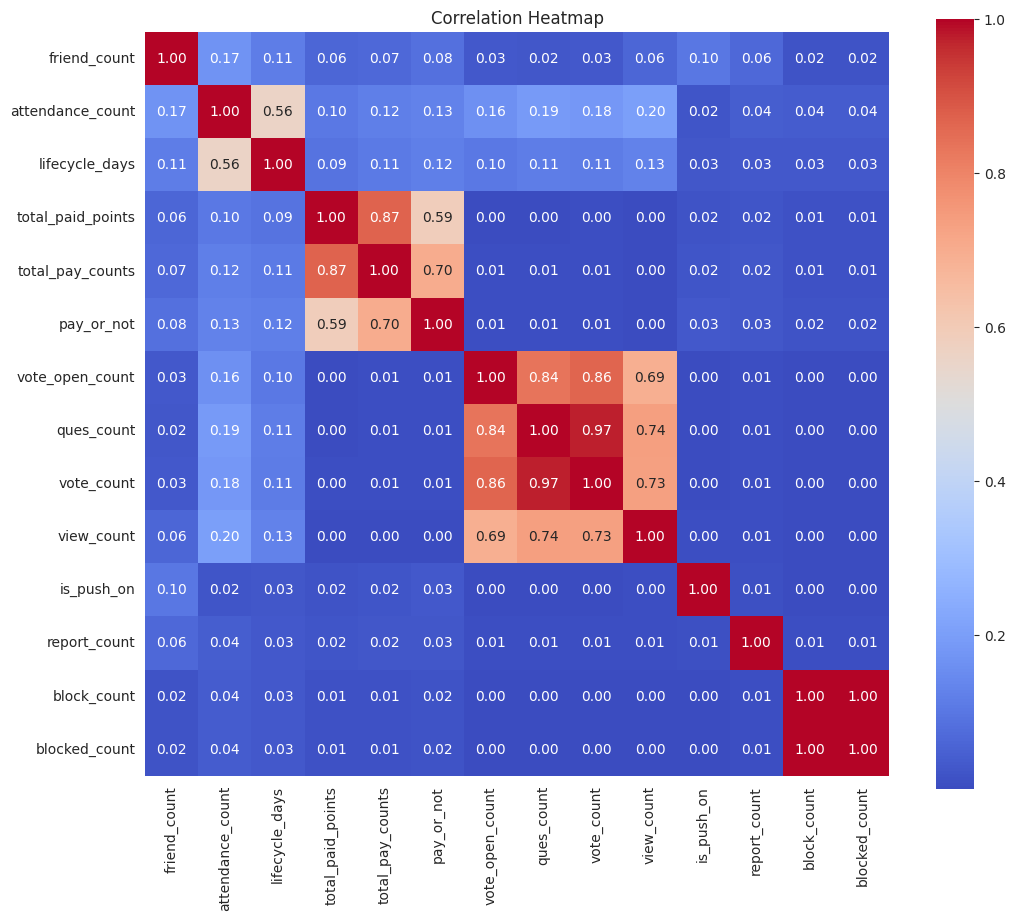

In [4]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Í∏∞ ÏúÑÌï¥ ÌÖåÏù¥Î∏î ÏÉùÏÑ±
correlation_matrix = merge2.corr()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

### Ï§ëÎ≥µÎ≥ÄÏàòÏ†úÍ±∞

In [5]:
# Î∞©Î¨∏ÌöüÏàò 7Ìöå Ï¥àÍ≥º Ïó¨Î∂Ä (ÏûîÏ°¥Ìïú Ïú†Ï†Ä : 7Ìöå Ïù¥ÏÉÅ Î∞©Î¨∏Ìïú Ïú†Ï†Ä)
narin['is_att_over_7'] = (narin['attendance_count'] >= 7).apply(int)

# Î≥ëÌï©
merge = pd.merge(narin, garim, how='inner', on='user_id')

# NaN -> 0 ÏπòÌôò
merge = merge.fillna(0)

# Ï¢ÖÏÜçÎ≥ÄÏàòÍ∞Ä ÌååÏÉùÎêú Ïª¨Îüº Ï†úÍ±∞
merge.drop(columns='attendance_count', inplace=True)

# Ï§ëÎ≥µÏª¨Îüº Ï†úÍ±∞ Î∞è Î™Ö Î≥ÄÍ≤Ω
merge.drop(columns='group_id_x', inplace=True)
merge.rename(columns={'group_id_y' : 'group_id'}, inplace=True)


# Ïù¥Ïö© Ïª¨Îüº ÏàúÏÑú Ï†ïÎ¶¨
merge = merge[[
                'group_id', 'school_id',
                'friend_count', 'gender_encoded',
                'total_paid_points', 'total_pay_counts', 'pay_or_not',            # Í≤∞Ï†úÏ†ïÎ≥¥
                'vote_open_count',                                                # Ï£ºÏöî(Ìà¨Ìëú) Í∏∞Îä• Ïù¥Ïö© Ï†ïÎ≥¥
                'ques_count', 'vote_count', 'view_count',                         # Í∏∞Îä• Ïù¥Ïö© Ï†ïÎ≥¥
                'is_push_on', 'report_count',  'block_count', 'blocked_count',    # Í∏∞ÌÉÄ Í∏∞Îä• Ïù¥Ïö© Ï†ïÎ≥¥
                'chosen_count',
                'student_count', 'school_type',
                'is_att_over_7'                                                   # Ï¢ÖÏÜçÎ≥ÄÏàò
        ]]

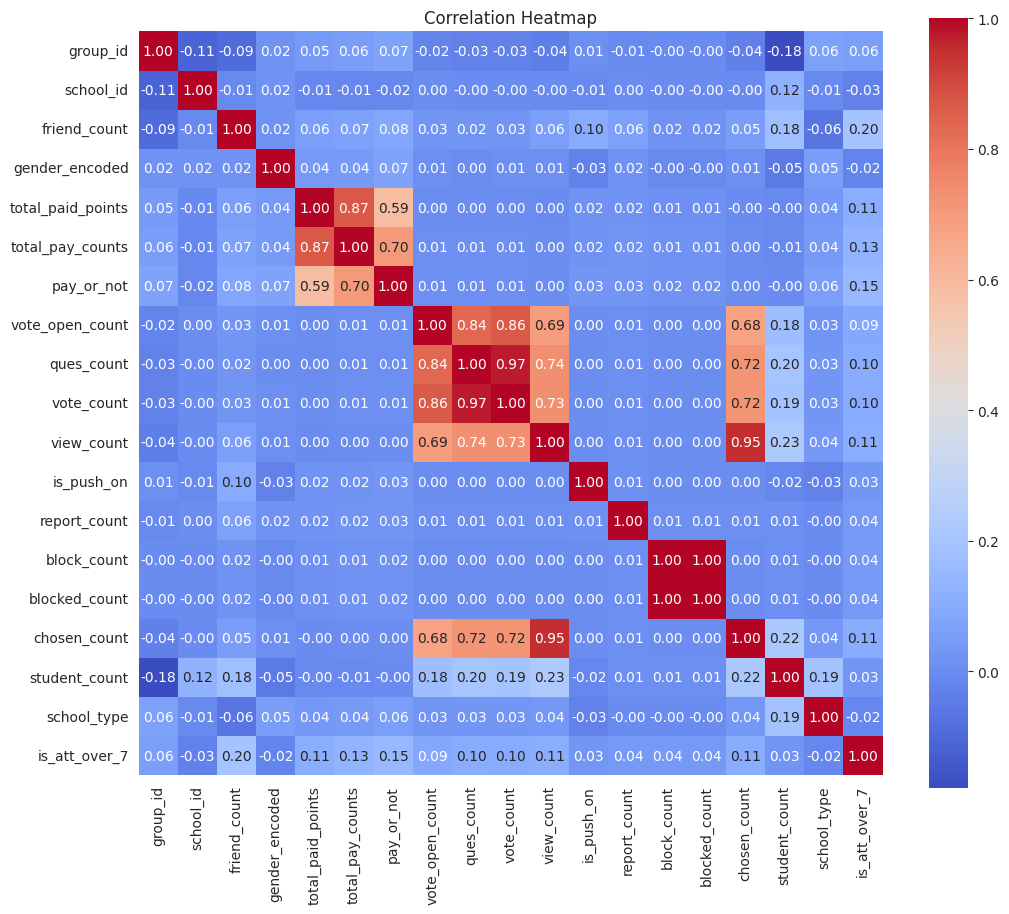

In [6]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Í∏∞ ÏúÑÌï¥ ÌÖåÏù¥Î∏î ÏÉùÏÑ± (ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥º Ïàò ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞)
correlation_matrix = merge.corr()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = merge.drop(columns='is_att_over_7')  # ÎèÖÎ¶ΩÎ≥ÄÏàòÎßå
X = add_constant(X)  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä

# VIF Í≥ÑÏÇ∞
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_df['VIF'] = vif_df['VIF'].apply(lambda x: f"{x:.2f}" if x != float('inf') else "inf")

print(vif_df.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


              feature    VIF
15      blocked_count    inf
14        block_count    inf
6    total_pay_counts   5.28
8     vote_open_count   4.11
5   total_paid_points   4.09
10         vote_count  22.49
0               const  21.60
7          pay_or_not   2.00
9          ques_count  19.27
11         view_count  11.23
16       chosen_count  10.63
17      student_count   1.20
3        friend_count   1.08
18        school_type   1.07
1            group_id   1.06
2           school_id   1.03
4      gender_encoded   1.02
12         is_push_on   1.01
13       report_count   1.00


In [8]:
# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÎÜíÏùÄ ÌîºÏ≤ò Ï†úÍ±∞ (VIF > 10Ïù∏ Í≤É Ï†úÍ±∞)
merge.drop(columns=['blocked_count', 'ques_count', 'vote_count', 'view_count', 'chosen_count', 'total_pay_counts'], inplace=True)

### Î≥ÄÏàòÎ≥Ñ ÌöåÍ∑ÄÍ≥ÑÏàò Î∞è pÍ∞í ÌôïÏù∏

In [9]:
import statsmodels.api as sm

# ÎèÖÎ¶ΩÎ≥ÄÏàò(X), Ï¢ÖÏÜçÎ≥ÄÏàò(y) Î∂ÑÎ¶¨
X = merge.drop(columns= 'is_att_over_7')
y = merge['is_att_over_7']

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X = sm.add_constant(X)

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = sm.Logit(y, X).fit()

# Í≤∞Í≥º Ï∂úÎ†•

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.560194
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:          is_att_over_7   No. Observations:               676987
Model:                          Logit   Df Residuals:                   676974
Method:                           MLE   Df Model:                           12
Date:                Tue, 12 Aug 2025   Pseudo R-squ.:                 0.06840
Time:                        04:26:06   Log-Likelihood:            -3.7924e+05
converged:                       True   LL-Null:                   -4.0709e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8044      0.013   -134.692      0.000      -1.831      -1.778
group_i

### Î™®Îç∏ÎßÅ (ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•ò Î™®Îç∏)

In [10]:
# ÌôòÍ≤ΩÏÑ§Ï†ï
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from collections import Counter

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò ÎÇòÎàÑÍ∏∞
X = merge.drop(columns='is_att_over_7')
y = merge['is_att_over_7']

# SMOTE Ï†ÅÏö©
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Í≤∞Í≥º ÌôïÏù∏
print("Before sampling:", Counter(y))
print("After SMOTE:", Counter(y_resampled))

# SMOTE Îêú Îç∞Ïù¥ÌÑ∞ train/test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Ïä§ÏºÄÏùºÎßÅ (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Î™®Îç∏ ÌïôÏäµ
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Í≤∞Í≥º Ï∂úÎ†•
print("[Random Forest]")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Before sampling: Counter({0: 481285, 1: 195702})
After SMOTE: Counter({0: 481285, 1: 481285})
[Random Forest]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71     96257
           1       0.71      0.72      0.72     96257

    accuracy                           0.72    192514
   macro avg       0.72      0.72      0.72    192514
weighted avg       0.72      0.72      0.72    192514

ROC AUC Score: 0.7907747758870938
Confusion Matrix:
 [[68333 27924]
 [26935 69322]]


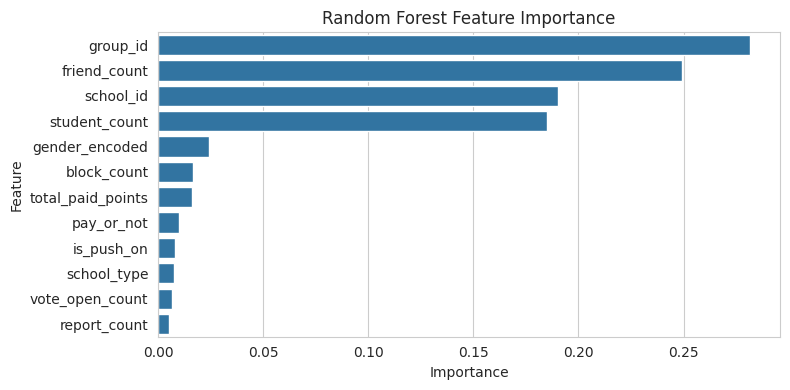

Feature  Importance
0            group_id    0.281792
2        friend_count    0.249017
1           school_id    0.190426
10      student_count    0.185055
3      gender_encoded    0.024076
9         block_count    0.016358
4   total_paid_points    0.015967
5          pay_or_not    0.009954
7          is_push_on    0.007841
11        school_type    0.007415
6     vote_open_count    0.006820
8        report_count    0.005279

In [12]:
# Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî

importances = rf_model.feature_importances_
feature_names = X_train.columns  # ÏõêÎ≥∏ÏóêÏÑú Í∞ÄÏ†∏Ïò¥

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

importance_df

## 1-2. Í≤∞Ï†ú Ïú†Ï†Ä ÏòàÏ∏° Î™®Îç∏ÎßÅ

In [13]:
df = pay_predict_model_v1.copy()

In [14]:
df = df.reset_index()

In [15]:
correlation_matrix = df.drop(columns=['id', 'pay_or_not']).corr()

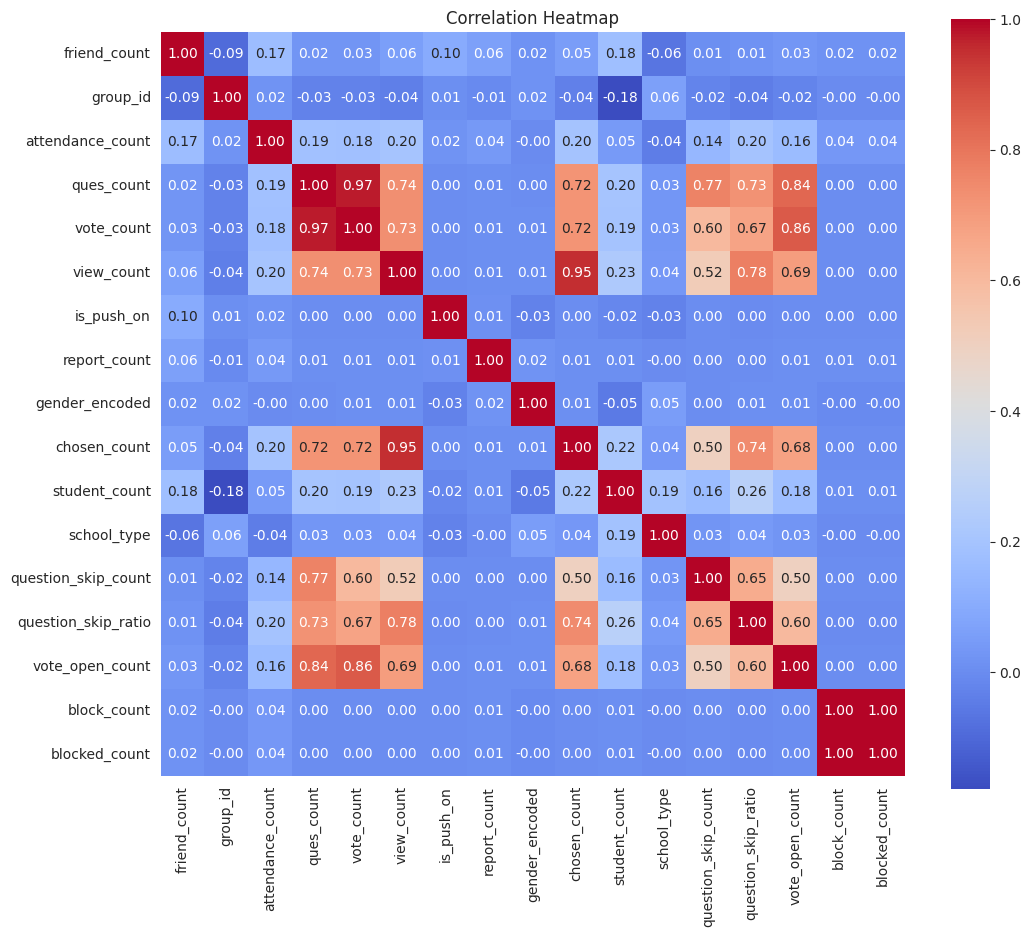

In [16]:
# ÌîºÏ≤òÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# VIF Í≥Ñ
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = df.drop(columns=['id', 'pay_or_not'])  # ÎèÖÎ¶ΩÎ≥ÄÏàòÎßå
X = add_constant(X)  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä

# VIF Í≥ÑÏÇ∞
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                feature           VIF
16          block_count           inf
17        blocked_count           inf
4            ques_count  2.625547e+04
5            vote_count  1.681966e+04
13  question_skip_count  2.198182e+03
0                 const  3.100880e+02
6            view_count  1.224803e+01
10         chosen_count  1.063487e+01
15      vote_open_count  4.115170e+00
14  question_skip_ratio  3.301820e+00
11        student_count  1.204221e+00
1          friend_count  1.100313e+00
3      attendance_count  1.086290e+00
12          school_type  1.065334e+00
2              group_id  1.049745e+00
7            is_push_on  1.012560e+00
9        gender_encoded  1.009978e+00
8          report_count  1.005402e+00


- VIF > 10: Îß§Ïö∞ ÎÜíÏùÄ Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ‚Üí Ï†úÍ±∞ Í∂åÏû•

- VIF > 5: Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÏùòÏã¨

- VIF ‚â§ 5: ÎåÄÏ≤¥Î°ú Í¥úÏ∞ÆÏùå

### ÌîºÏ≤ò Ï†úÍ±∞ Í≤∞Ï†ï Í∞ÄÏù¥Îìú

| Ïö∞ÏÑ†ÏàúÏúÑ | Í∏∞Ï§Ä                         | ÏÑ§Î™Ö                              |
| ---- | -------------------------- | ------------------------------- |
| 1    | ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.95 Ïù¥ÏÉÅ Ïåç Ï§ë VIF ÎÜíÏùÄ Î≥ÄÏàò | Îëò Ï§ë ÌïòÎÇòÎßå ÏÇ¥Î¶¨Í≥† Ï†úÍ±∞                  |
| 2    | VIF 10 Ïù¥ÏÉÅ                  | Î™ÖÎ∞±Ìïú Îã§Ï§ëÍ≥µÏÑ†ÏÑ±, Ï†úÍ±∞ Ïö∞ÏÑ†                |
| 3    | ÎèÑÎ©îÏù∏ ÏßÄÏãù / Î™®Îç∏ Ï§ëÏöîÎèÑ            | ÏóÖÎ¨¥Ï†ÅÏúºÎ°ú Ï§ëÏöîÌïòÍ±∞ÎÇò, Î™®Îç∏ ÏÑ±Îä• Í∏∞Ïó¨ ÌÅ∞ Î≥ÄÏàòÎäî ÎÇ®Í∏∞Í∏∞ |
| 4    | Í≤∞Ï∏°Ïπò ÎßéÍ±∞ÎÇò Î∂ÑÌè¨ ÏπòÏö∞Ïπú Î≥ÄÏàò Ï†úÍ±∞       | ÌíàÏßàÏù¥ ÎÇÆÏùÄ Î≥ÄÏàòÎäî Ïö∞ÏÑ† Ï†úÍ±∞                |

#### Ïö∞ÏÑ†ÏàúÏúÑ1

- vote_count, ques_count: 0.97
    - VIFÍ∞íÏù¥ ques_count Í∞Ä Îçî ÎÜíÍ∏∞ ÎïåÎ¨∏Ïóê, **ques_count** Ï†úÍ±∞.
- blocked_count, block_count ÎèôÏùºÌïú Ïª¨ÎüºÏù¥ÎØÄÎ°ú, **blocked_count** Ï†úÍ±∞.
- chosen_count, view_count: 0.95
    - **view_count** Í∞Ä Îçî VIF Í∞íÏù¥ ÎÜíÏúºÎØÄÎ°ú Ï†úÍ±∞.

In [18]:
# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÎÜíÏùÄ ÌîºÏ≤ò Ï†úÍ±∞
df.drop(columns=['ques_count', 'blocked_count', 'view_count'], inplace=True)

In [19]:
correlation_matrix = df.drop(columns=['id']).corr()

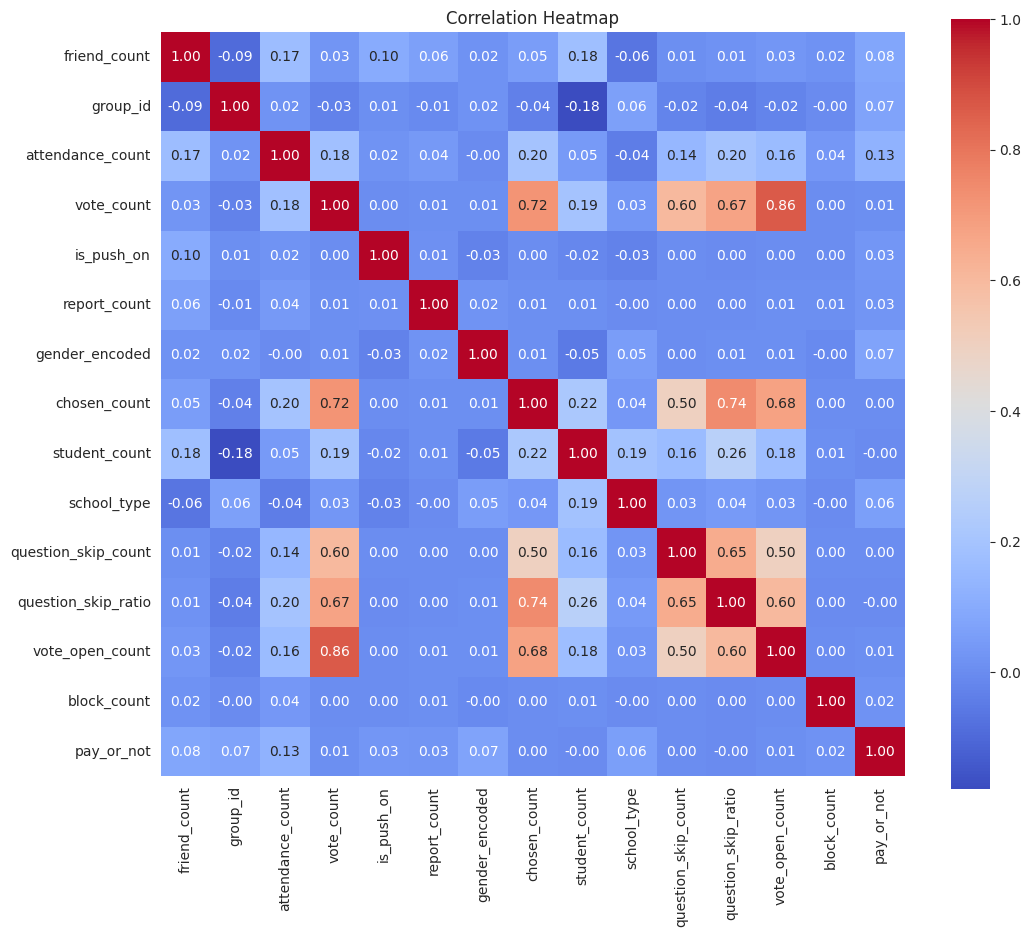

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

#### Ïö∞ÏÑ†ÏàúÏúÑ2

- VIF 10Ïù¥ÏÉÅÏù∏ ÌîºÏ≤ò Ï†úÍ±∞

In [21]:
X = df.drop(columns=['id', 'pay_or_not'])  # ÎèÖÎ¶ΩÎ≥ÄÏàòÎßå
X = add_constant(X)  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä

# VIF Í≥ÑÏÇ∞
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

                feature         VIF
0                 const  274.817911
4            vote_count    5.166984
13      vote_open_count    4.083409
12  question_skip_ratio    3.021876
8          chosen_count    2.893937
11  question_skip_count    1.918509
9         student_count    1.204100
1          friend_count    1.097959
3      attendance_count    1.086284
10          school_type    1.065321
2              group_id    1.049744
5            is_push_on    1.012547
7        gender_encoded    1.009971
6          report_count    1.005395
14          block_count    1.001515


In [22]:
# 10 Ïù¥ÏÉÅÏù∏ ÌîºÏ≤ò ÌôïÏù∏
# constÎäî ÏÉÅÏàòÌï≠Ïù¥ÎØÄÎ°ú ÌôïÏù∏ ÎåÄÏÉÅÏóêÏÑú Ï†úÏô∏.
# Îî∞ÎùºÏÑú, VIF Í∞íÏù¥ 10Ïù¥ÏÉÅÏù∏ ÌîºÏ≤òÎäî ÏóÜÏùå.
high_vif = vif_df[vif_df['VIF'] >= 10]
print(high_vif.sort_values(by='VIF', ascending=False))

  feature         VIF
0   const  274.817911


### ÌöåÍ∑ÄÍ≥ÑÏàò ÌôïÏù∏

In [23]:
import statsmodels.api as sm

# ÎèÖÎ¶ΩÎ≥ÄÏàò(X), Ï¢ÖÏÜçÎ≥ÄÏàò(y) Î∂ÑÎ¶¨
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X = sm.add_constant(X)

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = sm.Logit(y, X).fit()

# Í≤∞Í≥º Ï∂úÎ†•
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.281026
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             pay_or_not   No. Observations:               676987
Model:                          Logit   Df Residuals:                   676972
Method:                           MLE   Df Model:                           14
Date:                Tue, 12 Aug 2025   Pseudo R-squ.:                 0.05230
Time:                        04:35:16   Log-Likelihood:            -1.9025e+05
converged:                       True   LL-Null:                   -2.0075e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.7059      0.083    -56.770      0.000      -4.868      -4.543
fr

### ÏÉòÌîåÎßÅ Î∞è Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

In [24]:
# ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò ÎÇòÎàÑÍ∏∞
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# Ïñ∏ÎçîÏÉòÌîåÎßÅ Ï†ÅÏö©
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Í≤∞Í≥º ÌôïÏù∏
print("Before sampling:", Counter(y))
print("After undersampling:", Counter(y_resampled))

Before sampling: Counter({0: 617803, 1: 59184})
After undersampling: Counter({0: 59184, 1: 59184})


In [25]:
# Ïñ∏ÎçîÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [26]:
# Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # ÏñëÏÑ± ÌÅ¥ÎûòÏä§ ÌôïÎ•†

# Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# ÌòºÎèô ÌñâÎ†¨
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65     11837
           1       0.65      0.61      0.63     11837

    accuracy                           0.64     23674
   macro avg       0.64      0.64      0.64     23674
weighted avg       0.64      0.64      0.64     23674

ROC AUC Score: 0.6939647653628367
Confusion Matrix:
 [[7926 3911]
 [4620 7217]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Î≤†Ïù¥Ïä§ÎùºÏù∏(Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ™®Îç∏)

- Ïä§ÏºÄÏùºÎßÅ ÏûëÏóÖÍ≥º ÎûúÎç§ Ïò§Î≤Ñ ÏÉòÌîåÎßÅÏùÑ Ï†ÅÏö©Ìïú ÌöåÍ∑ÄÎ™®Îç∏

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd

# 1. ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò Î∂ÑÎ¶¨
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. Ïñ∏ÎçîÏÉòÌîåÎßÅ
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("Before sampling:", Counter(y))
print("After undersampling:", Counter(y_resampled))

# 3. train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. Ïä§ÏºÄÏùºÎßÅ (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 6. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 7. Í≤∞Í≥º Ï∂úÎ†•
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before sampling: Counter({0: 617803, 1: 59184})
After undersampling: Counter({0: 59184, 1: 59184})
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.68      0.65     11837
           1       0.65      0.61      0.63     11837

    accuracy                           0.64     23674
   macro avg       0.64      0.64      0.64     23674
weighted avg       0.64      0.64      0.64     23674

ROC AUC Score: 0.6983555578720726


### RandomForest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. ÎûúÎç§ Ïò§Î≤ÑÏÉòÌîåÎßÅ
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After Oversampling:", Counter(y_resampled))

# 3. train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. (ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Îäî Ïä§ÏºÄÏùºÎßÅ ÌïÑÏàò ÏïÑÎãò, ÏÉùÎûµ Í∞ÄÎä•)

# 5. Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After Oversampling: Counter({0: 617803, 1: 617803})
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    123561
           1       0.97      1.00      0.98    123561

    accuracy                           0.98    247122
   macro avg       0.98      0.98      0.98    247122
weighted avg       0.98      0.98      0.98    247122

Random Forest ROC AUC Score: 0.9997114929606515


In [ ]:
# Ïñ∏ÎçîÏÉòÌîåÎßÅ

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After Undersampling:", Counter(y_resampled))

# 3. train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. (ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Îäî Ïä§ÏºÄÏùºÎßÅ ÏÉùÎûµ Í∞ÄÎä•)

# 5. Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After Undersampling: Counter({0: 59184, 1: 59184})
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.63     11837
           1       0.64      0.71      0.67     11837

    accuracy                           0.65     23674
   macro avg       0.65      0.65      0.65     23674
weighted avg       0.65      0.65      0.65     23674

Random Forest ROC AUC Score: 0.7149799996886832


In [ ]:
# SMOTE SAMPLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. SMOTE Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After SMOTE Oversampling:", Counter(y_resampled))

# 3. train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. (ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Îäî Ïä§ÏºÄÏùºÎßÅ ÏÉùÎûµ Í∞ÄÎä•)

# 5. Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After SMOTE Oversampling: Counter({0: 617803, 1: 617803})
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80    123561
           1       0.78      0.85      0.81    123561

    accuracy                           0.81    247122
   macro avg       0.81      0.81      0.81    247122
weighted avg       0.81      0.81      0.81    247122

Random Forest ROC AUC Score: 0.8994202989468987


### XGBoost

In [ ]:
# ÎûúÎç§Ïò§Î≤ÑÏÉòÌîåÎßÅ

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. ÎûúÎç§ Ïò§Î≤ÑÏÉòÌîåÎßÅ
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After Oversampling:", Counter(y_resampled))

# 3. train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. XGBoost Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After Oversampling: Counter({0: 617803, 1: 617803})


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:59:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.65    123561
           1       0.65      0.78      0.71    123561

    accuracy                           0.68    247122
   macro avg       0.69      0.68      0.68    247122
weighted avg       0.69      0.68      0.68    247122

XGBoost ROC AUC Score: 0.7529665622788484


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. Ïñ∏ÎçîÏÉòÌîåÎßÅ Ï†ÅÏö©
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("Before UnderSampling:", Counter(y))
print("After UnderSampling:", Counter(y_resampled))

# 3. train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. XGBoost Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # Í≤ΩÍ≥† Ï†úÍ±∞
)
xgb_model.fit(X_train, y_train)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# 6. Í≤∞Í≥º Ï∂úÎ†•
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before UnderSampling: Counter({0: 617803, 1: 59184})
After UnderSampling: Counter({0: 59184, 1: 59184})


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:08:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.58      0.65     11837
           1       0.65      0.77      0.71     11837

    accuracy                           0.68     23674
   macro avg       0.69      0.68      0.68     23674
weighted avg       0.69      0.68      0.68     23674

XGBoost ROC AUC Score: 0.7439799889760215


In [ ]:
# SMOTE

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. SMOTE Ïò§Î≤ÑÏÉòÌîåÎßÅ Ï†ÅÏö©
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_resampled))

# 3. train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. XGBoost Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# 6. Í≤∞Í≥º Ï∂úÎ†•
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before SMOTE: Counter({0: 617803, 1: 59184})
After SMOTE: Counter({0: 617803, 1: 617803})


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:08:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.59      0.66    123561
           1       0.66      0.80      0.72    123561

    accuracy                           0.70    247122
   macro avg       0.70      0.70      0.69    247122
weighted avg       0.70      0.70      0.69    247122

XGBoost ROC AUC Score: 0.7708490750320172


### LightBGM

In [ ]:
# Ïò§Î≤ÑÏÉòÌîåÎßÅ

from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. ÎûúÎç§ Ïò§Î≤ÑÏÉòÌîåÎßÅ Ï†ÅÏö©
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After Oversampling:", Counter(y_resampled))

# 3. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. LightGBM Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

print("LightGBM Classification Report:\n", classification_report(y_test, y_pred))
print("LightGBM ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After Oversampling: Counter({0: 617803, 1: 617803})
[LightGBM] [Info] Number of positive: 494242, number of negative: 494242
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1920
[LightGBM] [Info] Number of data points in the train set: 988484, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.65    123561
           1       0.65      0.78      0.71    123561

    accuracy                           0.68    247122
   macro avg       0.69      0.68      0.68    247122
weighted avg       0.69      0.68      0.68    247122

LightGBM ROC AUC Score: 0.7513932464077172


In [ ]:
# SMOTE

from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. SMOTE Ïò§Î≤ÑÏÉòÌîåÎßÅ Ï†ÅÏö©
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After SMOTE Oversampling:", Counter(y_resampled))

# 3. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. LightGBM Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

print("LightGBM Classification Report:\n", classification_report(y_test, y_pred))
print("LightGBM ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After SMOTE Oversampling: Counter({0: 617803, 1: 617803})
[LightGBM] [Info] Number of positive: 494242, number of negative: 494242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.119228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2429
[LightGBM] [Info] Number of data points in the train set: 988484, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.61      0.67    123561
           1       0.67      0.80      0.73    123561

    accuracy                           0.70    247122
   macro avg       0.71      0.70      0.70    247122
weighted avg       0.71      0.70      0.70    247122

LightGBM ROC AUC Score: 0.78

### Í≤∞Î°†

```python
ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏Ïùò smote Î™®Îç∏ÎßÅ Í∏∞Î≤ïÏù¥ Í∞ÄÏû• Ïã†Î¢∞ÏÑ±Ïù¥ ÎÜíÏùÄ Î™®Îç∏Î°ú ÏÑ†Ï†ï!
```

In [ ]:
# SMOTE SAMPLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. SMOTE Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After SMOTE Oversampling:", Counter(y_resampled))

# 3. train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. (ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Îäî Ïä§ÏºÄÏùºÎßÅ ÏÉùÎûµ Í∞ÄÎä•)

# 5. Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After SMOTE Oversampling: Counter({0: 617803, 1: 617803})
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80    123561
           1       0.78      0.85      0.81    123561

    accuracy                           0.81    247122
   macro avg       0.81      0.81      0.81    247122
weighted avg       0.81      0.81      0.81    247122

Random Forest ROC AUC Score: 0.8994202989468987


#### ÌîºÏ≤òÏ§ëÏöîÎèÑ

/tmp/ipython-input-1657651470.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance.head(20), palette='coolwarm')


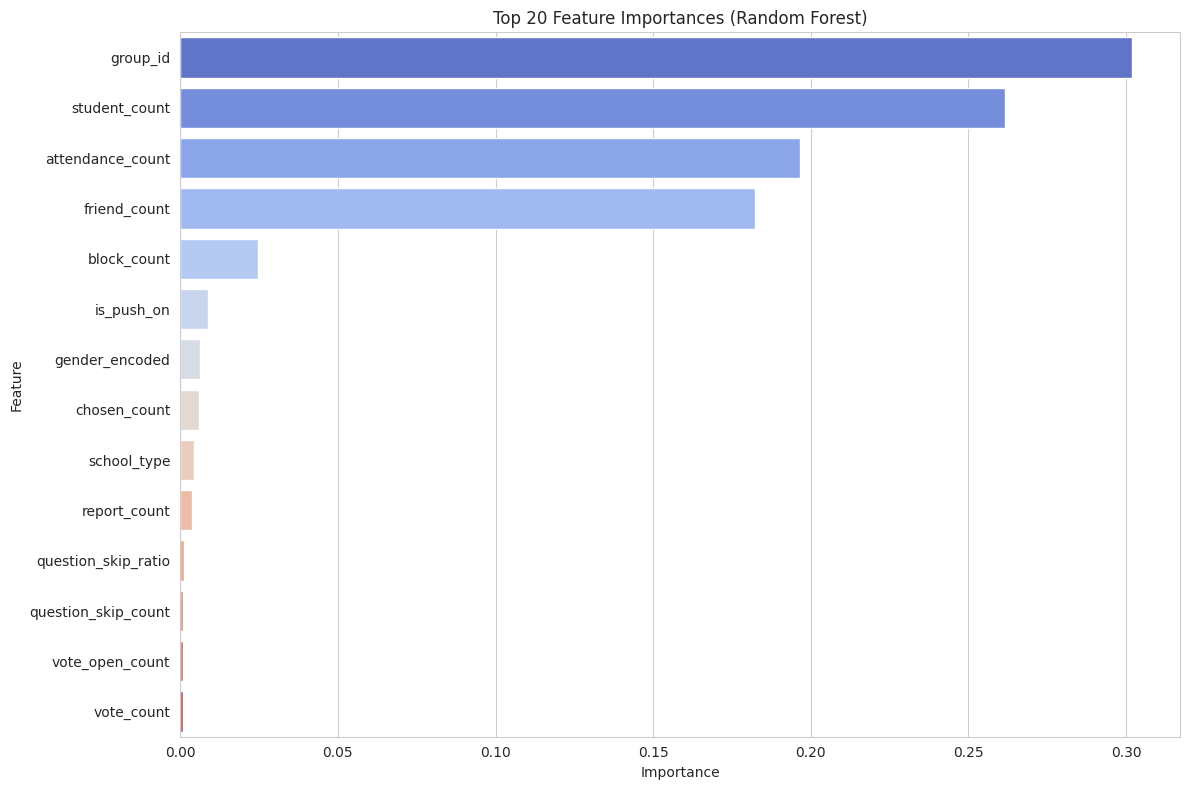

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ÌîºÏ≤ò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})

# Ï§ëÏöîÎèÑ Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# ÏÉÅÏúÑ 20Í∞ú ÌîºÏ≤ò ÏãúÍ∞ÅÌôî (ÏõêÌïòÎäî Í∞úÏàòÎ°ú Ï°∞Ï†ï Í∞ÄÎä•)
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20), palette='coolwarm')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
print(feature_importance)

                feature  importance
1              group_id    0.302032
8         student_count    0.261532
2      attendance_count    0.196697
0          friend_count    0.182463
13          block_count    0.024734
4            is_push_on    0.008873
6        gender_encoded    0.006414
7          chosen_count    0.005795
9           school_type    0.004272
5          report_count    0.003593
11  question_skip_ratio    0.001152
10  question_skip_count    0.000828
12      vote_open_count    0.000807
3            vote_count    0.000807


In [ ]:
# SMOTE SAMPLING + feature_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = df[['group_id', 'student_count', 'attendance_count', 'friend_count', 'block_count']]
y = df['pay_or_not']

# 2. SMOTE Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After SMOTE Oversampling:", Counter(y_resampled))

# 3. train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. (ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Îäî Ïä§ÏºÄÏùºÎßÅ ÏÉùÎûµ Í∞ÄÎä•)

# 5. Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After SMOTE Oversampling: Counter({0: 617803, 1: 617803})
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79    123561
           1       0.77      0.85      0.81    123561

    accuracy                           0.80    247122
   macro avg       0.80      0.80      0.80    247122
weighted avg       0.80      0.80      0.80    247122

Random Forest ROC AUC Score: 0.8947579509291426


```python
ÌîºÏ≤ò Ï§ëÏöîÎèÑ top5Î•º Ïù¥Ïö©Ìïú Î™®Îç∏ÎßÅ Í≤∞Í≥ºÏôÄ Ï†ÑÏ≤¥ ÌîºÏ≤òÎ•º Ï†ÅÏö©Ìïú Î™®Îç∏Ïùò ÏÑ±Îä• Í±∞Ïùò ÎèôÏùº!
```

## 1-3. Í≤∞Ï†ú Ï†Ñ ÌñâÎèô Ìå®ÌÑ¥

### ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [29]:
df = hackle_events.copy()

# ÏÇ¨Ïö©Ìï† Ïª¨ÎüºÎßå ÎÇ®Í∏∞Í∏∞
df = df[['event_datetime', 'event_key', 'user_id', 'session']]

# event_datetime ÌÉÄÏûÖ Î≥ÄÍ≤Ω
df['event_datetime'] = pd.to_datetime(df['event_datetime'])

# session_id, event_datetime Ïàú Ï†ïÎ†¨
df.sort_values(['user_id', 'event_datetime'], inplace=True)

# Ï†ÑÏ≤òÎ¶¨ ÎåÄÏÉÅ Î°úÍ∑∏('click_appbar_setting', 'button'), ÏÑ∏ÏÖò Î°úÍ∑∏('$session_start', '$session_end') ÏÇ≠Ï†ú
df = df[~df['event_key'].isin(['click_appbar_setting', 'button', '$session_start', '$session_end'])]

# Ï§ëÎ≥µ Ï†úÍ±∞
df_clean = df.sort_values(by='event_datetime').copy()
print("Ï§ëÎ≥µ Ï†úÍ±∞ Ï†Ñ Í∏∏Ïù¥:", len(df_clean))

df_clean['event_before'] = df_clean.groupby(by=['user_id', 'session'])['event_key'].shift()
df_clean = df_clean[~(df_clean['event_key'] == df_clean['event_before'])]
print("1Ï∞® Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Í∏∏Ïù¥:", len(df_clean))

df_clean['event_before'] = df_clean.groupby(by=['user_id', 'session'])['event_key'].shift()
df_clean = df_clean[~(df_clean['event_key'] == df_clean['event_before'])]
print("2Ï∞® Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Í∏∏Ïù¥:", len(df_clean))

Ï§ëÎ≥µ Ï†úÍ±∞ Ï†Ñ Í∏∏Ïù¥: 9682942
1Ï∞® Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Í∏∏Ïù¥: 8161706
2Ï∞® Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Í∏∏Ïù¥: 8161706


In [30]:
# Í≤∞Ï†úÏûê Ïú†Ï†ÄÎ≥Ñ ÏãúÌÄÄÏä§ÏÉùÏÑ±

# Í≤∞Ï†úÏûê Î°úÍ∑∏
purchase_user = df_clean[df_clean['event_key'] == 'complete_purchase']['user_id'].unique()
purchase_user_log = df_clean[df_clean['user_id'].isin(purchase_user)]

# ÎπÑÍ≤∞Ï†úÏûê Î°úÍ∑∏
not_purchase_user_log = df_clean[~df_clean['user_id'].isin(purchase_user)]

# Ïú†Ï†ÄÎ≥Ñ, ÏÑ∏ÏÖòÎ≥Ñ Î°úÍ∑∏ Î¶¨Ïä§Ìä∏Ìôî
purchase_user_paths = purchase_user_log.groupby(['user_id','session'])['event_key'].apply(list).reset_index(name='paths')

# complete_purchaseÍ∞Ä Ìè¨Ìï®ÎêòÎäî ÏÑ∏ÏÖò Ï§ë, Í≤∞Ï†úÍπåÏßÄÏùò Í∏∞Î°ùÎßå ÎÇ®ÍπÄ
result_list = []

for user_id, group in purchase_user_log.groupby(['user_id', 'session']):
    complete_idx = group[group['event_key'] == 'complete_purchase'].index
    if not complete_idx.empty:
        first_idx = complete_idx[0]
        result_list.append(group.loc[:first_idx])

# ÏµúÏ¢Ö Î≥ëÌï©
before_complete_purchas = pd.concat(result_list)
before_complete_purchas.reset_index(drop=True, inplace=True)

# Ïú†Ï†ÄÎ≥Ñ ÏãúÌÄÄÏä§ ÏÉùÏÑ±
purchase_user_paths = before_complete_purchas.groupby(['user_id','session'])['event_key'].apply(list).reset_index(name='paths')

# ÏãúÌÄÄÏä§ Í∏∏Ïù¥Ïùò Î∂ÑÌè¨ ÌôïÏù∏
seq_length = purchase_user_paths['paths'].apply(len)
seq_length.describe()

count    1699.000000
mean       32.009417
std        28.056311
min         2.000000
25%        14.000000
50%        24.000000
75%        42.000000
max       404.000000
Name: paths, dtype: float64

In [31]:
# ÏãúÌÄÄÏä§ Í∏∏Ïù¥ ÎßàÏßÄÎßâ 50Í∞úÎ°ú ÏûêÎ•¥Í∏∞
# ÏãúÌÄÄÏä§ Í∏∏Ïù¥Í∞Ä ÏßÄÎÇòÏπòÍ≤å Í∏∏Î©¥ Ïó∞ÏÇ∞Ïóê Ï†úÏïΩÏù¥ Î∞úÏÉùÌïòÎØÄÎ°ú, ÏãúÌÄÄÏä§ Í∏∏Ïù¥ Î∂ÑÌè¨Ïùò 75% Î∂ÑÏúÑÏàò(47)Î•º Í∏∞Ï§ÄÏúºÎ°ú Îí§ÏóêÏÑú ÏµúÎåÄ 50Í∞ú Ïù¥Î≤§Ìä∏Îßå ÏÇ¨Ïö©
purchase_user_paths_last50 = [seq[-50:] for seq in purchase_user_paths['paths']]

### ÏãúÌÄÄÏÖú ÎßàÏù¥Îãù

In [32]:
# ÏãúÌÄÄÏä§ ÎßàÏù¥Îãù Ï†ÅÏö©
ps_50 = PrefixSpan(purchase_user_paths_last50)  # ÏãúÎ¶¨Ï¶àÌòïÌÉú

# ÏµúÏÜå support=500 (500Î≤à(Ïú†Ï†Ä 1699Î™ÖÏùò ÏïΩ 30%) Ïù¥ÏÉÅ Îì±Ïû•Ìïú ÏãúÌÄÄÏä§Îßå)
patterns_50 = ps_50.frequent(500)

# Í≤∞Ï†ú ÏôÑÎ£å Í∏∞Î°ù Ìè¨Ìï®Îêú Ìå®ÌÑ¥ Ï§ë support > 1000 Ïù∏ Í≤É Ï∂úÎ†•
for support, pattern in sorted(patterns_50, key=lambda x: -x[0]):
    if support > 1000 and 'complete_purchase' in pattern:
        print(f"Support: {support}, Pattern: {pattern}")

Support: 1699, Pattern: ['click_purchase', 'complete_purchase']
Support: 1699, Pattern: ['complete_purchase']
Support: 1698, Pattern: ['view_shop', 'click_purchase', 'complete_purchase']
Support: 1698, Pattern: ['view_shop', 'complete_purchase']
Support: 1408, Pattern: ['click_bottom_navigation_questions', 'view_shop', 'complete_purchase']
Support: 1408, Pattern: ['click_bottom_navigation_questions', 'click_purchase', 'complete_purchase']
Support: 1408, Pattern: ['click_bottom_navigation_questions', 'complete_purchase']
Support: 1406, Pattern: ['click_bottom_navigation_questions', 'view_shop', 'click_purchase', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'view_shop', 'click_purchase', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'view_shop', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'click_purchase', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'complete_purchase']
Support: 1358, Pattern: ['view_lab_tap', 'view_shop', 'com

ÏãúÌÄÄÏÖú ÎßàÏù¥Îãù Í≤∞Í≥º Îã§ÏùåÍ≥º Í∞ôÏùÄ Ìå®ÌÑ¥ÏùÑ ÌôïÏù∏ÌñàÎã§.
1. ['`click_bottom_navigation_questions`', '`view_shop`', '`click_purchase`', '`complete_purchase`']Îäî support 1407 (ÌÖåÏù¥Î∏îÏùò Ï†ÑÏ≤¥ Ïú†Ï†ÄÏù∏ 1699Î™ÖÏùò 83%)Ïùò ÎπàÏ∂ú Ìå®ÌÑ¥Ïù¥ÏóàÎã§.
2. Í∑∏ Î∞ñÏùò ÎπàÏ∂ú Í∞úÎ≥Ñ ÌñâÎèôÎ°úÎäî  `click_purchase`, `view_shop`, `click_bottom_navigation_questions`, `view_lab_tap`, `click_bottom_navigation_profile`, `view_timeline_tap` Îì±Ïù¥ ÏûàÏóàÎã§.

### Í≤∞Ï†ú nÎã®Í≥Ñ Ï†Ñ ÌñâÎèô Î∂ÑÏÑù

In [33]:
# Í≤∞Ï†ú 1Îã®Í≥Ñ Ï†Ñ ÌñâÎèô
right_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        right_bf_purchase.append(seq[idx - 1])

right_bf_purchase = pd.Series(right_bf_purchase)
right_bf_purchase.value_counts()

# 99%ÏóêÏÑú click_purchase

click_purchase    1693
view_shop            5
view_lab_tap         1
Name: count, dtype: int64

In [34]:
# Í≤∞Ï†ú 2Îã®Í≥Ñ Ï†Ñ ÌñâÎèô
two_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx > 1:
            two_bf_purchase.append(seq[idx - 2])

two_bf_purchase = pd.Series(two_bf_purchase)
two_bf_purchase.value_counts()

# 99%ÏóêÏÑú view_shop

view_shop                            1687
click_purchase                          5
click_bottom_navigation_questions       3
view_questions_tap                      2
view_timeline_tap                       1
Name: count, dtype: int64

## 1-3. Í≤∞Ï†ú Ï†Ñ ÌñâÎèô Ìå®ÌÑ¥

### ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [35]:
df = hackle_events.copy()

# ÏÇ¨Ïö©Ìï† Ïª¨ÎüºÎßå ÎÇ®Í∏∞Í∏∞
df = df[['event_datetime', 'event_key', 'user_id', 'session']]

# event_datetime ÌÉÄÏûÖ Î≥ÄÍ≤Ω
df['event_datetime'] = pd.to_datetime(df['event_datetime'])

# session_id, event_datetime Ïàú Ï†ïÎ†¨
df.sort_values(['user_id', 'event_datetime'], inplace=True)

# Ï†ÑÏ≤òÎ¶¨ ÎåÄÏÉÅ Î°úÍ∑∏('click_appbar_setting', 'button'), ÏÑ∏ÏÖò Î°úÍ∑∏('$session_start', '$session_end') ÏÇ≠Ï†ú
df = df[~df['event_key'].isin(['click_appbar_setting', 'button', '$session_start', '$session_end'])]

# Ï§ëÎ≥µ Ï†úÍ±∞
df_clean = df.sort_values(by='event_datetime').copy()
print("Ï§ëÎ≥µ Ï†úÍ±∞ Ï†Ñ Í∏∏Ïù¥:", len(df_clean))

df_clean['event_before'] = df_clean.groupby(by=['user_id', 'session'])['event_key'].shift()
df_clean = df_clean[~(df_clean['event_key'] == df_clean['event_before'])]
print("1Ï∞® Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Í∏∏Ïù¥:", len(df_clean))

df_clean['event_before'] = df_clean.groupby(by=['user_id', 'session'])['event_key'].shift()
df_clean = df_clean[~(df_clean['event_key'] == df_clean['event_before'])]
print("2Ï∞® Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Í∏∏Ïù¥:", len(df_clean))

Ï§ëÎ≥µ Ï†úÍ±∞ Ï†Ñ Í∏∏Ïù¥: 9682942
1Ï∞® Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Í∏∏Ïù¥: 8161706
2Ï∞® Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Í∏∏Ïù¥: 8161706


In [36]:
# Í≤∞Ï†úÏûê Ïú†Ï†ÄÎ≥Ñ ÏãúÌÄÄÏä§ÏÉùÏÑ±

# Í≤∞Ï†úÏûê Î°úÍ∑∏
purchase_user = df_clean[df_clean['event_key'] == 'complete_purchase']['user_id'].unique()
purchase_user_log = df_clean[df_clean['user_id'].isin(purchase_user)]

# ÎπÑÍ≤∞Ï†úÏûê Î°úÍ∑∏
not_purchase_user_log = df_clean[~df_clean['user_id'].isin(purchase_user)]

# Ïú†Ï†ÄÎ≥Ñ, ÏÑ∏ÏÖòÎ≥Ñ Î°úÍ∑∏ Î¶¨Ïä§Ìä∏Ìôî
purchase_user_paths = purchase_user_log.groupby(['user_id','session'])['event_key'].apply(list).reset_index(name='paths')

# complete_purchaseÍ∞Ä Ìè¨Ìï®ÎêòÎäî ÏÑ∏ÏÖò Ï§ë, Í≤∞Ï†úÍπåÏßÄÏùò Í∏∞Î°ùÎßå ÎÇ®ÍπÄ
result_list = []

for user_id, group in purchase_user_log.groupby(['user_id', 'session']):
    complete_idx = group[group['event_key'] == 'complete_purchase'].index
    if not complete_idx.empty:
        first_idx = complete_idx[0]
        result_list.append(group.loc[:first_idx])

# ÏµúÏ¢Ö Î≥ëÌï©
before_complete_purchas = pd.concat(result_list)
before_complete_purchas.reset_index(drop=True, inplace=True)

# Ïú†Ï†ÄÎ≥Ñ ÏãúÌÄÄÏä§ ÏÉùÏÑ±
purchase_user_paths = before_complete_purchas.groupby(['user_id','session'])['event_key'].apply(list).reset_index(name='paths')

# ÏãúÌÄÄÏä§ Í∏∏Ïù¥Ïùò Î∂ÑÌè¨ ÌôïÏù∏
seq_length = purchase_user_paths['paths'].apply(len)
seq_length.describe()

count    1699.000000
mean       32.009417
std        28.056311
min         2.000000
25%        14.000000
50%        24.000000
75%        42.000000
max       404.000000
Name: paths, dtype: float64

In [37]:
# ÏãúÌÄÄÏä§ Í∏∏Ïù¥ ÎßàÏßÄÎßâ 50Í∞úÎ°ú ÏûêÎ•¥Í∏∞
# ÏãúÌÄÄÏä§ Í∏∏Ïù¥Í∞Ä ÏßÄÎÇòÏπòÍ≤å Í∏∏Î©¥ Ïó∞ÏÇ∞Ïóê Ï†úÏïΩÏù¥ Î∞úÏÉùÌïòÎØÄÎ°ú, ÏãúÌÄÄÏä§ Í∏∏Ïù¥ Î∂ÑÌè¨Ïùò 75% Î∂ÑÏúÑÏàò(47)Î•º Í∏∞Ï§ÄÏúºÎ°ú Îí§ÏóêÏÑú ÏµúÎåÄ 50Í∞ú Ïù¥Î≤§Ìä∏Îßå ÏÇ¨Ïö©
purchase_user_paths_last50 = [seq[-50:] for seq in purchase_user_paths['paths']]

### ÏãúÌÄÄÏÖú ÎßàÏù¥Îãù

In [38]:
# ÏãúÌÄÄÏä§ ÎßàÏù¥Îãù Ï†ÅÏö©
ps_50 = PrefixSpan(purchase_user_paths_last50)  # ÏãúÎ¶¨Ï¶àÌòïÌÉú

# ÏµúÏÜå support=500 (500Î≤à(Ïú†Ï†Ä 1699Î™ÖÏùò ÏïΩ 30%) Ïù¥ÏÉÅ Îì±Ïû•Ìïú ÏãúÌÄÄÏä§Îßå)
patterns_50 = ps_50.frequent(500)

# Í≤∞Ï†ú ÏôÑÎ£å Í∏∞Î°ù Ìè¨Ìï®Îêú Ìå®ÌÑ¥ Ï§ë support > 1000 Ïù∏ Í≤É Ï∂úÎ†•
for support, pattern in sorted(patterns_50, key=lambda x: -x[0]):
    if support > 1000 and 'complete_purchase' in pattern:
        print(f"Support: {support}, Pattern: {pattern}")

Support: 1699, Pattern: ['click_purchase', 'complete_purchase']
Support: 1699, Pattern: ['complete_purchase']
Support: 1698, Pattern: ['view_shop', 'click_purchase', 'complete_purchase']
Support: 1698, Pattern: ['view_shop', 'complete_purchase']
Support: 1408, Pattern: ['click_bottom_navigation_questions', 'view_shop', 'complete_purchase']
Support: 1408, Pattern: ['click_bottom_navigation_questions', 'click_purchase', 'complete_purchase']
Support: 1408, Pattern: ['click_bottom_navigation_questions', 'complete_purchase']
Support: 1406, Pattern: ['click_bottom_navigation_questions', 'view_shop', 'click_purchase', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'view_shop', 'click_purchase', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'view_shop', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'click_purchase', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'complete_purchase']
Support: 1358, Pattern: ['view_lab_tap', 'view_shop', 'com

ÏãúÌÄÄÏÖú ÎßàÏù¥Îãù Í≤∞Í≥º Îã§ÏùåÍ≥º Í∞ôÏùÄ Ìå®ÌÑ¥ÏùÑ ÌôïÏù∏ÌñàÎã§.
1. ['`click_bottom_navigation_questions`', '`view_shop`', '`click_purchase`', '`complete_purchase`']Îäî support 1407 (ÌÖåÏù¥Î∏îÏùò Ï†ÑÏ≤¥ Ïú†Ï†ÄÏù∏ 1699Î™ÖÏùò 83%)Ïùò ÎπàÏ∂ú Ìå®ÌÑ¥Ïù¥ÏóàÎã§.
2. Í∑∏ Î∞ñÏùò ÎπàÏ∂ú Í∞úÎ≥Ñ ÌñâÎèôÎ°úÎäî  `click_purchase`, `view_shop`, `click_bottom_navigation_questions`, `view_lab_tap`, `click_bottom_navigation_profile`, `view_timeline_tap` Îì±Ïù¥ ÏûàÏóàÎã§.

### Í≤∞Ï†ú nÎã®Í≥Ñ Ï†Ñ ÌñâÎèô Î∂ÑÏÑù

In [39]:
# Í≤∞Ï†ú 1Îã®Í≥Ñ Ï†Ñ ÌñâÎèô
right_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        right_bf_purchase.append(seq[idx - 1])

right_bf_purchase = pd.Series(right_bf_purchase)
right_bf_purchase.value_counts()

# 99%ÏóêÏÑú click_purchase

click_purchase    1693
view_shop            5
view_lab_tap         1
Name: count, dtype: int64

In [40]:
# Í≤∞Ï†ú 2Îã®Í≥Ñ Ï†Ñ ÌñâÎèô
two_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx > 1:
            two_bf_purchase.append(seq[idx - 2])

two_bf_purchase = pd.Series(two_bf_purchase)
two_bf_purchase.value_counts()

# 99%ÏóêÏÑú view_shop

view_shop                            1687
click_purchase                          5
click_bottom_navigation_questions       3
view_questions_tap                      2
view_timeline_tap                       1
Name: count, dtype: int64

In [41]:
# Í≤∞Ï†ú 3Îã®Í≥Ñ Ï†Ñ ÌñâÎèô
three_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx > 2:
            three_bf_purchase.append(seq[idx - 3])

three_bf_purchase = pd.Series(three_bf_purchase)
three_bf_purchase.value_counts()

# 30%Îäî ÏßàÎ¨∏ÌÉ≠ ÏßÑÏûÖ (click_bottom_navigation_questions 17%, view_questions_tap 13%) ÏßÅÌõÑ ÏÉÅÏ†ê ÏßÑÏûÖ
# 16%Îäî Ï∂úÏÑùÏ≤¥ÌÅ¨(click_attendance) ÏßÅÌõÑ ÏÉÅÏ†ê ÏßÑÏûÖ
# 9%Îäî Î∞õÏùÄ ÏßàÎ¨∏ Ïó¥Í∏∞(click_question_open) ÏßÅÌõÑ ÏÉÅÏ†ê ÏßÑÏûÖ
# Í∑∏ Î∞ñÏóê view_timeline_tap(8%), complete_question(7%), launch_app(7%), view_lab_tap(7%) Îì±Ïùò ÌñâÎèô Ïù¥ÌõÑ ÏÉÅÏ†ê ÏßÑÏûÖ

click_bottom_navigation_questions    289
click_attendance                     278
view_questions_tap                   224
click_question_open                  156
view_timeline_tap                    138
complete_question                    126
launch_app                           123
view_lab_tap                         116
click_notice_detail                   70
click_purchase                        49
click_question_start                  43
click_appbar_chat_rooms               20
click_bottom_navigation_timeline      12
click_question_ask                    12
skip_question                         11
click_appbar_alarm_center              8
click_friend_invite                    7
click_invite_friend                    5
view_shop                              4
click_appbar_friend_plus               2
click_timeline_chat_start              1
view_login                             1
click_bottom_navigation_lab            1
Name: count, dtype: int64

In [42]:
# Í≤∞Ï†ú 4Îã®Í≥Ñ Ï†Ñ ÌñâÎèô
four_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx > 3:
            four_bf_purchase.append(seq[idx - 4])

four_bf_purchase = pd.Series(four_bf_purchase)
four_bf_purchase.value_counts()

click_bottom_navigation_questions    336
view_questions_tap                   226
view_timeline_tap                    199
view_lab_tap                         166
view_shop                            124
click_question_start                  97
click_appbar_alarm_center             81
launch_app                            70
click_bottom_navigation_timeline      60
complete_question                     52
skip_question                         50
click_purchase                        36
click_notice_detail                   34
click_question_open                   32
click_attendance                      30
click_question_ask                    13
click_appbar_chat_rooms               12
click_bottom_navigation_profile        7
click_friend_invite                    7
click_bottom_navigation_lab            5
view_login                             4
click_random_ask_normal                4
view_profile_tap                       3
click_appbar_friend_plus               2
click_profile_ask                      1
click_timeline_chat_start              1
click_random_ask_other                 1
click_question_share                   1
Name: count, dtype: int64

In [43]:
# Í≤∞Ï†ú 5Îã®Í≥Ñ Ï†Ñ ÌñâÎèô
five_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx > 4:
            five_bf_purchase.append(seq[idx - 5])

five_bf_purchase = pd.Series(five_bf_purchase)
five_bf_purchase.value_counts()

view_timeline_tap                    265
click_bottom_navigation_questions    260
view_lab_tap                         229
view_questions_tap                   151
click_bottom_navigation_timeline     108
click_question_start                  89
click_question_open                   71
view_shop                             64
launch_app                            49
click_attendance                      43
click_appbar_alarm_center             41
click_bottom_navigation_profile       36
click_notice_detail                   35
click_question_ask                    29
skip_question                         25
complete_question                     23
click_appbar_chat_rooms               21
click_bottom_navigation_lab           20
click_purchase                        15
click_timeline_chat_start              7
click_random_ask_normal                5
view_profile_tap                       5
view_login                             4
click_random_ask_other                 4
click_friend_invite                    3
click_appbar_friend_plus               3
click_random_ask_shuffle               1
click_profile_ask                      1
complete_signup                        1
Name: count, dtype: int64

### ÏÉÅÏ†ê ÏßÑÏûÖ ÏßÅÏ†Ñ Ïó∞ÏÜç ÌñâÎèô Î∂ÑÏÑù

In [44]:
# ÏÉÅÏ†ê ÏßÑÏûÖ ÏßÅÏ†ÑÏùò ÌñâÎèô Ïó∞ÏÜç 2Í∞ú ÏãúÌÄÄÏä§
before_purchase_2 = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx >= 4:
            before_purchase_2.append(seq[idx - 4:idx - 2])

before_purchase_2 = pd.Series(before_purchase_2)
before_purchase_2.value_counts().head(10)

[click_bottom_navigation_questions, view_questions_tap]    110
[view_questions_tap, click_bottom_navigation_questions]     86
[view_timeline_tap, view_questions_tap]                     77
[click_question_start, complete_question]                   76
[click_appbar_alarm_center, click_notice_detail]            69
[view_lab_tap, click_bottom_navigation_questions]           64
[click_bottom_navigation_questions, click_attendance]       60
[click_bottom_navigation_questions, view_lab_tap]           57
[click_bottom_navigation_questions, view_timeline_tap]      54
[view_timeline_tap, click_bottom_navigation_questions]      52
Name: count, dtype: int64

In [45]:
# ÏÉÅÏ†ê ÏßÑÏûÖ ÏßÅÏ†ÑÏùò ÌñâÎèô Ïó∞ÏÜç 3Í∞ú ÏãúÌÄÄÏä§
before_purchase_3 = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx >= 5:
            before_purchase_3.append(seq[idx - 5:idx - 2])

before_purchase_3 = pd.Series(before_purchase_3)
before_purchase_3.value_counts().head(10)

[click_question_start, skip_question, complete_question]                                     46
[view_timeline_tap, click_bottom_navigation_questions, view_questions_tap]                   43
[view_timeline_tap, view_questions_tap, click_bottom_navigation_questions]                   37
[click_bottom_navigation_questions, view_timeline_tap, view_questions_tap]                   36
[view_lab_tap, click_bottom_navigation_questions, view_timeline_tap]                         35
[click_bottom_navigation_timeline, click_bottom_navigation_questions, view_questions_tap]    29
[view_lab_tap, view_timeline_tap, view_questions_tap]                                        27
[click_question_open, view_shop, launch_app]                                                 25
[click_bottom_navigation_timeline, view_questions_tap, click_bottom_navigation_questions]    24
[view_timeline_tap, click_bottom_navigation_questions, view_lab_tap]                         23
Name: count, dtype: int64

Í≤∞Ï†ú nÎã®Í≥Ñ Ï†Ñ ÌñâÎèô Î∂ÑÏÑù Î∞è ÏÉÅÏ†ê ÏßÑÏûÖ ÏßÅÏ†Ñ Ïó∞ÏÜç ÌñâÎèô Î∂ÑÏÑù Í≤∞Í≥º, Îã§ÏùåÍ≥º Í∞ôÏùÄ Ìå®ÌÑ¥ÏùÑ ÌôïÏù∏ÌñàÎã§.
- Í≤∞Ï†ú ÏßÅÏ†Ñ Îëê ÌñâÎèôÏùÄ **99% Ïù¥ÏÉÅÏùò Ïú†Ï†Ä**ÏóêÏÑú ‚Äò**ÏÉÅÏ†ê ÏßÑÏûÖ ‚Üí ÏÉÅÌíà ÌÅ¥Î¶≠**‚ÄôÏúºÎ°ú ÎèôÏùºÌïòÍ≤å ÎÇòÌÉÄÎÇ®
- **ÏÉÅÏ†ê ÏßÑÏûÖ ÏßÅÏ†Ñ ÌñâÎèô**ÏùÄ **ÏßàÎ¨∏ÌÉ≠ ÏßÑÏûÖ, Ìà¨Ìëú Ï∞∏Ïó¨ Î∞è ÏôÑÎ£å, ÏßÄÎ™© Î∞õÏùÄ Ìà¨Ìëú ÌôïÏù∏** ÏàúÏúºÎ°ú ÎÇòÌÉÄÎÇ®. Ïù¥Îäî **Ï†úÍ≥µÎêú Î¨¥Î£å Ìà¨Ìëú Ï∞∏Ïó¨ Í∏∞ÌöåÎ•º Î™®Îëê ÏÇ¨Ïö©Ìïú ÌõÑ Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Ï∞∏Ïó¨**ÌïòÍ∏∞ ÏúÑÌïú ÌñâÎèôÏù¥ÎÇò, **Ìà¨ÌëúÏóêÏÑú ÏßÄÎ™©Î∞õÏùÄ ÌõÑ Ìà¨ÌëúÏûêÏùò Ï¥àÏÑ±ÏùÑ Ïó¥ÎûåÌïòÍ∏∞ ÏúÑÌïú ÌñâÎèô**ÏúºÎ°ú Ìï¥ÏÑùÎêúÎã§.
- Í≤∞Ï†ú ÏôÑÎ£å nÎã®Í≥Ñ(1~5) Ï†Ñ Ïù¥Î≤§Ìä∏ Îì±Ïû• ÎπÑÏú® Î∂ÑÏÑù Í≤∞Í≥º,
    - **Ï∂úÏÑùÏ≤¥ÌÅ¨, ÏßÄÎ™© Î∞õÏùÄ Ìà¨Ìëú ÌôïÏù∏, Ïï± Ï†ëÏÜç, Ìà¨Ìëú ÏôÑÎ£å**Îäî Í≤∞Ï†úÏôÄ Í∞ÄÍπåÏö¥ Îã®Í≥ÑÏóêÏÑú Î≥¥Îã§ Îçî ÏßëÏ§ëÏ†ÅÏúºÎ°ú Îì±Ïû•ÌñàÎã§. Ïù¥Îäî Ìï¥Îãπ Ïù¥Î≤§Ìä∏Í∞Ä Í≤∞Ï†úÏùò ÏßÅÏ†ëÏ†ÅÏù∏ Ìä∏Î¶¨Í±∞Ïùº Í∞ÄÎä•ÏÑ±ÏùÑ ÏãúÏÇ¨ÌïúÎã§.
    - **ÏßàÎ¨∏ÌÉ≠** **ÏßÑÏûÖ**ÏùÄ **Î∞úÏÉù ÎπàÎèÑ ÏûêÏ≤¥Îäî ÎÜíÏúºÎÇò** ÏÉÅÏ†ê ÏßÑÏûÖ Ïù¥Ï†Ñ Îã®Í≥Ñ(3 ~ 5Îã®Í≥Ñ)ÏóêÏÑú **Í≥†Î•¥Í≤å Îì±Ïû•**ÌñàÎã§. Îòê, **Ìà¨Ìëú ÏãúÏûë, ÌÉÄÏûÑÎùºÏù∏ ÌÉ≠ ÏßÑÏûÖ, Ïã§ÌóôÏã§ ÌÉ≠ ÏßÑÏûÖ, ÏïåÎ¶º ÏÑºÌÑ∞ ÏßÑÏûÖ**ÏùÄ Í≤∞Ï†úÏôÄ **Î®º Îã®Í≥ÑÏóêÏÑú Î≥¥Îã§ Îçî ÏßëÏ§ëÏ†ÅÏúºÎ°ú Îì±Ïû•**ÌñàÎã§. Ïù¥Îäî ÏßàÎ¨∏ Ìï¥Îãπ **Ïù¥Î≤§Ìä∏Í∞Ä Í≤∞Ï†úÏùò ÌùêÎ¶ÑÏóê Í∏∞Ïó¨ÌïòÏßÄÎßå, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Í∞ÑÏ†ëÏ†ÅÏù∏ Ïó≠Ìï†ÏùÑ ÏàòÌñâÌñàÏùÑ Í∞ÄÎä•ÏÑ±**ÏùÑ ÏãúÏÇ¨ÌïúÎã§.
- ÏÉÅÏ†ê ÏßÑÏûÖ ÏßÅÏ†Ñ Ïó∞ÏÜç ÌñâÎèôÏóêÏÑúÎäî **Ìà¨Ìëú Ï∞∏Ïó¨(, ÏßàÎ¨∏ Ïä§ÌÇµ), Ìà¨Ìëú ÏôÑÎ£å**Ïùò ÎöúÎ†∑Ìïú Í≤ΩÎ°úÍ∞Ä ÌôïÏù∏Îê®

### Í≤∞Ï†ú ÏßÅÏ†Ñ 3Í∞ú ÌñâÎèôÎ≥Ñ Ï≤¥Î•òÏãúÍ∞Ñ

In [46]:
# Í≤∞Ï†úÏûêÏùò Í≤∞Ï†ú ÏßÅÏ†Ñ 3Í∞ú ÌñâÎèôÎ≥Ñ Ï≤¥Î•òÏãúÍ∞Ñ
# Í≤∞Ï†ú ÏßÅÏ†Ñ ÌñâÎèô ÏñëÏÉÅÏùÑ ÌååÏïÖÌïòÍ∏∞ ÏúÑÌï¥ Í≤∞Ï†ú ÏôÑÎ£å Ïù¥Ï†Ñ 3Îã®Í≥Ñ(ÏÉÅÌíà ÌÅ¥Î¶≠, ÏÉÅÏ†ê ÏßÑÏûÖ, ÏÉÅÏ†ê ÏßÑÏûÖ ÏßÅÏ†Ñ ÌñâÎèô)ÍπåÏßÄÏùò Î°úÍ∑∏Î•º Í∏∞Ï§ÄÏúºÎ°ú Ï≤¥Î•ò ÏãúÍ∞ÑÏùÑ ÏßëÍ≥ÑÌï®

# Í≤∞Ï†ú ÏôÑÎ£åÍ∞Ä ÏûàÎäî ÏÑ∏ÏÖò Ï§ë, Ï≤´Î≤àÏß∏ Í≤∞Ï†ú ÏôÑÎ£åÍπåÏßÄÏùò Î°úÍ∑∏Îßå ÎÇ®ÍπÄ
result_list = []

for _, group in purchase_user_log.groupby(by=['user_id', 'session']):
    complete_idx = group[group['event_key'] == 'complete_purchase'].index
    if not complete_idx.empty:
        first_idx = complete_idx[0]
        result_list.append(group.loc[:first_idx])

before_complete_purchase = pd.concat(result_list)

# Ï†ïÎ†¨
before_complete_purchase = before_complete_purchase.sort_values(['user_id', 'event_datetime'])

# Îã§Ïùå Ïù¥Î≤§Ìä∏ ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (Ï≤¥Î•ò ÏãúÍ∞Ñ Ï∂îÏ†ï)
before_complete_purchase['next_time'] = before_complete_purchase.groupby(['user_id', 'session'])['event_datetime'].shift(-1)
before_complete_purchase['duration'] = (before_complete_purchase['next_time'] - before_complete_purchase['event_datetime']).dt.total_seconds()

# Í≤∞Ï†ú Ïú†Ï†Ä Ï∂îÏ∂ú
purchasers = before_complete_purchase['user_id'].unique()

# Í≤∞Ï†ú ÏßÅÏ†Ñ 3Í∞ú Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú

event_durations = []

for uid in purchasers:
    user_seq = before_complete_purchase[before_complete_purchase['user_id'] == uid].sort_values('event_datetime')
    user_seq = user_seq.reset_index(drop=True)
    purchase_idx = user_seq[user_seq['event_key'] == 'complete_purchase'].index[0]
    prior_events = user_seq.iloc[max(0, purchase_idx - 3): purchase_idx]
    event_durations.extend(prior_events[['event_key', 'duration']].values.tolist())

# DataFrameÏúºÎ°ú Î≥ÄÌôò
event_before_complete_purchase = pd.DataFrame(event_durations, columns=['event_key', 'duration'])

# 30Ìöå Ïù¥Ìïò Îì±Ïû•Ìïú Ïù¥Î≤§Ìä∏ Ï†úÍ±∞
event_stay_time_bf_purchase = event_before_complete_purchase.groupby('event_key', as_index=False)['duration'].describe()
freq_events = event_stay_time_bf_purchase[event_stay_time_bf_purchase['count'] > 30]['event_key'].unique()
event_before_complete_purchase_new = event_before_complete_purchase[event_before_complete_purchase['event_key'].isin(freq_events)]

# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
def clean_iqr(df, col):
		Q1 = df[col].quantile(0.25)
		Q3 = df[col].quantile(0.75)
		IQR = Q3 - Q1

		lower_fence = Q1 - 1.5*IQR
		upper_fence = Q3 + 1.5*IQR

		return df[df[col] < upper_fence]

p_event_cleaned_dfs = {}

for event in freq_events:
    event_df = event_before_complete_purchase_new[event_before_complete_purchase_new['event_key']==event]
    p_event_cleaned_dfs[event] = clean_iqr(event_df, 'duration')

# Ï†ÑÏ≤òÎ¶¨ ÌõÑ Ïù¥Î≤§Ìä∏Î≥Ñ Ï≤¥Î•ò ÏãúÍ∞Ñ
p_event_cleaned_concat = pd.concat(p_event_cleaned_dfs).reset_index().drop(columns=['level_0', 'level_1'])
p_event_cleaned_concat_describe = p_event_cleaned_concat.groupby(by='event_key', as_index=False).describe()
p_event_cleaned_concat_describe.columns = p_event_cleaned_concat_describe.columns.droplevel(0)
p_event_cleaned_concat_describe.columns = ['event_key', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
p_event_cleaned_concat_describe.sort_values(by='mean', ascending=False)

event_key   count       mean        std  min  \
2                 click_notice_detail    60.0  33.133333  23.977720  2.0   
3                      click_purchase  1436.0  21.873955  13.866164  0.0   
4                 click_question_open   124.0  17.451613  15.637330  2.0   
6                   complete_question   111.0   7.828829   2.511334  2.0   
5                click_question_start    35.0   6.885714   4.745099  1.0   
7                          launch_app    97.0   5.381443   2.895554  2.0   
0                    click_attendance   245.0   4.967347   2.362392  1.0   
10                          view_shop  1473.0   3.876443   2.550244  0.0   
1   click_bottom_navigation_questions   267.0   2.367041   1.408927  0.0   
8                        view_lab_tap    83.0   2.132530   0.934059  0.0   
9                  view_questions_tap   192.0   2.125000   1.217241  0.0   
11                  view_timeline_tap   108.0   2.092593   1.098317  0.0   

     25%   50%   75%    max  
2   16.0  26.5  43.5  108.0  
3   13.0  17.0  27.0   72.0  
4    5.0  11.0  26.0   67.0  
6    6.0   8.0   9.0   14.0  
5    3.0   6.0   9.5   20.0  
7    3.0   4.0   6.0   15.0  
0    3.0   4.0   6.0   12.0  
10   2.0   3.0   5.0   11.0  
1    2.0   2.0   3.0    6.0  
8    2.0   2.0   3.0    4.0  
9    1.0   2.0   3.0    5.0  
11   1.0   2.0   3.0    4.0

In [47]:
# ÎπÑÍ≤∞Ï†úÏûêÏùò ÏÉÅÏ†ê Î∞©Î¨∏ ÏßÅÏ†Ñ 3Í∞ú ÌñâÎèôÎ≥Ñ Ï≤¥Î•òÏãúÍ∞Ñ
# Í≤∞Ï†úÏûêÏùò 'Í≤∞Ï†ú ÏßÅÏ†Ñ 3Îã®Í≥Ñ ÌñâÎèô'Í≥º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥, Í≤∞Ï†ú Ï†Ñ Î∞òÎìúÏãú ÌïÑÏöîÌïú ÌñâÎèôÏù∏ ‚ÄòÏÉÅÏ†ê Î∞©Î¨∏(view_shop)‚ÄôÍπåÏßÄÏùò Î°úÍ∑∏Î•º Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÏÑùÌï®.

# Ï†ïÎ†¨
not_purchase_user_log = not_purchase_user_log.sort_values(['user_id', 'event_datetime'])

# Îã§Ïùå Ïù¥Î≤§Ìä∏ ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (Ï≤¥Î•ò ÏãúÍ∞Ñ Ï∂îÏ†ï)
not_purchase_user_log['next_time'] = not_purchase_user_log.groupby(['user_id', 'session'])['event_datetime'].shift(-1)
not_purchase_user_log['duration'] = (not_purchase_user_log['next_time'] - not_purchase_user_log['event_datetime']).dt.total_seconds()

# view_shopÏù¥ ÏûàÎäî Î°úÍ∑∏Îßå Ï∂îÏ∂ú
viewshop_sessions = not_purchase_user_log[not_purchase_user_log['event_key'] == 'view_shop'][['user_id', 'session']].drop_duplicates()
filtered_log = not_purchase_user_log.merge(viewshop_sessions, on=['user_id', 'session'])

# view_shopÏù¥ ÏûàÎäî ÏÑ∏ÏÖò Ï§ë, Ï≤´Î≤àÏß∏ view_shopÍπåÏßÄÏùò Î°úÍ∑∏Îßå ÎÇ®ÍπÄ
result_list = []

for _, group in filtered_log.groupby(['user_id', 'session']):
    first_idx = group[group['event_key'] == 'view_shop'].index[0]
    result_list.append(group[group.index <= first_idx])

before_viewshop = pd.concat(result_list, ignore_index=True)

# ÏÉÅÏ†ê Î∞©Î¨∏ Ïú†Ï†Ä Ï∂îÏ∂ú
shop_visitors = before_viewshop['user_id'].unique()

# Í≤∞Ï†ú ÏßÅÏ†Ñ 3Í∞ú Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
from collections import defaultdict

event_durations = []

for uid in shop_visitors:
    user_seq = before_viewshop[before_viewshop['user_id'] == uid].sort_values('event_datetime')
    user_seq = user_seq.reset_index(drop=True)
    viewshop_idx = user_seq[user_seq['event_key'] == 'view_shop'].index[0]
    prior_events = user_seq.iloc[max(0, viewshop_idx - 3): viewshop_idx + 1]
    event_durations.extend(prior_events[['event_key', 'duration']].values.tolist())

# DataFrameÏúºÎ°ú Î≥ÄÌôò
event_before_viewshop = pd.DataFrame(event_durations, columns=['event_key', 'duration'])

# Í≤∞Ï†ú ÏßÅÏ†ÑÏóê 30Ìöå Ï¥àÍ≥ºÌïòÏó¨ Îì±Ïû•Ìïú Ïù¥Î≤§Ìä∏Îßå ÎÇ®ÍπÄ
event_before_viewshop_new = event_before_viewshop[event_before_viewshop['event_key'].isin(freq_events)]

# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
np_event_cleaned_dfs = {}

for event in freq_events:
    event_df = event_before_viewshop_new[event_before_viewshop_new['event_key']==event]
    np_event_cleaned_dfs[event] = clean_iqr(event_df, 'duration')

# Ï†ÑÏ≤òÎ¶¨ ÌõÑ Ïù¥Î≤§Ìä∏Î≥Ñ Ï≤¥Î•ò ÏãúÍ∞Ñ
np_event_cleaned_concat = pd.concat(np_event_cleaned_dfs).reset_index().drop(columns=['level_0', 'level_1'])
np_event_cleaned_concat_describe = np_event_cleaned_concat.groupby(by='event_key', as_index=False).describe()
np_event_cleaned_concat_describe.columns = np_event_cleaned_concat_describe.columns.droplevel(0)
np_event_cleaned_concat_describe.columns = ['event_key', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
np_event_cleaned_concat_describe.sort_values(by='mean', ascending=False)

event_key    count       mean        std  min  \
4                click_question_start   1538.0  42.214564  39.355157  0.0   
2                 click_notice_detail    837.0  34.922342  30.770138  0.0   
3                 click_question_open   7563.0  27.526246  25.632619  0.0   
6                          launch_app   4281.0  12.520906  10.181970  1.0   
9                           view_shop  10710.0   7.857330   7.079976  0.0   
5                   complete_question   1597.0   7.589856   3.641032  0.0   
0                    click_attendance   3058.0   5.145193   2.438617  0.0   
1   click_bottom_navigation_questions   5850.0   2.498974   2.824934  0.0   
8                  view_questions_tap   3297.0   1.499545   1.844226  0.0   
7                        view_lab_tap   2279.0   1.466433   2.055121  0.0   
10                  view_timeline_tap   3039.0   1.360974   1.774760  0.0   

     25%   50%   75%    max  
4    6.0  30.0  71.0  173.0  
2   10.0  24.0  51.0  140.0  
3    8.0  19.0  39.0  113.0  
6    5.0   9.0  17.0   48.0  
9    3.0   5.0  11.0   32.0  
5    6.0   7.0   9.0   18.0  
0    3.0   5.0   7.0   12.0  
1    0.0   2.0   4.0   12.0  
8    0.0   1.0   3.0    7.0  
7    0.0   1.0   2.0    9.0  
10   0.0   1.0   2.0    7.0

In [48]:
# Í≤∞Ï†úÏûê, ÎπÑÍ≤∞Ï†úÏûê Î≥ëÌï©
mean_both = p_event_cleaned_concat_describe[['event_key', 'mean']].merge(np_event_cleaned_concat_describe[['event_key', 'mean']], on='event_key', how='left')
mean_both.columns = ['event_key', 'purcahsed', 'not_purchased']
mean_both

event_key  purcahsed  not_purchased
0                    click_attendance   4.967347       5.145193
1   click_bottom_navigation_questions   2.367041       2.498974
2                 click_notice_detail  33.133333      34.922342
3                      click_purchase  21.873955            NaN
4                 click_question_open  17.451613      27.526246
5                click_question_start   6.885714      42.214564
6                   complete_question   7.828829       7.589856
7                          launch_app   5.381443      12.520906
8                        view_lab_tap   2.132530       1.466433
9                  view_questions_tap   2.125000       1.499545
10                          view_shop   3.876443       7.857330
11                  view_timeline_tap   2.092593       1.360974

In [49]:
# Í≤∞Ï†úÏûê, ÎπÑÍ≤∞Ï†úÏûê Ïù¥Î≤§Ìä∏ Ï≤¥Î•ò ÏãúÍ∞Ñ ÌÜµÍ≥Ñ Í≤ÄÏ†ï
def run_kruskal_test(np_dfs, p_dfs):
    results = []

    for col in np_dfs.keys():
        if col in p_dfs:  # Í≥µÌÜµÎêú Ïù¥Î≤§Ìä∏Îßå ÎπÑÍµê
            np_dur = np_dfs[col]['duration'].dropna()
            p_dur = p_dfs[col]['duration'].dropna()

            if len(np_dur) > 0 and len(p_dur) > 0:
                stat, p = kruskal(np_dur, p_dur)
                results.append({
                    'event_key': col,
                    'n_np': len(np_dur),
                    'n_p': len(p_dur),
                    'stat': stat,
                    'p_value': float(f"{p:.5f}")
                })

    return pd.DataFrame(results).sort_values('p_value')

kruskal_result = run_kruskal_test(np_event_cleaned_dfs, p_event_cleaned_dfs)
print(kruskal_result)

                            event_key   n_np   n_p        stat  p_value
6                          launch_app   4281    97   74.063194  0.00000
7                        view_lab_tap   2279    83   47.120946  0.00000
4                click_question_start   1538    35   32.540511  0.00000
8                  view_questions_tap   3297   192   61.354285  0.00000
9                           view_shop  10710  1473  426.502041  0.00000
10                  view_timeline_tap   3039   108   52.795978  0.00000
3                 click_question_open   7563   124   18.758057  0.00001
1   click_bottom_navigation_questions   5850   267   12.249406  0.00047
5                   complete_question   1597   111    1.349404  0.24538
0                    click_attendance   3058   245    0.767228  0.38108
2                 click_notice_detail    837    60    0.413921  0.51999


/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 48292 (\N{HANGUL SYLLABLE BEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-

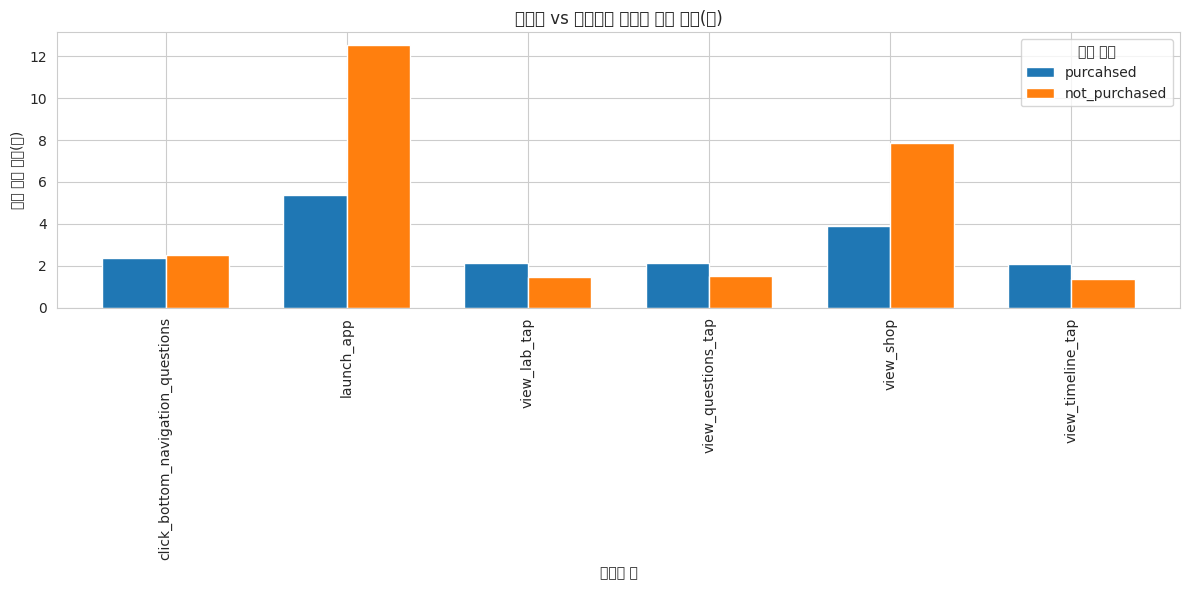

In [50]:
valid_events = ['launch_app', 'view_lab_tap', 'view_questions_tap', 'view_shop', 'view_timeline_tap', 'click_bottom_navigation_questions']
mean_both[mean_both['event_key'].isin(valid_events)].plot(kind='bar', x='event_key', figsize=(12, 6), width=0.7)

plt.title('Í≤∞Ï†úÏûê vs ÎπÑÍ≤∞Ï†úÏûê Ïù¥Î≤§Ìä∏ Ï≤¥Î•ò ÏãúÍ∞Ñ(Ï¥à)')
plt.ylabel('ÌèâÍ∑† Ï≤¥Î•ò ÏãúÍ∞Ñ(Ï¥à)')
plt.xlabel('Ïù¥Î≤§Ìä∏ ÌÇ§')
plt.legend(title='Ïú†Ï†Ä Í∑∏Î£π')
plt.tight_layout()
plt.show()

- Îëê Í∑∏Î£π Î™®Îëê **`click_notice_detail`**(ÏßÄÎ™© Î∞õÏùÄ Ìà¨Ìëú ÌôïÏù∏, Î∞õÏùÄ Í∏Ä ÌôïÏù∏ Îì±), **`click_question_open`**(ÏßÄÎ™© Î∞õÏùÄ Ìà¨Ìëú ÌôïÏù∏)Í≥º Í∞ôÏùÄ Ïù¥Î≤§Ìä∏ÏóêÏÑú **ÌèâÍ∑† Ï≤¥Î•ò ÏãúÍ∞ÑÏù¥ 10Ï¥àÎ•º  Ï¥àÍ≥º**ÌïòÎ©∞, **Í∞ÄÏû• Ïò§Îûò Ï≤¥Î•ò**ÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥ÏòÄÎã§. Ìï¥Îãπ Ïù¥Î≤§Ìä∏ÏóêÏÑú**Îäî Í≤∞Ï†ú Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Îäî ÎÇòÌÉÄÎÇòÏßÄ ÏïäÏïòÎã§**.
- Í≤∞Ï†úÏûê, ÎπÑÍ≤∞Ï†úÏûê Í∑∏Î£πÏùò Ïù¥Î≤§Ìä∏ Ï≤¥Î•ò ÏãúÍ∞Ñ ÎπÑÍµê Í≤∞Í≥º, **Ïï± Ïã§Ìñâ, Ïã§ÌóòÏã§ÌÉ≠ ÏßÑÏûÖ, ÏÉÅÏ†ê ÏßÑÏûÖ, ÏßàÎ¨∏ÌÉ≠ ÏßÑÏûÖ, ÌÉÄÏûÑÎùºÏù∏ÌÉ≠ ÏßÑÏûÖ** Ïù¥Î≤§Ìä∏ÏóêÏÑú **ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥**Í∞Ä ÎÇòÌÉÄÎÇ¨Îã§.
    - Ïù¥Ï§ë **Ïï± Ïã§Ìñâ, ÏÉÅÏ†ê ÏßÑÏûÖ**Ïùò Í≤ΩÏö∞ ÎπÑÍ≤∞Ï†úÏûê Í∑∏Î£πÏóêÏÑú Îçî Í∏∏Í≤å Ï≤¥Î•òÌñàÏúºÎ©∞,
    - **Ïã§ÌóòÏã§ÌÉ≠ ÏßÑÏûÖ, ÏßàÎ¨∏ÌÉ≠ ÏßÑÏûÖ, ÌÉÄÏûÑÎùºÏù∏ÌÉ≠ ÏßÑÏûÖ**ÏóêÏÑúÎäî Í≤∞Ï†úÏûê Í∑∏Î£πÏóêÏÑú Îçî Í∏∏Í≤å Ï≤¥Î•òÌïú Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
- Ïù¥Îäî **Í≤∞Ï†úÏûêÍ∞Ä ÌÉ≠ÏùÑ ÌÉêÏÉâÌï† Îïå ÎπÑÍ≤∞Ï†úÏûêÎ≥¥Îã§ Îçî ÌÅ∞ Í¥ÄÏã¨ÎèÑÏôÄ Î™∞ÏûÖÎèÑ**Î•º Í∞ÄÏßÄÍ≥† Ïï±ÏùÑ ÏÇ¨Ïö©Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.
- **ÏÉÅÏ†ê ÏßÑÏûÖ** Ïù¥Î≤§Ìä∏Ïùò Í≤ΩÏö∞ **ÎπÑÍ≤∞Ï†úÏûê Í∑∏Î£πÏóêÏÑú ÌèâÍ∑† Ï≤¥Î•ò ÏãúÍ∞ÑÏù¥ ÏïΩ 2Î∞∞ ÎÜíÏïòÎã§**. Ïù¥Îäî **Í≤∞Ï†úÏûêÎäî Î™ÖÌôïÌïú Íµ¨Îß§ ÏùòÎèÑÎ•º Í∞ñÍ≥† ÏÉÅÏ†êÏóê ÏßÑÏûÖÌïú ÌõÑ Îπ†Î•¥Í≤å Îã§Ïùå ÌñâÎèôÏúºÎ°ú Îπ†Î•¥Í≤å Ïù¥Îèô**Ìïú Î∞òÎ©¥, **ÎπÑÍ≤∞Ï†úÏûêÎäî Íµ¨Îß§ Ïó¨Î∂ÄÎ•º Í≥†ÎØºÌïòÎ©∞ Ïò§Îûú ÏãúÍ∞Ñ Î®∏Î¨ºÎ†ÄÏùÑ Í∞ÄÎä•ÏÑ±**ÏùÑ ÏãúÏÇ¨ÌïúÎã§.

### Ï£ºÏöî ÌñâÎèô Í≤∞Ï†úÍπåÏßÄ ÏÜåÏöîÏãúÍ∞Ñ

- Ï£ºÏöî ÌñâÎèô Ï†ïÏùò: Í≤∞Ï†ú ÏßÅÏ†Ñ 3Í∞ú ÌñâÎèô Î∂ÑÏÑù Ïãú 30Ìöå Ïù¥ÏÉÅ Îì±Ïû•Ìïú Ïù¥Î≤§Ìä∏
    - ÏÉÅÌíà ÌÅ¥Î¶≠(`click_purchase`)
    - ÏÉÅÏ†ê ÏßÑÏûÖ(`view_shop`)
    - ÏßàÎ¨∏ÌÉ≠ ÏßÑÏûÖ (`click_bottom_navigation_questions` , `view_questions_tap` )
    - Ï∂úÏÑùÏ≤¥ÌÅ¨(`click_attendance`)
    - ÏßÄÎ™© Î∞õÏùÄ Ìà¨Ìëú ÌôïÏù∏(`click_question_open`)
    - ÌÉÄÏûÑÎùºÏù∏ÌÉ≠ ÏßÑÏûÖ (`view_timeline_tap`)
    - Ìà¨Ìëú ÏôÑÎ£å (`complete_question`)
    - Ïã§ÌóòÏã§ÌÉ≠ ÏßÑÏûÖ (`view_lab_tap`)
    - ÌäπÏ†ï ÏïåÎ¶º ÌÅ¥Î¶≠ (`click_notice_detail`)
    - Ïï± Ïó¥Í∏∞ (`launch_app`)
- ÏÜåÏöî ÏãúÍ∞Ñ Ï†ïÏùò:
    - ÎèôÏùºÌïú ÏÑ∏ÏÖò Ï§ë Í≤∞Ï†ú Ï†ÑÏóê Ï£ºÏöî ÌñâÎèôÏùÑ Ìïú Í∏∞Î°ùÏù¥ ÏûàÎäî Í≤ΩÏö∞, Ìï¥Îãπ ÌñâÎèôÍ≥º Í≤∞Ï†úÏôÄÏùò ÏãúÍ∞Ñ Í∞ÑÍ≤©(Î∂Ñ)
    - (Ìïú ÏÑ∏ÏÖò ÎÇ¥Ïóê Í∞ôÏùÄ ÌñâÎèôÏùÑ Ïó¨Îü¨Î≤à Ìï† Í≤ΩÏö∞) Í≤∞Ï†úÏôÄ Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ïù¥Î≤§Ìä∏ÏôÄ Í≤∞Ï†úÍπåÏßÄÏùò ÏãúÍ∞Ñ Í∞ÑÍ≤©(Î∂Ñ)

In [51]:
# Ïú†Ï†ÄÎ≥ÑÎ°ú Ï£ºÏöî Ïù¥Î≤§Ìä∏Î•ºÎ•º ÎßàÏßÄÎßâÏúºÎ°ú ÏàòÌñâÌïú ÏãúÏ†êÏóêÏÑú Í≤∞Ï†úÍπåÏßÄÏùò ÏÜåÏöîÏãúÍ∞Ñ
freq_events = ['click_attendance', 'click_bottom_navigation_questions',
       'click_notice_detail', 'click_purchase', 'click_question_open',
       'complete_question', 'launch_app', 'view_lab_tap',
       'view_questions_tap', 'view_shop', 'view_timeline_tap']

results = []

for event_name in freq_events:
    for (uid, sess), sub in before_complete_purchase.groupby(by=['user_id', 'session']):
        sub = sub.sort_values('event_datetime')

        if 'complete_purchase' in sub['event_key'].values and event_name in sub['event_key'].values:
            purchase_time = sub[sub['event_key'] == 'complete_purchase']['event_datetime'].iloc[0]
            prior_events = sub[(sub['event_key'] == event_name) & (sub['event_datetime'] < purchase_time)]

            if not prior_events.empty:
                last_event_time = prior_events['event_datetime'].iloc[-1]
                delta_minutes = (purchase_time - last_event_time).total_seconds() / 60
                results.append({'event_key': event_name, 'minutes': delta_minutes})

time = pd.DataFrame(results)
time_till_purchase = time.groupby(by='event_key', as_index=False)['minutes'].describe()
time_till_purchase.sort_values(by='mean')

event_key   count       mean         std  \
3                      click_purchase  1699.0   0.808270    1.882439   
9                           view_shop  1698.0   0.935453    2.008220   
8                  view_questions_tap   929.0   2.676211   18.021863   
0                    click_attendance   854.0   5.081889   19.150102   
1   click_bottom_navigation_questions  1410.0   7.697388  188.666741   
2                 click_notice_detail   724.0   7.911763   21.605444   
7                        view_lab_tap  1358.0  11.064924  221.205535   
4                 click_question_open   694.0  11.337224  156.145716   
10                  view_timeline_tap  1219.0  11.800383  233.465648   
5                   complete_question   649.0  12.341243  161.564066   
6                          launch_app  1587.0  13.811174  207.571540   

         min       25%       50%       75%          max  
3   0.133333  0.216667  0.316667  0.583333    27.650000  
9   0.133333  0.300000  0.416667  0.716667    27.683333  
8   0.216667  0.416667  0.700000  1.683333   513.233333  
0   0.200000  0.670833  1.683333  4.754167   513.150000  
1   0.166667  0.416667  0.750000  1.950000  7064.716667  
2   0.300000  1.650000  3.408333  8.337500   517.366667  
7   0.016667  0.466667  0.866667  2.166667  7044.116667  
4   0.266667  0.983333  2.283333  5.083333  4081.800000  
10  0.016667  0.450000  0.800000  1.950000  7044.166667  
5   0.266667  0.833333  2.016667  5.750000  4085.100000  
6   0.216667  1.583333  3.233333  6.925000  7060.466667

In [52]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
t_cleaned_dfs = {}

for event in freq_events:
    event_df = time[time['event_key']==event]
    t_cleaned_dfs[event] = clean_iqr(event_df, 'minutes')

# Ï†ÑÏ≤òÎ¶¨ ÌõÑ Ïù¥Î≤§Ìä∏Î≥Ñ Ï≤¥Î•ò ÏãúÍ∞Ñ
t_cleaned_concat = pd.concat(t_cleaned_dfs).reset_index().drop(columns=['level_0', 'level_1'])
t_cleaned_concat_describe = t_cleaned_concat.groupby(by='event_key', as_index=False).describe()
t_cleaned_concat_describe.columns = t_cleaned_concat_describe.columns.droplevel(0)
t_cleaned_concat_describe.columns = ['event_key', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
t_cleaned_concat_describe.sort_values(by='mean')

event_key   count      mean       std       min  \
3                      click_purchase  1472.0  0.354393  0.205810  0.133333   
9                           view_shop  1480.0  0.457962  0.249225  0.133333   
8                  view_questions_tap   821.0  0.918961  0.745128  0.216667   
1   click_bottom_navigation_questions  1242.0  1.023752  0.882088  0.166667   
10                  view_timeline_tap  1083.0  1.058880  0.882942  0.016667   
7                        view_lab_tap  1197.0  1.149123  0.980854  0.016667   
0                    click_attendance   762.0  2.357087  2.309684  0.200000   
4                 click_question_open   625.0  2.764907  2.403338  0.266667   
5                   complete_question   579.0  2.899453  3.005685  0.266667   
6                          launch_app  1442.0  3.949815  3.309770  0.216667   
2                 click_notice_detail   655.0  4.516590  4.085890  0.300000   

         25%       50%       75%        max  
3   0.216667  0.266667  0.433333   1.116667  
9   0.283333  0.366667  0.554167   1.333333  
8   0.400000  0.616667  1.216667   3.566667  
1   0.400000  0.650000  1.362500   4.233333  
10  0.416667  0.683333  1.400000   4.183333  
7   0.450000  0.750000  1.516667   4.683333  
0   0.633333  1.366667  3.350000  10.800000  
4   0.916667  2.016667  3.933333  11.166667  
5   0.716667  1.600000  4.016667  13.083333  
6   1.450000  2.933333  5.545833  14.916667  
2   1.516667  2.983333  6.350000  18.316667

- Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä, Î™®Îì† Ï£ºÏöî ÌñâÎèôÏùò Í≤∞Ï†úÍπåÏßÄ **ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞ÑÏùÄ 5Î∂Ñ ÎØ∏Îßå**ÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
- ÌäπÌûà **ÏÉÅÏ†ê ÏßÑÏûÖ Î∞è ÏÉÅÌíà ÌÅ¥Î¶≠**ÏùÄ Í≤∞Ï†úÍπåÏßÄ **ÌèâÍ∑† 30Ï¥à ÎØ∏Îßå**Ïùò Îß§Ïö∞ ÏßßÏùÄ ÏãúÍ∞Ñ Í∞ÑÍ≤©ÏùÑ Î≥¥ÏòÄÎã§.
- **ÏßàÎ¨∏ÌÉ≠ ÏßÑÏûÖ(`view_questions_tap`, `click_bottom_navigation_questions`)**Ïùò Í≤ΩÏö∞ Í≤∞Ï†úÍπåÏßÄÏùò ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞ÑÏù¥ ÏïΩ 1Î∂Ñ Ïù¥ÎÇ¥Î°ú ÎÇòÌÉÄÎÇò, Ìï¥Îãπ ÌñâÎèô Ïù¥ÌõÑ ÏßßÏùÄ ÏãúÍ∞Ñ ÎÇ¥Ïóê Íµ¨Îß§ ÏùòÎèÑÎ•º Í∞ÄÏßÄÍ≥† ÏÉÅÏ†êÏúºÎ°ú ÏßÑÏûÖÌñàÏùÑ Í∞ÄÎä•ÏÑ±ÏùÑ ÏãúÏÇ¨ÌñàÎã§.
- **ÌÉÄÏûÑÎùºÏù∏ÌÉ≠ Î∞è Ïã§ÌóòÏã§ÌÉ≠** ÎòêÌïú ÏßàÎ¨∏ÌÉ≠Í≥º Ïú†ÏÇ¨Ìïú ÏñëÏÉÅÏùÑ Î≥¥ÏòÄÎã§.
- **Î∞õÏùÄ ÏßàÎ¨∏ Ïó¥Í∏∞, Ï∂úÏÑùÏ≤¥ÌÅ¨, ÌäπÏ†ï ÏïåÎ¶º ÌÅ¥Î¶≠** Ïù¥Î≤§Ìä∏Ïùò Í≤ΩÏö∞ Í≤∞Ï†úÏûê Í∑∏Î£π ÎÇ¥ **Î∞úÏÉù ÎπàÎèÑÍ∞Ä 40% ÎÇ¥Ïô∏Î°ú Ïú†ÏÇ¨**ÌïòÏßÄÎßå, **ÌäπÏ†ï ÏïåÎ¶º ÌÅ¥Î¶≠**ÏùÄ Í≤∞Ï†úÍπåÏßÄ **ÌèâÍ∑† 4Î∂Ñ Ïù¥ÏÉÅ ÏÜåÏöî**ÎêòÏñ¥, **Îã§Î•∏ ÌñâÎèô ÎåÄÎπÑ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Í∏¥ ÏãúÍ∞Ñ Í∞ÑÍ≤©**ÏùÑ Î≥¥ÏòÄÎã§.
- Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú **Í≤∞Ï†úÏûêÎäî ÎßàÏßÄÎßâ Ïï± Ïã§Ìñâ Ïù¥ÌõÑ 4Î∂Ñ Ïù¥ÎÇ¥Ïóê Í≤∞Ï†úÎ•º ÏôÑÎ£å**Ìïú Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.

### Ïù¥Î≤§Ìä∏Î≥Ñ Ï†ÑÌôòÎ•† / ÌçºÎÑê Î∂ÑÏÑù

```
* sequential_pattern_mining Í∏∞Î∞ò ÌïòÌä∏ Í≤∞Ï†ú Funnel Íµ¨ÏÑ± *

    1. ÏÉÅÏ†ê ÏßÑÏûÖ > ÏÉÅÌíà ÌÅ¥Î¶≠ > Í≤∞Ï†ú ÏôÑÎ£å
        - view_shop > click_purchase > complete_purchase

    2. ÏßàÎ¨∏ÌÉ≠ ÏßÑÏûÖ > ÏÉÅÏ†ê ÏßÑÏûÖ > ÏÉÅÌíà ÌÅ¥Î¶≠ > Í≤∞Ï†ú ÏôÑÎ£å
        - click_bottom_navigation_questions(ÏßàÎ¨∏ÌÉ≠ ÏßÑÏûÖ) > view_shop > click_purchase > complete_purchase
        - ÏßàÎ¨∏Ìï†Îïå ÌïòÌä∏Î•º Ï∂©Ï†Ñ (Ï∂îÏ∏° : ÏùºÏ†ïÏãúÍ∞Ñ ÏßàÎ¨∏ Í∞úÏàò Ï†úÌïú)

    3. Ï∂úÏÑùÏ≤¥ÌÅ¨ > ÏÉÅÏ†ê ÏßÑÏûÖ > ÏÉÅÌíà ÌÅ¥Î¶≠ > Í≤∞Ï†ú ÏôÑÎ£å
        - click_attendance > view_shop > click_purchase > complete_purchase

    4. Î∞õÏùÄ ÏßàÎ¨∏ Ïó¥Í∏∞ > ÏÉÅÏ†ê ÏßÑÏûÖ > ÏÉÅÌíà ÌÅ¥Î¶≠ > Í≤∞Ï†ú ÏôÑÎ£å
        - click_question_open > view_shop > click_purchase > complete_purchase

    5. ÌÉÄÏûÑÎùºÏù∏ ÌÉ≠ > ÏÉÅÏ†ê ÏßÑÏûÖ > ÏÉÅÌíà ÌÅ¥Î¶≠ > Í≤∞Ï†ú ÏôÑÎ£å
        - view_timeline_tap > view_shop > click_purchase > complete_purchase

    6. Ìà¨ÌëúÏôÑÎ£å ÌÉ≠ > ÏÉÅÏ†ê ÏßÑÏûÖ > ÏÉÅÌíà ÌÅ¥Î¶≠ > Í≤∞Ï†ú ÏôÑÎ£å
        - complete_question > view_shop > click_purchase > complete_purchase

    7. Ïã§ÌóòÏã§ ÌÉ≠ > ÏÉÅÏ†ê ÏßÑÏûÖ > ÏÉÅÌíà ÌÅ¥Î¶≠ > Í≤∞Ï†ú ÏôÑÎ£å
        - view_lab_tap > view_shop > click_purchase > complete_purchase

    8. ÏÉÅÏÑ∏ÏïåÎ¶º ÌÅ¥Î¶≠ > ÏÉÅÏ†ê ÏßÑÏûÖ > ÏÉÅÌíà ÌÅ¥Î¶≠ > Í≤∞Ï†ú ÏôÑÎ£å
        - click_notice_detail > view_shop > click_purchase > complete_purchase

    9. ÏÉÅÏ†ê ÏßÑÏûÖ > ÏÉÅÌíà ÌÅ¥Î¶≠ > Í≤∞Ï†ú ÏôÑÎ£å
        - view_shop > click_purchase > complete_purchase
```

In [6]:
events = hackle_events.copy()

In [7]:
# ÌçºÎÑê Íµ¨ÏÑ±Ïóê ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Ï∂îÏ∂ú
events = events[['event_datetime', 'event_key', 'session_id', 'session', 'item_name']]

#### 2. Funnel (Ìà¨ÌëúÌÉ≠ ÏßÑÏûÖ Ïù¥ÌõÑ)

In [8]:
# Ïú†Ï†Ä Î≥Ñ ÌäπÏ†ï ÏãúÏ†ê Ïù¥ÌõÑÏùò Î°úÍ∑∏Îßå Ï∂îÏ∂ú
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'click_bottom_navigation_questions'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# ÏµúÏ¢Ö Î≥ëÌï©
after_click_questions_log = pd.concat(result_list)

In [9]:
# Ï£ºÏöî Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
filtered_after_after_click_questions_log = after_click_questions_log[after_click_questions_log['event_key'].isin([
        'click_bottom_navigation_questions',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [10]:
# Í∞Å ÏÑ∏ÏÖòÏù¥ Ïñ¥Îñ§ Í∏∞Îä•(page_name)ÏùÑ ÏÇ¨Ïö©ÌñàÎäîÏßÄ 0/1Î°ú ÌëúÏãú
funnel_matrix = filtered_after_after_click_questions_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# Í∞Å Í∏∞Îä•Î≥Ñ ÏÇ¨Ïö©Îêú ÏÑ∏ÏÖò Ïàò (0Ïù¥ ÏïÑÎãå Ïàò)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [11]:
# ÌçºÎÑê ÏàúÏÑú
ordered_steps = ['click_bottom_navigation_questions', 'view_shop', 'click_purchase', 'complete_purchase']

# Í∏∞Ï°¥ funnel_countsÎ•º Ìï¥Îãπ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ (ÏóÜÎäî Îã®Í≥ÑÎäî 0ÏúºÎ°ú Ï±ÑÏõÄ)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_nameÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï®
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# Ï†ÑÏ≤¥ Ï≤´ Îã®Í≥Ñ ÏÑ∏ÏÖò Ïàò Í∏∞Ï§ÄÏúºÎ°ú ÎàÑÏ†Å Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

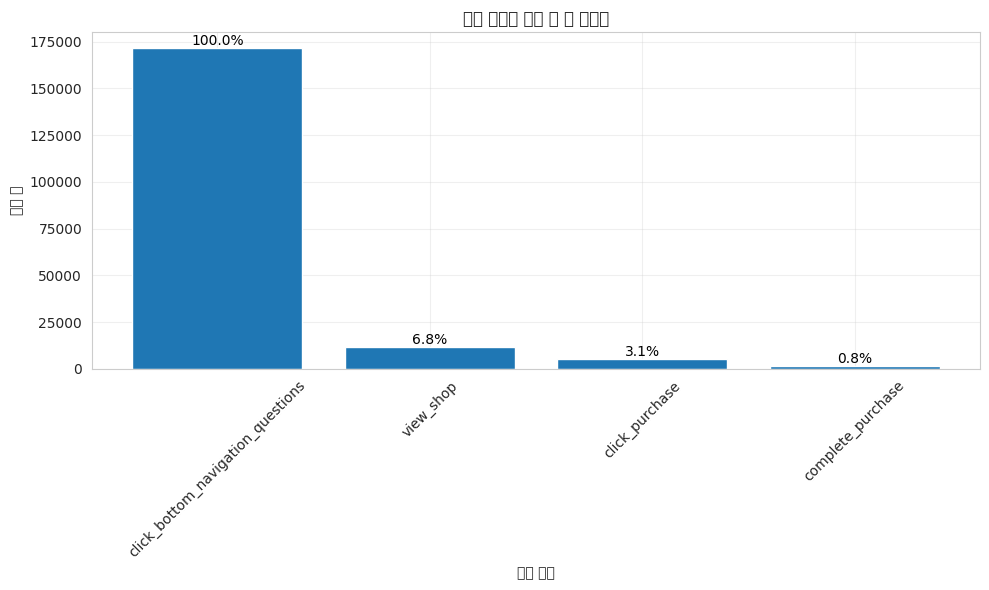

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
bars = ax1.bar(ordered_funnel_counts['event_key'],       # barsÎ°ú Î∞õÍ∏∞
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('Í∏∞Îä• Îã®Í≥Ñ')
ax1.set_ylabel('Ïú†Ï†Ä Ïàò')

# ÎßâÎåÄ ÏúÑÏóê Ï†ÑÌôòÏú® ÌÖçÏä§Ìä∏ ÌëúÏãú
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # barsÏóê Ï†ÑÌôòÏú®ÏùÑ Î≥ëÎ†¨Î°ú Î¨∂Ïñ¥Ï£ºÍ∏∞
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar ÏôºÏ™Ω Ï¢åÌëú, get_width() = bar ÎÑàÎπÑ
             bar.get_height(),                           # y Ï¢åÌëú
             f'{rate * 100:.1f}%',                       # text ÌòïÌÉú
             ha='center',                                # text ÏàòÌèâ Ï†ïÎ†¨ Î∞©Ïãù (Í∞ÄÏö¥Îç∞ Ï†ïÎ†¨)
             va='bottom',                                # text ÏàòÏßÅ Ï†ïÎ†¨ Î∞©Ïãù (ÎßâÎåÄ ÏúÑ)
             fontsize=10,                                # Í∏ÄÏûê ÌÅ¨Í∏∞
             color='black')                              # Í∏ÄÏûê ÏÉâÏÉÅ

plt.title('ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ÑÌôòÏú®')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 3. Funnel (Ï∂úÏÑùÏ≤¥ÌÅ¨ ÏßÑÏûÖ Ïù¥ÌõÑ)

```
  3. Ï∂úÏÑùÏ≤¥ÌÅ¨ > ÏÉÅÏ†ê ÏßÑÏûÖ > ÏÉÅÌíà ÌÅ¥Î¶≠ > Í≤∞Ï†ú ÏôÑÎ£å
```

In [13]:
# Ïú†Ï†Ä Î≥Ñ ÌäπÏ†ï ÏãúÏ†ê Ïù¥ÌõÑÏùò Î°úÍ∑∏Îßå Ï∂îÏ∂ú
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'click_attendance'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# ÏµúÏ¢Ö Î≥ëÌï©
after_click_attendance_log = pd.concat(result_list)

In [14]:
# Ï£ºÏöî Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
filtered_after_click_attendance_log = after_click_attendance_log[after_click_attendance_log['event_key'].isin([
        'click_attendance',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [15]:
# Í∞Å ÏÑ∏ÏÖòÏù¥ Ïñ¥Îñ§ Í∏∞Îä•(page_name)ÏùÑ ÏÇ¨Ïö©ÌñàÎäîÏßÄ 0/1Î°ú ÌëúÏãú
funnel_matrix = filtered_after_click_attendance_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# Í∞Å Í∏∞Îä•Î≥Ñ ÏÇ¨Ïö©Îêú ÏÑ∏ÏÖò Ïàò (0Ïù¥ ÏïÑÎãå Ïàò)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [16]:
# ÌçºÎÑê ÏàúÏÑú
ordered_steps = ['click_attendance', 'view_shop', 'click_purchase', 'complete_purchase']

# Í∏∞Ï°¥ funnel_countsÎ•º Ìï¥Îãπ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ (ÏóÜÎäî Îã®Í≥ÑÎäî 0ÏúºÎ°ú Ï±ÑÏõÄ)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_nameÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï®
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# Ï†ÑÏ≤¥ Ï≤´ Îã®Í≥Ñ ÏÑ∏ÏÖò Ïàò Í∏∞Ï§ÄÏúºÎ°ú ÎàÑÏ†Å Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [17]:
ordered_funnel_counts

event_key  session_count  conversion_rate
0   click_attendance          47813            1.000
1          view_shop           7149            0.150
2     click_purchase           3731            0.078
3  complete_purchase            847            0.018

/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

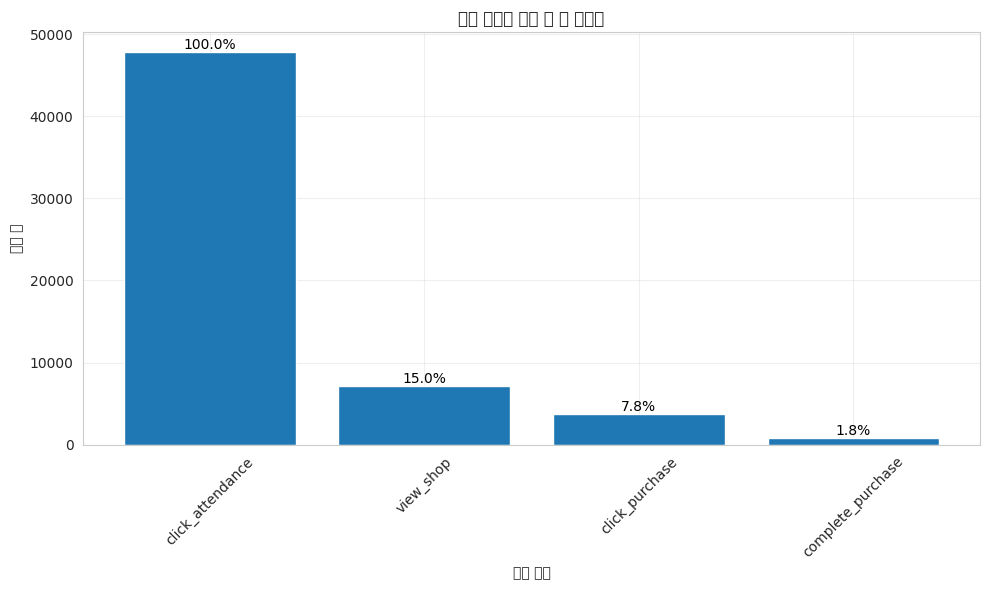

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
bars = ax1.bar(ordered_funnel_counts['event_key'],       # barsÎ°ú Î∞õÍ∏∞
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('Í∏∞Îä• Îã®Í≥Ñ')
ax1.set_ylabel('Ïú†Ï†Ä Ïàò')

# ÎßâÎåÄ ÏúÑÏóê Ï†ÑÌôòÏú® ÌÖçÏä§Ìä∏ ÌëúÏãú
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # barsÏóê Ï†ÑÌôòÏú®ÏùÑ Î≥ëÎ†¨Î°ú Î¨∂Ïñ¥Ï£ºÍ∏∞
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar ÏôºÏ™Ω Ï¢åÌëú, get_width() = bar ÎÑàÎπÑ
             bar.get_height(),                           # y Ï¢åÌëú
             f'{rate * 100:.1f}%',                       # text ÌòïÌÉú
             ha='center',                                # text ÏàòÌèâ Ï†ïÎ†¨ Î∞©Ïãù (Í∞ÄÏö¥Îç∞ Ï†ïÎ†¨)
             va='bottom',                                # text ÏàòÏßÅ Ï†ïÎ†¨ Î∞©Ïãù (ÎßâÎåÄ ÏúÑ)
             fontsize=10,                                # Í∏ÄÏûê ÌÅ¨Í∏∞
             color='black')                              # Í∏ÄÏûê ÏÉâÏÉÅ

plt.title('ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ÑÌôòÏú®')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 4. Funnel (Î∞õÏùÄ Ìà¨Ìëú Ïó¥Í∏∞ Ïù¥ÌõÑ)

In [19]:
# Ïú†Ï†Ä Î≥Ñ ÌäπÏ†ï ÏãúÏ†ê Ïù¥ÌõÑÏùò Î°úÍ∑∏Îßå Ï∂îÏ∂ú
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'click_question_open'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# ÏµúÏ¢Ö Î≥ëÌï©
after_click_question_open_log = pd.concat(result_list)

In [20]:
# Ï£ºÏöî Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
filtered_after_click_question_open_log_log = after_click_question_open_log[after_click_question_open_log['event_key'].isin([
        'click_question_open',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [21]:
# Í∞Å ÏÑ∏ÏÖòÏù¥ Ïñ¥Îñ§ Í∏∞Îä•(page_name)ÏùÑ ÏÇ¨Ïö©ÌñàÎäîÏßÄ 0/1Î°ú ÌëúÏãú
funnel_matrix = filtered_after_click_question_open_log_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# Í∞Å Í∏∞Îä•Î≥Ñ ÏÇ¨Ïö©Îêú ÏÑ∏ÏÖò Ïàò (0Ïù¥ ÏïÑÎãå Ïàò)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [22]:
# ÌçºÎÑê ÏàúÏÑú
ordered_steps = ['click_question_open', 'view_shop', 'click_purchase', 'complete_purchase']

# Í∏∞Ï°¥ funnel_countsÎ•º Ìï¥Îãπ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ (ÏóÜÎäî Îã®Í≥ÑÎäî 0ÏúºÎ°ú Ï±ÑÏõÄ)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_nameÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï®
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# Ï†ÑÏ≤¥ Ï≤´ Îã®Í≥Ñ ÏÑ∏ÏÖò Ïàò Í∏∞Ï§ÄÏúºÎ°ú ÎàÑÏ†Å Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [23]:
ordered_funnel_counts

event_key  session_count  conversion_rate
0  click_question_open         113654            1.000
1            view_shop          11396            0.100
2       click_purchase           3257            0.029
3    complete_purchase            675            0.006

/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

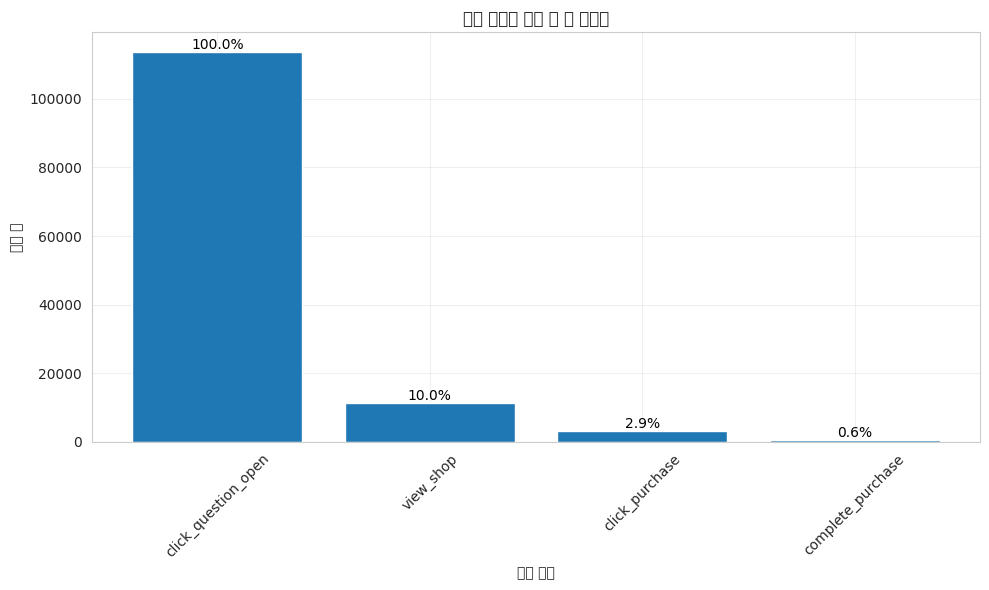

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
bars = ax1.bar(ordered_funnel_counts['event_key'],       # barsÎ°ú Î∞õÍ∏∞
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('Í∏∞Îä• Îã®Í≥Ñ')
ax1.set_ylabel('Ïú†Ï†Ä Ïàò')

# ÎßâÎåÄ ÏúÑÏóê Ï†ÑÌôòÏú® ÌÖçÏä§Ìä∏ ÌëúÏãú
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # barsÏóê Ï†ÑÌôòÏú®ÏùÑ Î≥ëÎ†¨Î°ú Î¨∂Ïñ¥Ï£ºÍ∏∞
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar ÏôºÏ™Ω Ï¢åÌëú, get_width() = bar ÎÑàÎπÑ
             bar.get_height(),                           # y Ï¢åÌëú
             f'{rate * 100:.1f}%',                       # text ÌòïÌÉú
             ha='center',                                # text ÏàòÌèâ Ï†ïÎ†¨ Î∞©Ïãù (Í∞ÄÏö¥Îç∞ Ï†ïÎ†¨)
             va='bottom',                                # text ÏàòÏßÅ Ï†ïÎ†¨ Î∞©Ïãù (ÎßâÎåÄ ÏúÑ)
             fontsize=10,                                # Í∏ÄÏûê ÌÅ¨Í∏∞
             color='black')                              # Í∏ÄÏûê ÏÉâÏÉÅ

plt.title('ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ÑÌôòÏú®')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 5. Funnel (ÌÉÄÏûÑÎùºÏù∏ ÌÉ≠ )

In [25]:
# Ïú†Ï†Ä Î≥Ñ ÌäπÏ†ï ÏãúÏ†ê Ïù¥ÌõÑÏùò Î°úÍ∑∏Îßå Ï∂îÏ∂ú
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'view_timeline_tap'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# ÏµúÏ¢Ö Î≥ëÌï©
after_view_timeline_tap_log = pd.concat(result_list)

In [26]:
# Ï£ºÏöî Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
filtered_after_view_timeline_tap_log = after_view_timeline_tap_log[after_view_timeline_tap_log['event_key'].isin([
        'view_timeline_tap',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [27]:
filtered_after_view_timeline_tap_log[filtered_after_view_timeline_tap_log['event_key']=='view_timeline_tap']['session_id'].nunique()

166432

In [28]:
# Í∞Å ÏÑ∏ÏÖòÏù¥ Ïñ¥Îñ§ Í∏∞Îä•(page_name)ÏùÑ ÏÇ¨Ïö©ÌñàÎäîÏßÄ 0/1Î°ú ÌëúÏãú
funnel_matrix = filtered_after_view_timeline_tap_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# Í∞Å Í∏∞Îä•Î≥Ñ ÏÇ¨Ïö©Îêú ÏÑ∏ÏÖò Ïàò (0Ïù¥ ÏïÑÎãå Ïàò)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [29]:
# ÌçºÎÑê ÏàúÏÑú
ordered_steps = ['view_timeline_tap', 'view_shop', 'click_purchase', 'complete_purchase']

# Í∏∞Ï°¥ funnel_countsÎ•º Ìï¥Îãπ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ (ÏóÜÎäî Îã®Í≥ÑÎäî 0ÏúºÎ°ú Ï±ÑÏõÄ)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_nameÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï®
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# Ï†ÑÏ≤¥ Ï≤´ Îã®Í≥Ñ ÏÑ∏ÏÖò Ïàò Í∏∞Ï§ÄÏúºÎ°ú ÎàÑÏ†Å Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [30]:
ordered_funnel_counts

event_key  session_count  conversion_rate
0  view_timeline_tap         166432            1.000
1          view_shop           9667            0.058
2     click_purchase           4434            0.027
3  complete_purchase           1186            0.007

/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

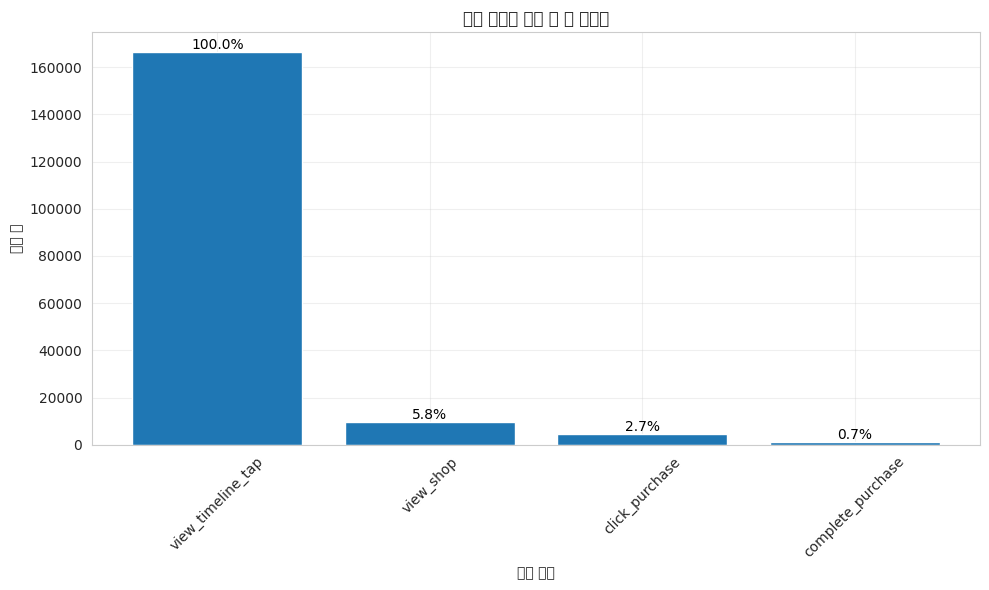

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
bars = ax1.bar(ordered_funnel_counts['event_key'],       # barsÎ°ú Î∞õÍ∏∞
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('Í∏∞Îä• Îã®Í≥Ñ')
ax1.set_ylabel('Ïú†Ï†Ä Ïàò')

# ÎßâÎåÄ ÏúÑÏóê Ï†ÑÌôòÏú® ÌÖçÏä§Ìä∏ ÌëúÏãú
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # barsÏóê Ï†ÑÌôòÏú®ÏùÑ Î≥ëÎ†¨Î°ú Î¨∂Ïñ¥Ï£ºÍ∏∞
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar ÏôºÏ™Ω Ï¢åÌëú, get_width() = bar ÎÑàÎπÑ
             bar.get_height(),                           # y Ï¢åÌëú
             f'{rate * 100:.1f}%',                       # text ÌòïÌÉú
             ha='center',                                # text ÏàòÌèâ Ï†ïÎ†¨ Î∞©Ïãù (Í∞ÄÏö¥Îç∞ Ï†ïÎ†¨)
             va='bottom',                                # text ÏàòÏßÅ Ï†ïÎ†¨ Î∞©Ïãù (ÎßâÎåÄ ÏúÑ)
             fontsize=10,                                # Í∏ÄÏûê ÌÅ¨Í∏∞
             color='black')                              # Í∏ÄÏûê ÏÉâÏÉÅ

plt.title('ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ÑÌôòÏú®')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 6. Funnel (Ìà¨ÌëúÏôÑÎ£å)

In [32]:
# Ïú†Ï†Ä Î≥Ñ ÌäπÏ†ï ÏãúÏ†ê Ïù¥ÌõÑÏùò Î°úÍ∑∏Îßå Ï∂îÏ∂ú
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'complete_question'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# ÏµúÏ¢Ö Î≥ëÌï©
after_view_complete_question_log = pd.concat(result_list)

In [33]:
after_view_complete_question_log

event_datetime                        event_key  \
3112073  2023-07-24 11:55:16+09:00                complete_question   
5889930  2023-07-30 19:39:26+09:00                complete_question   
5889963  2023-07-30 19:39:33+09:00      click_bottom_navigation_lab   
5889966  2023-07-30 19:39:33+09:00                view_timeline_tap   
5889968  2023-07-30 19:39:34+09:00  click_bottom_navigation_profile   
...                            ...                              ...   
9023171  2023-08-07 22:52:58+09:00                complete_question   
9023204  2023-08-07 22:53:07+09:00                        view_shop   
9023214  2023-08-07 22:53:09+09:00                   click_purchase   
9023234  2023-08-07 22:53:13+09:00                 click_attendance   
9023253  2023-08-07 22:53:17+09:00              click_friend_invite   

                                   session_id  session item_name  
3112073  00025EE1-BA46-4853-8FDD-B991FABA328F        2       NaN  
5889930  00025EE1-BA46-4853-8FDD-B991FABA328F        3       NaN  
5889963  00025EE1-BA46-4853-8FDD-B991FABA328F        3       NaN  
5889966  00025EE1-BA46-4853-8FDD-B991FABA328F        3       NaN  
5889968  00025EE1-BA46-4853-8FDD-B991FABA328F        3       NaN  
...                                       ...      ...       ...  
9023171          zzp5kLCeZNgz4dbwZaQ2s7Bqrhc2        4       NaN  
9023204          zzp5kLCeZNgz4dbwZaQ2s7Bqrhc2        4       NaN  
9023214          zzp5kLCeZNgz4dbwZaQ2s7Bqrhc2        4     Î¨¥Î£åÏ∂©Ï†ÑÏÜå  
9023234          zzp5kLCeZNgz4dbwZaQ2s7Bqrhc2        4       NaN  
9023253          zzp5kLCeZNgz4dbwZaQ2s7Bqrhc2        4       NaN  

[1594235 rows x 5 columns]

In [34]:
# Ï£ºÏöî Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
filtered_after_view_complete_question_log = after_view_complete_question_log[after_view_complete_question_log['event_key'].isin([
        'complete_question',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [35]:
filtered_after_view_complete_question_log[filtered_after_view_complete_question_log['event_key']=='complete_question']['session_id'].nunique()

49980

In [36]:
# Í∞Å ÏÑ∏ÏÖòÏù¥ Ïñ¥Îñ§ Í∏∞Îä•(page_name)ÏùÑ ÏÇ¨Ïö©ÌñàÎäîÏßÄ 0/1Î°ú ÌëúÏãú
funnel_matrix = filtered_after_view_complete_question_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# Í∞Å Í∏∞Îä•Î≥Ñ ÏÇ¨Ïö©Îêú ÏÑ∏ÏÖò Ïàò (0Ïù¥ ÏïÑÎãå Ïàò)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [37]:
# ÌçºÎÑê ÏàúÏÑú
ordered_steps = ['complete_question', 'view_shop', 'click_purchase', 'complete_purchase']

# Í∏∞Ï°¥ funnel_countsÎ•º Ìï¥Îãπ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ (ÏóÜÎäî Îã®Í≥ÑÎäî 0ÏúºÎ°ú Ï±ÑÏõÄ)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_nameÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï®
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# Ï†ÑÏ≤¥ Ï≤´ Îã®Í≥Ñ ÏÑ∏ÏÖò Ïàò Í∏∞Ï§ÄÏúºÎ°ú ÎàÑÏ†Å Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [38]:
ordered_funnel_counts

event_key  session_count  conversion_rate
0  complete_question          49980            1.000
1          view_shop           5071            0.101
2     click_purchase           2732            0.055
3  complete_purchase            655            0.013

/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

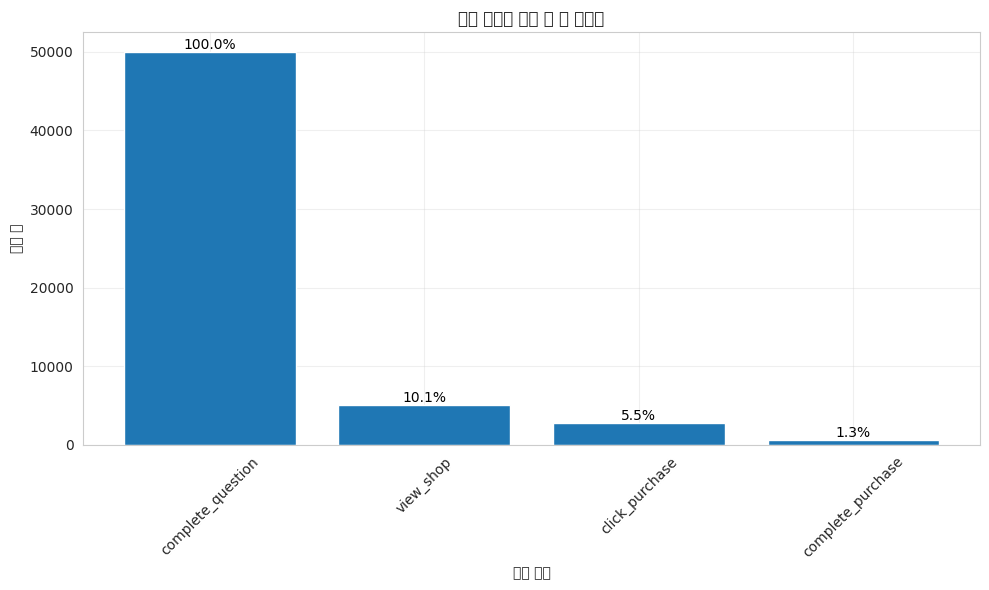

In [39]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
bars = ax1.bar(ordered_funnel_counts['event_key'],       # barsÎ°ú Î∞õÍ∏∞
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('Í∏∞Îä• Îã®Í≥Ñ')
ax1.set_ylabel('Ïú†Ï†Ä Ïàò')

# ÎßâÎåÄ ÏúÑÏóê Ï†ÑÌôòÏú® ÌÖçÏä§Ìä∏ ÌëúÏãú
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # barsÏóê Ï†ÑÌôòÏú®ÏùÑ Î≥ëÎ†¨Î°ú Î¨∂Ïñ¥Ï£ºÍ∏∞
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar ÏôºÏ™Ω Ï¢åÌëú, get_width() = bar ÎÑàÎπÑ
             bar.get_height(),                           # y Ï¢åÌëú
             f'{rate * 100:.1f}%',                       # text ÌòïÌÉú
             ha='center',                                # text ÏàòÌèâ Ï†ïÎ†¨ Î∞©Ïãù (Í∞ÄÏö¥Îç∞ Ï†ïÎ†¨)
             va='bottom',                                # text ÏàòÏßÅ Ï†ïÎ†¨ Î∞©Ïãù (ÎßâÎåÄ ÏúÑ)
             fontsize=10,                                # Í∏ÄÏûê ÌÅ¨Í∏∞
             color='black')                              # Í∏ÄÏûê ÏÉâÏÉÅ

plt.title('ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ÑÌôòÏú®')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 7. Funnel (view_questions_tap(ÎòêÎã§Î•∏ ÏßàÎ¨∏ÌÉ≠ ÏßÑÏûÖ))

In [40]:
# Ïú†Ï†Ä Î≥Ñ ÌäπÏ†ï ÏãúÏ†ê Ïù¥ÌõÑÏùò Î°úÍ∑∏Îßå Ï∂îÏ∂ú
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'view_questions_tap'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# ÏµúÏ¢Ö Î≥ëÌï©
after_view_questions_tap_log = pd.concat(result_list)

In [41]:
# Ï£ºÏöî Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
filtered_after_view_questions_tap_log = after_view_questions_tap_log[after_view_questions_tap_log['event_key'].isin([
        'view_questions_tap',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [42]:
filtered_after_view_questions_tap_log[filtered_after_view_questions_tap_log['event_key']=='view_questions_tap']['session_id'].nunique()

107668

In [43]:
# Í∞Å ÏÑ∏ÏÖòÏù¥ Ïñ¥Îñ§ Í∏∞Îä•(page_name)ÏùÑ ÏÇ¨Ïö©ÌñàÎäîÏßÄ 0/1Î°ú ÌëúÏãú
funnel_matrix = filtered_after_view_questions_tap_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# Í∞Å Í∏∞Îä•Î≥Ñ ÏÇ¨Ïö©Îêú ÏÑ∏ÏÖò Ïàò (0Ïù¥ ÏïÑÎãå Ïàò)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [44]:
# ÌçºÎÑê ÏàúÏÑú
ordered_steps = ['view_questions_tap', 'view_shop', 'click_purchase', 'complete_purchase']

# Í∏∞Ï°¥ funnel_countsÎ•º Ìï¥Îãπ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ (ÏóÜÎäî Îã®Í≥ÑÎäî 0ÏúºÎ°ú Ï±ÑÏõÄ)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_nameÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï®
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# Ï†ÑÏ≤¥ Ï≤´ Îã®Í≥Ñ ÏÑ∏ÏÖò Ïàò Í∏∞Ï§ÄÏúºÎ°ú ÎàÑÏ†Å Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [45]:
ordered_funnel_counts

event_key  session_count  conversion_rate
0  view_questions_tap         107668            1.000
1           view_shop           7213            0.067
2      click_purchase           3372            0.031
3   complete_purchase            912            0.008

/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

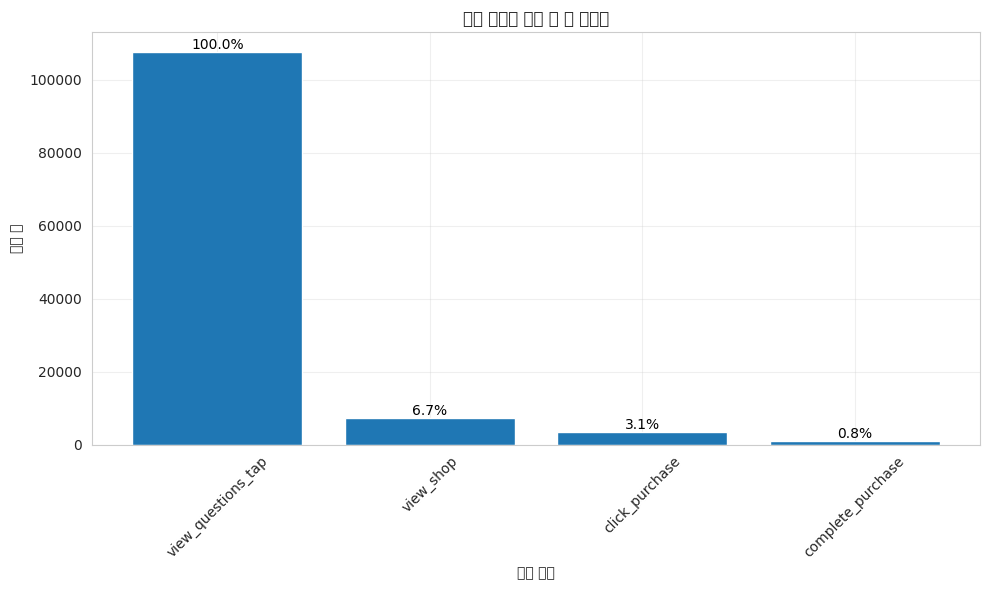

In [46]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
bars = ax1.bar(ordered_funnel_counts['event_key'],       # barsÎ°ú Î∞õÍ∏∞
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('Í∏∞Îä• Îã®Í≥Ñ')
ax1.set_ylabel('Ïú†Ï†Ä Ïàò')

# ÎßâÎåÄ ÏúÑÏóê Ï†ÑÌôòÏú® ÌÖçÏä§Ìä∏ ÌëúÏãú
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # barsÏóê Ï†ÑÌôòÏú®ÏùÑ Î≥ëÎ†¨Î°ú Î¨∂Ïñ¥Ï£ºÍ∏∞
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar ÏôºÏ™Ω Ï¢åÌëú, get_width() = bar ÎÑàÎπÑ
             bar.get_height(),                           # y Ï¢åÌëú
             f'{rate * 100:.1f}%',                       # text ÌòïÌÉú
             ha='center',                                # text ÏàòÌèâ Ï†ïÎ†¨ Î∞©Ïãù (Í∞ÄÏö¥Îç∞ Ï†ïÎ†¨)
             va='bottom',                                # text ÏàòÏßÅ Ï†ïÎ†¨ Î∞©Ïãù (ÎßâÎåÄ ÏúÑ)
             fontsize=10,                                # Í∏ÄÏûê ÌÅ¨Í∏∞
             color='black')                              # Í∏ÄÏûê ÏÉâÏÉÅ

plt.title('ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ÑÌôòÏú®')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 8. Funnel (Ïã§ÌóòÏã§ÌÉ≠ÏßÑÏûÖ)


In [47]:
# Ïú†Ï†Ä Î≥Ñ ÌäπÏ†ï ÏãúÏ†ê Ïù¥ÌõÑÏùò Î°úÍ∑∏Îßå Ï∂îÏ∂ú
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'view_lab_tap'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# ÏµúÏ¢Ö Î≥ëÌï©
after_view_lab_tap_log = pd.concat(result_list)

In [48]:
# Ï£ºÏöî Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
filtered_after_view_lab_tap_log = after_view_lab_tap_log[after_view_lab_tap_log['event_key'].isin([
        'view_lab_tap',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [49]:
filtered_after_view_lab_tap_log[filtered_after_view_lab_tap_log['event_key']=='view_lab_tap']['session_id'].nunique()

177189

In [50]:
# Í∞Å ÏÑ∏ÏÖòÏù¥ Ïñ¥Îñ§ Í∏∞Îä•(page_name)ÏùÑ ÏÇ¨Ïö©ÌñàÎäîÏßÄ 0/1Î°ú ÌëúÏãú
funnel_matrix = filtered_after_view_lab_tap_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# Í∞Å Í∏∞Îä•Î≥Ñ ÏÇ¨Ïö©Îêú ÏÑ∏ÏÖò Ïàò (0Ïù¥ ÏïÑÎãå Ïàò)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [51]:
# ÌçºÎÑê ÏàúÏÑú
ordered_steps = ['view_lab_tap', 'view_shop', 'click_purchase', 'complete_purchase']

# Í∏∞Ï°¥ funnel_countsÎ•º Ìï¥Îãπ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ (ÏóÜÎäî Îã®Í≥ÑÎäî 0ÏúºÎ°ú Ï±ÑÏõÄ)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_nameÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï®
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# Ï†ÑÏ≤¥ Ï≤´ Îã®Í≥Ñ ÏÑ∏ÏÖò Ïàò Í∏∞Ï§ÄÏúºÎ°ú ÎàÑÏ†Å Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [52]:
ordered_funnel_counts

event_key  session_count  conversion_rate
0       view_lab_tap         177189            1.000
1          view_shop          10209            0.058
2     click_purchase           4887            0.028
3  complete_purchase           1321            0.007

/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

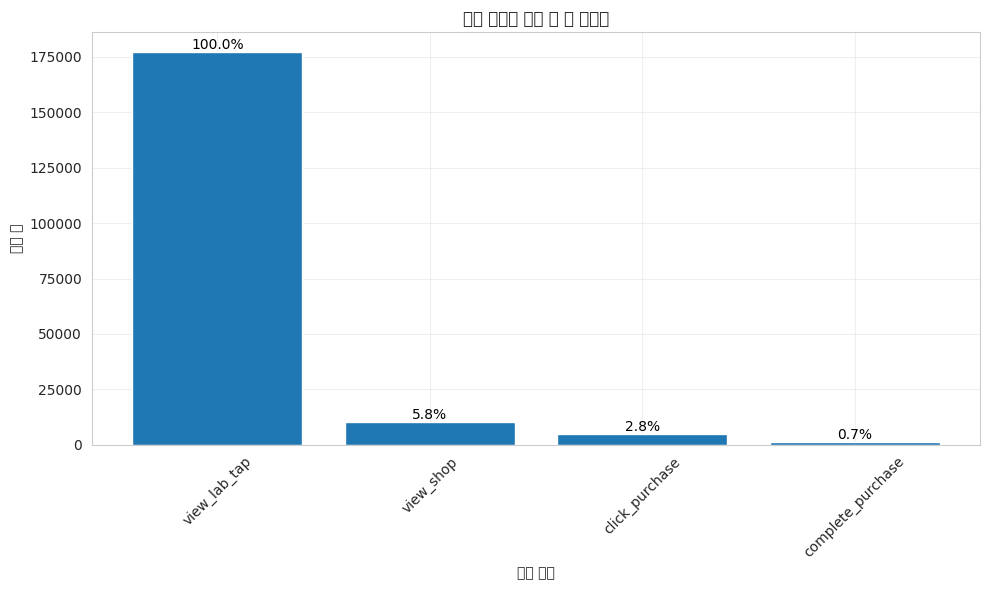

In [53]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
bars = ax1.bar(ordered_funnel_counts['event_key'],       # barsÎ°ú Î∞õÍ∏∞
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('Í∏∞Îä• Îã®Í≥Ñ')
ax1.set_ylabel('Ïú†Ï†Ä Ïàò')

# ÎßâÎåÄ ÏúÑÏóê Ï†ÑÌôòÏú® ÌÖçÏä§Ìä∏ ÌëúÏãú
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # barsÏóê Ï†ÑÌôòÏú®ÏùÑ Î≥ëÎ†¨Î°ú Î¨∂Ïñ¥Ï£ºÍ∏∞
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar ÏôºÏ™Ω Ï¢åÌëú, get_width() = bar ÎÑàÎπÑ
             bar.get_height(),                           # y Ï¢åÌëú
             f'{rate * 100:.1f}%',                       # text ÌòïÌÉú
             ha='center',                                # text ÏàòÌèâ Ï†ïÎ†¨ Î∞©Ïãù (Í∞ÄÏö¥Îç∞ Ï†ïÎ†¨)
             va='bottom',                                # text ÏàòÏßÅ Ï†ïÎ†¨ Î∞©Ïãù (ÎßâÎåÄ ÏúÑ)
             fontsize=10,                                # Í∏ÄÏûê ÌÅ¨Í∏∞
             color='black')                              # Í∏ÄÏûê ÏÉâÏÉÅ

plt.title('ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ÑÌôòÏú®')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 9. Funnel (ÏÉÅÏÑ∏ÏïåÎ¶ºÌÅ¥Î¶≠)

In [54]:
# Ïú†Ï†Ä Î≥Ñ ÌäπÏ†ï ÏãúÏ†ê Ïù¥ÌõÑÏùò Î°úÍ∑∏Îßå Ï∂îÏ∂ú
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'click_notice_detail'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# ÏµúÏ¢Ö Î≥ëÌï©
after_click_notice_detail_log = pd.concat(result_list)

In [55]:
# Ï£ºÏöî Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
filtered_after_click_notice_detail_log = after_click_notice_detail_log[after_click_notice_detail_log['event_key'].isin([
        'click_notice_detail',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [56]:
filtered_after_click_notice_detail_log[filtered_after_click_notice_detail_log['event_key']=='click_notice_detail']['session_id'].nunique()

95509

In [57]:
# Í∞Å ÏÑ∏ÏÖòÏù¥ Ïñ¥Îñ§ Í∏∞Îä•(page_name)ÏùÑ ÏÇ¨Ïö©ÌñàÎäîÏßÄ 0/1Î°ú ÌëúÏãú
funnel_matrix = filtered_after_click_notice_detail_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# Í∞Å Í∏∞Îä•Î≥Ñ ÏÇ¨Ïö©Îêú ÏÑ∏ÏÖò Ïàò (0Ïù¥ ÏïÑÎãå Ïàò)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [58]:
# ÌçºÎÑê ÏàúÏÑú
ordered_steps = ['click_notice_detail', 'view_shop', 'click_purchase', 'complete_purchase']

# Í∏∞Ï°¥ funnel_countsÎ•º Ìï¥Îãπ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ (ÏóÜÎäî Îã®Í≥ÑÎäî 0ÏúºÎ°ú Ï±ÑÏõÄ)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_nameÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï®
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# Ï†ÑÏ≤¥ Ï≤´ Îã®Í≥Ñ ÏÑ∏ÏÖò Ïàò Í∏∞Ï§ÄÏúºÎ°ú ÎàÑÏ†Å Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [59]:
ordered_funnel_counts

event_key  session_count  conversion_rate
0  click_notice_detail          95509            1.000
1            view_shop           5044            0.053
2       click_purchase           2714            0.028
3    complete_purchase            724            0.008

/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

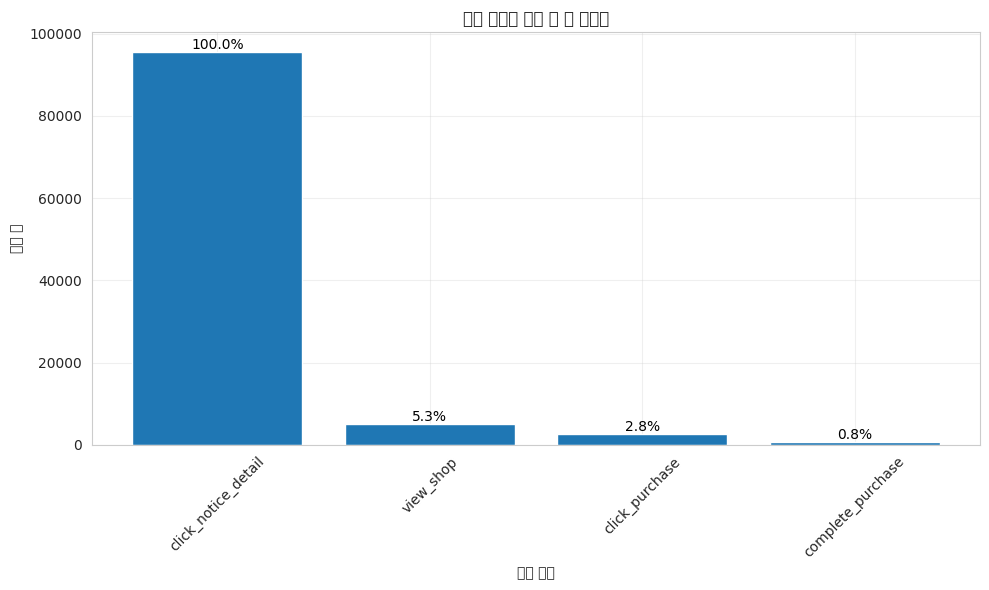

In [60]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
bars = ax1.bar(ordered_funnel_counts['event_key'],       # barsÎ°ú Î∞õÍ∏∞
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('Í∏∞Îä• Îã®Í≥Ñ')
ax1.set_ylabel('Ïú†Ï†Ä Ïàò')

# ÎßâÎåÄ ÏúÑÏóê Ï†ÑÌôòÏú® ÌÖçÏä§Ìä∏ ÌëúÏãú
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # barsÏóê Ï†ÑÌôòÏú®ÏùÑ Î≥ëÎ†¨Î°ú Î¨∂Ïñ¥Ï£ºÍ∏∞
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar ÏôºÏ™Ω Ï¢åÌëú, get_width() = bar ÎÑàÎπÑ
             bar.get_height(),                           # y Ï¢åÌëú
             f'{rate * 100:.1f}%',                       # text ÌòïÌÉú
             ha='center',                                # text ÏàòÌèâ Ï†ïÎ†¨ Î∞©Ïãù (Í∞ÄÏö¥Îç∞ Ï†ïÎ†¨)
             va='bottom',                                # text ÏàòÏßÅ Ï†ïÎ†¨ Î∞©Ïãù (ÎßâÎåÄ ÏúÑ)
             fontsize=10,                                # Í∏ÄÏûê ÌÅ¨Í∏∞
             color='black')                              # Í∏ÄÏûê ÏÉâÏÉÅ

plt.title('ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ÑÌôòÏú®')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 10. Funnel (view_shop)

In [61]:
# Ïú†Ï†Ä Î≥Ñ ÌäπÏ†ï ÏãúÏ†ê Ïù¥ÌõÑÏùò Î°úÍ∑∏Îßå Ï∂îÏ∂ú
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'view_shop'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# ÏµúÏ¢Ö Î≥ëÌï©
after_view_shop_log = pd.concat(result_list)

In [62]:
# Ï£ºÏöî Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
filtered_after_after_view_shop_log = after_view_shop_log[after_view_shop_log['event_key'].isin([
        'view_timeline_tap',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [63]:
filtered_after_after_view_shop_log[filtered_after_after_view_shop_log['event_key']=='view_shop']['session_id'].nunique()

17472

In [64]:
# ÏàúÏÑúÍ∞Ä Íº≠ ÌïÑÏöîÌï† Îïå ÏÇ¨Ïö©

# # 1Îã®Í≥Ñ: ÌÉêÏÉâÏùÑ Ìïú Ïú†Ï†Ä
# step1 = event_pivot[event_pivot['ÌÉêÏÉâ'].notna()]

# # 2Îã®Í≥Ñ: ÌÉêÏÉâÎèÑ ÌïòÍ≥† Í∞ÄÏù¥ÎìúÎèÑ Ìïú Ïú†Ï†Ä
# step2 = step1[step1['Í∞ÄÏù¥Îìú'].notna()]

# # 3Îã®Í≥Ñ: ÏúÑ + ÏßÄÏõêÏÑú ÏûëÏÑ±ÍπåÏßÄ Ìïú Ïú†Ï†Ä
# step3 = step2[step2['ÏßÄÏõêÏÑú ÏûëÏÑ±'].notna()]

# # 4Îã®Í≥Ñ: ÏúÑ + ÏßÄÏõê ÏôÑÎ£åÍπåÏßÄ Ìïú Ïú†Ï†Ä
# step4 = step3[step3['ÏßÄÏõê ÏôÑÎ£å'].notna()]

# # user ÏàòÏôÄ Ï†ÑÌôòÏú® Ï†ïÎ¶¨
# funnel_counts = {
#     'ÌÉêÏÉâ': len(step1),
#     'Í∞ÄÏù¥Îìú': len(step2),
#     'ÏßÄÏõêÏÑú ÏûëÏÑ±': len(step3),
#     'ÏßÄÏõê ÏôÑÎ£å': len(step4),
# }

# funnel_df = pd.DataFrame(list(funnel_counts.items()), columns=['step', 'user_count'])
# funnel_df['conversion_rate'] = funnel_df['user_count'] / funnel_df['user_count'].iloc[0]
# funnel_df


In [65]:
# Í∞Å ÏÑ∏ÏÖòÏù¥ Ïñ¥Îñ§ Í∏∞Îä•(page_name)ÏùÑ ÏÇ¨Ïö©ÌñàÎäîÏßÄ 0/1Î°ú ÌëúÏãú
funnel_matrix = filtered_after_after_view_shop_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# Í∞Å Í∏∞Îä•Î≥Ñ ÏÇ¨Ïö©Îêú ÏÑ∏ÏÖò Ïàò (0Ïù¥ ÏïÑÎãå Ïàò)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [66]:
funnel_matrix

event_key                             click_purchase  complete_purchase  \
session_id                                                                
001398E9-BBCE-4F6E-A669-6A9D72C77CE5               1                  0   
00199e33-2998-4052-b3b1-21fec14459c4               1                  0   
0020D8D8-1ABC-45C9-9C59-9C9F175D530D               0                  0   
0027C6BE-3E7F-498E-A678-FDDB719514E5               0                  0   
002r3iOqdkTogNK959c80mHZpIz2                       0                  0   
...                                              ...                ...   
zyyDFCFvxiWSgT0BnSqENh9x8zg1                       0                  0   
zzGb11TvaoMrtQQ3hIrjteIWUJk2                       1                  0   
zzQmZUCBPWNxsIm6rg0dMisWdpz1                       1                  1   
zzYs3qhHlLNBQtsgfmrcE3Ss1dq1                       0                  0   
zzp5kLCeZNgz4dbwZaQ2s7Bqrhc2                       1                  0   

event_key                             view_shop  view_timeline_tap  
session_id                                                          
001398E9-BBCE-4F6E-A669-6A9D72C77CE5          2                  1  
00199e33-2998-4052-b3b1-21fec14459c4          2                  0  
0020D8D8-1ABC-45C9-9C59-9C9F175D530D          2                  2  
0027C6BE-3E7F-498E-A678-FDDB719514E5          2                  3  
002r3iOqdkTogNK959c80mHZpIz2                  1                  4  
...                                         ...                ...  
zyyDFCFvxiWSgT0BnSqENh9x8zg1                  1                  0  
zzGb11TvaoMrtQQ3hIrjteIWUJk2                  1                  2  
zzQmZUCBPWNxsIm6rg0dMisWdpz1                  1                  5  
zzYs3qhHlLNBQtsgfmrcE3Ss1dq1                  1                 13  
zzp5kLCeZNgz4dbwZaQ2s7Bqrhc2                  1                  0  

[17472 rows x 4 columns]

In [67]:
funnel_counts

event_key  user_count
0          view_shop       17472
1  view_timeline_tap        9232
2     click_purchase        6474
3  complete_purchase        1601

In [68]:
# ÌçºÎÑê ÏàúÏÑú
ordered_steps = ['view_shop', 'view_shop', 'click_purchase', 'complete_purchase']

# Í∏∞Ï°¥ funnel_countsÎ•º Ìï¥Îãπ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ (ÏóÜÎäî Îã®Í≥ÑÎäî 0ÏúºÎ°ú Ï±ÑÏõÄ)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_nameÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï®
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# Ï†ÑÏ≤¥ Ï≤´ Îã®Í≥Ñ ÏÑ∏ÏÖò Ïàò Í∏∞Ï§ÄÏúºÎ°ú ÎàÑÏ†Å Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [69]:
ordered_funnel_counts

event_key  session_count  conversion_rate
0          view_shop          17472            1.000
1          view_shop          17472            1.000
2     click_purchase           6474            0.371
3  complete_purchase           1601            0.092

/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

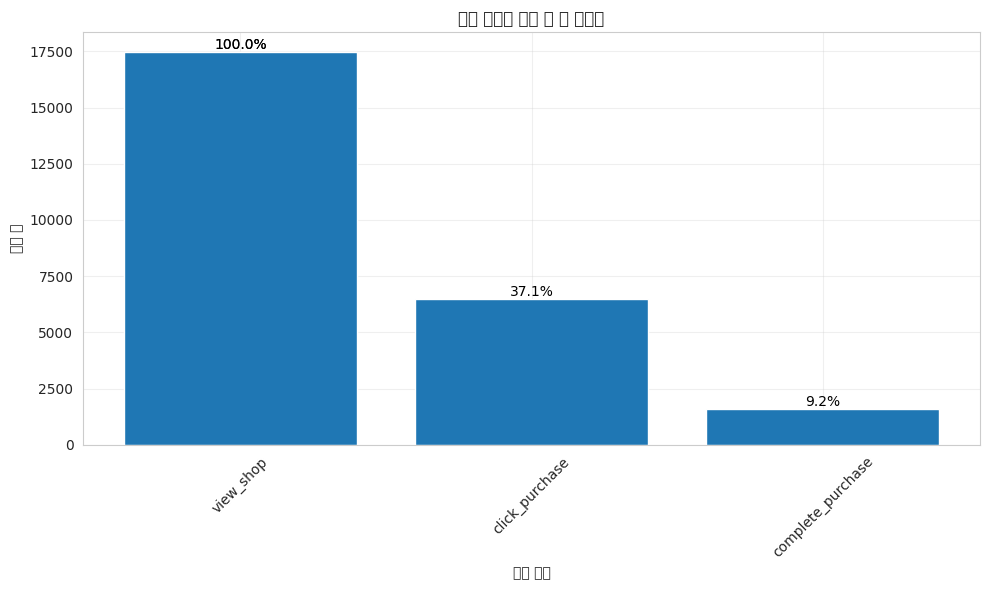

In [70]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
bars = ax1.bar(ordered_funnel_counts['event_key'],       # barsÎ°ú Î∞õÍ∏∞
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('Í∏∞Îä• Îã®Í≥Ñ')
ax1.set_ylabel('Ïú†Ï†Ä Ïàò')

# ÎßâÎåÄ ÏúÑÏóê Ï†ÑÌôòÏú® ÌÖçÏä§Ìä∏ ÌëúÏãú
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # barsÏóê Ï†ÑÌôòÏú®ÏùÑ Î≥ëÎ†¨Î°ú Î¨∂Ïñ¥Ï£ºÍ∏∞
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar ÏôºÏ™Ω Ï¢åÌëú, get_width() = bar ÎÑàÎπÑ
             bar.get_height(),                           # y Ï¢åÌëú
             f'{rate * 100:.1f}%',                       # text ÌòïÌÉú
             ha='center',                                # text ÏàòÌèâ Ï†ïÎ†¨ Î∞©Ïãù (Í∞ÄÏö¥Îç∞ Ï†ïÎ†¨)
             va='bottom',                                # text ÏàòÏßÅ Ï†ïÎ†¨ Î∞©Ïãù (ÎßâÎåÄ ÏúÑ)
             fontsize=10,                                # Í∏ÄÏûê ÌÅ¨Í∏∞
             color='black')                              # Í∏ÄÏûê ÏÉâÏÉÅ

plt.title('ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ÑÌôòÏú®')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 2. ÌïôÍµê Î∂ÑÏÑù

## 2-0. ÌîºÏ≤ò ÏÉùÏÑ±

In [3]:
df = pay_predict_model_v1.copy()
au = accounts_user.copy()
ag = accounts_group.copy()
naa = new_attendance.copy()
ap = accounts_paymenthistory.copy()

In [4]:
# Ïú†Ï†Ä ÌÖåÏù¥Î∏î Ï§ÄÎπÑ (Ïú†Ï†Äid, Í∞ÄÏûÖÏùº, Í∑∏Î£πid)
au['created_at'] = pd.to_datetime(au['created_at'].str[:19])
users = au[['id', 'group_id', 'created_at']]
users.columns = ['user_id', 'group_id', 'signup_at']

# Ïú†Ï†Ä ÌÖåÏù¥Î∏îÏóê ÌïôÍ∏âid, ÌïôÍµêid Ï∂îÍ∞Ä
ag.reset_index(inplace=True)
ag.columns = ['group_id', 'grade', 'class_num', 'school_id']
users = users.merge(ag[['group_id', 'school_id']], on='group_id', how='left')

# Ïú†Ï†Ä Ï∂úÏÑù ÌÖåÏù¥Î∏î Ï§ÄÎπÑ
usum = naa.merge(users, on='user_id')
usum['attendance_date_list'] = usum['attendance_date_list'].apply(ast.literal_eval)

# Ïú†Ï†ÄÎ≥Ñ Ï¥ù Ï∂úÏÑùÏùº Ïàò
usum['attend_count'] = usum['attendance_date_list'].apply(lambda x: len(x))

# Ïú†Ï†ÄÎ≥Ñ ÏÉùÎ™Ö Ï£ºÍ∏∞
usum['parsed_dates'] = usum['attendance_date_list'].apply(pd.to_datetime)
usum['lifecycle_days'] = usum['parsed_dates'].apply(lambda x: (max(x) - min(x)).days if not x.empty else 0)

# Ïú†Ï†Ä Í≤∞Ï†ú ÌÖåÏù¥Î∏î Ï§ÄÎπÑ
ap['created_at'] = pd.to_datetime(ap['created_at'].str[:-6])  # Îç∞Ïù¥ÌÑ∞Ìòï Î≥ÄÌôò, Ïó∞Ïõî('year_month') Ïª¨Îüº Ï∂îÍ∞Ä
ap['year_month'] = ap['created_at'].dt.strftime('%y-%m')
ap.sort_values(by='created_at', inplace=True)

point_map = {'heart.777': 777, 'heart.200': 200, 'heart.4000': 4000, 'heart.1000': 1000}  # Ï∂©Ï†ÑÏï° ÎßµÌïë
ap['charged_points'] = ap['productId'].map(point_map)

# Ïú†Ï†ÄÎ≥Ñ Ï¥ù Í≤∞Ï†ú ÌöüÏàò, Ï¥ù Ï∂©Ï†Ñ Ìè¨Ïù∏Ìä∏
pay_amount = ap.groupby(by='user_id', as_index=False)['charged_points'].sum()
pay_count = ap.groupby(by='user_id', as_index=False).size()
user_pay = pd.merge(pay_amount, pay_count, on='user_id')
user_pay.columns = ['user_id', 'total_paid_points', 'total_pay_counts']

user_pay['total_paid_points'] = user_pay['total_paid_points'].fillna(0)  # Í≤∞Ï∏°Ïπò 0ÏúºÎ°ú Ï±ÑÏõÄ
user_pay['total_pay_counts'] = user_pay['total_pay_counts'].fillna(0)

# Î≥ëÌï© Î∞è Ï†ïÎ¶¨
usum = usum.merge(user_pay, on='user_id', how='left')
usum = usum.drop(columns=['attendance_date_list','parsed_dates'])
usum = usum[['user_id', 'attend_count', 'lifecycle_days', 'signup_at', 'group_id', 'school_id', 'total_paid_points', 'total_pay_counts']]

In [5]:
# Ïú†Ï†Ä ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏßëÍ≥Ñ
df = df.reset_index(names='user_id')
df = df.merge(users[['user_id', 'school_id']], on='user_id', how='inner')

school_mean = df.groupby(by='school_id').agg({
    'friend_count': 'mean',
    'attendance_count': 'mean',
    'is_push_on': 'mean',
    'ques_count': 'mean',
    'vote_count': 'mean',
    'gender_encoded': 'mean',
    'chosen_count': 'mean',
    'question_skip_ratio': 'mean',
    'vote_open_count': 'mean',
    'block_count': 'mean',
    'blocked_count': 'mean',
    'report_count': 'mean',
})

In [ ]:
# ÎÑ§Ìä∏ÏõåÌÅ¨ ÏßÄÌëú ÏßëÍ≥Ñ

# Ïó£ÏßÄ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±(Î∞©Ìñ•ÏÑ±, Í∞ÄÏ§ëÏπò X)
au['friend_id_list'] = au['friend_id_list'].apply(ast.literal_eval)
friend_df = au[['id', 'friend_id_list']].explode('friend_id_list')
friend_df.columns = ['user_id', 'friend_id']
friend_df.dropna(inplace=True)
df_unique = friend_df.apply(lambda row: tuple(sorted([row['user_id'], row['friend_id']])), axis=1).drop_duplicates()

# Ïú†Ï†Ä ÌïôÍµê Îß§Ìïë
user_school = usum.set_index('user_id')['school_id'].to_dict()

# ÌïôÍµêÎ≥ÑÎ°ú Ïó£ÏßÄ Î∂ÑÎ¶¨
school_edges = defaultdict(list)
for u, v in df_unique:
    if u in user_school and v in user_school and user_school[u] == user_school[v]:
        school_id = user_school[u]
        school_edges[school_id].append((u, v))

# ÌïôÍµêÎ≥Ñ ÏßÄÌëú Í≥ÑÏÇ∞
results = []

for school_id, edges in school_edges.items():               # ÌïôÍµê, ÏπúÍµ¨Ïåç
    users = sorted(set([u for e in edges for u in e]))      # ÌïôÍµêÎ≥Ñ Ïú†Ï†Ä Í∫ºÎÇ¥ ÌèâÌÉÑÌôî
    id_map = {uid: i for i, uid in enumerate(users)}        # Ïú†Ï†ÄÏóê Ï†ïÏàò ÏïÑÏù¥Îîî Îß§Ìïë

    G = nk.graph.Graph(len(users), weighted=False, directed=False)  # ÎπÑÍ∞ÄÏ§ëÏπò, Î¨¥Î∞©Ìñ• Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
    for u, v in edges:
        G.addEdge(id_map[u], id_map[v])                      # Ï†ïÏàò ÏïÑÏù¥Îîî Í∏∞Î∞òÏúºÎ°ú Í∑∏ÎûòÌîÑÏóê Ïó£ÏßÄ Ï∂îÍ∞Ä

    n = G.numberOfNodes()                                    # ÎÖ∏Îìú Ïàò
    m = G.numberOfEdges()                                    # Ïó£ÏßÄ Ïàò

    # ÌèâÍ∑† clustering coefficient
    cc_algo = LocalClusteringCoefficient(G, turbo=True)
    cc_algo.run()
    scores = cc_algo.scores()
    avg_cc = sum(scores) / len(scores) if scores else 0

    # density
    density = (2 * m) / (n * (n - 1)) if n > 1 else 0

    # modularity
    if n > 1 and m > 0:
        plm = PLM(G, refine=True)
        plm.run()
        partition = plm.getPartition()
        modularity = Modularity().getQuality(partition, G)
    else:
        modularity = 0

    # Ï¢ÖÌï©
    results.append({
        'school_id': school_id,
        'avg_clustering': avg_cc,
        'density': density,
        'modularity': modularity
    })

school_network_df = pd.DataFrame(results)

In [ ]:
# ÏßÄÌëú Ï¢ÖÌï©

# ÌïôÍµê Ï¢ÖÎ•ò
sc = ac.reset_index()
sc.columns = ['school_id', 'address', 'student_count', 'school_type']
sc['school_type'] = sc['school_type'].map({'M': 0, 'H': 1})

# Ìï©ÏπòÍ∏∞
school_add = school.drop(columns='mean_atd_days').merge(school_mean.reset_index(), on='school_id')
school_add = school_add.merge(school_network_df, on='school_id')
school_add = school_add.merge(sc[['school_id', 'school_type']], on='school_id')
school_add.loc[:, 'pay_ratio'] = school_add['pay_user_count'] / school_add['user_count']

# Ïª¨ÎüºÎ™Ö, ÏàúÏÑú Î≥ÄÍ≤Ω
school_add.columns = ['school_id', 'mean_lifecycle', 'user_count', 'total_pay_amount', 'total_pay_count',
       'pay_user_count', 'mean_friend_count', 'mean_attendance_count', 'mean_is_push_on',
       'mean_ques_count', 'mean_vote_count', 'gender_ratio', 'mean_chosen_count',
       'mean_question_skip_ratio', 'mean_vote_open_count', 'mean_block_count',
       'mean_blocked_count', 'mean_report_count', 'avg_clustering', 'density',
       'modularity', 'school_type', 'pay_ratio']

school_add = school_add[['school_id', 'school_type', 'user_count', 'gender_ratio',                         # ÌïôÍµê Í∏∞Î≥∏ ÏßÄÌëú
                         'mean_friend_count', 'avg_clustering', 'density', 'modularity',                   # ÏÇ¨ÌöåÏó∞Í≤∞Îßù ÏßÄÌëú
                         'mean_attendance_count', 'mean_lifecycle',                                        # Î¶¨ÌÖêÏÖò ÏßÄÌëú
                         'total_pay_amount', 'total_pay_count', 'pay_user_count', 'pay_ratio',             # Í≤∞Ï†ú ÏßÄÌëú
                         'mean_ques_count', 'mean_vote_count', 'mean_chosen_count', 'mean_question_skip_ratio', 'mean_vote_open_count',  # Ìà¨Ìëú ÏßÄÌëú
                         'mean_is_push_on', 'mean_block_count', 'mean_blocked_count', 'mean_report_count'  # Í∏∞ÌÉÄ ÏßÄÌëú
                         ]]

In [ ]:
school_predict_model_v2.to_csv('school_predict_model_v2.csv', index=False)

## 2-1. ÌôúÎèôÏùºÏàò ÎÜíÏùÄ ÌïôÍµê ÏòàÏ∏° Î™®Îç∏ÎßÅ

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
school = school_predict_model_v2.copy()
school = school.drop(columns='inf_num')

# ÌÉÄÍ≤ü Î≥ÄÏàò Ï†ïÏùò: ÌèâÍ∑† Ï†ëÏÜçÏùºÏàò >= 7, ÌèâÍ∑† Í≤∞Ï†úÏú® >= 0.1 (75% Î∂ÑÌè¨ÏÑ† Í∏∞Ï§Ä)
school.loc[:, 'is_high_attendance'] = school['mean_attendance_count'].apply(lambda x: 1 if x >= 7 else 0)
school.loc[:, 'is_high_pay_ratio'] = school['pay_ratio'].apply(lambda x: 1 if x >= 0.1 else 0)

# Î¶¨ÌÖêÏÖò Î™®Îç∏ÎßÅ Îç∞Ïù¥ÌÑ∞: ÌèâÍ∑† Ï†ëÏÜçÏùºÏàò, ÌèâÍ∑† ÏÉùÎ™ÖÏ£ºÍ∏∞ Ï†úÍ±∞
sc_ret = school.drop(columns=['school_id', 'mean_attendance_count', 'mean_lifecycle', 'is_high_pay_ratio']).copy()

# Í≤∞Ï†ú Î™®Îç∏ÎßÅ Îç∞Ïù¥ÌÑ∞: Ï¥ù Ï∂©Ï†Ñ Ìè¨Ïù∏Ìä∏, Ï¥ù Í≤∞Ï†úÌöüÏàò, Ï¥ù Í≤∞Ï†úÏûêÏàò, Í≤∞Ï†úÏú® Ï†úÍ±∞
sc_pay = school.drop(columns=['school_id', 'total_pay_amount', 'total_pay_count', 'pay_user_count', 'pay_ratio', 'is_high_attendance']).copy()

### Ï§ëÎ≥µ Î≥ÄÏàò Ï†úÍ±∞

In [ ]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.95 Ïù¥ÏÉÅÏù∏ Ïåç ÌôïÏù∏
cols = sc_ret.drop(columns=['school_type']).columns
col_pairs = list(combinations(cols, 2))  # combinations: nCm Ï°∞Ìï© ÎßåÎì§Í∏∞

for col1, col2 in col_pairs:
		r, p = spearmanr(school[col1], school[col2])
		if r >= 0.95 or r <= -0.95:
		    print(f"{col1}Í≥º {col2}Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {r:.3f}")

total_pay_amountÍ≥º total_pay_countÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.991
total_pay_amountÍ≥º pay_user_countÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.972
total_pay_countÍ≥º pay_user_countÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.979
mean_ques_countÍ≥º mean_vote_countÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000
mean_ques_countÍ≥º mean_question_skip_ratioÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000
mean_ques_countÍ≥º mean_vote_open_countÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000
mean_vote_countÍ≥º mean_question_skip_ratioÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000
mean_vote_countÍ≥º mean_vote_open_countÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000
mean_question_skip_ratioÍ≥º mean_vote_open_countÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000
mean_block_countÍ≥º mean_blocked_countÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000


In [ ]:
# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏
X = sc_ret.drop(columns=['is_high_attendance'])  # ÎèÖÎ¶ΩÎ≥ÄÏàòÎßå
X = add_constant(X)  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä

# VIF Í≥ÑÏÇ∞
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

                     feature           VIF
18          mean_block_count           inf
19        mean_blocked_count           inf
0                      const  5.382015e+04
12           mean_ques_count  3.359525e+03
13           mean_vote_count  1.971858e+03
15  mean_question_skip_ratio  1.566474e+02
16      mean_vote_open_count  1.492986e+02
14         mean_chosen_count  5.917888e+01
9            total_pay_count  4.071836e+01
8           total_pay_amount  2.504906e+01
10            pay_user_count  1.824858e+01
2                 user_count  6.654947e+00
7                 modularity  4.933798e+00
6                    density  4.619397e+00
4          mean_friend_count  3.381956e+00
11                 pay_ratio  2.593611e+00
1                school_type  1.420191e+00
5             avg_clustering  1.325295e+00
20         mean_report_count  1.217711e+00
3               gender_ratio  1.172252e+00
17           mean_is_push_on  1.047844e+00


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


- 1Ï∞® Î≥ÄÏàò Ï†úÍ±∞
    - mean_blocked_count: ÎÜíÏùÄ Îã§Ï§ëÍ≥µÏÑ±, mean_block_countÏôÄ Ï§ëÎ≥µ
    - mean_ques_count, mean_vote_open_count: ÎÜíÏùÄ Îã§Ï§ëÍ≥µÏÑ±, mean_vote_countÏôÄ Ï§ëÎ≥µ
    - total_pay_amount, pay_user_count: ÎÜíÏùÄ Îã§Ï§ëÍ≥µÏÑ±, total_pay_countÏôÄ Ï§ëÎ≥µ, total_pay_countÏù¥ Îçî ÎåÄÌëúÏÑ± ÏûàÎäî ÏßÄÌëúÏûÑ
    - mean_question_skip_ratio: ÎÜíÏùÄ Îã§Ï§ëÍ≥µÏÑ±, mean_vote_open_countÏôÄ Ï§ëÎ≥µ, mean_vote_open_countÍ∞Ä Îçî ÎåÄÌëúÏÑ± ÏûàÎäî ÏßÄÌëúÏûÑ

In [ ]:
# 1Ï∞® Î≥ÄÏàò Ï†úÍ±∞
sc_ret_v2 = sc_ret.drop(columns=['mean_blocked_count', 'mean_ques_count', 'mean_vote_open_count', 'total_pay_amount', 'pay_user_count', 'mean_question_skip_ratio'])

# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏
X = sc_ret_v2.drop(columns=['is_high_attendance'])  # ÎèÖÎ¶ΩÎ≥ÄÏàòÎßå
X = add_constant(X)  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä

# VIF Í≥ÑÏÇ∞
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

              feature         VIF
0               const  230.683950
11  mean_chosen_count   47.228622
10    mean_vote_count   46.995824
2          user_count    5.158029
7          modularity    4.930725
6             density    4.617358
4   mean_friend_count    3.350295
8     total_pay_count    2.998278
9           pay_ratio    2.330326
1         school_type    1.411068
5      avg_clustering    1.324846
14  mean_report_count    1.216756
3        gender_ratio    1.162567
13   mean_block_count    1.082771
12    mean_is_push_on    1.047061


- 2Ï∞® Î≥ÄÏàò Ï†úÍ±∞
    - mean_blocked_count: mean_vote_open_countÏù¥ Îçî ÎåÄÌëúÏÑ± ÏûàÎäî ÏßÄÌëúÏûÑ

In [ ]:
# 2Ï∞® Î≥ÄÏàò Ï†úÍ±∞
sc_ret_v3 = sc_ret_v2.drop(columns=['mean_chosen_count'])

# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏
X = sc_ret_v3.drop(columns=['is_high_attendance'])  # ÎèÖÎ¶ΩÎ≥ÄÏàòÎßå
X = add_constant(X)  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä

# VIF Í≥ÑÏÇ∞
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

# VIF 10 Ïù¥ÏÉÅ Î≥ÄÏàò ÏóÜÏùå ÌôïÏù∏

              feature         VIF
0               const  230.679212
2          user_count    5.138157
7          modularity    4.930685
6             density    4.617002
4   mean_friend_count    3.348480
8     total_pay_count    2.997850
9           pay_ratio    2.329252
1         school_type    1.406327
5      avg_clustering    1.324846
13  mean_report_count    1.216436
3        gender_ratio    1.161897
12   mean_block_count    1.082701
10    mean_vote_count    1.054830
11    mean_is_push_on    1.047060


### Î≥ÄÏàòÎ≥Ñ ÌöåÍ∑ÄÍ≥ÑÏàò Î∞è pÍ∞í ÌôïÏù∏

In [ ]:
X = sc_ret_v3.drop(columns=['is_high_attendance'])
y = sc_ret_v3['is_high_attendance']

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ïª¨ÎüºÎ™Ö Ï∂îÍ∞Ä
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X_scaled_df = sm.add_constant(X_scaled_df)

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = sm.Logit(y, X_scaled_df).fit()

# Í≤∞Í≥º Ï∂úÎ†•
print(model.summary())

         Current function value: 0.422697
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:     is_high_attendance   No. Observations:                 5267
Model:                          Logit   Df Residuals:                     5253
Method:                           MLE   Df Model:                           13
Date:                Wed, 06 Aug 2025   Pseudo R-squ.:                  0.2308
Time:                        13:30:51   Log-Likelihood:                -2226.3
converged:                      False   LL-Null:                       -2894.4
Covariance Type:            nonrobust   LLR p-value:                9.325e-278
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5290     40.271     -0.038      0.970     -80.459      77.402
school_type          -0.5297      0.048    -

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# ÌöåÍ∑Ä Í≤∞Í≥º ÏöîÏïΩ ÌÖåÏù¥Î∏î
summary_table = model.summary2().tables[1]

# p-value < 0.05Ïù∏ Î≥ÄÏàòÎßå ÌïÑÌÑ∞ÎßÅ
insignificant_vars = summary_table[summary_table['P>|z|'] < 0.05]

# Ïò§Ï¶àÎπÑ Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†•
for var, row in insignificant_vars.iterrows():
    coef = row['Coef.']
    odds_ratio = np.exp(coef)
    print(f"{var:25s} | p = {row['P>|z|']:.4f} | OR = {odds_ratio:.4f}")

school_type               | p = 0.0000 | OR = 0.5888
user_count                | p = 0.0000 | OR = 0.5068
mean_friend_count         | p = 0.0000 | OR = 2.5791
avg_clustering            | p = 0.0002 | OR = 1.4009
modularity                | p = 0.0336 | OR = 1.2063
total_pay_count           | p = 0.0000 | OR = 1.4117
pay_ratio                 | p = 0.0000 | OR = 1.6543
mean_block_count          | p = 0.0000 | OR = 1.2101
mean_report_count         | p = 0.0004 | OR = 1.1382


- **ÌèâÍ∑† ÏπúÍµ¨ Ïàò, ÌèâÍ∑† clustering coefficient, modularity, Ï¥ù Í≤∞Ï†ú ÌöüÏàò, Í≤∞Ï†úÏú®, ÌèâÍ∑† Ï∞®Îã® ÌöüÏàò, ÌèâÍ∑† Ïã†Í≥† ÎãπÌïú ÌöüÏàò**Îäî **ÎÜíÏùÄ Ï†ëÏÜçÏùºÏàò Í∑∏Î£π**Ïóê ÏÜçÌï† ÌôïÎ•†Ïóê Ïú†ÏùòÎØ∏Ìïú **ÏñëÏùò ÏòÅÌñ•**ÏùÑ ÎÅºÏπòÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
    - ÌäπÌûà **ÌèâÍ∑† ÏπúÍµ¨ Ïàò**Îäî **Ïò§Ï¶àÎπÑ 2.61**Î°ú ÌèâÍ∑† ÏπúÍµ¨ Ïàò 1 Ï¶ùÍ∞Ä Ïãú ÎÜíÏùÄ Ï†ëÏÜçÏùºÏàò Í∑∏Î£πÏóê ÏÜçÌï† Ïò§Ï¶àÍ∞Ä 2.61Î∞∞ Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎêúÎã§.
- Î∞òÎ©¥, **ÌïôÍµê Ï¢ÖÎ•òÏôÄ ÌïôÏÉù Ïàò**Îäî **ÎÜíÏùÄ Ï†ëÏÜçÏùºÏàò**Ïóê **ÏùåÏùò ÏòÅÌñ•**ÏùÑ ÎÅºÏπòÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.

### Î≤†Ïù¥Ïä§ÎùºÏù∏ Î™®Îç∏ (Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏)

In [ ]:
# 1. ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò Î∂ÑÎ¶¨
X = sc_ret_v3.drop(columns=['is_high_attendance'])  # ÎèÖÎ¶ΩÎ≥ÄÏàòÎßå
y = sc_ret_v3['is_high_attendance']

# 2. train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Ïä§ÏºÄÏùºÎßÅ (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 6. Í≤∞Í≥º Ï∂úÎ†•
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       802
           1       0.58      0.33      0.42       252

    accuracy                           0.78      1054
   macro avg       0.70      0.63      0.64      1054
weighted avg       0.76      0.78      0.76      1054

ROC AUC Score: 0.810567826465582


### ÏÉòÌîåÎßÅ Î∞è 2Ï∞® Î™®Îç∏ÎßÅ (Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏)

SMOTE Î∞©ÏãùÏù¥ ÌèâÍ∑† ROC AUC Ï†êÏàòÍ∞Ä ÎÜíÍ≥† Í≥ºÏ†ÅÌï© ÏúÑÌóòÏù¥ ÏûëÏùÄ ÏïàÏ†ïÏ†ÅÏù∏ Î™®Îç∏Ïù¥ÎØÄÎ°ú, SMOTE ÏÉòÌîåÎßÅ Î∞©Î≤ï ÏÑ†ÌÉù

In [ ]:
# ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò ÎÇòÎàÑÍ∏∞
X = sc_ret_v3.drop(columns=['is_high_attendance'])
y = sc_ret_v3['is_high_attendance']

# SMOTE Ïò§Î≤ÑÏÉòÌîåÎßÅ Ï†ÅÏö©
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Í≤∞Í≥º ÌôïÏù∏
print("Before sampling:", Counter(y))
print("After MOTE oversampling:", Counter(y_resampled))

Before sampling: Counter({0: 4010, 1: 1257})
After MOTE oversampling: Counter({0: 4010, 1: 4010})


In [ ]:
# Î™®Îç∏ÎßÅ

# train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Ïä§ÏºÄÏùºÎßÅ (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # ÏñëÏÑ± ÌÅ¥ÎûòÏä§ ÌôïÎ•†

# Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# ÌòºÎèô ÌñâÎ†¨
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       802
           1       0.76      0.81      0.78       802

    accuracy                           0.77      1604
   macro avg       0.78      0.77      0.77      1604
weighted avg       0.78      0.77      0.77      1604

ROC AUC Score: 0.8484073482130087
Confusion Matrix:
 [[591 211]
 [150 652]]


### 3Ï∞® Î™®Îç∏ÎßÅ (ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•ò Î™®Îç∏)

In [ ]:
# Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Í≤∞Í≥º Ï∂úÎ†•
print("[Random Forest] Classification Report:\n", classification_report(y_test, y_pred_rf))
print("[Random Forest] ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))
print("[Random Forest] Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

[Random Forest] Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       802
           1       0.84      0.91      0.87       802

    accuracy                           0.87      1604
   macro avg       0.87      0.87      0.87      1604
weighted avg       0.87      0.87      0.87      1604

[Random Forest] ROC AUC Score: 0.943096591439108
[Random Forest] Confusion Matrix:
 [[661 141]
 [ 72 730]]


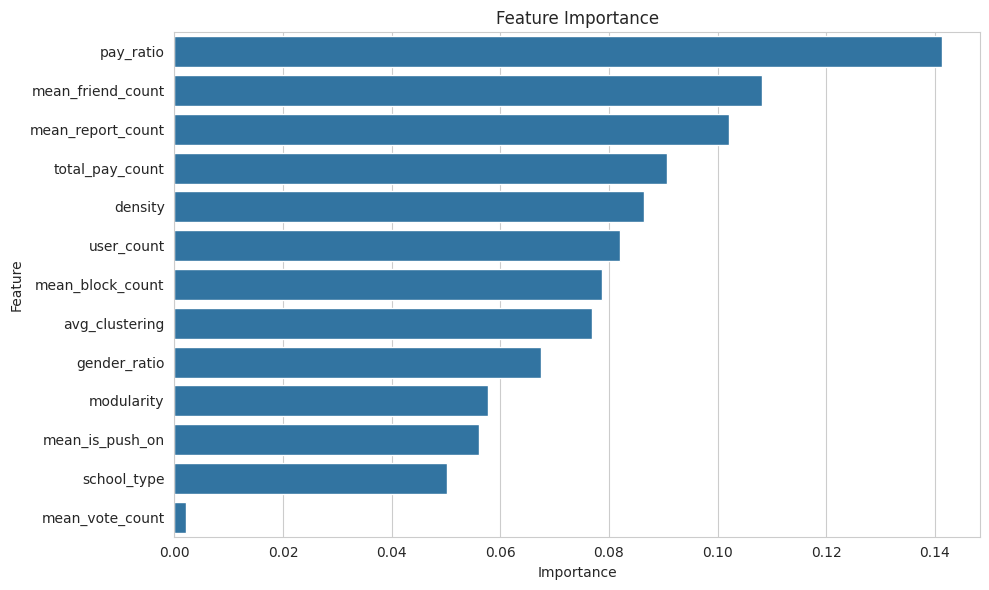

In [ ]:
# Î≥ÄÏàò Ï§ëÏöîÎèÑ
importances = rf.feature_importances_
feature_names = X_train.columns

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
feat_imp

Feature  Importance
8           pay_ratio    0.141249
3   mean_friend_count    0.108212
12  mean_report_count    0.102154
7     total_pay_count    0.090720
5             density    0.086430
1          user_count    0.081989
11   mean_block_count    0.078701
4      avg_clustering    0.076914
2        gender_ratio    0.067416
6          modularity    0.057731
10    mean_is_push_on    0.056126
0         school_type    0.050266
9     mean_vote_count    0.002090

- ÎÜíÏùÄ Ï†ëÏÜç ÏùºÏàò ÌïôÍµêÎ•º ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌï¥, SMOT ÏÉòÌîåÎßÅ ÌõÑ ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌñàÎã§.
- Î™®Îç∏ÏùÄ accuracy 0.87, ROC AUC score 0.94Ïùò Ïùò ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÎã§.
- **ÎÜíÏùÄ Ï†ëÏÜç ÏùºÏàòÏùò ÌïôÍµê**Î•º ÏòàÏ∏°Ìï† Îïå, **Í≤∞Ï†úÏú®, ÌèâÍ∑† ÏπúÍµ¨ Ïàò, Ïã†Í≥† ÎãπÌïú ÌöüÏàò, Ï¥ù Í≤∞Ï†ú ÌöüÏàò, density**Í∞Ä Ï£ºÏöî ÏòàÏ∏° Î≥ÄÏàòÏù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ®

## 2-2. Í≤∞Ï†úÏú® ÎÜíÏùÄ ÌïôÍµê ÏòàÏ∏° Î™®Îç∏ÎßÅ

### Ï§ëÎ≥µ Î≥ÄÏàò Ï†úÍ±∞

In [ ]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.95 Ïù¥ÏÉÅÏù∏ Ïåç ÌôïÏù∏
cols = sc_pay.drop(columns=['school_type']).columns
col_pairs = list(combinations(cols, 2))  # combinations: nCm Ï°∞Ìï© ÎßåÎì§Í∏∞

for col1, col2 in col_pairs:
		r, p = spearmanr(school[col1], school[col2])
		if r >= 0.95 or r <= -0.95:
		    print(f"{col1}Í≥º {col2}Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {r:.3f}")

mean_ques_countÍ≥º mean_vote_countÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000
mean_ques_countÍ≥º mean_question_skip_ratioÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000
mean_ques_countÍ≥º mean_vote_open_countÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000
mean_vote_countÍ≥º mean_question_skip_ratioÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000
mean_vote_countÍ≥º mean_vote_open_countÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000
mean_question_skip_ratioÍ≥º mean_vote_open_countÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000
mean_block_countÍ≥º mean_blocked_countÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 1.000


In [ ]:
# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏
X = sc_pay.drop(columns=['is_high_pay_ratio'])  # ÎèÖÎ¶ΩÎ≥ÄÏàòÎßå
X = add_constant(X)  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä

# VIF Í≥ÑÏÇ∞
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

                     feature           VIF
16          mean_block_count           inf
17        mean_blocked_count           inf
0                      const  5.383060e+04
10           mean_ques_count  3.361391e+03
11           mean_vote_count  1.976759e+03
13  mean_question_skip_ratio  1.567770e+02
14      mean_vote_open_count  1.479424e+02
12         mean_chosen_count  5.889649e+01
7                 modularity  4.956932e+00
6                    density  4.632440e+00
2                 user_count  4.186821e+00
4          mean_friend_count  3.935913e+00
8      mean_attendance_count  3.457056e+00
9             mean_lifecycle  2.355046e+00
5             avg_clustering  1.348840e+00
1                school_type  1.263410e+00
18         mean_report_count  1.221772e+00
3               gender_ratio  1.135375e+00
15           mean_is_push_on  1.044231e+00


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
# 1Ï∞® Î≥ÄÏàò Ï†úÍ±∞

# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÎÜíÏùÄ Î≥ÄÏàò Ï†úÍ±∞ ('mean_blocked_count', 'mean_ques_count', 'mean_vote_count', 'mean_question_skip_ratio')
sc_pay_v2 = sc_pay.drop(columns=['mean_blocked_count', 'mean_ques_count', 'mean_vote_open_count', 'mean_question_skip_ratio'])

# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏
X = sc_pay_v2.drop(columns=['is_high_pay_ratio'])  # ÎèÖÎ¶ΩÎ≥ÄÏàòÎßå
X = add_constant(X)  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä

# VIF Í≥ÑÏÇ∞
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

                  feature         VIF
0                   const  227.811345
10        mean_vote_count   47.555380
11      mean_chosen_count   47.345924
7              modularity    4.952848
6                 density    4.630854
2              user_count    4.157637
4       mean_friend_count    3.918429
8   mean_attendance_count    3.437739
9          mean_lifecycle    2.350939
5          avg_clustering    1.348714
1             school_type    1.261802
14      mean_report_count    1.220833
3            gender_ratio    1.134889
13       mean_block_count    1.085108
12        mean_is_push_on    1.044166


In [ ]:
# 2Ï∞® Ï†úÍ±∞(mean_chosen_count): mean_vote_open_countÏù¥ Îçî ÎåÄÌëúÏÑ± ÏûàÎäî ÏßÄÌëúÏûÑ
sc_pay_v3 = sc_pay_v2.drop(columns=['mean_chosen_count'])

# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏
X = sc_pay_v3.drop(columns=['is_high_pay_ratio'])  # ÎèÖÎ¶ΩÎ≥ÄÏàòÎßå
X = add_constant(X)  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä

# VIF Í≥ÑÏÇ∞
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

                  feature         VIF
0                   const  227.811328
7              modularity    4.952847
6                 density    4.630820
2              user_count    4.144035
4       mean_friend_count    3.918241
8   mean_attendance_count    3.424892
9          mean_lifecycle    2.346259
5          avg_clustering    1.348711
1             school_type    1.257886
10        mean_vote_count    1.235431
13      mean_report_count    1.220476
3            gender_ratio    1.134643
12       mean_block_count    1.085060
11        mean_is_push_on    1.044163


### Î≥ÄÏàòÎ≥Ñ ÌöåÍ∑ÄÍ≥ÑÏàò Î∞è pÍ∞í ÌôïÏù∏

In [ ]:
X = sc_pay_v3.drop(columns=['is_high_pay_ratio'])
y = sc_pay_v3['is_high_pay_ratio']

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ïª¨ÎüºÎ™Ö Ï∂îÍ∞Ä
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X_scaled_df = sm.add_constant(X_scaled_df)

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = sm.Logit(y, X_scaled_df).fit()

# Í≤∞Í≥º Ï∂úÎ†•
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.457062
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      is_high_pay_ratio   No. Observations:                 5267
Model:                          Logit   Df Residuals:                     5253
Method:                           MLE   Df Model:                           13
Date:                Wed, 06 Aug 2025   Pseudo R-squ.:                  0.2629
Time:                        13:30:55   Log-Likelihood:                -2407.3
converged:                       True   LL-Null:                       -3265.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.1887      0.042    -28.396      0.000      -1.271      -1.

In [ ]:
# ÌöåÍ∑Ä Í≤∞Í≥º ÏöîÏïΩ ÌÖåÏù¥Î∏î
summary_table = model.summary2().tables[1]

# p-value < 0.05Ïù∏ Î≥ÄÏàòÎßå ÌïÑÌÑ∞ÎßÅ
insignificant_vars = summary_table[summary_table['P>|z|'] < 0.05]

# Ïò§Ï¶àÎπÑ Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†•
for var, row in insignificant_vars.iterrows():
    coef = row['Coef.']
    odds_ratio = np.exp(coef)
    print(f"{var:25s} | p = {row['P>|z|']:.4f} | OR = {odds_ratio:.4f}")

const                     | p = 0.0000 | OR = 0.3046
school_type               | p = 0.0000 | OR = 2.4659
gender_ratio              | p = 0.0000 | OR = 1.8223
mean_friend_count         | p = 0.0000 | OR = 1.6048
avg_clustering            | p = 0.0017 | OR = 1.1835
density                   | p = 0.0000 | OR = 1.6004
mean_attendance_count     | p = 0.0000 | OR = 2.5919
mean_lifecycle            | p = 0.0001 | OR = 0.7843
mean_vote_count           | p = 0.0000 | OR = 0.8180
mean_is_push_on           | p = 0.0000 | OR = 1.3321
mean_block_count          | p = 0.0011 | OR = 1.1181


- **ÌïôÍµê Ï¢ÖÎ•ò, ÏÑ±ÎπÑ, ÌèâÍ∑† ÏπúÍµ¨ Ïàò, ÌèâÍ∑† clustering coefficient, density, ÌèâÍ∑† Ï∂úÏÑù ÏùºÏàò, ÌèâÍ∑† ÏïåÎ¶º ON ÎπÑÏú®, ÌèâÍ∑† Ï∞®Îã®Ìïú ÌöüÏàò**Îäî  **ÎÜíÏùÄ Í≤∞Ï†úÏú® Í∑∏Î£π**Ïóê ÏÜçÌï† ÌôïÎ•†Ïóê Ïú†ÏùòÎØ∏Ìïú **ÏñëÏùò ÏòÅÌñ•**ÏùÑ ÎÅºÏπòÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
    - ÌäπÌûà **ÌïôÍµê Ï¢ÖÎ•ò**Îäî **Ïò§Ï¶àÎπÑ 2.52**Î°ú **Í≥†Îì±ÌïôÍµêÏùº Îïå** ÎÜíÏùÄ Í≤∞Ï†úÏú® Í∑∏Î£πÏóê ÏÜçÌï† Ïò§Ï¶àÍ∞Ä 2.52Î∞∞ Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎêúÎã§.
    - Îòê **ÌèâÍ∑† Ï†ëÏÜç ÏùºÏàò**Îäî **Ïò§Ï¶àÎπÑ 2.03**ÏúºÎ°ú ÌèâÍ∑† Ï†ëÏÜç ÏùºÏàòÍ∞Ä 1Ïùº Ï¶ùÍ∞ÄÌï† Îïå ÎÜíÏùÄ Í≤∞Ï†úÏú® Í∑∏Î£πÏóê ÏÜçÌï† Ïò§Ï¶àÍ∞Ä 2.03Î∞∞ Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎêúÎã§.
- Î∞òÎ©¥, **ÌèâÍ∑† Ïú†Ï†Ä ÏÉùÎ™ÖÏ£ºÍ∏∞ Î∞è ÌèâÍ∑† Ìà¨Ìëú Ïó¥Îûå ÌöüÏàò**Îäî **ÎÜíÏùÄ Í≤∞Ï†úÏú® Í∑∏Î£π**Ïóê ÏÜçÌï† ÌôïÎ•†Ïóê Ïú†ÏùòÎØ∏Ìïú **ÏùåÏùò ÏòÅÌñ•**ÏùÑ ÎÅºÏπòÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.

### Î≤†Ïù¥Ïä§ÎùºÏù∏ Î™®Îç∏ (Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏)

In [ ]:
# 1. ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò Î∂ÑÎ¶¨
X = sc_pay_v3.drop(columns=['is_high_pay_ratio'])  # ÎèÖÎ¶ΩÎ≥ÄÏàòÎßå
y = sc_pay_v3['is_high_pay_ratio']

# 2. train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Ïä§ÏºÄÏùºÎßÅ (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 6. Í≤∞Í≥º Ï∂úÎ†•
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       726
           1       0.76      0.56      0.64       328

    accuracy                           0.81      1054
   macro avg       0.79      0.74      0.75      1054
weighted avg       0.80      0.81      0.80      1054

ROC AUC Score: 0.8728079016327354


### ÏÉòÌîåÎßÅ Î∞è 2Ï∞® Î™®Îç∏ÎßÅ (Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏)

SMOTE Î∞©ÏãùÏù¥ ÌèâÍ∑† ROC AUC Ï†êÏàòÍ∞Ä ÎÜíÍ≥† Í≥ºÏ†ÅÌï© ÏúÑÌóòÏù¥ ÏûëÏùÄ ÏïàÏ†ïÏ†ÅÏù∏ Î™®Îç∏Ïù¥ÎØÄÎ°ú, SMOTE ÏÉòÌîåÎßÅ Î∞©Î≤ï ÏÑ†ÌÉù

In [ ]:
# ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò ÎÇòÎàÑÍ∏∞
X = sc_pay_v3.drop(columns=['is_high_pay_ratio'])
y = sc_pay_v3['is_high_pay_ratio']

# SMOTE Ïò§Î≤ÑÏÉòÌîåÎßÅ Ï†ÅÏö©
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Í≤∞Í≥º ÌôïÏù∏
print("Before sampling:", Counter(y))
print("After MOTE oversampling:", Counter(y_resampled))

Before sampling: Counter({0: 3628, 1: 1639})
After MOTE oversampling: Counter({0: 3628, 1: 3628})


In [ ]:
# train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Ïä§ÏºÄÏùºÎßÅ (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # ÏñëÏÑ± ÌÅ¥ÎûòÏä§ ÌôïÎ•†

# Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# ÌòºÎèô ÌñâÎ†¨
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       726
           1       0.76      0.76      0.76       726

    accuracy                           0.76      1452
   macro avg       0.76      0.76      0.76      1452
weighted avg       0.76      0.76      0.76      1452

ROC AUC Score: 0.8325971966092177
Confusion Matrix:
 [[548 178]
 [173 553]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3Ï∞® Î™®Îç∏ÎßÅ (ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•ò Î™®Îç∏)

In [ ]:
# Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Í≤∞Í≥º Ï∂úÎ†•
print("[Random Forest] Classification Report:\n", classification_report(y_test, y_pred_rf))
print("[Random Forest] ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))
print("[Random Forest] Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

[Random Forest] Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       726
           1       0.83      0.86      0.85       726

    accuracy                           0.85      1452
   macro avg       0.85      0.85      0.85      1452
weighted avg       0.85      0.85      0.85      1452

[Random Forest] ROC AUC Score: 0.9176617793259415
[Random Forest] Confusion Matrix:
 [[602 124]
 [100 626]]


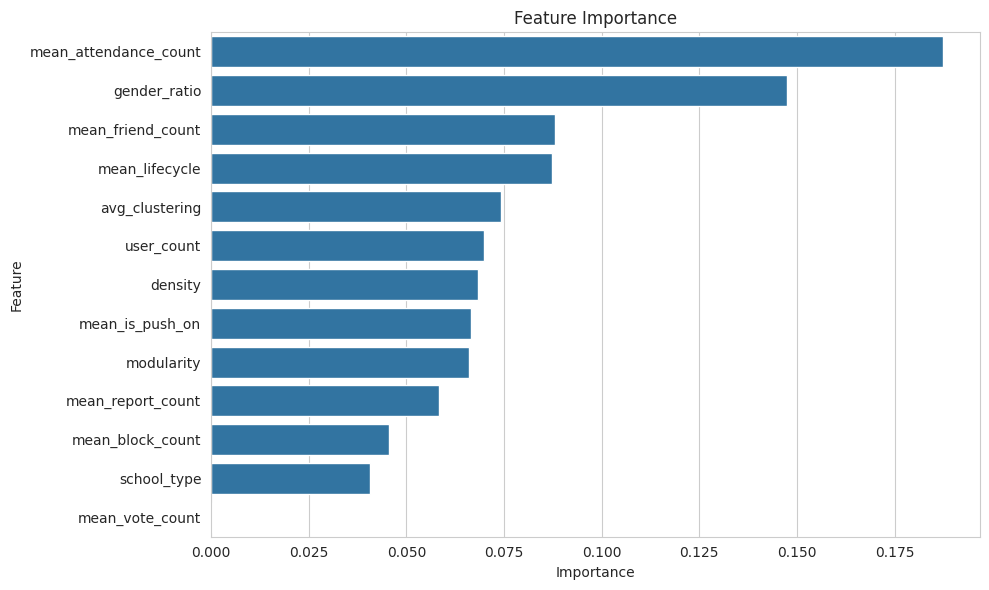

In [ ]:
# Î≥ÄÏàò Ï§ëÏöîÎèÑ
importances = rf.feature_importances_
feature_names = X_train.columns

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
feat_imp

Feature  Importance
7   mean_attendance_count    0.187458
2            gender_ratio    0.147455
3       mean_friend_count    0.087985
8          mean_lifecycle    0.087370
4          avg_clustering    0.074187
1              user_count    0.069834
5                 density    0.068247
10        mean_is_push_on    0.066616
6              modularity    0.066055
12      mean_report_count    0.058335
11       mean_block_count    0.045601
0             school_type    0.040576
9         mean_vote_count    0.000280

- ÎÜíÏùÄ Í≤∞Ï†úÏú®Ïùò ÌïôÍµêÎ•º ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌï¥, SMOT ÏÉòÌîåÎßÅ ÌõÑ ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌñàÎã§.
- Î™®Îç∏ÏùÄ accuracy 0.85, ROC AUC score 0.91Ïùò Ïùò ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÎã§.
- **ÎÜíÏùÄ Í≤∞Ï†úÏú®Ïùò ÌïôÍµêÎ•º ÏòàÏ∏°**Ìï† Îïå, **ÌèâÍ∑† Ï†ëÏÜç ÏùºÏàò, ÏÑ±ÎπÑ, ÌèâÍ∑† ÏπúÍµ¨ Ïàò, ÌèâÍ∑† Ïú†Ï†Ä ÏÉùÎ™ÖÏ£ºÍ∏∞, ÌèâÍ∑† clustering coefficient**Í∞Ä Ï£ºÏöî ÏòàÏ∏° Î≥ÄÏàòÏù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§

# 3. Ïú†Ï†ÄÏùò ÎÑ§Ìä∏ÏõåÌÅ¨ ÎÇ¥ ÏòÅÌñ•Î†• Î∂ÑÏÑù

## 3-1. Í≤∞Ï†ú Î∞è Ìà¨Ìëú Ï†ÑÏóºÏÑ±

### 3-1-1. Í≤∞Ï†ú Ï†ÑÏóºÏÑ±

In [ ]:
accountsuser = accounts_user.copy()

In [ ]:
payment_history = accounts_paymenthistory.copy()

In [ ]:
# accounts_user ÌÖåÏù¥Î∏îÏóê Í≤∞Ï†ú Ïó¨Î∂ÄÏóê ÎåÄÌïú Ïª¨Îüº ÏÉùÏÑ±

# payment_history ÌÖåÏù¥Î∏îÏùò user_id Í≥†Ïú†Í∞í Ï∂îÏ∂ú
paid_user_ids = payment_history['user_id'].unique()

# accounts_user ÌÖåÏù¥Î∏îÏóê 'pay_or_not' Ïª¨Îüº Ï∂îÍ∞Ä
accountsuser['pay_or_not'] = accountsuser['id'].isin(paid_user_ids).astype(int)

In [ ]:
# ÏπúÍµ¨ Ïàò Î¶¨Ïä§Ìä∏ ÌòïÌÉú
# Î≥ÄÌôò
import ast

accountsuser['friend_id_list'] = accountsuser['friend_id_list'].apply(ast.literal_eval)

#### Í≤∞Ï†ú Ïú†Ï†ÄÏùò Ïó∞Í≤∞ ÌäπÏÑ± Î∂ÑÏÑù

- Í≤∞Ï†ú Ïú†Ï†Ä vs ÎπÑÍ≤∞Ï†ú Ïú†Ï†ÄÏùò ÌèâÍ∑† ÏπúÍµ¨ Ïàò ÎπÑÍµê

- Í≤∞Ï†ú Ïú†Ï†ÄÏùò ÏπúÍµ¨ Ï§ë Í≤∞Ï†ú Ïú†Ï†Ä ÎπÑÏú® (Ï¥àÍ∏∞ Ï†ÑÏóº Î∂ÑÏÑù Í∞ÄÎä•)

- Ïù¥ Îã®Í≥ÑÏùò ÌïµÏã¨ Î™©Ï†Å
- Ïú†Ï†Ä Í∞Ñ **‚ÄúÍ¥ÄÍ≥Ñ Íµ¨Ï°∞‚Äù**Î•º ÌååÏïÖÌïòÏó¨, Ïù¥ÌõÑ Í∞êÏóº Í≤ΩÎ°ú Ï∂îÏ†Å, Ï†ÑÏóºÎ•† Î∂ÑÏÑùÏù¥ Í∞ÄÎä•Ìïú Í∏∞Î∞òÏùÑ ÎßåÎìúÎäî Í≤É

- ÏπúÍµ¨ Ïàò ÎßéÏùÄ Ïú†Ï†Ä, ÎÑ§Ìä∏ÏõåÌÅ¨ ÌóàÎ∏å Ïó≠Ìï† Ïú†Ï†Ä, ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎÇ¥ Í≤∞Ï†ú ÏßëÏ§ë Ïó¨Î∂Ä Îì±ÏùÑ ÏÑ†Î≥Ñ Í∞ÄÎä•

In [ ]:
# friend_id_list Í∏∏Ïù¥ Í≥ÑÏÇ∞ÌïòÏó¨ friend_count Ïª¨Îüº ÏÉùÏÑ±ÌïòÏó¨ Ï†ÄÏû•
accountsuser['friend_count'] = accountsuser['friend_id_list'].apply(len)

/tmp/ipython-input-3684512932.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Oranges')  # Ïª¨Îü¨Îßµ: Îπ®‚ÜíÎÖ∏ Í≥ÑÏó¥
/tmp/ipython-input-3684512932.py:30: UserWarning: Glyph 52828 (\N{HANGUL SYLLABLE CIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3684512932.py:30: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3684512932.py:30: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3684512932.py:30: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3684512932.py:30: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) 

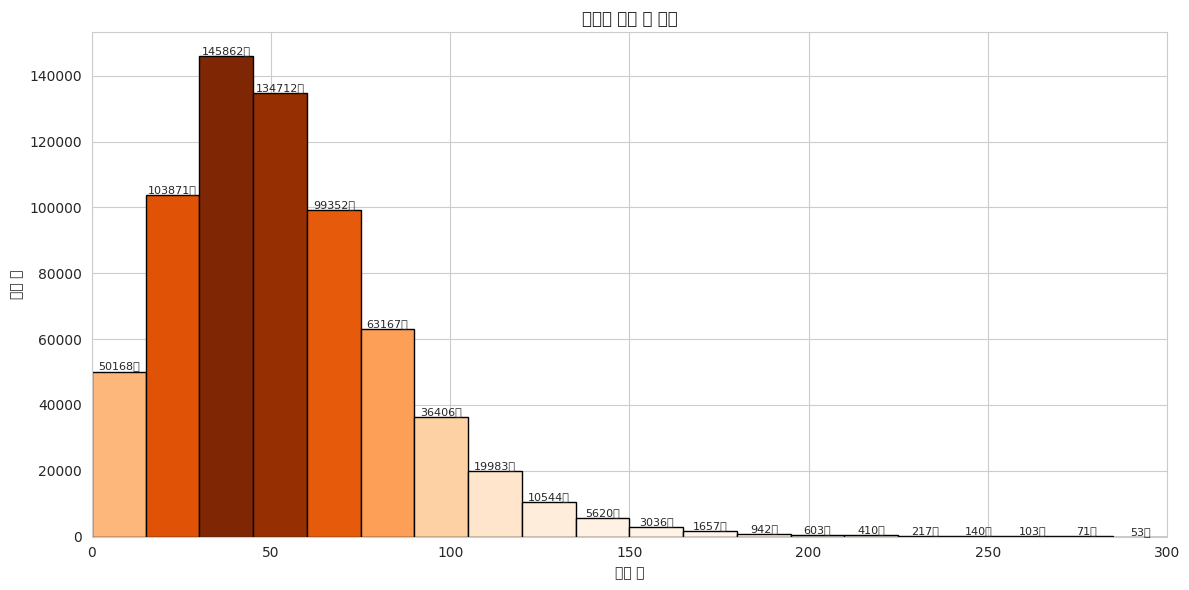

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 300 Ïù¥ÌïòÎßå ÌïÑÌÑ∞ÎßÅ
filtered = accountsuser[accountsuser['friend_count'] <= 300]['friend_count']

# 2. ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ± (ÎπàÎèÑ Ïàò ÌôïÏù∏Ïö©)
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(filtered, bins=20, edgecolor='black')

# 3. Í∑∏ÎùºÎç∞Ïù¥ÏÖò ÏÉâÏÉÅ Ï†ÅÏö© (ÎÖ∏ÎûÄÏÉâ ‚Üí Ï£ºÌô©ÏÉâ ‚Üí Îπ®Í∞ïÏÉâ)
from matplotlib import cm
norm = plt.Normalize(vmin=min(counts), vmax=max(counts))  # ÎπàÎèÑ Ïàò Í∏∞Ï§Ä Ï†ïÍ∑úÌôî
cmap = cm.get_cmap('Oranges')  # Ïª¨Îü¨Îßµ: Îπ®‚ÜíÎÖ∏ Í≥ÑÏó¥

for patch, count in zip(patches, counts):
    patch.set_facecolor(cmap(norm(count)))

# 4. ÎßâÎåÄ ÏúÑÏóê ÏàòÏπò (Í∞ÄÎ°ú Î∞©Ìñ•)
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    if count > 0:
        bin_center = (bin_left + bin_right) / 2
        plt.text(bin_center, count, f'{int(count)}Î™Ö', ha='center', va='bottom', fontsize=8, rotation=0)

# 5. Ïä§ÌÉÄÏùº ÎßàÎ¨¥Î¶¨
plt.title("Ïú†Ï†ÄÎ≥Ñ ÏπúÍµ¨ Ïàò Î∂ÑÌè¨")
plt.xlabel("ÏπúÍµ¨ Ïàò")
plt.ylabel("Ïú†Ï†Ä Ïàò")
plt.xlim(0, 300)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 52828 (\N{HANGUL SYLLABLE CIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipy

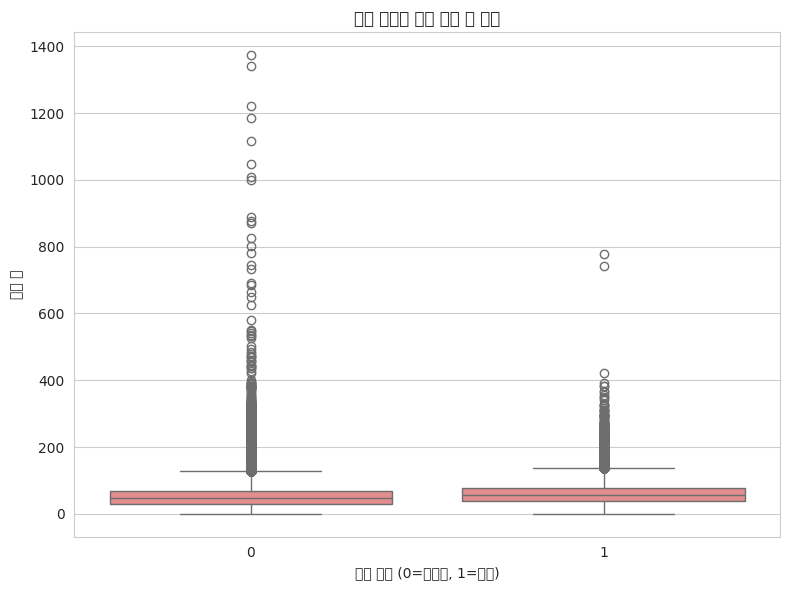

In [ ]:
# Î∞ïÏä§ ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.boxplot(data=accountsuser, x='pay_or_not', y='friend_count', color='lightcoral')
plt.xlabel('Í≤∞Ï†ú Ïó¨Î∂Ä (0=ÎØ∏Í≤∞Ï†ú, 1=Í≤∞Ï†ú)')
plt.ylabel('ÏπúÍµ¨ Ïàò')
plt.title('Í≤∞Ï†ú Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÏπúÍµ¨ Ïàò Î∂ÑÌè¨')
plt.tight_layout()
plt.show()

- Îã®ÏàúÌûà ÏπúÍµ¨Í∞Ä ÎßéÏùÑÏàòÎ°ù, Í≤∞Ï†úÎ•º ÎßéÏù¥ÌïòÎäî Í≤ÉÏùÄ ÏïÑÎãò.
- ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏñ¥Î≥¥ÏûÑ.

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ ÏπúÍµ¨Î¶¨Ïä§Ìä∏ Ï§ëÏóê Í≤∞Ï†ú Ïù¥Î†•Ïù¥ ÏûàÎäî ÏπúÍµ¨Ïùò Ïàò
# ÏÉàÎ°úÏö¥ Ïª¨Îüº ÏÉùÏÑ±

paid_user_ids_set = set(paid_user_ids)

def count_paid_friends(friend_list):
    return sum(1 for fid in friend_list if fid in paid_user_ids_set)

accountsuser['pay_friend_count'] = accountsuser['friend_id_list'].apply(count_paid_friends)

In [ ]:
accountsuser.groupby('pay_or_not')['pay_friend_count'].mean()

pay_or_not
0    5.108973
1    8.598446
Name: pay_friend_count, dtype: float64

- Í≤∞Ï†úÍ∏∞Î°ùÏù¥ ÏóÜÎäî Ïú†Ï†Ä
    - ÏπúÍµ¨ Ï§ë Í≤∞Ï†ú Ïù¥Î†•Ïù¥ ÏûàÎäî ÌèâÍ∑† ÏπúÍµ¨ ÏàòÎäî ÏïΩ 5.11Î™Ö
- Í≤∞Ï†úÍ∏∞Î°ùÏù¥ ÏûàÎäî Ïú†Ï†Ä
    - ÏπúÍµ¨ Ï§ë Í≤∞Ï†ú Ïù¥Î†•Ïù¥ ÏûàÎäî ÌèâÍ∑† ÏπúÍµ¨ ÏàòÎäî ÏïΩ 8.60Î™Ö
- ÏïΩ 3.49Î™Ö Ï∞®Ïù¥ ÎÇ®.

/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-i

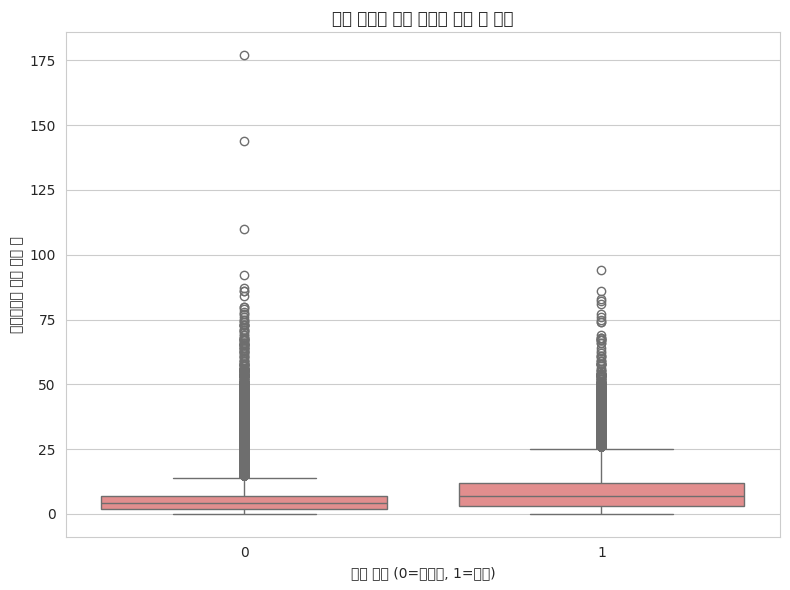

In [ ]:
# Î∞ïÏä§ ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.boxplot(data=accountsuser, x='pay_or_not', y='pay_friend_count', color='lightcoral')
plt.xlabel('Í≤∞Ï†ú Ïó¨Î∂Ä (0=ÎØ∏Í≤∞Ï†ú, 1=Í≤∞Ï†ú)')
plt.ylabel('Í≤∞Ï†úÏù¥Î†•Ïù¥ ÏûàÎäî ÏπúÍµ¨ Ïàò')
plt.title('Í≤∞Ï†ú Ïó¨Î∂ÄÏóê Îî∞Î•∏ Í≤∞Ï†úÌïú ÏπúÍµ¨ Ïàò Î∂ÑÌè¨')
plt.tight_layout()
plt.show()

In [ ]:
# ÏπúÍµ¨ Ïàò ÎåÄÎπÑ Í≤∞Ï†ú ÏπúÍµ¨ ÎπÑÏú®

# Í≤∞Ï†úÌïú ÏπúÍµ¨ ÎπÑÏú®
accountsuser['pay_friend_ratio'] = accountsuser['pay_friend_count'] / accountsuser['friend_count']

# Î¨¥ÌïúÎåÄ/NaN Î∞©ÏßÄ (ÏπúÍµ¨Í∞Ä 0Î™ÖÏù∏ Í≤ΩÏö∞)
accountsuser['pay_friend_ratio'] = accountsuser['pay_friend_ratio'].fillna(0)

# Í≤∞Í≥º ÌôïÏù∏
accountsuser[['id', 'friend_count', 'pay_friend_count', 'pay_friend_ratio']].head()

id  friend_count  pay_friend_count  pay_friend_ratio
0  831956             6                 1          0.166667
1  831962            43                 6          0.139535
2  832151            51                 8          0.156863
3  832340            57                 7          0.122807
4  832520            18                 5          0.277778

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


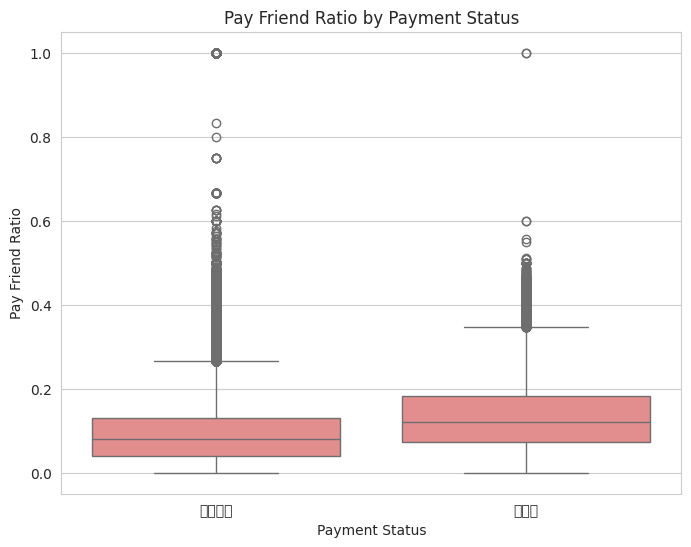

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='pay_or_not', y='pay_friend_ratio', data=accountsuser, color='lightcoral')
plt.xticks([0, 1], ['ÎπÑÍ≤∞Ï†úÏûê', 'Í≤∞Ï†úÏûê'])
plt.title('Pay Friend Ratio by Payment Status')
plt.xlabel('Payment Status')
plt.ylabel('Pay Friend Ratio')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

group_0 = accountsuser[accountsuser['pay_or_not'] == 0]['pay_friend_ratio']
group_1 = accountsuser[accountsuser['pay_or_not'] == 1]['pay_friend_ratio']

t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)
print(f'p-value: {p_val:.3f}')

p-value: 0.000


In [ ]:
# ÌöåÍ∑Ä Î∂ÑÏÑù

features = accountsuser[['pay_friend_ratio']]
target = accountsuser['pay_or_not']

model = LogisticRegression()
model.fit(features, target)

print("coef:", model.coef_)

coef: [[5.86324786]]


- ÏπúÍµ¨ÎåÄÎπÑ Í≤∞Ï†ú ÏπúÍµ¨Ïùò ÎπÑÏú® ÏßÄÌëúÎèÑ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï®.
- ÌöåÍ∑ÄÍ≥ÑÏàòÎèÑ 5.863 Ï†ïÎèÑÎ°ú Ïù¥ Í∞íÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ä 1Îã®ÏúÑ Ï¶ùÍ∞ÄÌï† Îïå,
- Í≤∞Í≥º(Ïòà: Í≤∞Ï†úÌï† ÌôïÎ•†)Ïùò Î°úÍ∑∏ Ïò§Ï¶à(log-odds)Í∞Ä ÏïΩ 5.86ÎßåÌÅº Ï¶ùÍ∞ÄÌïúÎã§Îäî ÎúªÏûÖÎãàÎã§.
- ÍµâÏû•Ìûà Í∞ïÌïú ÏòÅÌñ•Î†•ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

#### ÏãúÍ∞ÑÌùêÎ¶ÑÏóê Îî∞Î•∏ Ï†ÑÏóº Ìö®Í≥º Î∂ÑÏÑù

- ÌäπÏ†ï Ïú†Ï†ÄÍ∞Ä Í≤∞Ï†úÌïú ÏßÅÌõÑ, ÏπúÍµ¨Îì§Ïù¥ Î©∞Ïπ† Ïù¥ÎÇ¥Ïóê Í≤∞Ï†úÌïòÎäîÍ∞Ä?
- ÏπúÍµ¨ Ï§ë Í≤∞Ï†úÌïú ÎÇ†ÏßúÍ∞Ä index Ïú†Ï†Ä Í≤∞Ï†ú ÌõÑ ¬±nÏùº ÏïàÏóê Î™∞Î†§ ÏûàÎäîÏßÄ ÌôïÏù∏
- Ïù∏ÏÇ¨Ïù¥Ìä∏: Í≤∞Ï†ú Ïú†ÎèÑ ÏãúÍ∏∞ ÌÉÄÏù¥Î∞ç ÏµúÏ†ÅÌôî Í∞ÄÎä•

- Î∂ÑÏÑù ÏàúÏÑú
    - Í≤∞Ï†ú Ïú†Ï†Ä Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú
    - Í≤∞Ï†ú ÏãúÏ†ê Í∏∞Ï§Ä, Ìï¥Îãπ Ïú†Ï†ÄÏùò ÏπúÍµ¨ Î™©Î°ù Ï∂îÏ∂ú
    - ÏπúÍµ¨Îì§Ïùò Í≤∞Ï†ú ÏãúÏ†êÍ≥º ÎπÑÍµê ‚Üí ÏãúÍ∞ÑÏ∞® Í≥ÑÏÇ∞
    - ÏãúÍ∞ÑÏ∞®Í∞Ä 0Ïùº~NÏùº ÏÇ¨Ïù¥Ïù∏ ÏπúÍµ¨ Ïàò ÏßëÍ≥Ñ
    - ÌûàÏä§ÌÜ†Í∑∏Îû® ÎòêÎäî ÎàÑÏ†Å ÎπÑÏú® Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî

In [ ]:
# user_id Î≥Ñ ÏµúÏ¥à Í≤∞Ï†ú ÏùºÏûê Ï∂îÏ∂ú
first_payment = payment_history.groupby('user_id')['created_at'].min().reset_index()
first_payment.columns = ['user_id', 'first_payment_date']
first_payment.head()

user_id         first_payment_date
0   833041  2023-05-14 16:59:46+09:00
1   834112  2023-05-22 08:55:46+09:00
2   835815  2023-06-10 23:17:45+09:00
3   835839  2023-05-16 01:37:30+09:00
4   835888  2023-06-06 13:58:49+09:00

In [ ]:
# Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ïª§ÏÑú ÏÉòÌîåÎßÅ

# Î®ºÏ†Ä 1Îßå Î™Ö Ï†ïÎèÑ Ïú†Ï†ÄÎßå ÏÉòÌîåÎßÅÌï¥ÏÑú ÌôïÏù∏
accounts_user_sample = accountsuser.sample(n=10000, random_state=42)

# explode Ï†ÅÏö©
friend_edges = accounts_user_sample.explode('friend_id_list')[['id', 'friend_id_list']]
friend_edges.columns = ['user_id', 'friend_id']

In [ ]:
# ÏπúÍµ¨Îì§Ïùò ÏµúÏ¥àÍ≤∞Ï†úÏãúÏ†ê
# first_paymentÏóêÏÑú Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
friend_first_pay = first_payment.rename(columns={
    'user_id': 'friend_id',
    'first_payment_date': 'friend_payment_date'
})

In [ ]:
# Í≤∞Ï†úÏú†Ï†ÄÏôÄ ÏπúÍµ¨Ïùò Í≤∞Ï†úÏãúÏ†ê Î≥ëÌï©
merged = friend_edges.merge(first_payment, on='user_id', how='left') \
                     .merge(friend_first_pay, on='friend_id', how='left')

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÍ≤Ω
merged['friend_payment_date'] = pd.to_datetime(merged['friend_payment_date'])
merged['first_payment_date'] = pd.to_datetime(merged['first_payment_date'])


# Í≤∞Ï†ú ÏãúÏ†ê Ï∞®Ïù¥ Í≥ÑÏÇ∞
merged['days_after'] = (merged['friend_payment_date'] - merged['first_payment_date']).dt.days

# ÏπúÍµ¨Í∞Ä Í≤∞Ï†ú Ïú†Ï†ÄÎ≥¥Îã§ ÎÇòÏ§ëÏóê Í≤∞Ï†úÌïú Í≤ΩÏö∞Îßå Ï∂îÏ∂ú
infected = merged[merged['days_after'] > 0]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52828 (\N{HANGUL SYLLABLE CIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

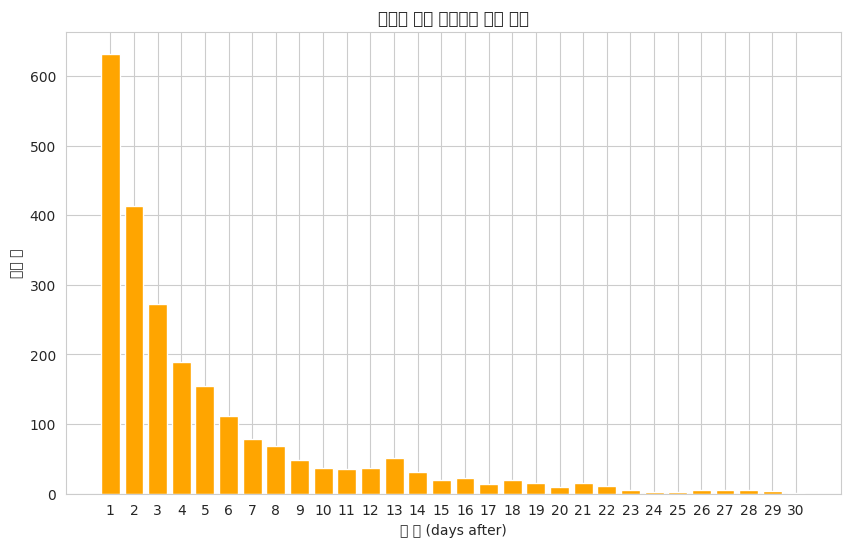

In [ ]:
# ÏãúÍ∞ÅÌôî Ìï¥Î≥¥Í∏∞!

# 1~30Ïùº Î≤îÏúÑÎ°ú ÏßëÍ≥Ñ
day_counts = infected['days_after'].value_counts().sort_index()
day_counts = day_counts[day_counts.index <= 30]

plt.figure(figsize=(10,6))
plt.bar(day_counts.index, day_counts.values, color='Orange')
plt.title("ÏπúÍµ¨Ïùò ÏµúÏ¥à Í≤∞Ï†úÍπåÏßÄ Í±∏Î¶∞ ÏùºÏàò")
plt.xlabel("Ïùº Ïàò (days after)")
plt.ylabel("ÏπúÍµ¨ Ïàò")
plt.xticks(range(1, 31))
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


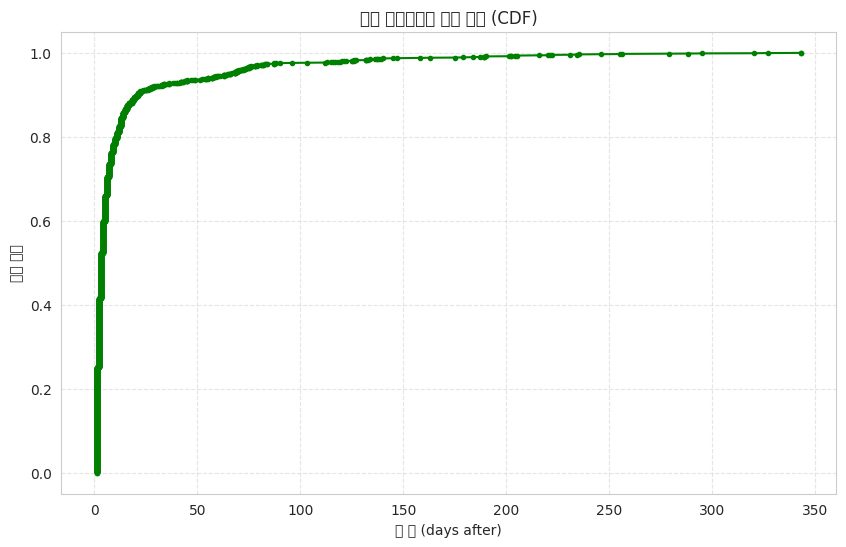

In [ ]:
# ÎàÑÏ†ÅÎπÑÏú®Í∑∏ÎûòÌîÑ

# 1. days_after Ï†ïÎ†¨
data = infected['days_after'].dropna()
data_sorted = np.sort(data)

# 2. ÎàÑÏ†Å ÎπÑÏú® Í≥ÑÏÇ∞
cdf = np.arange(1, len(data_sorted)+1) / len(data_sorted)

# 3. CDF Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10,6))
plt.plot(data_sorted, cdf, marker='.', linestyle='-', color='green')
plt.title("ÏπúÍµ¨ Í≤∞Ï†úÍπåÏßÄÏùò ÎàÑÏ†Å ÎπÑÏú® (CDF)")
plt.xlabel("Ïùº Ïàò (days after)")
plt.ylabel("ÎàÑÏ†Å ÎπÑÏú®")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# CDFÏùò Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞
import numpy as np

grad = np.gradient(cdf, data_sorted)
flat_threshold = 0.001  # Í∏∞Ïö∏Í∏∞ Í±∞Ïùò 0ÏúºÎ°ú Í∞ÑÏ£ºÌï† Í∏∞Ï§Ä

# Ï≤òÏùåÏúºÎ°ú Í∏∞Ïö∏Í∏∞Í∞Ä 0.001 ÎØ∏ÎßåÏù¥ ÎêòÎäî ÏãúÏ†ê
plateau_day = data_sorted[np.argmax(grad < flat_threshold)]
print(f"Í∑∏ÎûòÌîÑÍ∞Ä Í±∞Ïùò ÏàòÌèâÏù¥ ÎêòÎäî ÏãúÏ†ê: {plateau_day}Ïùº ÌõÑ")

Í∑∏ÎûòÌîÑÍ∞Ä Í±∞Ïùò ÏàòÌèâÏù¥ ÎêòÎäî ÏãúÏ†ê: 30.0Ïùº ÌõÑ


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/py

In [ ]:
# 30Ïùº Ïù¥Ìïò Í≤∞Ï†ú ÎπÑÏú® (CDFÏóêÏÑú x=30Ïù∏ ÏßÄÏ†ê)
cdf_30 = np.sum(data_sorted <= 30) / len(data_sorted)
print(f"ÏµúÏ¥à Í≤∞Ï†úÏùºÎ°úÎ∂ÄÌÑ∞ 30Ïùº Ïù¥ÎÇ¥Ïóê Í≤∞Ï†úÌïú ÏπúÍµ¨ ÎπÑÏú®: {cdf_30:.2%}")

ÏµúÏ¥à Í≤∞Ï†úÏùºÎ°úÎ∂ÄÌÑ∞ 30Ïùº Ïù¥ÎÇ¥Ïóê Í≤∞Ï†úÌïú ÏπúÍµ¨ ÎπÑÏú®: 92.01%


#### Í∞êÏóºÎ•†

- Í∞Å Ïú†Ï†ÄÎ≥ÑÎ°ú Ï†ÑÏóºÎ†•(Í∞êÏóºÎ•†) Íµ¨ÌïòÍ∏∞
    - Í∞êÏóºÎ•† = (Ïú†Ï†Ä ÏµúÏ¥à Í≤∞Ï†úÏùº Ïù¥ÌõÑ 5Ïùº ÎÇ¥ Í≤∞Ï†úÌïú ÏπúÍµ¨ Ïàò) / (Ï†ÑÏ≤¥ ÏπúÍµ¨ Ïàò)

In [ ]:
# 5Ïùº Ïù¥ÎÇ¥

# 1. Ïú†Ï†Ä-ÏπúÍµ¨ Ïåç Ï§ë, ÏπúÍµ¨Í∞Ä Ïú†Ï†Ä Í≤∞Ï†ú ÌõÑ 5Ïùº Ïù¥ÎÇ¥Ïóê Í≤∞Ï†úÌïú Í≤ΩÏö∞
infected['within_5_days'] = infected['days_after'] <= 5

# 2. Ïú†Ï†ÄÎ≥Ñ Ï†ÑÏ≤¥ ÏπúÍµ¨ Ïàò
total_friends = infected.groupby('user_id')['friend_id'].nunique()

# 3. Ïú†Ï†ÄÎ≥Ñ 5Ïùº Ïù¥ÎÇ¥ Í≤∞Ï†úÌïú ÏπúÍµ¨ Ïàò
converted_friends = infected[infected['within_5_days']].groupby('user_id')['friend_id'].nunique()

# 4. ÎπÑÏú® Í≥ÑÏÇ∞
conversion_rate = (converted_friends / total_friends).fillna(0)
conversion_rate.name = 'conversion_rate_within_5_days'

# 5. Í≤∞Í≥º DataFrame
conversion_df = conversion_rate.reset_index()

# ÌôïÏù∏

/tmp/ipython-input-3717305081.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infected['within_5_days'] = infected['days_after'] <= 5


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

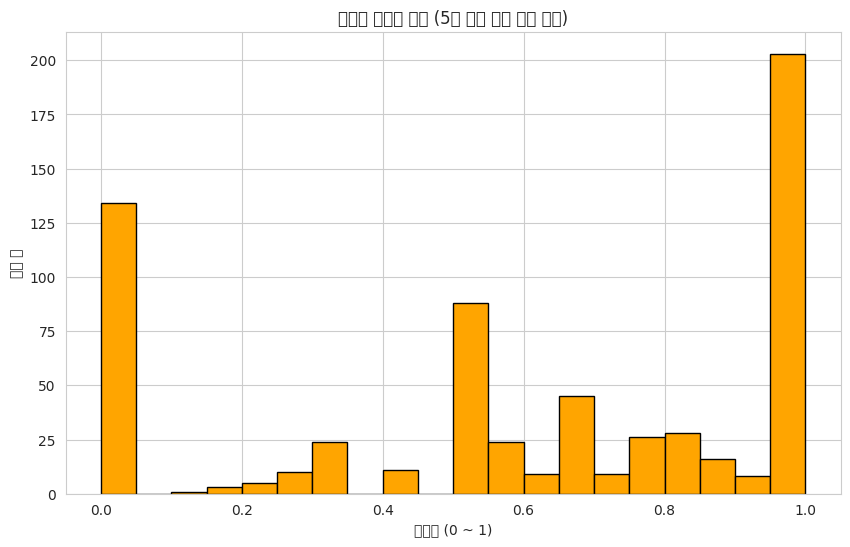

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(conversion_df['conversion_rate_within_5_days'], bins=20, edgecolor='black', color='Orange')
plt.title("Ïú†Ï†ÄÎ≥Ñ Í∞êÏóºÎ•† Î∂ÑÌè¨ (5Ïùº Ïù¥ÎÇ¥ ÏπúÍµ¨ Í≤∞Ï†ú ÎπÑÏú®)")
plt.xlabel("Í∞êÏóºÎ•† (0 ~ 1)")
plt.ylabel("Ïú†Ï†Ä Ïàò")
plt.show()

#### ÏäàÌçº Ï†ÑÌååÏûê

- Í≤∞Ï†ú ÌõÑ 5Ïùº Ïù¥ÎÇ¥Ïóê ÏπúÍµ¨ Ï†ÑÏ≤¥Í∞Ä Í≤∞Ï†úÌïú Ïú†Ï†ÄÎì§Ïù¥ ÏäàÌçº Ï†ÑÌååÏûê

In [ ]:
# Í∞êÏóºÎ•† 1 Ïù¥ÏÉÅÏù∏ Ïú†Ï†Ä
super_spreaders = conversion_df[conversion_df['conversion_rate_within_5_days'] >= 1]
print("ÏäàÌçº Ï†ÑÌååÏûê Ïàò:", len(super_spreaders))
print(super_spreaders.sort_values('conversion_rate_within_5_days', ascending=False).head())

ÏäàÌçº Ï†ÑÌååÏûê Ïàò: 203
    user_id  conversion_rate_within_5_days
1    847933                            1.0
5    868713                            1.0
7    869238                            1.0
8    870503                            1.0
10   873922                            1.0


#### ÌÜµÍ≥Ñ Í≤ÄÏ†ï

In [ ]:
# Í≤∞Ï†ú Ïú†Ï†ÄÏùò ÏπúÍµ¨ Ï§ë Î™á %Í∞Ä Í∞êÏóºÎêòÏóàÎäîÍ∞Ä?

# Í≤∞Ï†úÌïú Ïú†Ï†ÄÎì§ Ï§ë, ÏπúÍµ¨ Ï§ë Î™á Î™ÖÏù¥ Í≤∞Ï†úÌñàÎäîÏßÄ Í≥ÑÏÇ∞
# Îç∞Ïù¥ÌÑ∞ ÏòàÏãú:
# friend_edges: user_id, friend_id
# first_payment: user_id, first_payment_time

# Í≤∞Ï†ú Ïú†Ï†Ä Ï∂îÏ∂ú
payer_ids = set(first_payment['user_id'])

# Í∞êÏóº Ïú†Ï†ÄÏùò ÏπúÍµ¨ Ï§ë Î™á Î™ÖÏù¥ Í∞êÏóºÎêêÎäîÏßÄ ÌôïÏù∏
infected_ratio_list = []

for user in payer_ids:
    friends = friend_edges[friend_edges['user_id'] == user]['friend_id'].tolist()
    if not friends:
        continue
    infected_friends = [f for f in friends if f in payer_ids]
    ratio = len(infected_friends) / len(friends)
    infected_ratio_list.append(ratio)

# Ïã§Ï†ú ÌèâÍ∑† Í∞êÏóºÎ•†
real_infection_ratio = np.mean(infected_ratio_list)
print(f"Ïã§Ï†ú ÎÑ§Ìä∏ÏõåÌÅ¨ÏóêÏÑú ÌèâÍ∑† Í∞êÏóºÎ•†: {real_infection_ratio:.4f}")

Ïã§Ï†ú ÎÑ§Ìä∏ÏõåÌÅ¨ÏóêÏÑú ÌèâÍ∑† Í∞êÏóºÎ•†: 0.1307


- Permutation Test
    -  Í≤∞Ï†ú Ïó¨Î∂ÄÎ•º Î¨¥ÏûëÏúÑÎ°ú ÏÑûÏñ¥ÎèÑ ÎπÑÏä∑Ìïú Í∞êÏóºÎ•†Ïù¥ ÎÇòÏò¨Íπå?
    -  1000Î≤à ÏÑûÏñ¥ÏÑú ÎÇòÏò® Í∞êÏóºÎ•† Î∂ÑÌè¨ÏôÄ Ïã§Ï†ú Í∞í ÎπÑÍµê

In [ ]:
# permutation test
!pip install tqdm -q

In [ ]:
import random

# 1. ÏπúÍµ¨ Î™©Î°ù ÎîïÏÖîÎÑàÎ¶¨
user_to_friends = friend_edges.groupby('user_id')['friend_id'].apply(list).to_dict()

# 2. Ïã§Ï†ú Í∞êÏóºÎ•† Í≥ÑÏÇ∞
payer_set = set(payer_ids)
real_ratios = []

for user in payer_ids:
    friends = user_to_friends.get(user, [])
    if not friends:
        continue
    infected = [f for f in friends if f in payer_set]
    ratio = len(infected) / len(friends)
    real_ratios.append(ratio)

real_infection_ratio = np.mean(real_ratios)
print(f"Ïã§Ï†ú Í∞êÏóºÎ•† (ÌèâÍ∑†): {real_infection_ratio:.4f}")

# 3. Î¨¥ÏûëÏúÑ Í∞êÏóºÎ•† Í≥ÑÏÇ∞
all_user_ids = list(user_to_friends.keys())
num_payers = len(payer_ids)
sample_size = min(num_payers, len(all_user_ids))  # ‚Üê Ï§ëÏöî ÏàòÏ†ï

random_infection_ratios = []

for _ in range(1000):
    random_payers = set(random.sample(all_user_ids, sample_size))
    temp_ratios = []

    for user in random_payers:
        friends = user_to_friends.get(user, [])
        if not friends:
            continue
        infected = [f for f in friends if f in random_payers]
        ratio = len(infected) / len(friends)
        temp_ratios.append(ratio)

    random_infection_ratios.append(np.mean(temp_ratios))

# 4. p-value Í≥ÑÏÇ∞
p_value = np.mean([r >= real_infection_ratio for r in random_infection_ratios])
print(f"p-value: {p_value:.4f}")

Ïã§Ï†ú Í∞êÏóºÎ•† (ÌèâÍ∑†): 0.1307
p-value: 0.0000


```
Ïã§Ï†ú ÏπúÍµ¨ ÎÑ§Ìä∏ÏõåÌÅ¨ÏóêÏÑú Í≤∞Ï†ú Ïú†Ï†ÄÏùò ÏπúÍµ¨ Ï§ë ÌèâÍ∑† 13.07%Í∞Ä Ìï®Íªò Í≤∞Ï†úÌñàÏúºÎ©∞,
Ïù¥Îäî 1000Î≤àÏùò Î¨¥ÏûëÏúÑ ÏÉòÌîåÎßÅÏóêÏÑú ÎÇòÏò® ÌèâÍ∑† Í∞êÏóºÎ•† Î∂ÑÌè¨ÏôÄ ÎπÑÍµêÌñàÏùÑ Îïå p-value = 0.0000Î°ú
ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùÄ ÏàòÏ§ÄÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.
Ï¶â, Í≤∞Ï†úÎäî Îã®ÏàúÌïú Ïö∞Ïó∞Ïù¥ ÏïÑÎãå ÎÑ§Ìä∏ÏõåÌÅ¨ Í∏∞Î∞ò Ï†ÑÏóºÏÑ± Ìö®Í≥ºÍ∞Ä Ï°¥Ïû¨Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§Í≥† Ìï¥ÏÑùÎêúÎã§.
```

### 3-1-2. Ìà¨Ìëú Ï†ÑÏóºÏÑ±

- Í≤∞Ï†ú Ï†ÑÏóºÏÑ± Î∂ÑÏÑù ÌîÑÎ°úÏÑ∏Ïä§ÏôÄ ÎèôÏùºÌïòÍ≤å ÏßÑÌñâÌï®.

#### Ìà¨ÌëúÏú†Ï†ÄÏùò Ïó∞Í≤∞ ÌäπÏÑ± Î∂ÑÏÑù

In [ ]:
ques_record = accounts_userquestionrecord.copy()
accountsuser = accounts_user.copy()

In [ ]:
# accounts_user ÌÖåÏù¥Î∏îÏóê Ìà¨Ìëú Ïó¨Î∂ÄÏóê ÎåÄÌïú Ïª¨Îüº ÏÉùÏÑ±

# question_record ÌÖåÏù¥Î∏îÏùò user_id Í≥†Ïú†Í∞í Ï∂îÏ∂ú
vote_user_ids = ques_record['user_id'].unique()

# accounts_user ÌÖåÏù¥Î∏îÏóê 'vote_or_not' Ïª¨Îüº Ï∂îÍ∞Ä
accountsuser['vote_or_not'] = accountsuser['id'].isin(vote_user_ids).astype(int)

In [ ]:
# ÏπúÍµ¨ Ïàò Î¶¨Ïä§Ìä∏ ÌòïÌÉú
# Î≥ÄÌôò
import ast

accountsuser['friend_id_list'] = accountsuser['friend_id_list'].apply(ast.literal_eval)

In [ ]:
# friend_id_list Í∏∏Ïù¥ Í≥ÑÏÇ∞ÌïòÏó¨ friend_count Ïª¨Îüº ÏÉùÏÑ±ÌïòÏó¨ Ï†ÄÏû•
accountsuser['friend_count'] = accountsuser['friend_id_list'].apply(len)

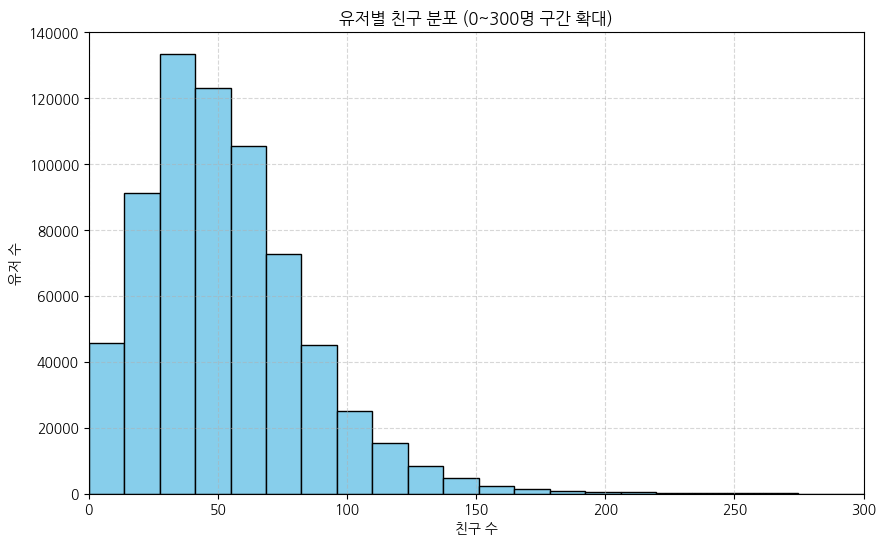

In [ ]:
# ÏπúÍµ¨Ïàò Î∂ÑÌè¨ ÌôïÏù∏


plt.figure(figsize=(10,6))
plt.hist(accountsuser['friend_count'], bins=100, edgecolor='black', color='skyblue')
plt.title("Ïú†Ï†ÄÎ≥Ñ ÏπúÍµ¨ Î∂ÑÌè¨ (0~300Î™Ö Íµ¨Í∞Ñ ÌôïÎåÄ)")
plt.xlabel("ÏπúÍµ¨ Ïàò")
plt.ylabel("Ïú†Ï†Ä Ïàò")
plt.xlim(0, 300)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

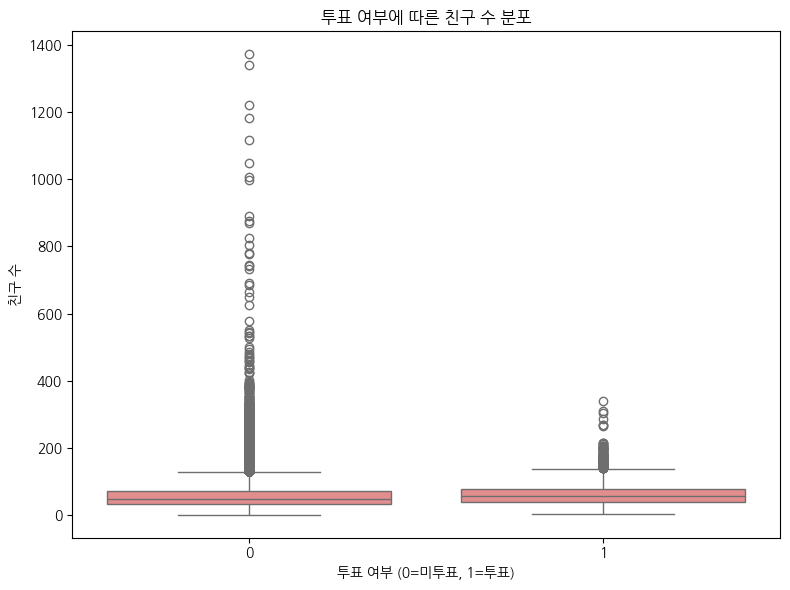

In [ ]:
import seaborn as sns

# Î∞ïÏä§ ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.boxplot(data=accountsuser, x='vote_or_not', y='friend_count', color='lightcoral')
plt.xlabel('Ìà¨Ìëú Ïó¨Î∂Ä (0=ÎØ∏Ìà¨Ìëú, 1=Ìà¨Ìëú)')
plt.ylabel('ÏπúÍµ¨ Ïàò')
plt.title('Ìà¨Ìëú Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÏπúÍµ¨ Ïàò Î∂ÑÌè¨')
plt.tight_layout()
plt.show()

- Îã®ÏàúÌûà ÏπúÍµ¨Í∞Ä ÎßéÏùÑÏàòÎ°ù, Ìà¨ÌëúÎ•º ÎßéÏù¥ÌïòÎäî Í≤ÉÏùÄ ÏïÑÎãò.
- ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏñ¥Î≥¥ÏûÑ.

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ ÏπúÍµ¨Î¶¨Ïä§Ìä∏ Ï§ëÏóê Ìà¨Ìëú Ïù¥Î†•Ïù¥ ÏûàÎäî ÏπúÍµ¨Ïùò Ïàò
# ÏÉàÎ°úÏö¥ Ïª¨Îüº ÏÉùÏÑ±

vote_user_ids_set = set(vote_user_ids)

def count_vote_friends(friend_list):
    return sum(1 for fid in friend_list if fid in vote_user_ids_set)

accountsuser['vote_friend_count'] = accountsuser['friend_id_list'].apply(count_vote_friends)

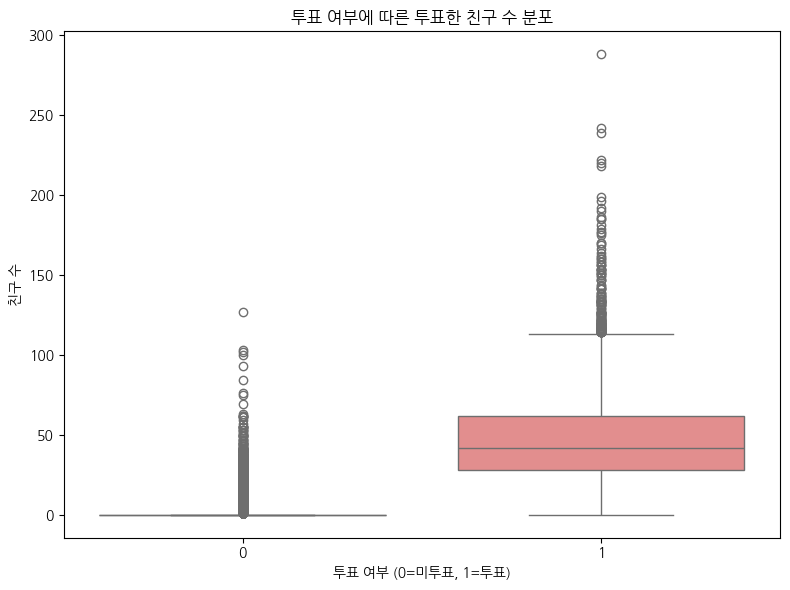

In [ ]:
# Î∞ïÏä§ ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.boxplot(data=accountsuser, x='vote_or_not', y='vote_friend_count', color='lightcoral')
plt.xlabel('Ìà¨Ìëú Ïó¨Î∂Ä (0=ÎØ∏Ìà¨Ìëú, 1=Ìà¨Ìëú)')
plt.ylabel('ÏπúÍµ¨ Ïàò')
plt.title('Ìà¨Ìëú Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ìà¨ÌëúÌïú ÏπúÍµ¨ Ïàò Î∂ÑÌè¨')
plt.tight_layout()
plt.show()

- Ìà¨ÌëúÍ∏∞Î°ùÏù¥ ÏóÜÎäî Ïú†Ï†Ä
    - ÏπúÍµ¨ Ï§ë Ìà¨Ìëú Ïù¥Î†•Ïù¥ ÏûàÎäî ÌèâÍ∑† ÏπúÍµ¨ ÏàòÎäî ÏïΩ 0.09Î™Ö
- Í≤∞Ï†úÍ∏∞Î°ùÏù¥ ÏûàÎäî Ïú†Ï†Ä
    - ÏπúÍµ¨ Ï§ë Í≤∞Ï†ú Ïù¥Î†•Ïù¥ ÏûàÎäî ÌèâÍ∑† ÏπúÍµ¨ ÏàòÎäî ÏïΩ 48.16Î™Ö
- ÏïΩ 48.07Î™Ö Ï∞®Ïù¥ ÎÇ®.

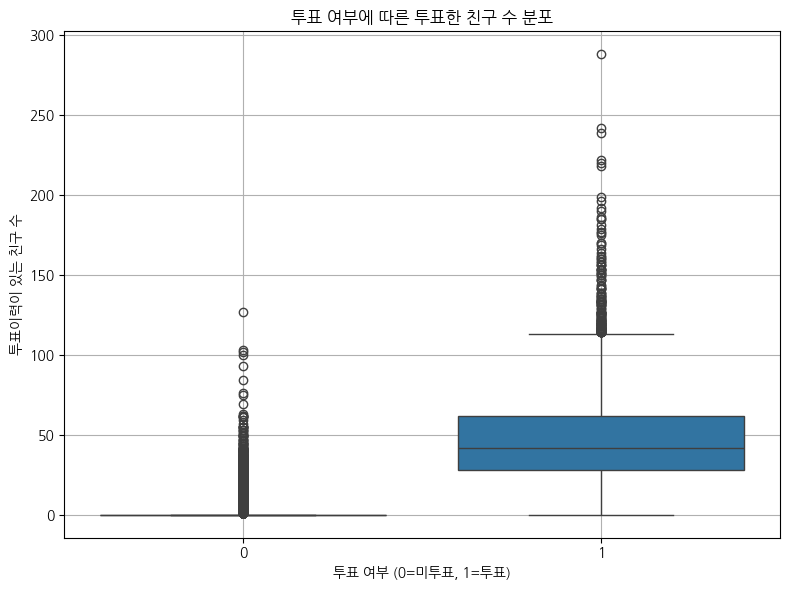

In [ ]:
# Î∞ïÏä§ ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.boxplot(data=accountsuser, x='vote_or_not', y='vote_friend_count')
plt.xlabel('Ìà¨Ìëú Ïó¨Î∂Ä (0=ÎØ∏Ìà¨Ìëú, 1=Ìà¨Ìëú)')
plt.ylabel('Ìà¨ÌëúÏù¥Î†•Ïù¥ ÏûàÎäî ÏπúÍµ¨ Ïàò')
plt.title('Ìà¨Ìëú Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ìà¨ÌëúÌïú ÏπúÍµ¨ Ïàò Î∂ÑÌè¨')
plt.grid(True)
plt.tight_layout()
plt.show()

- Ï∞®Ïù¥Í∞Ä ÎÇòÌÉÄÎÇ®.
- Í≤∞Ï†ú Ïú†Ï†ÄÏùò Í≤ΩÏö∞, Í≤∞Ï†úÏù¥Î†•Ïù¥ ÏûàÎäî ÏπúÍµ¨Ïùò ÏàòÍ∞Ä ÎßéÏùå.

In [ ]:
# ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï
from scipy.stats import ttest_ind

vote = accountsuser[accountsuser['vote_or_not'] == 1]['vote_friend_count']
unvote = accountsuser[accountsuser['vote_or_not'] == 0]['vote_friend_count']

t_stat, p_val = ttest_ind(vote, unvote, equal_var=False)
print(f"p-value: {p_val:.3f}")

p-value: 0.000


In [ ]:
# ÌöåÍ∑Ä Î∂ÑÏÑù
from sklearn.linear_model import LogisticRegression

features = accountsuser[['vote_friend_count']]
target = accountsuser['vote_or_not']

model = LogisticRegression()
model.fit(features, target)

print("coef:", model.coef_)  # num_vote_friends Í≥ÑÏàò > 0 Ïù¥Î©¥ Ï†ÑÏóº Í∞ÄÎä•ÏÑ± Ï°¥Ïû¨

coef: [[0.35753951]]


- ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï®!
- coef Í≥ÑÏàòÍ∞Ä 0Î≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê, Ï†ÑÏóº Í∞ÄÎä•ÏÑ± Ï°¥Ïû¨!

In [ ]:
# ÏπúÍµ¨Ïàò ÎåÄÎπÑ Ìà¨ÌëúÌïú ÏπúÍµ¨ ÎπÑ

# Ìà¨ÌëúÌïú ÏπúÍµ¨ ÎπÑÏú®
accountsuser['vote_friend_ratio'] = accountsuser['vote_friend_count'] / accountsuser['friend_count']

# Î¨¥ÌïúÎåÄ/NaN Î∞©ÏßÄ (ÏπúÍµ¨Í∞Ä 0Î™ÖÏù∏ Í≤ΩÏö∞)
accountsuser['vote_friend_ratio'] = accountsuser['vote_friend_ratio'].fillna(0)

# Í≤∞Í≥º ÌôïÏù∏
accountsuser[['id', 'friend_count', 'vote_friend_count', 'vote_friend_ratio']].head()

id  friend_count  vote_friend_count  vote_friend_ratio
0  831956             6                  0                0.0
1  831962            43                  0                0.0
2  832151            51                  0                0.0
3  832340            57                  0                0.0
4  832520            18                  0                0.0

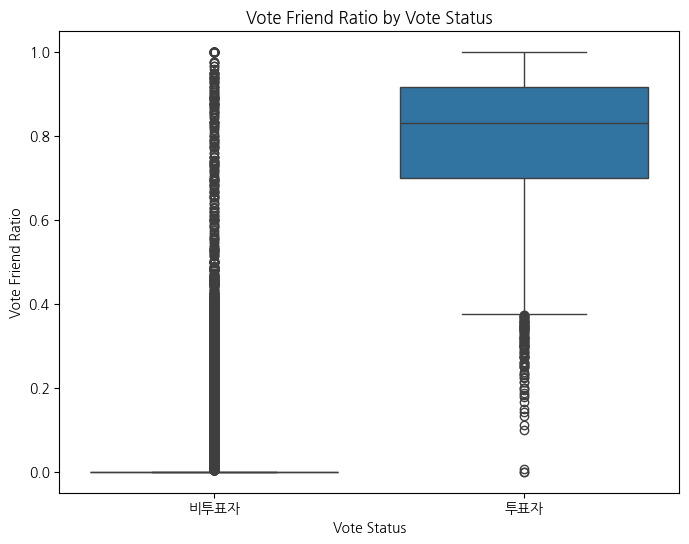

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='vote_or_not', y='vote_friend_ratio', data=accountsuser)
plt.xticks([0, 1], ['ÎπÑÌà¨ÌëúÏûê', 'Ìà¨ÌëúÏûê'])
plt.title('Vote Friend Ratio by Vote Status')
plt.xlabel('Vote Status')
plt.ylabel('Vote Friend Ratio')
plt.show()

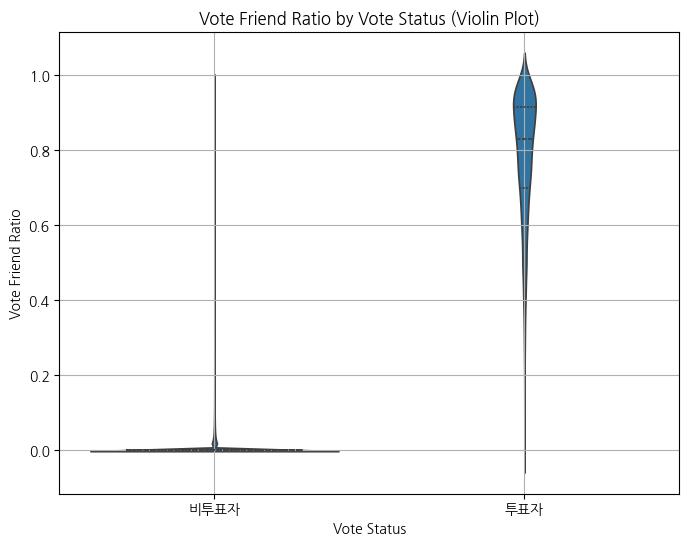

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='vote_or_not', y='vote_friend_ratio', data=accountsuser, inner='quartile')
plt.xticks([0, 1], ['ÎπÑÌà¨ÌëúÏûê', 'Ìà¨ÌëúÏûê'])
plt.title('Vote Friend Ratio by Vote Status (Violin Plot)')
plt.xlabel('Vote Status')
plt.ylabel('Vote Friend Ratio')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import ttest_ind

group_0 = accountsuser[accountsuser['vote_or_not'] == 0]['vote_friend_ratio']
group_1 = accountsuser[accountsuser['vote_or_not'] == 1]['vote_friend_ratio']

t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)
print(f'p-value: {p_val:.3f}')

p-value: 0.000


In [ ]:
# ÌöåÍ∑Ä Î∂ÑÏÑù

features = accountsuser[['vote_friend_ratio']]
target = accountsuser['vote_or_not']

model = LogisticRegression()
model.fit(features, target)

print("coef:", model.coef_)

coef: [[16.54663985]]


- ÏπúÍµ¨ÎåÄÎπÑ Ìà¨ÌëúÍ≤ΩÌóòÏù¥ ÏûàÎäî ÏπúÍµ¨Ïùò ÎπÑÏú® ÏßÄÌëúÎèÑ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï®.
- ÌöåÍ∑ÄÍ≥ÑÏàòÎèÑ 16.5466 Ï†ïÎèÑÎ°ú Ïù¥ Í∞íÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ä 1Îã®ÏúÑ Ï¶ùÍ∞ÄÌï† Îïå
- Í≤∞Í≥º(Ïòà: Ìà¨ÌëúÌï† ÌôïÎ•†)Ïùò Î°úÍ∑∏ Ïò§Ï¶à(log-odds)Í∞Ä ÏïΩ 16.5466ÎßåÌÅº Ï¶ùÍ∞ÄÌïúÎã§Îäî ÎúªÏûÖÎãàÎã§.
- ÍµâÏû•Ìûà Í∞ïÌïú ÏòÅÌñ•Î†•ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

#### ÏãúÍ∞ÑÌùêÎ¶ÑÏóê Îî∞Î•∏ Ï†ÑÏóº Ìö®Í≥º Î∂ÑÏÑù

- ÌäπÏ†ï Ïú†Ï†ÄÍ∞Ä Ìà¨ÌëúÌïú ÏßÅÌõÑ, ÏπúÍµ¨Îì§Ïù¥ Î©∞Ïπ† Ïù¥ÎÇ¥Ïóê Ìà¨ÌëúÌïòÎäîÍ∞Ä?
- ÏπúÍµ¨ Ï§ë Ìà¨ÌëúÌïú ÎÇ†ÏßúÍ∞Ä index Ïú†Ï†Ä Ìà¨Ìëú ÌõÑ ¬±nÏùº ÏïàÏóê Î™∞Î†§ ÏûàÎäîÏßÄ ÌôïÏù∏
- Ïù∏ÏÇ¨Ïù¥Ìä∏: Ìà¨Ìëú Ïú†ÎèÑ ÏãúÍ∏∞ ÌÉÄÏù¥Î∞ç ÏµúÏ†ÅÌôî Í∞ÄÎä•

- Î∂ÑÏÑù ÏàúÏÑú
    - Ìà¨Ìëú Ïú†Ï†Ä Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú
    - Ìà¨Ìëú ÏãúÏ†ê Í∏∞Ï§Ä, Ìï¥Îãπ Ïú†Ï†ÄÏùò ÏπúÍµ¨ Î™©Î°ù Ï∂îÏ∂ú
    - ÏπúÍµ¨Îì§Ïùò Ìà¨Ìëú ÏãúÏ†êÍ≥º ÎπÑÍµê ‚Üí ÏãúÍ∞ÑÏ∞® Í≥ÑÏÇ∞
    - ÏãúÍ∞ÑÏ∞®Í∞Ä 0Ïùº~NÏùº ÏÇ¨Ïù¥Ïù∏ ÏπúÍµ¨ Ïàò ÏßëÍ≥Ñ
    - ÌûàÏä§ÌÜ†Í∑∏Îû® ÎòêÎäî ÎàÑÏ†Å ÎπÑÏú® Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî

```
Í∞Å Ìà¨Ìëú Ïú†Ï†Ä Í∏∞Ï§ÄÏúºÎ°ú, Í∑∏Ïùò ÏπúÍµ¨Îì§Ïù¥ Ï≤´ Ìà¨Ìëú ÏãúÏ†ê Ïù¥ÌõÑ Î©∞Ïπ† Ïù¥ÎÇ¥Ïóê Í≤∞Ï†úÌñàÎäîÏßÄ?
```

In [ ]:
# datetimeÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Ìòï Î≥ÄÌôò
ques_record['created_at'] = pd.to_datetime(ques_record['created_at'])

In [ ]:
# user_id Î≥Ñ ÏµúÏ¥à Ìà¨Ìëú ÏùºÏûê Ï∂îÏ∂ú

first_vote = ques_record.groupby('user_id')['created_at'].min().reset_index()
first_vote.columns = ['user_id', 'first_vote_date']
first_vote.head()

user_id           first_vote_date
0   838023 2023-04-30 01:22:56+09:00
1   838466 2023-05-03 07:42:05+09:00
2   838642 2023-04-28 23:18:07+09:00
3   839357 2023-04-30 01:51:01+09:00
4   840293 2023-05-03 11:24:05+09:00

In [ ]:
# Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ïª§ÏÑú ÏÉòÌîåÎßÅ

# Î®ºÏ†Ä 1Îßå Î™Ö Ï†ïÎèÑ Ïú†Ï†ÄÎßå ÏÉòÌîåÎßÅÌï¥ÏÑú ÌôïÏù∏
accounts_user_sample = accountsuser.sample(n=10000, random_state=42)

# explode Ï†ÅÏö©
friend_edges = accounts_user_sample.explode('friend_id_list')[['id', 'friend_id_list']]
friend_edges.columns = ['user_id', 'friend_id']

In [ ]:
# ÏπúÍµ¨Îì§Ïùò ÏµúÏ¥àÌà¨ÌëúÏãúÏ†ê
# first_voteÏóêÏÑú Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
friend_first_vote = first_vote.rename(columns={
    'user_id': 'friend_id',
    'first_vote_date': 'friend_vote_date'
})

In [ ]:
# Ìà¨ÌëúÌïú Ïú†Ï†ÄÏôÄ ÏπúÍµ¨Ïùò Í≤∞Ï†úÏãúÏ†ê Î≥ëÌï©
merged = friend_edges.merge(first_vote, on='user_id', how='left') \
                     .merge(friend_first_vote, on='friend_id', how='left')

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÍ≤Ω
merged['friend_vote_date'] = pd.to_datetime(merged['friend_vote_date'])
merged['first_vote_date'] = pd.to_datetime(merged['first_vote_date'])


# Ìà¨Ìëú ÏãúÏ†ê Ï∞®Ïù¥ Í≥ÑÏÇ∞
merged['days_after'] = (merged['friend_vote_date'] - merged['first_vote_date']).dt.days

# ÏπúÍµ¨Í∞Ä Ìà¨ÌëúÌïú Ïú†Ï†ÄÎ≥¥Îã§ ÎÇòÏ§ëÏóê Ìà¨ÌëúÌïú Í≤ΩÏö∞Îßå Ï∂îÏ∂ú
infected = merged[merged['days_after'] > 0]

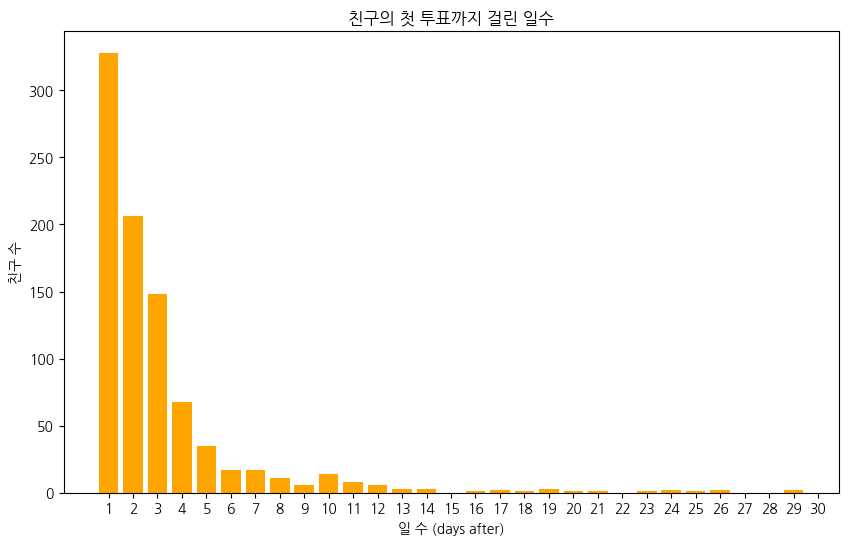

In [ ]:
# ÏãúÍ∞ÅÌôî Ìï¥Î≥¥Í∏∞!

# 1~30Ïùº Î≤îÏúÑÎ°ú ÏßëÍ≥Ñ
day_counts = infected['days_after'].value_counts().sort_index()
day_counts = day_counts[day_counts.index <= 30]

plt.figure(figsize=(10,6))
plt.bar(day_counts.index, day_counts.values, color='Orange')
plt.title("ÏπúÍµ¨Ïùò Ï≤´ Ìà¨ÌëúÍπåÏßÄ Í±∏Î¶∞ ÏùºÏàò")
plt.xlabel("Ïùº Ïàò (days after)")
plt.ylabel("ÏπúÍµ¨ Ïàò")
plt.xticks(range(1, 31))
plt.show()

In [ ]:
# Ìà¨Ìëú Ï†ÑÌåå ÏãúÏ†ê Î∂ÑÏÑù
infected_stats = infected['days_after'].describe()
print(infected_stats)

# Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÏÇ¨Î∂ÑÏúÑ Î≤îÏúÑ
iqr = infected['days_after'].quantile(0.75) - infected['days_after'].quantile(0.25)
print("IQR (Interquartile Range):", iqr)

count    899.000000
mean       4.191324
std       13.306859
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max      315.000000
Name: days_after, dtype: float64
IQR (Interquartile Range): 2.0


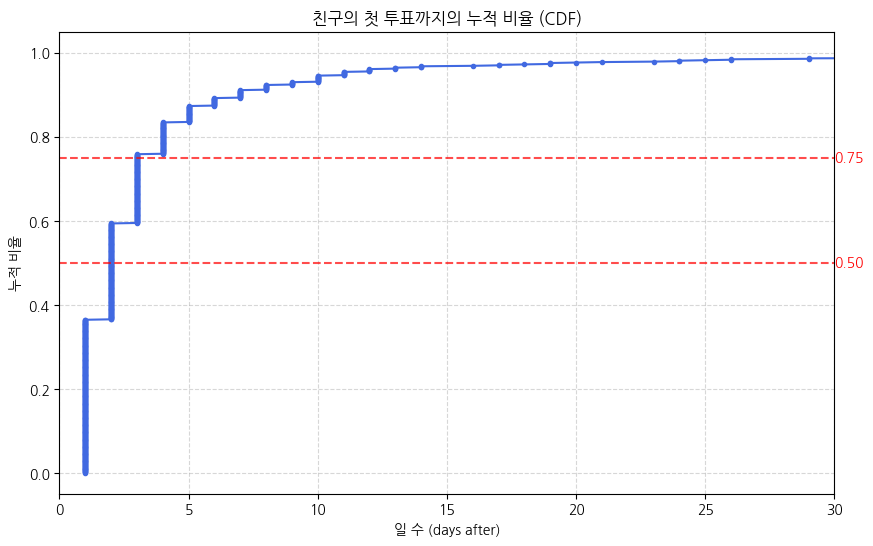

In [ ]:
import numpy as np

# ÎàÑÏ†ÅÎπÑÏú®Í∑∏ÎûòÌîÑ

# 1. days_after Ï†ïÎ†¨
data = infected['days_after'].dropna()
data_sorted = np.sort(data)

# 2. ÎàÑÏ†Å ÎπÑÏú® Í≥ÑÏÇ∞
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# 3. CDF Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 6))
plt.plot(data_sorted, cdf, marker='.', linestyle='-', color='royalblue')

# xÏ∂ï Î≤îÏúÑ Ï†úÌïú (0~30Ïùº)
plt.xlim(0, 30)

# ÎàÑÏ†Å ÎπÑÏú® 0.5ÏôÄ 0.75 ÌëúÏãúÏÑ† + Ìï¥Îãπ Í∞í ÌÖçÏä§Ìä∏
for y_val in [0.5, 0.75]:
    plt.axhline(y=y_val, color='red', linestyle='--', alpha=0.7)
    plt.text(30, y_val, f'{y_val:.2f}', va='center', ha='left', color='red')

plt.title("ÏπúÍµ¨Ïùò Ï≤´ Ìà¨ÌëúÍπåÏßÄÏùò ÎàÑÏ†Å ÎπÑÏú® (CDF)")
plt.xlabel("Ïùº Ïàò (days after)")
plt.ylabel("ÎàÑÏ†Å ÎπÑÏú®")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# CDFÏùò Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞
import numpy as np

grad = np.gradient(cdf, data_sorted)
flat_threshold = 0.001  # Í∏∞Ïö∏Í∏∞ Í±∞Ïùò 0ÏúºÎ°ú Í∞ÑÏ£ºÌï† Í∏∞Ï§Ä

# Ï≤òÏùåÏúºÎ°ú Í∏∞Ïö∏Í∏∞Í∞Ä 0.001 ÎØ∏ÎßåÏù¥ ÎêòÎäî ÏãúÏ†ê
plateau_day = data_sorted[np.argmax(grad < flat_threshold)]
print(f"Í∑∏ÎûòÌîÑÍ∞Ä Í±∞Ïùò ÏàòÌèâÏù¥ ÎêòÎäî ÏãúÏ†ê: {plateau_day}Ïùº ÌõÑ")

Í∑∏ÎûòÌîÑÍ∞Ä Í±∞Ïùò ÏàòÌèâÏù¥ ÎêòÎäî ÏãúÏ†ê: 16.0Ïùº ÌõÑ


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/py

In [ ]:
# 16Ïùº Ïù¥Ìïò Ìà¨Ìëú ÎπÑÏú® (CDFÏóêÏÑú x=16Ïù∏ ÏßÄÏ†ê)
cdf_16 = np.sum(data_sorted <= 16) / len(data_sorted)
print(f"ÏµúÏ¥à Ìà¨ÌëúÏùºÎ°úÎ∂ÄÌÑ∞ 16Ïùº Ïù¥ÎÇ¥Ïóê Ìà¨ÌëúÌïú ÏπúÍµ¨ ÎπÑÏú®: {cdf_16:.2%}")

ÏµúÏ¥à Ìà¨ÌëúÏùºÎ°úÎ∂ÄÌÑ∞ 16Ïùº Ïù¥ÎÇ¥Ïóê Ìà¨ÌëúÌïú ÏπúÍµ¨ ÎπÑÏú®: 96.89%


#### Í∞êÏóºÎ•†

- Í∞Å Ïú†Ï†ÄÎ≥ÑÎ°ú Ï†ÑÏóºÎ†•(Í∞êÏóºÎ•†) Íµ¨ÌïòÍ∏∞
    - Í∞êÏóºÎ•† = (Ïú†Ï†Ä ÏµúÏ¥à Ìà¨ÌëúÏùº Ïù¥ÌõÑ 5Ïùº ÎÇ¥ Ìà¨ÌëúÌïú ÏπúÍµ¨ Ïàò) / (Ï†ÑÏ≤¥ ÏπúÍµ¨ Ïàò)

In [ ]:
# 5Ïùº Ïù¥ÎÇ¥

# 1. Ïú†Ï†Ä-ÏπúÍµ¨ Ïåç Ï§ë, ÏπúÍµ¨Í∞Ä Ïú†Ï†ÄÏùò Ï≤´ Ìà¨Ìëú ÌõÑ 5Ïùº Ïù¥ÎÇ¥Ïóê Í≤∞Ï†úÌïú Í≤ΩÏö∞
infected['within_5_days'] = infected['days_after'] <= 5

# 2. Ïú†Ï†ÄÎ≥Ñ Ï†ÑÏ≤¥ ÏπúÍµ¨ Ïàò
total_friends = infected.groupby('user_id')['friend_id'].nunique()

# 3. Ïú†Ï†ÄÎ≥Ñ 5Ïùº Ïù¥ÎÇ¥ Ìà¨ÌëúÌïú ÏπúÍµ¨ Ïàò
converted_friends = infected[infected['within_5_days']].groupby('user_id')['friend_id'].nunique()

# 4. ÎπÑÏú® Í≥ÑÏÇ∞
conversion_rate = (converted_friends / total_friends).fillna(0)
conversion_rate.name = 'conversion_rate_within_5_days'

# 5. Í≤∞Í≥º DataFrame
conversion_df = conversion_rate.reset_index()

# ÌôïÏù∏
conversion_df.head()

/tmp/ipython-input-30431710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infected['within_5_days'] = infected['days_after'] <= 5


user_id  conversion_rate_within_5_days
0   838466                       1.000000
1   849528                       0.600000
2   850091                       0.833333
3   850284                       0.000000
4   852044                       0.857143

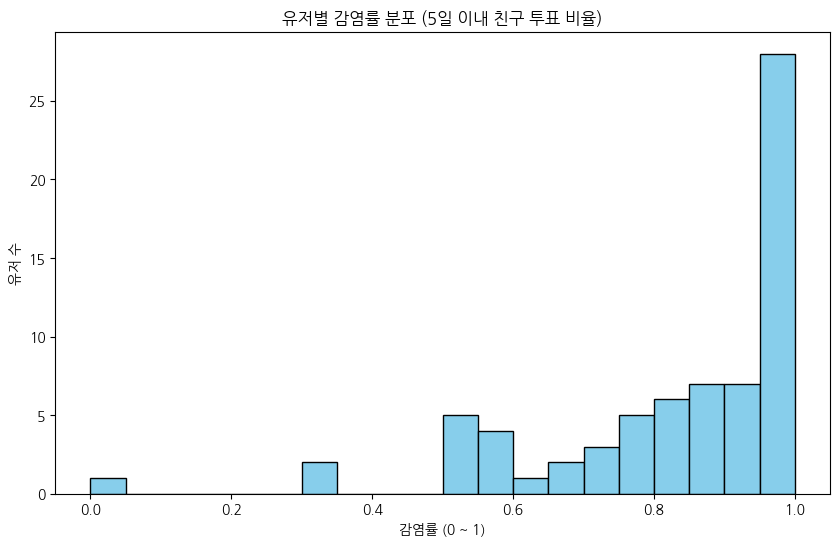

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(conversion_df['conversion_rate_within_5_days'], bins=20, edgecolor='black', color='skyblue')
plt.title("Ïú†Ï†ÄÎ≥Ñ Í∞êÏóºÎ•† Î∂ÑÌè¨ (5Ïùº Ïù¥ÎÇ¥ ÏπúÍµ¨ Ìà¨Ìëú ÎπÑÏú®)")
plt.xlabel("Í∞êÏóºÎ•† (0 ~ 1)")
plt.ylabel("Ïú†Ï†Ä Ïàò")
plt.show()

#### ÏäàÌçºÏ†ÑÌååÏûê

- Ìà¨Ìëú ÌõÑ 5Ïùº Ïù¥ÎÇ¥Ïóê ÏπúÍµ¨ Ï†ÑÏ≤¥Í∞Ä Ìà¨ÌëúÌïú Ïú†Ï†ÄÎì§Ïù¥ ÏäàÌçº Ï†ÑÌååÏûê

In [ ]:
# Í∞êÏóºÎ•† 1 Ïù¥ÏÉÅÏù∏ Ïú†Ï†Ä
super_spreaders = conversion_df[conversion_df['conversion_rate_within_5_days'] >= 1]
print("ÏäàÌçº Ï†ÑÌååÏûê Ïàò:", len(super_spreaders))
print(super_spreaders.sort_values('conversion_rate_within_5_days', ascending=False).head())

ÏäàÌçº Ï†ÑÌååÏûê Ïàò: 24
    user_id  conversion_rate_within_5_days
0    838466                            1.0
7    855675                            1.0
12   873157                            1.0
18   880096                            1.0
19   881298                            1.0


#### ÌÜµÍ≥Ñ Í≤ÄÏ†ï

In [ ]:
# Í≤∞Ï†úÌïú Ïú†Ï†ÄÎì§ Ï§ë, ÏπúÍµ¨ Ï§ë Î™á Î™ÖÏù¥ Í≤∞Ï†úÌñàÎäîÏßÄ Í≥ÑÏÇ∞
# Îç∞Ïù¥ÌÑ∞ ÏòàÏãú:
# friend_edges: user_id, friend_id
# first_payment: user_id, first_payment_time

# Í≤∞Ï†ú Ïú†Ï†Ä Ï∂îÏ∂ú
payer_ids = set(first_vote['user_id'])

# Í∞êÏóº Ïú†Ï†ÄÏùò ÏπúÍµ¨ Ï§ë Î™á Î™ÖÏù¥ Í∞êÏóºÎêêÎäîÏßÄ ÌôïÏù∏
infected_ratio_list = []

for user in payer_ids:
    friends = friend_edges[friend_edges['user_id'] == user]['friend_id'].tolist()
    if not friends:
        continue
    infected_friends = [f for f in friends if f in payer_ids]
    ratio = len(infected_friends) / len(friends)
    infected_ratio_list.append(ratio)

# Ïã§Ï†ú ÌèâÍ∑† Í∞êÏóºÎ•†
real_infection_ratio = np.mean(infected_ratio_list)
print(f"Ïã§Ï†ú ÎÑ§Ìä∏ÏõåÌÅ¨ÏóêÏÑú ÌèâÍ∑† Í∞êÏóºÎ•†: {real_infection_ratio:.4f}")

Ïã§Ï†ú ÎÑ§Ìä∏ÏõåÌÅ¨ÏóêÏÑú ÌèâÍ∑† Í∞êÏóºÎ•†: 0.7771


In [ ]:
import random

# 1. ÏπúÍµ¨ Î™©Î°ù ÎîïÏÖîÎÑàÎ¶¨
user_to_friends = friend_edges.groupby('user_id')['friend_id'].apply(list).to_dict()

# 2. Ïã§Ï†ú Í∞êÏóºÎ•† Í≥ÑÏÇ∞
payer_set = set(payer_ids)
real_ratios = []

for user in payer_ids:
    friends = user_to_friends.get(user, [])
    if not friends:
        continue
    infected = [f for f in friends if f in payer_set]
    ratio = len(infected) / len(friends)
    real_ratios.append(ratio)

real_infection_ratio = np.mean(real_ratios)
print(f"Ïã§Ï†ú Í∞êÏóºÎ•† (ÌèâÍ∑†): {real_infection_ratio:.4f}")

# 3. Î¨¥ÏûëÏúÑ Í∞êÏóºÎ•† Í≥ÑÏÇ∞
all_user_ids = list(user_to_friends.keys())
num_payers = len(payer_ids)
sample_size = min(num_payers, len(all_user_ids))

random_infection_ratios = []

for _ in range(1000):
    random_payers = set(random.sample(all_user_ids, sample_size))
    temp_ratios = []

    for user in random_payers:
        friends = user_to_friends.get(user, [])
        if not friends:
            continue
        infected = [f for f in friends if f in random_payers]
        ratio = len(infected) / len(friends)
        temp_ratios.append(ratio)

    random_infection_ratios.append(np.mean(temp_ratios))

# 4. p-value Í≥ÑÏÇ∞
p_value = np.mean([r >= real_infection_ratio for r in random_infection_ratios])
print(f"p-value: {p_value:.4f}")

Ïã§Ï†ú Í∞êÏóºÎ•† (ÌèâÍ∑†): 0.7771
p-value: 0.0000


```
Ïã§Ï†ú ÏπúÍµ¨ ÎÑ§Ìä∏ÏõåÌÅ¨ÏóêÏÑú Í≤∞Ï†ú Ïú†Ï†ÄÏùò ÏπúÍµ¨ Ï§ë ÌèâÍ∑† Í∞êÏóºÎ•†:  77.71%
Ïù¥Îäî 1000Î≤àÏùò Î¨¥ÏûëÏúÑ ÏÉòÌîåÎßÅÏóêÏÑú ÎÇòÏò® ÌèâÍ∑† Í∞êÏóºÎ•† Î∂ÑÌè¨ÏôÄ ÎπÑÍµêÌñàÏùÑ Îïå
p-value = 0.0000 ‚Üí ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùÄ ÏàòÏ§Ä
Ï¶â, Ìà¨ÌëúÎäî Îã®ÏàúÌïú Ïö∞Ïó∞Ïù¥ ÏïÑÎãå ÎÑ§Ìä∏ÏõåÌÅ¨ Í∏∞Î∞ò Ï†ÑÏóºÏÑ± Ìö®Í≥ºÍ∞Ä ÏÉÅÎãπÌï®!
```

## 3-2. Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïú†Ï†Ä ÏòÅÌñ•Î†•

### ÏÇ¨Ïö© Îç∞Ïù¥ÌÑ∞

In [ ]:
v_user_df = accounts_user.copy()
v_userquestionrecord_df = accounts_userquestionrecord.copy()
v_attendance_df = new_attendance.copy()
v_payhistory_df = accounts_paymenthistory.copy()

### Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±

Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÏùò Í∏∞Ï§Ä

ÏÇ¨Ïö©Ìïú Îç∞Ïù¥ÌÑ∞: v_user_dfÏùò friend_id_list

Ï∏°Ï†ï ÏßÄÌëú: ÏπúÍµ¨ Ïàò (Friend Count)

ÏÇ¨Ïö©Ìïú Îç∞Ïù¥ÌÑ∞: v_userquestionrecord_df (ÎàÑÍ∞Ä ÎàÑÍµ¨ÏóêÍ≤å Ìà¨ÌëúÌñàÎäîÏßÄ Í∏∞Î°ù)

Ïù∏Í∏∞ Ï†êÏàò (In-Degree): Ïù¥ Ïú†Ï†ÄÍ∞Ä Îã§Î•∏ ÏÇ¨ÎûåÎì§ÏóêÍ≤å Ìà¨ÌëúÎ•º Î∞õÏùÄ Ï¥ù ÌöüÏàò

ÌôúÎèôÏÑ± Ï†êÏàò (Out-Degree): Ïù¥ Ïú†Ï†ÄÍ∞Ä Îã§Î•∏ ÏÇ¨ÎûåÎì§ÏóêÍ≤å Ìà¨ÌëúÎ•º Ìïú Ï¥ù ÌöüÏàò

Ï§ëÏöîÎèÑ Ï†êÏàò (PageRank): Ï§ëÏöîÌïú ÏÇ¨Îûå(Ïù∏Í∏∞ ÎßéÍ≥† ÌôúÎèôÏ†ÅÏù∏ ÏÇ¨Îûå)ÏóêÍ≤å ÌëúÎ•º Î∞õÎäî Ïú†Ï†ÄÏùºÏàòÎ°ù Ï†êÏàòÍ∞Ä ÎÜíÏïÑÏßê. 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÎì§Ïùò Ïù∏ÌîåÎ£®Ïñ∏ÏÑú'Î•º Ï∞æÏïÑÎÇ¥Îäî ÏßÄÌëú.

In [ ]:
print("=============== üìä 'ÏÜåÏÖú+Ìà¨Ìëú' ÌÜµÌï© Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ï†ïÏùò (Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú ÌõÑ) üìä ===============")

# ==============================================================================
# 1. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú: Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† Íπ®ÎÅóÌïú Ïú†Ï†Ä Î™©Î°ù ÏÉùÏÑ±
# ==============================================================================
print("--- Step 1: Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú (Í¥ÄÎ¶¨Ïûê Î∞è ÏπúÍµ¨ Ïàò Ïù¥ÏÉÅÏπò Ï†úÍ±∞) ÏãúÏûë ---")

# 1-1. Í¥ÄÎ¶¨Ïûê(superuser) Î∞è Ïä§ÌÉúÌîÑ(staff) Í≥ÑÏ†ï Ï†úÏô∏
v_user_df_cleaned = v_user_df[
    (v_user_df['is_superuser'] == 0) &
    (v_user_df['is_staff'] == 0)
].copy()

print(f"ÏõêÎ≥∏ Ïú†Ï†Ä Ïàò: {len(v_user_df)}")
print(f"Í¥ÄÎ¶¨Ïûê/Ïä§ÌÉúÌîÑ Ï†úÏô∏ ÌõÑ Ïú†Ï†Ä Ïàò: {len(v_user_df_cleaned)}")

# 1-2. ÏπúÍµ¨ Ïàò Í≥ÑÏÇ∞ (Ïù¥Ï†ÑÏùò ÏïàÏ†ïÏ†ÅÏù∏ Ìï®Ïàò ÏÇ¨Ïö©)
def count_friends_final(friend_list_data):
    if isinstance(friend_list_data, list):
        return len(friend_list_data)
    if isinstance(friend_list_data, str) and friend_list_data.startswith('['):
        try: return len(ast.literal_eval(friend_list_data))
        except (ValueError, SyntaxError): return 0
    return 0

v_user_df_cleaned['friend_count'] = v_user_df_cleaned['friend_id_list'].apply(count_friends_final)

# 1-3. ÏπúÍµ¨ Ïàò Ïù¥ÏÉÅÏπò(Outlier) Ï†úÍ±∞ (IQR Î∞©Ïãù)
Q1 = v_user_df_cleaned['friend_count'].quantile(0.25)
Q3 = v_user_df_cleaned['friend_count'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# ÏÉÅÌïúÏÑ†ÏùÑ Ï¥àÍ≥ºÌïòÎäî Ïú†Ï†ÄÎì§ÏùÑ Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£º
outliers = v_user_df_cleaned[v_user_df_cleaned['friend_count'] > upper_bound]
# Ïù¥ÏÉÅÏπòÎ•º Ï†úÏô∏Ìïú ÏµúÏ¢Ö Ïú†Ï†Ä Î™©Î°ù ÏÉùÏÑ±
v_user_df_cleaned = v_user_df_cleaned[v_user_df_cleaned['friend_count'] <= upper_bound]

print(f"ÏπúÍµ¨ Ïàò Ïù¥ÏÉÅÏπò ÏÉÅÌïúÏÑ†: {upper_bound:.2f} Î™Ö")
print(f"Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£ºÎêòÏñ¥ Ï†úÏô∏Îêú Ïú†Ï†Ä Ïàò: {len(outliers)}")
print(f"ÏµúÏ¢Ö Î∂ÑÏÑù ÎåÄÏÉÅ Ïú†Ï†Ä Ïàò: {len(v_user_df_cleaned)}")
print("‚úÖ Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú ÏôÑÎ£å.")
print("-" * 50)


# ==============================================================================
# 2. Ï†ïÏ†úÎêú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú SNA ÏßÄÌëú Í≥ÑÏÇ∞
# ==============================================================================
print("--- Step 2: Ï†ïÏ†úÎêú Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò SNA ÏßÄÌëú Í≥ÑÏÇ∞ ÏãúÏûë ---")

# 2-1. Î∂ÑÏÑù Í∏∞Î∞ò ÌÖåÏù¥Î∏î ÏÉùÏÑ± (Ï†ïÏ†úÎêú Ïú†Ï†Ä ÎåÄÏÉÅ)
user_stats = v_user_df_cleaned[['id', 'friend_count']].copy()
user_stats.rename(columns={'id': 'user_id'}, inplace=True)

# 2-2. Ìà¨Ìëú ÎÑ§Ìä∏ÏõåÌÅ¨ ÏÉùÏÑ± (Ï†ïÏ†úÎêú Ïú†Ï†ÄÎì§Ïùò ÌôúÎèôÎßå Í≥†Î†§)
cleaned_user_ids = set(user_stats['user_id'])
vote_relations = v_userquestionrecord_df[
    v_userquestionrecord_df['user_id'].isin(cleaned_user_ids) &
    v_userquestionrecord_df['chosen_user_id'].isin(cleaned_user_ids)
].copy()
vote_relations.dropna(subset=['user_id', 'chosen_user_id'], inplace=True)
vote_relations = vote_relations[vote_relations['user_id'] != vote_relations['chosen_user_id']]

G_vote = nx.DiGraph()
edges = [tuple(x) for x in vote_relations[['user_id', 'chosen_user_id']].to_numpy()]
G_vote.add_edges_from(edges)
print(f"Ìà¨Ìëú ÎÑ§Ìä∏ÏõåÌÅ¨ ÏÉùÏÑ± ÏôÑÎ£å: ÎÖ∏Îìú Ïàò={G_vote.number_of_nodes()}, Ïó£ÏßÄ Ïàò={G_vote.number_of_edges()}")

# 2-3. Ìà¨Ìëú Í¥ÄÎ†® SNA ÏßÄÌëú Í≥ÑÏÇ∞
in_degree = dict(G_vote.in_degree())
out_degree = dict(G_vote.out_degree())
pagerank = nx.pagerank(G_vote, alpha=0.85)
user_stats['in_degree'] = user_stats['user_id'].map(in_degree).fillna(0)
user_stats['out_degree'] = user_stats['user_id'].map(out_degree).fillna(0)
user_stats['pagerank'] = user_stats['user_id'].map(pagerank).fillna(0)
print("‚úÖ Ìà¨Ìëú ÎÑ§Ìä∏ÏõåÌÅ¨ SNA ÏßÄÌëú Í≥ÑÏÇ∞ ÏôÑÎ£å.")
print("-" * 50)


# ==============================================================================
# 3. Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî Î∞è ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò(K) Ï∞æÍ∏∞
# ==============================================================================
print("\n--- Step 3: Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî Î∞è ÏµúÏ†ÅÏùò K Ï∞æÍ∏∞ (Elbow Method) ---")
features = ['friend_count', 'in_degree', 'out_degree', 'pagerank']
X = user_stats[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K (Cleaned Data)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()
print("üìà ÏúÑ Í∑∏ÎûòÌîÑÏóêÏÑú ÌåîÍøàÏπòÏ≤òÎüº Í∫æÏù¥Îäî ÏßÄÏ†êÏùò KÍ∞Ä ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÏûÖÎãàÎã§.")

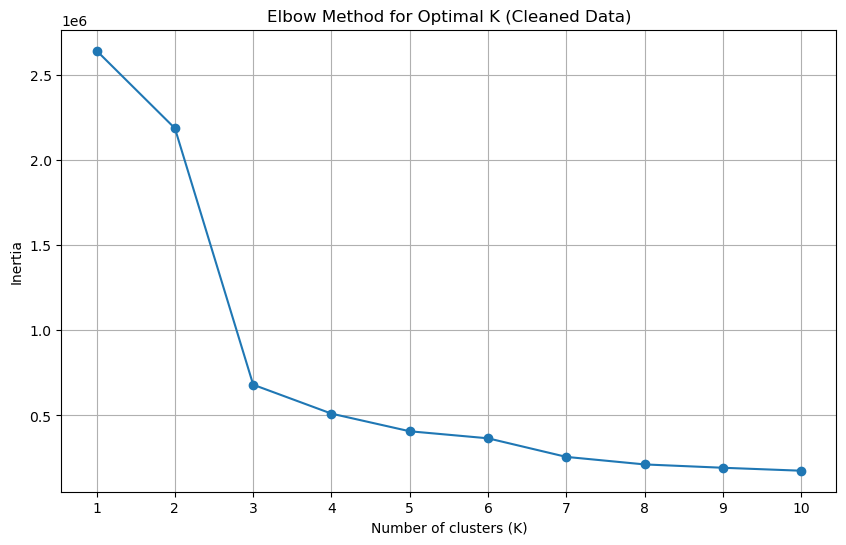

In [ ]:
# ==============================================================================
# 4. K-Means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ïã§Ìñâ Î∞è ÏµúÏ¢Ö 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú' Í∑∏Î£π Ï†ïÏùò
# ==============================================================================
OPTIMAL_K = 4 # Í∑∏ÎûòÌîÑÎ•º Î≥¥Í≥† Ïù¥ Í∞íÏùÑ Ï°∞Ï†àÌï¥Ï£ºÏÑ∏Ïöî.
print(f"\n--- Step 4: K={OPTIMAL_K}Î°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ïã§Ìñâ ---")
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init='auto')
user_stats['cluster'] = kmeans.fit_predict(X_scaled)
cluster_summary = user_stats.groupby('cluster')[features].mean().sort_values(by='friend_count', ascending=False)
print("\n--- Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† ÌäπÏÑ± ---")
display(cluster_summary)
user_stats_scaled = pd.DataFrame(X_scaled, columns=features)
user_stats_scaled['cluster'] = user_stats['cluster']
cluster_zscore_sum = user_stats_scaled.groupby('cluster')[features].mean().sum(axis=1)
influ_cluster_id = cluster_zscore_sum.idxmax()
print(f"\nÎ™®Îì† SNA ÏßÄÌëúÎ•º Ï¢ÖÌï©ÌñàÏùÑ Îïå Í∞ÄÏû• ÌôúÎèôÏ†ÅÏù∏ ÌÅ¥Îü¨Ïä§ÌÑ∞ '{influ_cluster_id}'Î•º 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú'Î°ú Ï†ïÏùòÌï©ÎãàÎã§.")
influuser_df_final_cleaned = user_stats[user_stats['cluster'] == influ_cluster_id][['user_id']]
print(f"\nÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Ï†ïÏùòÎêú 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú' Ïú†Ï†Ä Ïàò (Ï†ïÏ†ú Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò): {len(influuser_df_final_cleaned)} Î™Ö")
print("-" * 50)
display(influuser_df_final_cleaned.head())

üìà ÏúÑ Í∑∏ÎûòÌîÑÏóêÏÑú ÌåîÍøàÏπòÏ≤òÎüº Í∫æÏù¥Îäî ÏßÄÏ†êÏùò KÍ∞Ä ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÏûÖÎãàÎã§.

| cluster | friend_count | in_degree   | out_degree  | pagerank       |
|---------|--------------|-------------|-------------|----------------|
| 3       | 81.507645    | 44.243425   | 49.557798   | 1.892620e-04   |
| 0       | 77.442157    | 0.050263    | 0.000351    | 7.942621e-07   |
| 1       | 48.084468    | 19.830716   | 24.065620   | 1.018286e-04   |
| 2       | 32.465270    | 0.025905    | 0.006505    | 4.813237e-07   |

Î™®Îì† SNA ÏßÄÌëúÎ•º Ï¢ÖÌï©ÌñàÏùÑ Îïå Í∞ÄÏû• ÌôúÎèôÏ†ÅÏù∏ ÌÅ¥Îü¨Ïä§ÌÑ∞ '3.0'Î•º 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú'Î°ú Ï†ïÏùòÌï©ÎãàÎã§.

ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Ï†ïÏùòÎêú 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú' Ïú†Ï†Ä Ïàò (Ï†ïÏ†ú Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò): 1635 Î™Ö

In [ ]:
# 'ÌÅ¥Îü¨Ïä§ÌÑ∞ 3'ÏùÑ ÏÉàÎ°úÏö¥ 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú' Í∑∏Î£πÏúºÎ°ú ÏµúÏ¢Ö Ï†ïÏùòÌï©ÎãàÎã§.
influuser_df_final_cleaned = user_stats[user_stats['cluster'] == 3][['user_id']]

print("ÏÉàÎ°≠Í≤å Ï†ïÏùòÎêú 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú' Ïú†Ï†Ä Ïàò:", len(influuser_df_final_cleaned))

ÏÉàÎ°≠Í≤å Ï†ïÏùòÎêú 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú' Ïú†Ï†Ä Ïàò: 1635

### ÌïôÍ∏â ÎÇ¥ Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïù∏ÏõêÏàòÏóê Îî∞Î•∏ ÌïôÍ∏â Î∂ÑÎ•ò

In [ ]:
import pandas as pd
import numpy as np

# ==============================================================================
# ‚ú® STEP 0: Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ‚ú®
# ==============================================================================
# ÏµúÏ¢Ö 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú' Î™©Î°ùÏù¥ influuser_df_final_cleaned ÎùºÎäî Ïù¥Î¶ÑÏúºÎ°ú
# Î©îÎ™®Î¶¨Ïóê Î°úÎìúÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
influuser_df = influuser_df_final_cleaned
influ_user_ids = set(influuser_df['user_id'])

# Ïú†Ï†Ä-ÌïôÍ∏â Ï†ïÎ≥¥Í∞Ä Îã¥Í∏¥ v_user_dfÍ∞Ä Î°úÎìúÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
user_info = v_user_df[['id', 'group_id']].copy()
user_info.rename(columns={'id': 'user_id'}, inplace=True)
user_info.dropna(subset=['group_id'], inplace=True)

# ==============================================================================
# ‚ú® STEP 1: ÌïôÍ∏âÎ≥Ñ 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò' Í≥ÑÏÇ∞ ‚ú®
# ==============================================================================
print("--- Step 1: ÌïôÍ∏âÎ≥Ñ Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò Í≥ÑÏÇ∞ ÏãúÏûë ---")

influ_user_info = user_info[user_info['user_id'].isin(influ_user_ids)]
influ_counts_per_group = influ_user_info.groupby('group_id')['user_id'].nunique().reset_index(name='influ_count')

print("‚úÖ ÌïôÍ∏âÎ≥Ñ Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò Í≥ÑÏÇ∞ ÏôÑÎ£å.")
print("-" * 50)


# ==============================================================================
# ‚ú® STEP 2: 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò'Ïóê Îî∞Îùº ÏÉÅÏÑ∏ÌïòÍ≤å Í∑∏Î£π Î∂ÑÎ•ò (ÏàòÏ†ïÎêú Í∏∞Ï§Ä) ‚ú®
# ==============================================================================
print("--- Step 2: Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÏàòÏóê Îî∞Î•∏ ÏÉÅÏÑ∏ Í∑∏Î£π Î∂ÑÎ•ò ÏãúÏûë ---")

# ‚ú®‚ú®‚ú® ÌïµÏã¨ ÏàòÏ†ï Î∂ÄÎ∂Ñ ÏãúÏûë ‚ú®‚ú®‚ú®
# ÏÉÅÏÑ∏ Í∑∏Î£π Ïù¥Î¶ÑÌëúÎ•º Î∂ôÏù¥Îäî Ìï®ÏàòÎ•º ÏàòÏ†ïÌï©ÎãàÎã§.
def assign_influ_count_group_very_detailed(count):
    count = int(count)
    if count >= 12: # 12Î™Ö Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞
        return '12Î™Ö Ïù¥ÏÉÅ'
    elif count > 0: # 1Î™ÖÎ∂ÄÌÑ∞ 11Î™ÖÍπåÏßÄÎäî Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú
        return f'{count}Î™Ö'
    else:
        return '0Î™Ö'
# ‚ú®‚ú®‚ú® ÌïµÏã¨ ÏàòÏ†ï Î∂ÄÎ∂Ñ ÎÅù ‚ú®‚ú®‚ú®

influ_counts_per_group['influ_count_group'] = influ_counts_per_group['influ_count'].apply(assign_influ_count_group_very_detailed)

print("‚úÖ ÏÉÅÏÑ∏ Í∑∏Î£π Î∂ÑÎ•ò ÏôÑÎ£å.")
print("-" * 50)


# ==============================================================================
# ‚ú® STEP 3: ÏµúÏ¢Ö Í≤∞Í≥º ÌôïÏù∏ ‚ú®
# ==============================================================================
print("\n\n=============== üìä 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò' Í∑∏Î£πÎ≥Ñ ÌïôÍ∏â Ïàò ÌòÑÌô© üìä ===============")

group_distribution = influ_counts_per_group['influ_count_group'].value_counts().reset_index()
group_distribution.columns = ['influ_count_group', 'num_groups']

# Ï†ïÎ†¨ÏùÑ ÏúÑÌïú ÌÇ§ ÏÉùÏÑ±
group_distribution['sort_key'] = group_distribution['influ_count_group'].str.extract('(\d+)').astype(int)
group_distribution = group_distribution.sort_values('sort_key').drop(columns='sort_key')

display(group_distribution)

print("\n\n--- [Ï∞∏Í≥†] Î∂ÑÎ•òÎêú ÌïôÍ∏â Ï†ïÎ≥¥ ÎØ∏Î¶¨Î≥¥Í∏∞ ---")
display(influ_counts_per_group.head())

| influ_count_group | num_groups |
|-------------------|------------|
| 1Î™Ö               | 26         |
| 2Î™Ö               | 42         |
| 3Î™Ö               | 30         |
| 4Î™Ö               | 41         |
| 5Î™Ö               | 42         |
| 6Î™Ö               | 20         |
| 7Î™Ö               | 18         |
| 8Î™Ö               | 22         |
| 9Î™Ö               | 15         |
| 10Î™Ö              | 10         |
| 11Î™Ö              | 10         |
| 12Î™Ö Ïù¥ÏÉÅ         | 21         |

### ÌïôÍ∏â ÎÇ¥ Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïú†Î¨¥Ïóê Îî∞Î•∏ ÌôúÎèôÎüâ ÎπÑÍµê Î∞è tÍ≤ÄÏ†ï

In [ ]:
# ==============================================================================
# ‚ú® STEP 1: Î™®Îì† ÌïôÍ∏âÏùò 'Ï†ïÌôïÌïú' Ï¥ùÎüâ Ï†ïÎ≥¥ ÏßëÍ≥Ñ (v_group_df Î∞∞Ï†ú) ‚ú®
# ==============================================================================
print("--- Step 1: Î™®Îì† ÌïôÍ∏âÏùò Ï†ïÎ≥¥ ÏßëÍ≥Ñ ÏãúÏûë (ÏµúÏ¢Ö Î∞©Ïñ¥ Î°úÏßÅ) ---")

# --- 1-1. Í∏∞Ï¥à Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
v_user_df_clean = v_user_df.drop_duplicates(subset=['id']).copy()
v_user_df_clean.rename(columns={'id': 'user_id'}, inplace=True)
influuser_df = influuser_df_final_cleaned
influ_user_ids = set(influuser_df['user_id'])
user_info_for_merge = v_user_df_clean[['user_id', 'group_id']].dropna()

# --- 1-2. 'group_stats'Ïùò ÎºàÎåÄ ÏÉùÏÑ± (v_user_df Í∏∞Î∞ò) ---
all_group_ids = user_info_for_merge['group_id'].unique()
group_stats = pd.DataFrame({'group_id': all_group_ids})
group_size = user_info_for_merge.groupby('group_id')['user_id'].nunique().reset_index(name='group_size')
group_stats = pd.merge(group_stats, group_size, on='group_id', how='left')

# --- 1-3. ÌôúÎèôÎüâ ÏßëÍ≥Ñ (v_group_df ÏóÜÏù¥ ÏßÅÏ†ë Í≥ÑÏÇ∞) ---
# ‚ú®‚ú®‚ú® ÌïµÏã¨ ÏàòÏ†ï Î∂ÄÎ∂Ñ ÏãúÏûë ‚ú®‚ú®‚ú®
# Ï∂úÏÑù
attendance_df = v_attendance_df.copy()
# listÏôÄ strÏùÑ Î™®Îëê Ï≤òÎ¶¨ÌïòÎäî ÏïàÏ†ÑÌïú Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
def safe_len_eval(data):
    if isinstance(data, list):
        return len(data)
    if isinstance(data, str) and data.startswith('['):
        try: return len(ast.literal_eval(data))
        except (ValueError, SyntaxError): return 0
    return 0
# Î®ºÏ†Ä, Í∞Å Ïú†Ï†ÄÏùò Ï¥ù Ï∂úÏÑùÏùºÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
attendance_df['user_total_attendance'] = attendance_df['attendance_date_list'].apply(safe_len_eval)
# Í∑∏ Îã§Ïùå, Ïú†Ï†Ä-ÌïôÍ∏â Ï†ïÎ≥¥Î•º mergeÌï©ÎãàÎã§.
attendance_with_group = pd.merge(attendance_df[['user_id', 'user_total_attendance']], user_info_for_merge, on='user_id', how='inner')
# ÎßàÏßÄÎßâÏúºÎ°ú, ÌïôÍ∏âÎ≥ÑÎ°ú Î©§Î≤ÑÎì§Ïùò Ï¥ù Ï∂úÏÑùÏùºÏàòÎ•º Ìï©ÏÇ∞Ìï©ÎãàÎã§.
group_attendance = attendance_with_group.groupby('group_id')['user_total_attendance'].sum().reset_index(name='total_attendance_days')
# ‚ú®‚ú®‚ú® ÌïµÏã¨ ÏàòÏ†ï Î∂ÄÎ∂Ñ ÎÅù ‚ú®‚ú®‚ú®

# Í≤∞Ï†ú
payment_df = v_payhistory_df.copy()
payment_df['hearts_purchased'] = pd.to_numeric(payment_df['productId'].str.split('.').str[1], errors='coerce').fillna(0)
payment_with_group = pd.merge(payment_df, user_info_for_merge, on='user_id', how='inner')
group_hearts = payment_with_group.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts')
# Ìà¨Ìëú
vote_df = v_userquestionrecord_df.copy()
vote_with_group = pd.merge(vote_df, user_info_for_merge, on='user_id', how='inner')
group_votes = vote_with_group.groupby('group_id').size().reset_index(name='total_votes')

# --- 1-4. Î™®Îì† Ï†ïÎ≥¥Î•º ÌïòÎÇòÏùò 'group_stats' ÌÖåÏù¥Î∏îÎ°ú ÌÜµÌï© ---
dfs_to_merge = [group_votes, group_hearts, group_attendance]
for df in dfs_to_merge:
    group_stats = pd.merge(group_stats, df, on='group_id', how='left')
group_stats.fillna(0, inplace=True)
print("‚úÖ Î™®Îì† ÌïôÍ∏â Ï†ïÎ≥¥ ÏßëÍ≥Ñ ÏôÑÎ£å.")
print("-" * 50)

# ==============================================================================
# ‚ú® STEP 2: 'ÌôúÎèô ÌïôÍ∏â' ÌïÑÌÑ∞ÎßÅ Î∞è Í∑∏Î£π Î∂ÑÎ¶¨ ‚ú®
# ==============================================================================
print("--- Step 2: 'ÌôúÎèô ÌïôÍ∏â' ÌïÑÌÑ∞ÎßÅ Î∞è Í∑∏Î£π Î∂ÑÎ¶¨ ÏãúÏûë ---")
active_groups = group_stats[group_stats['total_votes'] > 0].copy()
influ_group_ids = set(user_info_for_merge[user_info_for_merge['user_id'].isin(influ_user_ids)]['group_id'].dropna().unique())
active_groups['is_influencer_group'] = active_groups['group_id'].apply(lambda gid: 1 if gid in influ_group_ids else 0)
influencer_groups = active_groups[active_groups['is_influencer_group'] == 1]
non_influencer_groups = active_groups[active_groups['is_influencer_group'] == 0]
print(f"ÌôúÎèô ÌïôÍ∏â Ï§ë, Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ï°¥Ïû¨ ÌïôÍ∏â Ïàò: {len(influencer_groups)}")
print(f"ÌôúÎèô ÌïôÍ∏â Ï§ë, Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÎØ∏Ï°¥Ïû¨ ÌïôÍ∏â Ïàò: {len(non_influencer_groups)}")
print("‚úÖ Í∑∏Î£π Î∂ÑÎ¶¨ ÏôÑÎ£å.")
print("-" * 50)

# ==============================================================================
# ‚ú® STEP 3 & 4: ÏµúÏ¢Ö ÏßÄÌëú ÎπÑÍµê, ÌÜµÍ≥Ñ Í≤ÄÏ¶ù, Í≤∞Í≥º Ï∂úÎ†• ‚ú®
# ==============================================================================
print("--- Step 3: ÏµúÏ¢Ö ÏßÄÌëú ÎπÑÍµê Î∞è ÌÜµÍ≥Ñ Í≤ÄÏ¶ù ÏãúÏûë ---")
metrics_to_compare = ['total_attendance_days', 'total_votes', 'total_hearts']
influ_avg = influencer_groups[metrics_to_compare].mean()
non_influ_avg = non_influencer_groups[metrics_to_compare].mean()
summary_table = pd.DataFrame({'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ï°¥Ïû¨ ÌïôÍ∏â': influ_avg, 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÎØ∏Ï°¥Ïû¨ ÌïôÍ∏â': non_influ_avg})
summary_table.rename(index={'total_attendance_days': 'ÌïôÍ∏âÎãπ Ï¥ù Ï∂úÏÑùÏùºÏàò', 'total_votes': 'ÌïôÍ∏âÎãπ Ï¥ù Ìà¨Ìëú Í±¥Ïàò', 'total_hearts': 'ÌïôÍ∏âÎãπ Ï¥ù Íµ¨Îß§ ÌïòÌä∏'}, inplace=True)
test_results = []
for metric in metrics_to_compare:
    group1_data = influencer_groups[metric]
    group2_data = non_influencer_groups[metric]
    t_stat, p_val = ttest_ind(group1_data, group2_data, equal_var=False, nan_policy='omit')
    test_results.append({'ÏßÄÌëú': summary_table.index[metrics_to_compare.index(metric)], 'p-value': p_val, 'Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ (p < 0.05)': 'YES' if p_val < 0.05 else 'NO'})
test_results_df = pd.DataFrame(test_results)
print("\n\n=============== üìä 'ÌôúÎèô ÌïôÍ∏â' ÎÇ¥ Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïú†/Î¨¥ ÎπÑÍµê Î∂ÑÏÑù (ÏµúÏ¢Ö Î∞©Ïñ¥ ÏΩîÎìú) üìä ===============")
print("\n--- [A] Ï£ºÏöî ÏßÄÌëú ÌèâÍ∑† ÎπÑÍµê ---")
display(summary_table.round(2))
print("\n--- [B] ÌèâÍ∑† Ï∞®Ïù¥ ÌÜµÍ≥Ñ Í≤ÄÏ¶ù Í≤∞Í≥º ---")
display(test_results_df)

Ï£ºÏöî ÏßÄÌëú ÌèâÍ∑† ÎπÑÍµê

| Ìï≠Î™©                 | Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ï°¥Ïû¨ ÌïôÍ∏â | Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÎØ∏Ï°¥Ïû¨ ÌïôÍ∏â |
|----------------------|-----------------------|--------------------------|
| ÌïôÍ∏âÎãπ Ï¥ù Ï∂úÏÑùÏùºÏàò     | 404.51                | 101.37                   |
| ÌïôÍ∏âÎãπ Ï¥ù Ìà¨Ìëú Í±¥Ïàò     | 3,975.50              | 708.37                   |
| ÌïôÍ∏âÎãπ Ï¥ù Íµ¨Îß§ ÌïòÌä∏     | 1,571.97              | 252.38                   |


ÌèâÍ∑† Ï∞®Ïù¥ ÌÜµÍ≥Ñ Í≤ÄÏ¶ù Í≤∞Í≥º

| ÏßÄÌëú               | p-value           | Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ (p < 0.05) |
|--------------------|-------------------|---------------------------|
| ÌïôÍ∏âÎãπ Ï¥ù Ï∂úÏÑùÏùºÏàò   | 2.969084e-28      | YES                       |
| ÌïôÍ∏âÎãπ Ï¥ù Ìà¨Ìëú Í±¥Ïàò   | 3.821261e-40      | YES                       |
| ÌïôÍ∏âÎãπ Ï¥ù Íµ¨Îß§ ÌïòÌä∏   | 2.069003e-16      | YES                       |

### Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Î∞ÄÎèÑÎ≥Ñ Ïª§ÎÆ§ÎãàÌã∞ ÌôúÎèôÎüâ Î∂ÑÏÑù

In [ ]:
# ==============================================================================
# ‚ú® STEP 0: Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú Î™®Îì† Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ‚ú®
# ==============================================================================
print("--- Step 0: Î∂ÑÏÑùÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏãúÏûë ---")
# ÏµúÏ¢Ö 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú' Î™©Î°ù
influuser_df = influuser_df_final_cleaned
influ_user_ids = set(influuser_df['user_id'])

# Ïú†Ï†Ä Ï†ïÎ≥¥ (Ï§ëÎ≥µ Ï†úÍ±∞Îêú Íπ®ÎÅóÌïú Î≤ÑÏ†Ñ ÏÇ¨Ïö©)
v_user_df_clean = v_user_df.drop_duplicates(subset=['id']).copy()
v_user_df_clean.rename(columns={'id': 'user_id'}, inplace=True)
user_info = v_user_df_clean[['user_id', 'group_id', 'created_at']].copy()
user_info['creation_date'] = pd.to_datetime(user_info['created_at'], errors='coerce').dt.date
user_info.dropna(subset=['group_id', 'creation_date'], inplace=True)
user_info['is_influencer'] = user_info['user_id'].isin(influ_user_ids)

# ÌôúÎèô Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
attendance_df = v_attendance_df.copy()
def safe_literal_eval(val):
    if isinstance(val, str):
        try: return ast.literal_eval(val)
        except (ValueError, SyntaxError): return []
    elif isinstance(val, list): return val
    return []
attendance_df['attendance_date_list'] = attendance_df['attendance_date_list'].apply(safe_literal_eval)
exploded_attendance = attendance_df.explode('attendance_date_list').rename(columns={'attendance_date_list': 'activity_date'})
exploded_attendance['activity_date'] = pd.to_datetime(exploded_attendance['activity_date'], errors='coerce').dt.date
payment_df = v_payhistory_df.copy()
payment_df['activity_date'] = pd.to_datetime(payment_df['created_at'], errors='coerce') # ÌÉÄÏûÑÏ°¥ Ï†úÍ±∞Î•º ÏúÑÌï¥ utc=True, tz_convert(None) ÏÉùÎûµ
payment_df['hearts_purchased'] = pd.to_numeric(payment_df['productId'].str.split('.').str[1], errors='coerce').fillna(0)
vote_df = v_userquestionrecord_df.copy()
vote_df['activity_date'] = pd.to_datetime(vote_df['created_at'], errors='coerce') # ÌÉÄÏûÑÏ°¥ Ï†úÍ±∞Î•º ÏúÑÌï¥ utc=True, tz_convert(None) ÏÉùÎûµ
print("‚úÖ Î∂ÑÏÑùÏö© Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å.")
print("-" * 60)


# ==============================================================================
# ‚ú® STEP 1: 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÌïôÍ∏â' Îã®ÏúÑ ÌôúÎèô Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ (Ïò§Î•ò ÏàòÏ†ï) ‚ú®
# ==============================================================================
print("--- Step 1: 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÌïôÍ∏â' Îã®ÏúÑ ÌôúÎèô Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ ÏãúÏûë ---")
# 1-1. Î∂ÑÏÑù ÎåÄÏÉÅ ÌïôÍ∏â Î∞è 'ÏµúÏ¥à Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû•Ïùº' Ï†ïÏùò
influ_user_info = user_info[user_info['is_influencer']].copy()
first_influ_appearance = influ_user_info.groupby('group_id')['creation_date'].min().reset_index(name='influ_start_date')
target_group_ids = set(first_influ_appearance['group_id'])

# 1-2. ÌïôÍ∏â ÏÉùÏÑ±Ïùº Î∞è Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò Ï†ïÎ≥¥
group_creators = user_info.sort_values('creation_date').drop_duplicates(subset=['group_id'], keep='first')[['group_id', 'user_id']].rename(columns={'user_id': 'creator_id'})
group_creator_dates = user_info.drop_duplicates(subset=['user_id']).set_index('user_id')['creation_date']
group_creators['group_creation_date'] = group_creators['creator_id'].map(group_creator_dates)
influ_counts_per_group = influ_user_info.groupby('group_id')['user_id'].nunique().reset_index(name='influ_count')

# 1-3. 'group_analysis_df' ÎºàÎåÄ ÏÉùÏÑ±
group_analysis_df = pd.merge(first_influ_appearance, group_creators, on='group_id', how='left')
group_analysis_df = pd.merge(group_analysis_df, influ_counts_per_group, on='group_id', how='left')
group_analysis_df.dropna(subset=['group_creation_date'], inplace=True)

# 1-4. ÏùºÎ∞ò Î©§Î≤Ñ / Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Î©§Î≤Ñ ÌôúÎèô Î∂ÑÎ¶¨ Î∞è ÏßëÍ≥Ñ
all_members = user_info[user_info['group_id'].isin(target_group_ids)]
general_members = all_members[~all_members['is_influencer']]
general_members_with_date = pd.merge(general_members, first_influ_appearance, on='group_id')
general_members_with_date['influ_start_date'] = pd.to_datetime(general_members_with_date['influ_start_date'])
general_members_with_date['creation_date'] = pd.to_datetime(general_members_with_date['creation_date'])

members_before = general_members_with_date[general_members_with_date['creation_date'] < general_members_with_date['influ_start_date']]
members_after = general_members_with_date[general_members_with_date['creation_date'] >= general_members_with_date['influ_start_date']]

exploded_attendance['activity_date'] = pd.to_datetime(exploded_attendance['activity_date'])
attendance_with_members = pd.merge(exploded_attendance, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
attendance_before = attendance_with_members[attendance_with_members['activity_date'].dt.date < attendance_with_members['influ_start_date'].dt.date]
attendance_after = attendance_with_members[attendance_with_members['activity_date'].dt.date >= attendance_with_members['influ_start_date'].dt.date]
payments_with_members = pd.merge(payment_df, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
payments_before = payments_with_members[payments_with_members['activity_date'].dt.date < payments_with_members['influ_start_date'].dt.date]
payments_after = payments_with_members[payments_with_members['activity_date'].dt.date >= payments_with_members['influ_start_date'].dt.date]
votes_with_members = pd.merge(vote_df, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
votes_before = votes_with_members[votes_with_members['activity_date'].dt.date < votes_with_members['influ_start_date'].dt.date]
votes_after = votes_with_members[votes_with_members['activity_date'].dt.date >= votes_with_members['influ_start_date'].dt.date]

# ‚ú®‚ú®‚ú® ÌïµÏã¨ ÏàòÏ†ï: Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÌôúÎèôÎüâÎèÑ 'Îì±Ïû• Ï†Ñ/ÌõÑ'Î°ú ÎÇòÎàïÎãàÎã§. ‚ú®‚ú®‚ú®
influ_user_info_with_date = pd.merge(influ_user_info, first_influ_appearance, on='group_id')
influ_user_info_with_date['influ_start_date'] = pd.to_datetime(influ_user_info_with_date['influ_start_date'])
influ_user_info_with_date['creation_date'] = pd.to_datetime(influ_user_info_with_date['creation_date'])
influ_attendance_with_date = pd.merge(exploded_attendance, influ_user_info_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id')
influ_attendance_after = influ_attendance_with_date[influ_attendance_with_date['activity_date'].dt.date >= influ_attendance_with_date['influ_start_date'].dt.date]
influ_payments_with_date = pd.merge(payment_df, influ_user_info_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id')
influ_payments_after = influ_payments_with_date[influ_payments_with_date['activity_date'].dt.date >= influ_payments_with_date['influ_start_date'].dt.date]
influ_votes_with_date = pd.merge(vote_df, influ_user_info_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id')
influ_votes_after = influ_votes_with_date[influ_votes_with_date['activity_date'].dt.date >= influ_votes_with_date['influ_start_date'].dt.date]

# 1-5. Î™®Îì† ÏßëÍ≥Ñ Ï†ïÎ≥¥Î•º 'group_analysis_df'Ïóê ÌÜµÌï© (ÏàòÏ†ïÎêú Î¶¨Ïä§Ìä∏ ÏÇ¨Ïö©)
df_list_to_merge = [
    members_before.groupby('group_id')['user_id'].nunique().reset_index(name='total_members_before'),
    members_after.groupby('group_id')['user_id'].nunique().reset_index(name='total_members_after'),
    attendance_before.groupby('group_id').size().reset_index(name='total_attendance_before'),
    attendance_after.groupby('group_id').size().reset_index(name='total_attendance_after_gen'), # ÏùºÎ∞ò Î©§Î≤Ñ
    payments_before.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_before'),
    payments_after.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_after_gen'), # ÏùºÎ∞ò Î©§Î≤Ñ
    votes_before.groupby('group_id').size().reset_index(name='total_votes_before'),
    votes_after.groupby('group_id').size().reset_index(name='total_votes_after_gen'), # ÏùºÎ∞ò Î©§Î≤Ñ
    influ_attendance_after.groupby('group_id').size().reset_index(name='total_attendance_after_influ'), # Ïù∏ÌîåÎ£®Ïñ∏ÏÑú
    influ_payments_after.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_after_influ'), # Ïù∏ÌîåÎ£®Ïñ∏ÏÑú
    influ_votes_after.groupby('group_id').size().reset_index(name='total_votes_after_influ'), # Ïù∏ÌîåÎ£®Ïñ∏ÏÑú
]
for agg_df in df_list_to_merge:
    group_analysis_df = pd.merge(group_analysis_df, agg_df, on='group_id', how='left')
group_analysis_df.fillna(0, inplace=True)

# ‚ú®‚ú®‚ú® ÌïµÏã¨ ÏàòÏ†ï: ÏùºÎ∞ò Î©§Î≤ÑÏôÄ Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÌôúÎèôÎüâÏùÑ Ìï©ÏÇ∞ÌïòÏó¨ ÏßÑÏßú 'Îì±Ïû• ÌõÑ' Ï¥ùÎüâÏùÑ ÎßåÎì≠ÎãàÎã§.
group_analysis_df['total_attendance_after'] = group_analysis_df['total_attendance_after_gen'] + group_analysis_df['total_attendance_after_influ']
group_analysis_df['total_hearts_after'] = group_analysis_df['total_hearts_after_gen'] + group_analysis_df['total_hearts_after_influ']
group_analysis_df['total_votes_after'] = group_analysis_df['total_votes_after_gen'] + group_analysis_df['total_votes_after_influ']

print("‚úÖ 'ÌïôÍ∏â Îã®ÏúÑ' ÌôúÎèô Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ ÏôÑÎ£å.")
print("-" * 60)

# ==============================================================================
# ‚ú® STEP 2: "ÌÅºÏßÅÌïú" ÏßÄÌëúÎì§Î°ú Í∑∏Î£πÌïë Î∞è ÏµúÏ¢Ö Í≤∞Í≥º ÏÉùÏÑ± ‚ú®
# ==============================================================================
print("--- Step 2: ÏµúÏ¢Ö ÏßÄÌëú Í≥ÑÏÇ∞ Î∞è Í∑∏Î£πÌïë ÏãúÏûë ---")
df = group_analysis_df.copy()
df['days_to_influ_arrival'] = (pd.to_datetime(df['influ_start_date']) - pd.to_datetime(df['group_creation_date'])).dt.days
df['influ_count_numeric'] = np.where(df['influ_count'] >= 11, 11, df['influ_count'])

# ‚ú®‚ú®‚ú® ÌïµÏã¨ ÏàòÏ†ï: Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÌôúÎèôÎüâ Ïª¨ÎüºÏùÑ Ï∂îÍ∞ÄÌïòÍ≥†, ÏùºÎ∞ò Î©§Î≤Ñ ÌôúÎèôÎüâÏùÄ Ïù¥Î¶ÑÏóêÏÑú _gen Ï†úÍ±∞ ‚ú®‚ú®‚ú®
cols_to_agg = {
    'total_members_before': 'ÌèâÍ∑† Ï¥ù ÏùºÎ∞ò Î©§Î≤Ñ Ïàò (Îì±Ïû• Ï†Ñ)',
    'total_members_after': 'ÌèâÍ∑† Ï¥ù ÏùºÎ∞ò Î©§Î≤Ñ Ïàò (Îì±Ïû• ÌõÑ)',
    'total_attendance_before': 'ÌèâÍ∑† Ï¥ù Ï∂úÏÑùÏùºÏàò (Îì±Ïû• Ï†Ñ)',
    'total_attendance_after': 'ÌèâÍ∑† Ï¥ù Ï∂úÏÑùÏùºÏàò (Îì±Ïû• ÌõÑ)', # Ïù¥Ï†ú Ïù¥Í≤ÉÏù¥ ÏßÑÏßú Ï¥ùÎüâ
    'total_hearts_before': 'ÌèâÍ∑† Ï¥ù Íµ¨Îß§ ÌïòÌä∏ (Îì±Ïû• Ï†Ñ)',
    'total_hearts_after': 'ÌèâÍ∑† Ï¥ù Íµ¨Îß§ ÌïòÌä∏ (Îì±Ïû• ÌõÑ)', # Ïù¥Ï†ú Ïù¥Í≤ÉÏù¥ ÏßÑÏßú Ï¥ùÎüâ
    'total_votes_before': 'ÌèâÍ∑† Ï¥ù Ìà¨ÌëúÏàò (Îì±Ïû• Ï†Ñ)',
    'total_votes_after': 'ÌèâÍ∑† Ï¥ù Ìà¨ÌëúÏàò (Îì±Ïû• ÌõÑ)', # Ïù¥Ï†ú Ïù¥Í≤ÉÏù¥ ÏßÑÏßú Ï¥ùÎüâ
    'total_attendance_after_influ': 'ÌèâÍ∑† Ï¥ù Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ï∂úÏÑùÏùºÏàò (Îì±Ïû• ÌõÑ)', # Ïù¥Î¶Ñ Î™ÖÌôïÌôî
    'total_hearts_after_influ': 'ÌèâÍ∑† Ï¥ù Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Íµ¨Îß§ ÌïòÌä∏ (Îì±Ïû• ÌõÑ)', # Ïù¥Î¶Ñ Î™ÖÌôïÌôî
    'days_to_influ_arrival': 'ÌèâÍ∑† Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• ÏÜåÏöî ÏãúÍ∞Ñ'
}
final_summary_df = df[df['influ_count'] > 0].groupby('influ_count_numeric')[list(cols_to_agg.keys())].mean()
final_summary_df.rename(columns=cols_to_agg, inplace=True)
def assign_influ_count_group_final(count):
    if count >= 11: return '11Î™Ö Ïù¥ÏÉÅ'
    return f'{int(count)}Î™Ö'
final_summary_df.index = final_summary_df.index.map(assign_influ_count_group_final)
final_summary_df.index.name = 'influ_count_group'
print("‚úÖ ÏµúÏ¢Ö ÏßÄÌëú Í≥ÑÏÇ∞ Î∞è Í∑∏Î£πÌïë ÏôÑÎ£å.")
print("-" * 60)

# ==============================================================================
# ‚ú® STEP 3: ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†• ‚ú®
# ==============================================================================
print("\n\n=============== üìä Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Î∞ÄÎèÑÎ≥Ñ Ïª§ÎÆ§ÎãàÌã∞ Ï¥ùÎüâ Î∂ÑÏÑù (Ïò§Î•ò ÏàòÏ†ï) üìä ===============")
display(final_summary_df.T.style.format('{:,.2f}'))

Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Î∞ÄÎèÑÎ≥Ñ Ïª§ÎÆ§ÎãàÌã∞ Ï¥ùÎüâ Î∂ÑÏÑù (Ïò§Î•ò ÏàòÏ†ï)

| ÏßÄÌëú                             | 1Î™Ö   | 2Î™Ö   | 3Î™Ö   | 4Î™Ö   | 5Î™Ö   | 6Î™Ö   | 7Î™Ö   | 8Î™Ö   | 9Î™Ö   | 10Î™Ö  | 11Î™Ö Ïù¥ÏÉÅ |
|----------------------------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|------------|
| ÌèâÍ∑† Ï¥ù ÏùºÎ∞ò Î©§Î≤Ñ Ïàò (Îì±Ïû• Ï†Ñ)        | 1.92  | 1.45  | 0.90  | 0.44  | 0.45  | 0.10  | 0.39  | 0.14  | 0.07  | 0.10  | 0.13       |
| ÌèâÍ∑† Ï¥ù ÏùºÎ∞ò Î©§Î≤Ñ Ïàò (Îì±Ïû• ÌõÑ)        | 8.58  | 11.07 | 10.07 | 11.17 | 10.40 | 9.65  | 10.06 | 9.27  | 9.13  | 7.40  | 8.84       |
| ÌèâÍ∑† Ï¥ù Ï∂úÏÑùÏùºÏàò (Îì±Ïû• Ï†Ñ)           | 6.54  | 6.71  | 1.20  | 0.73  | 0.48  | 0.10  | 0.61  | 0.14  | 0.07  | 0.10  | 0.16       |
| ÌèâÍ∑† Ï¥ù Ï∂úÏÑùÏùºÏàò (Îì±Ïû• ÌõÑ)           | 247.00| 361.00| 351.23| 401.78| 369.55| 395.70| 456.56| 445.77| 477.93| 409.10| 589.19     |
| ÌèâÍ∑† Ï¥ù Íµ¨Îß§ ÌïòÌä∏ (Îì±Ïû• Ï†Ñ)          | 0.00  | 0.00  | 0.00  | 0.00  | 18.50 | 0.00  | 0.00  | 0.00  | 0.00  | 0.00  | 0.00       |
| ÌèâÍ∑† Ï¥ù Íµ¨Îß§ ÌïòÌä∏ (Îì±Ïû• ÌõÑ)          | 633.77| 1,071.86| 1,021.37| 839.46| 1,457.79| 1,645.85| 1,708.67| 2,005.73| 3,285.80| 3,857.90| 2,666.19 |
| ÌèâÍ∑† Ï¥ù Ìà¨ÌëúÏàò (Îì±Ïû• Ï†Ñ)            | 82.23 | 102.64| 5.10  | 9.07  | 0.79  | 0.00  | 2.56  | 0.00  | 0.00  | 0.00  | 0.00       |
| ÌèâÍ∑† Ï¥ù Ìà¨ÌëúÏàò (Îì±Ïû• ÌõÑ)            | 1,940.62 | 3,067.57 | 2,887.80 | 3,743.88 | 3,580.17 | 3,938.25 | 4,882.06 | 4,311.00 | 5,554.73 | 5,378.30 | 6,622.19 |
| ÌèâÍ∑† Ï¥ù Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ï∂úÏÑùÏùºÏàò (Îì±Ïû• ÌõÑ) | 30.00 | 63.12 | 90.50 | 120.17| 144.57| 179.90| 201.94| 229.50| 272.40| 249.70| 384.45     |
| ÌèâÍ∑† Ï¥ù Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Íµ¨Îß§ ÌïòÌä∏ (Îì±Ïû• ÌõÑ)| 29.88 | 239.57| 110.27| 219.34| 593.26| 636.20| 969.72| 1,195.18| 1,830.33| 2,378.60| 1,818.00  |
| ÌèâÍ∑† Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• ÏÜåÏöî ÏãúÍ∞Ñ       | 2.58  | 1.74  | 1.23  | 1.05  | 1.21  | 0.60  | 1.11  | 0.18  | 0.07  | 0.50  | 0.48       |

#### Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• Ï†Ñ Í≤∞Ï†úÍ±¥ ÌôïÏù∏

In [ ]:
# ==============================================================================
# ‚ú® STEP 0: Í≤ÄÏ¶ùÏóê ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Ï†ÑÏ†úÏ°∞Í±¥ ÏûêÎèô ÏÉùÏÑ±) ‚ú®
# ==============================================================================
print("--- Step 0: Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏãúÏûë ---")
# ÏµúÏ¢Ö 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú' Î™©Î°ù
influuser_df = influuser_df_final_cleaned
influ_user_ids = set(influuser_df['user_id'])
# Ïú†Ï†Ä Ï†ïÎ≥¥
user_info = v_user_df[['id', 'group_id', 'created_at']].copy().rename(columns={'id': 'user_id'})
user_info['creation_date'] = pd.to_datetime(user_info['created_at'], errors='coerce').dt.date
user_info.dropna(subset=['group_id', 'creation_date'], inplace=True)
# Í≤∞Ï†ú Ï†ïÎ≥¥
payment_df = v_payhistory_df.copy()
payment_df['activity_date'] = pd.to_datetime(payment_df['created_at'], errors='coerce').dt.date
payment_df['hearts_purchased'] = pd.to_numeric(payment_df['productId'].str.split('.').str[1], errors='coerce').fillna(0)
# Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÌïôÍ∏â Ï†ïÎ≥¥
influ_user_info = user_info[user_info['user_id'].isin(influ_user_ids)]
first_influ_appearance = influ_user_info.groupby('group_id')['creation_date'].min().reset_index(name='influ_start_date')
target_group_ids = set(first_influ_appearance['group_id'])
# ÏùºÎ∞ò Î©§Î≤Ñ Ï†ïÎ≥¥
all_members = user_info[user_info['group_id'].isin(target_group_ids)]
general_members = all_members[~all_members['user_id'].isin(influ_user_ids)]
general_members_with_date = pd.merge(general_members, first_influ_appearance, on='group_id')

# ‚ú®‚ú®‚ú® ÌïµÏã¨ ÏàòÏ†ï Î∂ÄÎ∂Ñ: payments_beforeÎ•º Ï†úÎåÄÎ°ú ÏÉùÏÑ± ‚ú®‚ú®‚ú®
# mergeÌï† Îïå 'group_id'Î•º Ìè¨Ìï®ÏãúÌÇµÎãàÎã§.
payments_with_members = pd.merge(payment_df, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
payments_before = payments_with_members[payments_with_members['activity_date'] < payments_with_members['influ_start_date']]
# ‚ú®‚ú®‚ú® ÌïµÏã¨ ÏàòÏ†ï Î∂ÄÎ∂Ñ ÎÅù ‚ú®‚ú®‚ú®
print("‚úÖ Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å.")
print("-" * 50)

# ==============================================================================
# ‚ú® Í≤ÄÏ¶ù: 'payments_before' ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏßÅÏ†ë Î∂ÑÏÑù ‚ú®
# ==============================================================================
print("--- [Í≤ÄÏ¶ù] 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• Ï†Ñ' Í≤∞Ï†ú Í∏∞Î°ù ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ---")

# ÌïôÍ∏âÎ≥Ñ Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò Í≥ÑÏÇ∞ (Ïù¥Ï†Ñ ÏΩîÎìú Ïû¨ÌôúÏö©)
influ_counts_per_group = influ_user_info.groupby('group_id')['user_id'].nunique().reset_index(name='influ_count')

# 'Îì±Ïû• Ï†Ñ' Í≤∞Ï†ú Í∏∞Î°ùÏóê, Ìï¥Îãπ Í≤∞Ï†úÍ∞Ä ÏùºÏñ¥ÎÇú ÌïôÍ∏âÏùò 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò'Î•º Î∂ôÏûÖÎãàÎã§.
# Ïù¥Ï†ú payments_beforeÏóê 'group_id'Í∞Ä ÏûàÏúºÎØÄÎ°ú, Ïù¥ mergeÎäî Ï†ïÏÉÅ ÏûëÎèôÌï©ÎãàÎã§.
payments_before_final = pd.merge(payments_before,
                                 influ_counts_per_group[['group_id', 'influ_count']],
                                 on='group_id', how='left')
payments_before_final.dropna(subset=['influ_count'], inplace=True)
payments_before_final['influ_count'] = payments_before_final['influ_count'].astype(int)

if not payments_before_final.empty:
    pre_payment_distribution = payments_before_final['influ_count'].value_counts().reset_index()
    pre_payment_distribution.columns = ['influ_count', 'num_pre_payments']
    pre_payment_distribution = pre_payment_distribution.sort_values('influ_count')
    print("\n--- 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò' Í∑∏Î£πÎ≥Ñ, 'Îì±Ïû• Ï†Ñ' Í≤∞Ï†ú Î∞úÏÉù Í±¥Ïàò ---")
    display(pre_payment_distribution)
else:
    print("\n'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• Ï†Ñ'Ïóê Î∞úÏÉùÌïú Í≤∞Ï†ú Í∏∞Î°ùÏù¥ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïóê Ìïú Í±¥ÎèÑ ÏóÜÏäµÎãàÎã§.")
# (Ïù¥Ìïò Í≤∞Î°† Ï∂úÎ†•ÏùÄ Ïù¥Ï†ÑÍ≥º ÎèôÏùº)

# ==============================================================================
# ‚ú® ÏµúÏ¢Ö Í≤∞Î°† ‚ú®
# ==============================================================================
print("\n\n--- [ÏµúÏ¢Ö ÌåêÎã®] ---")
if not payments_before_final.empty and all(pre_payment_distribution['influ_count'] == 5):
    print("Í≤∞Î°†: Îç∞Ïù¥ÌÑ∞Í∞Ä ÏõêÎûò Í∑∏Î†áÏäµÎãàÎã§.")
    print("-> 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• Ï†Ñ'Ïóê Í≤∞Ï†úÍ∞Ä Î∞úÏÉùÌïú Ïú†ÏùºÌïú ÏÇ¨Î°ÄÎäî,")
    print("   ÎÇòÏ§ëÏóê ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú 5Î™Ö Í∑∏Î£π'Ïù¥ Îêú ÌïôÍ∏âÏóêÏÑúÎßå ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.")
    print("   ÎãπÏã†Ïùò ÏΩîÎìúÎäî Ïù¥ Îç∞Ïù¥ÌÑ∞Ï†Å ÏÇ¨Ïã§ÏùÑ Ï†ïÌôïÌïòÍ≤å Î∞òÏòÅÌïú Í≤ÉÏûÖÎãàÎã§.")
elif not payments_before_final.empty:
    print("Í≤∞Î°†: ÎãπÏã†Ïùò ÏΩîÎìúÏóê Ïò§Î•òÍ∞Ä ÏûàÏóàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.")
    print("-> ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Îãà, '5Î™Ö Í∑∏Î£π' Ïô∏Ïóê Îã§Î•∏ Í∑∏Î£πÏóêÏÑúÎèÑ 'Îì±Ïû• Ï†Ñ' Í≤∞Ï†úÍ∞Ä ÏûàÏóàÏäµÎãàÎã§.")
    print("   ÌïòÏßÄÎßå ÏµúÏ¢Ö Í≤∞Í≥ºÌëúÏóêÎäî Ïù¥Í≤ÉÏù¥ ÎàÑÎùΩÎêòÏóàÏäµÎãàÎã§. ÏßëÍ≥Ñ Í≥ºÏ†ïÏùò `merge`ÎÇò `fillna` Î°úÏßÅÏùÑ Îã§Ïãú Ï†êÍ≤ÄÌï¥Ïïº Ìï©ÎãàÎã§.")
else:
    print("Í≤∞Î°†: Îç∞Ïù¥ÌÑ∞Í∞Ä ÏõêÎûò Í∑∏Î†áÏäµÎãàÎã§.")
    print("-> ÌôïÏù∏ Í≤∞Í≥º, 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• Ï†Ñ'Ïóê Î∞úÏÉùÌïú Í≤∞Ï†úÎäî Îã® Ìïú Í±¥ÎèÑ ÏóÜÏóàÏäµÎãàÎã§.")
    print("   (Ïù¥Ï†Ñ ÏßÑÎã® Í≤∞Í≥º, 'Îì±Ïû• Ï†Ñ Í≤∞Ï†ú 1Í±¥'ÏùÄ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Í≥ºÏ†ïÏùò Ïò§Î•òÏòÄÏùÑ Ïàò ÏûàÏäµÎãàÎã§.)")

--- Step 0: Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏãúÏûë ---

‚úÖ Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å.

--------------------------------------------------

--- [Í≤ÄÏ¶ù] 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• Ï†Ñ' Í≤∞Ï†ú Í∏∞Î°ù ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ---

--- 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò' Í∑∏Î£πÎ≥Ñ, 'Îì±Ïû• Ï†Ñ' Í≤∞Ï†ú Î∞úÏÉù Í±¥Ïàò ---

|     | influ_count | num_pre_payments |
|-------|-------------|------------------|
| 0     | 5           | 1                |



--- [ÏµúÏ¢Ö ÌåêÎã®] ---

Í≤∞Î°†: Îç∞Ïù¥ÌÑ∞Í∞Ä ÏõêÎûò Í∑∏Î†áÏäµÎãàÎã§.

-> 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• Ï†Ñ'Ïóê Í≤∞Ï†úÍ∞Ä Î∞úÏÉùÌïú Ïú†ÏùºÌïú ÏÇ¨Î°ÄÎäî,

   ÎÇòÏ§ëÏóê ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú 5Î™Ö Í∑∏Î£π'Ïù¥ Îêú ÌïôÍ∏âÏóêÏÑúÎßå ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.

   ÎãπÏã†Ïùò ÏΩîÎìúÎäî Ïù¥ Îç∞Ïù¥ÌÑ∞Ï†Å ÏÇ¨Ïã§ÏùÑ Ï†ïÌôïÌïòÍ≤å Î∞òÏòÅÌïú Í≤ÉÏûÖÎãàÎã§.

#### Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• Ï†Ñ Ìà¨ÌëúÏàò ÌôïÏù∏

In [ ]:
# 'days_to_influ_arrival' Ïª¨Îüº Ï∂îÍ∞Ä ÏΩîÎìú (ÌïÑÏöîÌïú Í≤ΩÏö∞ Î®ºÏ†Ä Ïã§Ìñâ)
group_analysis_df['days_to_influ_arrival'] = (pd.to_datetime(group_analysis_df['influ_start_date']) - pd.to_datetime(group_analysis_df['group_creation_date'])).dt.days

# ==============================================================================
# ‚ú® STEP 0: ÌïÑÏöîÌïú Î™®Îì† Îç∞Ïù¥ÌÑ∞Í∞Ä Î©îÎ™®Î¶¨Ïóê ÏûàÎã§Í≥† Í∞ÄÏ†ï ‚ú®
# ==============================================================================
# - group_analysis_df: ÎãπÏã†Ïù¥ Î≥¥Ïó¨Ï§Ä, ÌïôÍ∏âÎ≥Ñ Ï¥ùÎüâ ÏßÄÌëú ÌÖåÏù¥Î∏î
# - user_info: 'user_id', 'group_id', 'creation_date' Îì±Ïù¥ ÏûàÎäî ÌÖåÏù¥Î∏î
# - influ_user_info: 'user_info'ÏóêÏÑú Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÎßå ÌïÑÌÑ∞ÎßÅÌïú ÌÖåÏù¥Î∏î

# ==============================================================================
# ‚ú® STEP 1: 'Ï∞ΩÏãúÏûê=Ïù∏ÌîåÎ£®Ïñ∏ÏÑú' Ï†ïÎ≥¥ ÏÉùÏÑ± Î∞è Î≥ëÌï© ‚ú®
# ==============================================================================
print("--- Step 1: 'Ï∞ΩÏãúÏûê=Ïù∏ÌîåÎ£®Ïñ∏ÏÑú' Ï†ïÎ≥¥ ÏÉùÏÑ± Î∞è Î≥ëÌï© ÏãúÏûë ---")

# 1-1. Í∞Å ÌïôÍ∏âÏùò 'ÏµúÏ¥à Ïù∏ÌîåÎ£®Ïñ∏ÏÑú'Í∞Ä ÎàÑÍµ¨Ïù∏ÏßÄ Ï∞æÏäµÎãàÎã§.
pioneer_influencers = influ_user_info.sort_values('creation_date').drop_duplicates(subset=['group_id'], keep='first')
pioneer_influencers = pioneer_influencers[['group_id', 'user_id']].rename(columns={'user_id': 'pioneer_id'})

# 1-2. ÎãπÏã†Ïù¥ Í∞ÄÏßÑ group_analysis_dfÏóê 'ÏµúÏ¥à Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ID'Î•º Î∂ôÏûÖÎãàÎã§.
df_for_mystery = pd.merge(group_analysis_df, pioneer_influencers, on='group_id', how='left')

# 1-3. 'Ï∞ΩÏãúÏûê ID'ÏôÄ 'ÏµúÏ¥à Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ID'Í∞Ä Í∞ôÏùÄÏßÄ ÎπÑÍµêÌïòÏó¨, 'Ï∞ΩÏãúÏûê=Ïù∏ÌîåÎ£®Ïñ∏ÏÑú' Ïó¨Î∂ÄÎ•º ÌôïÏù∏Ìï©ÎãàÎã§.
df_for_mystery['is_creator_the_pioneer'] = (df_for_mystery['creator_id'] == df_for_mystery['pioneer_id'])

print("‚úÖ 'Ï∞ΩÏãúÏûê=Ïù∏ÌîåÎ£®Ïñ∏ÏÑú' Ï†ïÎ≥¥ ÏÉùÏÑ± Î∞è Î≥ëÌï© ÏôÑÎ£å.")
print("-" * 60)


# ==============================================================================
# ‚ú® STEP 2: ÎØ∏Ïä§ÌÑ∞Î¶¨ Ìï¥Í≤∞ÏùÑ ÏúÑÌïú ÏµúÏ¢Ö ÎπÑÍµêÌëú ÏÉùÏÑ± ‚ú®
# ==============================================================================
print("--- Step 2: ÏµúÏ¢Ö ÎπÑÍµêÌëú ÏÉùÏÑ± ÏãúÏûë ---")

# 2-1. 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò' Í∑∏Î£π ÎùºÎ≤®ÎßÅ
df_for_mystery['influ_count_numeric'] = np.where(df_for_mystery['influ_count'] >= 11, 11, df_for_mystery['influ_count'])

# 2-2. Í∑∏Î£πÎ≥ÑÎ°ú ÌïÑÏöîÌïú ÏßÄÌëúÎì§ÏùÑ ÏßëÍ≥Ñ(ÌèâÍ∑†)Ìï©ÎãàÎã§.
mystery_summary = df_for_mystery.groupby('influ_count_numeric').agg(
    avg_votes_before=('total_votes_before', 'mean'),
    avg_days_to_arrival=('days_to_influ_arrival', 'mean'), # 'days_to_influ_arrival' Ïª¨ÎüºÏù¥ group_analysis_dfÏóê Ïù¥ÎØ∏ ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.
    creator_is_pioneer_ratio=('is_creator_the_pioneer', 'mean')
)
mystery_summary['creator_is_pioneer_ratio'] *= 100 # ÎπÑÏú®ÏùÑ %Î°ú Î≥ÄÌôò

# 2-3. ÏµúÏ¢Ö Í≤∞Í≥ºÌëúÎ•º ÎßåÎì≠ÎãàÎã§.
def assign_influ_count_group_final(count):
    if count >= 11: return '11Î™Ö Ïù¥ÏÉÅ'
    return f'{int(count)}Î™Ö'
mystery_summary.index = mystery_summary.index.map(assign_influ_count_group_final)
mystery_summary.index.name = 'influ_count_group'
mystery_summary.rename(columns={
    'avg_votes_before': 'ÌèâÍ∑† Ï¥ù Ìà¨ÌëúÏàò (Îì±Ïû• Ï†Ñ)',
    'avg_days_to_arrival': 'ÌèâÍ∑† Îì±Ïû• ÏÜåÏöî ÏãúÍ∞Ñ',
    'creator_is_pioneer_ratio': 'Ï∞ΩÏãúÏûê=Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÎπÑÏú® (%)'
}, inplace=True)

print("‚úÖ ÏµúÏ¢Ö ÎπÑÍµêÌëú ÏÉùÏÑ± ÏôÑÎ£å.")
print("-" * 60)


# ==============================================================================
# ‚ú® STEP 3: ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†• ‚ú®
# ==============================================================================
print("\n\n=============== üìä 'Îì±Ïû• Ï†Ñ Ìà¨ÌëúÏàò ÎØ∏Ïä§ÌÑ∞Î¶¨' Î∂ÑÏÑù Í≤∞Í≥º üìä ===============")
display(mystery_summary.style.format('{:,.2f}'))

| influ_count_group | ÌèâÍ∑† Ï¥ù Ìà¨ÌëúÏàò (Îì±Ïû• Ï†Ñ) | ÌèâÍ∑† Îì±Ïû• ÏÜåÏöî ÏãúÍ∞Ñ | Ï∞ΩÏãúÏûê=Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÎπÑÏú® (%) |
|-------------------|--------------------------|----------------------|---------------------------|
| 1Î™Ö               | 82.23                   | 2.58                 | 15.38                     |
| 2Î™Ö               | 102.64                  | 1.74                 | 35.71                     |
| 3Î™Ö               | 5.10                    | 1.23                 | 16.67                     |
| 4Î™Ö               | 9.07                    | 1.05                 | 36.59                     |
| 5Î™Ö               | 0.79                    | 1.21                 | 38.10                     |
| 6Î™Ö               | 0.00                    | 0.60                 | 40.00                     |
| 7Î™Ö               | 2.56                    | 1.11                 | 38.89                     |
| 8Î™Ö               | 0.00                    | 0.18                 | 59.09                     |
| 9Î™Ö               | 0.00                    | 0.07                 | 46.67                     |
| 10Î™Ö              | 0.00                    | 0.50                 | 70.00                     |
| 11Î™Ö Ïù¥ÏÉÅ         | 0.00                    | 0.48                 | 45.16                     |



#### Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• Ï†ÑÌõÑ tÍ≤ÄÏ†ï

In [ ]:
# ==============================================================================
# ‚ú® STEP 0: Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú Î™®Îì† 'Ï¥ùÎüâ' Îç∞Ïù¥ÌÑ∞ Îã§Ïãú ÏßëÍ≥Ñ (ÏàòÏ†ï) ‚ú®
# ==============================================================================
print("--- Step 0: ÌÜµÍ≥Ñ Í≤ÄÏ¶ùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ïû¨ÏßëÍ≥Ñ ÏãúÏûë ---")

# ‚ú®‚ú®‚ú® ÎàÑÎùΩÎêú Î∂ÄÎ∂Ñ ÏãúÏûë ‚ú®‚ú®‚ú®
# Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú Í∏∞Ï¥à Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÎì§ÏùÑ Î®ºÏ†Ä Ï†ïÏùòÌï¥Ïïº Ìï©ÎãàÎã§.
influuser_df = influuser_df_final_cleaned # ÏµúÏ¢Ö Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Î™©Î°ù
influ_user_ids = set(influuser_df['user_id'])

user_info = v_user_df[['id', 'group_id', 'created_at']].copy().rename(columns={'id': 'user_id'})
user_info['creation_date'] = pd.to_datetime(user_info['created_at'], errors='coerce').dt.date
user_info.dropna(subset=['group_id', 'creation_date'], inplace=True)
# Î∞îÎ°ú Ïù¥ Ï§ÑÏù¥ Îπ†Ï°åÏäµÎãàÎã§! 'is_influencer' Ïª¨ÎüºÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
user_info['is_influencer'] = user_info['user_id'].isin(influ_user_ids)

# Ï∂úÏÑù, Í≤∞Ï†ú, Ìà¨Ìëú Îç∞Ïù¥ÌÑ∞ÎèÑ Ï§ÄÎπÑÌï©ÎãàÎã§.
def safe_literal_eval(val):
    if isinstance(val, str):
        try: return ast.literal_eval(val)
        except (ValueError, SyntaxError): return []
    elif isinstance(val, list): return val
    return []
attendance_df = v_attendance_df.copy()
attendance_df['attendance_date_list'] = attendance_df['attendance_date_list'].apply(safe_literal_eval)
exploded_attendance = attendance_df.explode('attendance_date_list').rename(columns={'attendance_date_list': 'activity_date'})
exploded_attendance['activity_date'] = pd.to_datetime(exploded_attendance['activity_date'], errors='coerce').dt.date

payment_df = v_payhistory_df.copy()
payment_df['activity_date'] = pd.to_datetime(payment_df['created_at'], errors='coerce').dt.date
payment_df['hearts_purchased'] = pd.to_numeric(payment_df['productId'].str.split('.').str[1], errors='coerce').fillna(0)

vote_df = v_userquestionrecord_df.copy()
vote_df['activity_date'] = pd.to_datetime(vote_df['created_at'], errors='coerce').dt.date
# ‚ú®‚ú®‚ú® ÎàÑÎùΩÎêú Î∂ÄÎ∂Ñ ÎÅù ‚ú®‚ú®‚ú®

# (Ïù¥ÌõÑ ÏΩîÎìúÎäî ÎèôÏùº)
influ_user_info = user_info[user_info['is_influencer']].copy()
first_influ_appearance = influ_user_info.groupby('group_id')['creation_date'].min().reset_index(name='influ_start_date')
target_group_ids = set(first_influ_appearance['group_id'])
group_creators = user_info.sort_values('creation_date').drop_duplicates(subset=['group_id'], keep='first')[['group_id', 'user_id']].rename(columns={'user_id': 'creator_id'})
group_creator_dates = user_info.drop_duplicates(subset=['user_id']).set_index('user_id')['creation_date']
group_creators['group_creation_date'] = group_creators['creator_id'].map(group_creator_dates)
influ_counts_per_group = influ_user_info.groupby('group_id')['user_id'].nunique().reset_index(name='influ_count')
group_analysis_df = pd.merge(first_influ_appearance, group_creators, on='group_id', how='left')
group_analysis_df = pd.merge(group_analysis_df, influ_counts_per_group, on='group_id', how='left')
group_analysis_df.dropna(subset=['group_creation_date'], inplace=True)

all_members = user_info[user_info['group_id'].isin(target_group_ids)]
general_members = all_members[~all_members['is_influencer']]
general_members_with_date = pd.merge(general_members, first_influ_appearance, on='group_id')
exploded_attendance_with_group = pd.merge(exploded_attendance, user_info[['user_id', 'group_id']], on='user_id', how='inner')
payment_df_with_group = pd.merge(payment_df, user_info[['user_id', 'group_id']], on='user_id', how='inner')
vote_df_with_group = pd.merge(vote_df, user_info[['user_id', 'group_id']], on='user_id', how='inner')
members_before = general_members_with_date[general_members_with_date['creation_date'] < general_members_with_date['influ_start_date']]
members_after = general_members_with_date[general_members_with_date['creation_date'] >= general_members_with_date['influ_start_date']]
attendance_with_members = pd.merge(exploded_attendance_with_group, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on=['user_id', 'group_id'], how='inner')
attendance_before = attendance_with_members[attendance_with_members['activity_date'] < attendance_with_members['influ_start_date']]
attendance_after = attendance_with_members[attendance_with_members['activity_date'] >= attendance_with_members['influ_start_date']]
payments_with_members = pd.merge(payment_df_with_group, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on=['user_id', 'group_id'], how='inner')
payments_before = payments_with_members[payments_with_members['activity_date'] < payments_with_members['influ_start_date']]
payments_after = payments_with_members[payments_with_members['activity_date'] >= payments_with_members['influ_start_date']]
votes_with_members = pd.merge(vote_df_with_group, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on=['user_id', 'group_id'], how='inner')
votes_before = votes_with_members[votes_with_members['activity_date'] < votes_with_members['influ_start_date']]
votes_after = votes_with_members[votes_with_members['activity_date'] >= votes_with_members['influ_start_date']]

df_list_to_merge = [
    members_before.groupby('group_id')['user_id'].nunique().reset_index(name='total_members_before'),
    members_after.groupby('group_id')['user_id'].nunique().reset_index(name='total_members_after'),
    attendance_before.groupby('group_id').size().reset_index(name='total_attendance_before'),
    attendance_after.groupby('group_id').size().reset_index(name='total_attendance_after'),
    payments_before.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_before'),
    payments_after.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_after'),
    votes_before.groupby('group_id').size().reset_index(name='total_votes_before'),
    votes_after.groupby('group_id').size().reset_index(name='total_votes_after'),
]
for agg_df in df_list_to_merge:
    group_analysis_df = pd.merge(group_analysis_df, agg_df, on='group_id', how='left')
group_analysis_df.fillna(0, inplace=True)

print("‚úÖ ÌÜµÍ≥Ñ Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ Ïû¨ÏßëÍ≥Ñ ÏôÑÎ£å.")
print("-" * 60)


# ==============================================================================
# ‚ú® STEP 1: 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• Ï†Ñ/ÌõÑ' Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù ‚ú®
# ==============================================================================
print("\n=============== üìä 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• Ï†Ñ/ÌõÑ' Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ¶ù üìä ===============")

metrics_to_test = {
    'Ï¥ù Íµ¨Îß§ ÌïòÌä∏': ('total_hearts_before', 'total_hearts_after'),
    'Ï¥ù Ìà¨ÌëúÏàò': ('total_votes_before', 'total_votes_after'),
    'Ï¥ù Ï∂úÏÑùÏùºÏàò': ('total_attendance_before', 'total_attendance_after'),
    'Ï¥ù ÏùºÎ∞ò Î©§Î≤Ñ Ïàò': ('total_members_before', 'total_members_after')
}
test_results = []
for display_name, (before_col, after_col) in metrics_to_test.items():
    before_data = group_analysis_df[before_col]
    after_data = group_analysis_df[after_col]
    t_statistic, p_value = ttest_rel(after_data, before_data)
    test_results.append({
        'ÏßÄÌëú': display_name,
        'p-value': p_value,
        'Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ (p < 0.05)': 'YES' if p_value < 0.05 else 'NO'
    })

results_df = pd.DataFrame(test_results)
display(results_df)

print("\n--- [Ìï¥ÏÑù Í∞ÄÏù¥Îìú] ---")
print("  - p-valueÍ∞Ä 0.05Î≥¥Îã§ Îß§Ïö∞ ÏûëÏùÑÏàòÎ°ù, 'Îì±Ïû• Ï†Ñ'Í≥º 'Îì±Ïû• ÌõÑ'Ïùò Ï∞®Ïù¥Í∞Ä")
print("    'Ïö∞Ïó∞'Ïù¥ ÏïÑÎãàÎùº 'Ïã§Ï†ú Ìö®Í≥º'Ïùº ÌôïÎ•†Ïù¥ Îß§Ïö∞ ÎÜíÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.")
print("  - 'YES'Í∞Ä ÎÇòÏôîÎã§Î©¥, Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÏùò Îì±Ïû•Ïù¥ Ìï¥Îãπ ÏßÄÌëúÏóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Î≥ÄÌôîÎ•º ÏùºÏúºÏº∞Îã§Í≥†")
print("    Í∞ïÎ†•ÌïòÍ≤å Ï£ºÏû•Ìï† Ïàò ÏûàÏäµÎãàÎã§.")

'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• Ï†Ñ/ÌõÑ' Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ¶ù

| ÏßÄÌëú             | p-value           | Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ (p < 0.05) |
|------------------|-------------------|---------------------------|
| Ï¥ù Íµ¨Îß§ ÌïòÌä∏      | 2.250816e-19      | YES                       |
| Ï¥ù Ìà¨ÌëúÏàò         | 5.490872e-75      | YES                       |
| Ï¥ù Ï∂úÏÑùÏùºÏàò       | 1.164090e-87      | YES                       |
| Ï¥ù ÏùºÎ∞ò Î©§Î≤Ñ Ïàò    | 2.957346e-111     | YES                       |

### Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÏùò Ï∞ΩÏ∂úÎ†•

In [ ]:
# ==============================================================================
# ‚ú® STEP 0: Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú Î™®Îì† Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ‚ú®
# ==============================================================================
print("--- Step 0: Î∂ÑÏÑùÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏãúÏûë ---")
influuser_df = influuser_df_final_cleaned
influ_user_ids = set(influuser_df['user_id'])
v_user_df_clean = v_user_df.drop_duplicates(subset=['id']).copy()
v_user_df_clean.rename(columns={'id': 'user_id'}, inplace=True)
user_info = v_user_df_clean[['user_id', 'group_id', 'created_at']].copy()
user_info['creation_date'] = pd.to_datetime(user_info['created_at'], utc=True, errors='coerce').dt.tz_convert(None).dt.date
user_info.dropna(subset=['group_id', 'creation_date'], inplace=True)
user_info['is_influencer'] = user_info['user_id'].isin(influ_user_ids)
attendance_df = v_attendance_df.copy()
def safe_literal_eval(val):
    if isinstance(val, str):
        try: return ast.literal_eval(val)
        except (ValueError, SyntaxError): return []
    elif isinstance(val, list): return val
    return []
attendance_df['attendance_date_list'] = attendance_df['attendance_date_list'].apply(safe_literal_eval)
exploded_attendance = attendance_df.explode('attendance_date_list').rename(columns={'attendance_date_list': 'activity_date'})
exploded_attendance['activity_date'] = pd.to_datetime(exploded_attendance['activity_date'], errors='coerce')
payment_df = v_payhistory_df.copy()
payment_df['activity_date'] = pd.to_datetime(payment_df['created_at'], utc=True, errors='coerce').dt.tz_convert(None)
payment_df['hearts_purchased'] = pd.to_numeric(payment_df['productId'].str.split('.').str[1], errors='coerce').fillna(0)
vote_df = v_userquestionrecord_df.copy()
vote_df['activity_date'] = pd.to_datetime(vote_df['created_at'], utc=True, errors='coerce').dt.tz_convert(None)
print("‚úÖ Î∂ÑÏÑùÏö© Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å.")
print("-" * 60)

# ==============================================================================
# ‚ú® STEP 1: 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÌïôÍ∏â' Îã®ÏúÑ ÌôúÎèô Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ (Ïò§Î•ò ÏàòÏ†ï) ‚ú®
# ==============================================================================
print("--- Step 1: 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÌïôÍ∏â' Îã®ÏúÑ ÌôúÎèô Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ ÏãúÏûë ---")
influ_user_info = user_info[user_info['is_influencer']].copy()
first_influ_appearance = influ_user_info.groupby('group_id')['creation_date'].min().reset_index(name='influ_start_date')
target_group_ids = set(first_influ_appearance['group_id'])
group_creators = user_info.sort_values('creation_date').drop_duplicates(subset=['group_id'], keep='first')[['group_id', 'user_id']].rename(columns={'user_id': 'creator_id'})
group_creator_dates = user_info.drop_duplicates(subset=['user_id']).set_index('user_id')['creation_date']
group_creators['group_creation_date'] = group_creators['creator_id'].map(group_creator_dates)
influ_counts_per_group = influ_user_info.groupby('group_id')['user_id'].nunique().reset_index(name='influ_count')
group_analysis_df = pd.merge(first_influ_appearance, group_creators, on='group_id', how='left')
group_analysis_df = pd.merge(group_analysis_df, influ_counts_per_group, on='group_id', how='left')
group_analysis_df.dropna(subset=['group_creation_date'], inplace=True)

all_members = user_info[user_info['group_id'].isin(target_group_ids)]
general_members = all_members[~all_members['is_influencer']]
general_members_with_date = pd.merge(general_members, first_influ_appearance, on='group_id')
general_members_with_date['influ_start_date'] = pd.to_datetime(general_members_with_date['influ_start_date'])
general_members_with_date['creation_date'] = pd.to_datetime(general_members_with_date['creation_date'])

members_before = general_members_with_date[general_members_with_date['creation_date'] < general_members_with_date['influ_start_date']]
members_after = general_members_with_date[general_members_with_date['creation_date'] >= general_members_with_date['influ_start_date']]

attendance_with_members = pd.merge(exploded_attendance, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
attendance_before = attendance_with_members[attendance_with_members['activity_date'] < attendance_with_members['influ_start_date']]
attendance_after = attendance_with_members[attendance_with_members['activity_date'] >= attendance_with_members['influ_start_date']]
payments_with_members = pd.merge(payment_df, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
payments_before = payments_with_members[payments_with_members['activity_date'] < payments_with_members['influ_start_date']]
payments_after = payments_with_members[payments_with_members['activity_date'] >= payments_with_members['influ_start_date']]
votes_with_members = pd.merge(vote_df, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
votes_before = votes_with_members[votes_with_members['activity_date'] < votes_with_members['influ_start_date']]
votes_after = votes_with_members[votes_with_members['activity_date'] >= votes_with_members['influ_start_date']]

influ_user_info_with_date = pd.merge(influ_user_info, first_influ_appearance, on='group_id')
influ_user_info_with_date['influ_start_date'] = pd.to_datetime(influ_user_info_with_date['influ_start_date'])
influ_attendance_with_date = pd.merge(exploded_attendance, influ_user_info_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id')
influ_attendance_after = influ_attendance_with_date[influ_attendance_with_date['activity_date'] >= influ_attendance_with_date['influ_start_date']]
influ_payments_with_date = pd.merge(payment_df, influ_user_info_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id')
influ_payments_after = influ_payments_with_date[influ_payments_with_date['activity_date'] >= influ_payments_with_date['influ_start_date']]
influ_votes_with_date = pd.merge(vote_df, influ_user_info_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id')
influ_votes_after = influ_votes_with_date[influ_votes_with_date['activity_date'] >= influ_votes_with_date['influ_start_date']]

df_list_to_merge = [
    members_before.groupby('group_id')['user_id'].nunique().reset_index(name='total_members_before'),
    members_after.groupby('group_id')['user_id'].nunique().reset_index(name='total_members_after'),
    attendance_before.groupby('group_id').size().reset_index(name='total_attendance_before'),
    attendance_after.groupby('group_id').size().reset_index(name='total_attendance_after_gen'),
    payments_before.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_before'),
    payments_after.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_after_gen'),
    votes_before.groupby('group_id').size().reset_index(name='total_votes_before'),
    votes_after.groupby('group_id').size().reset_index(name='total_votes_after_gen'),
    influ_attendance_after.groupby('group_id').size().reset_index(name='total_attendance_after_influ'),
    influ_payments_after.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_after_influ'),
    influ_votes_after.groupby('group_id').size().reset_index(name='total_votes_after_influ'),
]
for agg_df in df_list_to_merge:
    group_analysis_df = pd.merge(group_analysis_df, agg_df, on='group_id', how='left')
group_analysis_df.fillna(0, inplace=True)
group_analysis_df['total_attendance_after'] = group_analysis_df['total_attendance_after_gen'] + group_analysis_df['total_attendance_after_influ']
group_analysis_df['total_hearts_after'] = group_analysis_df['total_hearts_after_gen'] + group_analysis_df['total_hearts_after_influ']
group_analysis_df['total_votes_after'] = group_analysis_df['total_votes_after_gen'] + group_analysis_df['total_votes_after_influ']
print("‚úÖ 'ÌïôÍ∏â Îã®ÏúÑ' ÌôúÎèô Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ ÏôÑÎ£å.")
print("-" * 60)

# (Ïù¥ÌõÑ STEP 2, 3 ÏΩîÎìúÎäî ÎèôÏùº)
# ...

# ==============================================================================
# ‚ú® STEP 2: "ÌÅºÏßÅÌïú" ÏßÄÌëúÎì§Î°ú Í∑∏Î£πÌïë Î∞è ÏµúÏ¢Ö Í≤∞Í≥º ÏÉùÏÑ± ‚ú®
# ==============================================================================
print("--- Step 2: ÏµúÏ¢Ö ÏßÄÌëú Í≥ÑÏÇ∞ Î∞è Í∑∏Î£πÌïë ÏãúÏûë ---")
df = group_analysis_df.copy()
df['days_to_influ_arrival'] = (pd.to_datetime(df['influ_start_date']) - pd.to_datetime(df['group_creation_date'])).dt.days
df['influ_count_numeric'] = np.where(df['influ_count'] >= 11, 11, df['influ_count'])
cols_to_agg = {
    'total_members_before': 'ÌèâÍ∑† Ï¥ù ÏùºÎ∞ò Î©§Î≤Ñ Ïàò (Îì±Ïû• Ï†Ñ)',
    'total_members_after': 'ÌèâÍ∑† Ï¥ù ÏùºÎ∞ò Î©§Î≤Ñ Ïàò (Îì±Ïû• ÌõÑ)',
    'total_attendance_before': 'ÌèâÍ∑† Ï¥ù Ï∂úÏÑùÏùºÏàò (Îì±Ïû• Ï†Ñ)',
    'total_attendance_after': 'ÌèâÍ∑† Ï¥ù Ï∂úÏÑùÏùºÏàò (Îì±Ïû• ÌõÑ)',
    'total_hearts_before': 'ÌèâÍ∑† Ï¥ù Íµ¨Îß§ ÌïòÌä∏ (Îì±Ïû• Ï†Ñ)',
    'total_hearts_after': 'ÌèâÍ∑† Ï¥ù Íµ¨Îß§ ÌïòÌä∏ (Îì±Ïû• ÌõÑ)',
    'total_votes_before': 'ÌèâÍ∑† Ï¥ù Ìà¨ÌëúÏàò (Îì±Ïû• Ï†Ñ)',
    'total_votes_after': 'ÌèâÍ∑† Ï¥ù Ìà¨ÌëúÏàò (Îì±Ïû• ÌõÑ)',
    'total_attendance_after_influ': 'ÌèâÍ∑† Ï¥ù Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ï∂úÏÑùÏùºÏàò (Îì±Ïû• ÌõÑ)',
    'total_hearts_after_influ': 'ÌèâÍ∑† Ï¥ù Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Íµ¨Îß§ ÌïòÌä∏ (Îì±Ïû• ÌõÑ)',
    'days_to_influ_arrival': 'ÌèâÍ∑† Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îì±Ïû• ÏÜåÏöî ÏãúÍ∞Ñ'
}
final_summary_df = df[df['influ_count'] > 0].groupby('influ_count_numeric')[list(cols_to_agg.keys())].mean()
def assign_influ_count_group_final(count):
    if count >= 11: return '11Î™Ö Ïù¥ÏÉÅ'
    return f'{int(count)}Î™Ö'
final_summary_df.index = final_summary_df.index.map(assign_influ_count_group_final)
final_summary_df.index.name = 'influ_count_group'
final_summary_df.rename(columns=cols_to_agg, inplace=True)
print("‚úÖ ÏµúÏ¢Ö ÏßÄÌëú Í≥ÑÏÇ∞ Î∞è Í∑∏Î£πÌïë ÏôÑÎ£å.")
print("-" * 60)

# ==============================================================================
# ‚ú® STEP 3: ROI Î∂ÑÏÑù Î∞è ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†• ‚ú®
# ==============================================================================
print("\n\n=============== üìä Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Î∞ÄÎèÑÎ≥Ñ ÏòÅÌñ•Î†• Î∞è ROI Î∂ÑÏÑù üìä ===============\n")

# --- 3-1. ÌïôÍ∏âÎãπ ÏàúÏàò Ï∞ΩÏ∂ú Í∞ÄÏπò Í≥ÑÏÇ∞ ---
roi_df = final_summary_df.copy()
roi_df['ÌïôÍ∏âÎãπ Ï∞ΩÏ∂ú ÌïòÌä∏ (Í∞ú)'] = roi_df['ÌèâÍ∑† Ï¥ù Íµ¨Îß§ ÌïòÌä∏ (Îì±Ïû• ÌõÑ)'] - roi_df['ÌèâÍ∑† Ï¥ù Íµ¨Îß§ ÌïòÌä∏ (Îì±Ïû• Ï†Ñ)']
roi_df['ÌïôÍ∏âÎãπ Ïú†ÏûÖ Î©§Î≤Ñ (Î™Ö)'] = roi_df['ÌèâÍ∑† Ï¥ù ÏùºÎ∞ò Î©§Î≤Ñ Ïàò (Îì±Ïû• ÌõÑ)'] - roi_df['ÌèâÍ∑† Ï¥ù ÏùºÎ∞ò Î©§Î≤Ñ Ïàò (Îì±Ïû• Ï†Ñ)']
roi_df['ÌïôÍ∏âÎãπ Ï∞ΩÏ∂ú Ìà¨ÌëúÏàò (Ìöå)'] = roi_df['ÌèâÍ∑† Ï¥ù Ìà¨ÌëúÏàò (Îì±Ïû• ÌõÑ)'] - roi_df['ÌèâÍ∑† Ï¥ù Ìà¨ÌëúÏàò (Îì±Ïû• Ï†Ñ)']
print("--- [A] ÌïôÍ∏âÎãπ ÌèâÍ∑† ROI ---")
display(roi_df[['ÌïôÍ∏âÎãπ Ï∞ΩÏ∂ú ÌïòÌä∏ (Í∞ú)', 'ÌïôÍ∏âÎãπ Ïú†ÏûÖ Î©§Î≤Ñ (Î™Ö)', 'ÌïôÍ∏âÎãπ Ï∞ΩÏ∂ú Ìà¨ÌëúÏàò (Ìöå)']].style.format('{:,.2f}'))

# --- 3-2. Ïù∏ÌîåÎ£®Ïñ∏ÏÑú 1Ïù∏Îãπ ÏàúÏàò Ï∞ΩÏ∂ú Í∞ÄÏπò Í≥ÑÏÇ∞ ---
roi_df.reset_index(inplace=True)
roi_df['influ_count_numeric'] = roi_df['influ_count_group'].str.extract('(\d+)').astype(int)
roi_df['Ïù∏ÌîåÎ£®Ïñ∏ÏÑú 1Ïù∏Îãπ Ï∞ΩÏ∂ú ÌïòÌä∏ (Í∞ú)'] = roi_df['ÌïôÍ∏âÎãπ Ï∞ΩÏ∂ú ÌïòÌä∏ (Í∞ú)'] / roi_df['influ_count_numeric']
roi_df['Ïù∏ÌîåÎ£®Ïñ∏ÏÑú 1Ïù∏Îãπ Ïú†ÏûÖ Î©§Î≤Ñ (Î™Ö)'] = roi_df['ÌïôÍ∏âÎãπ Ïú†ÏûÖ Î©§Î≤Ñ (Î™Ö)'] / roi_df['influ_count_numeric']
final_roi_table = roi_df[['influ_count_group', 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú 1Ïù∏Îãπ Ï∞ΩÏ∂ú ÌïòÌä∏ (Í∞ú)', 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú 1Ïù∏Îãπ Ïú†ÏûÖ Î©§Î≤Ñ (Î™Ö)']].copy()
final_roi_table.set_index('influ_count_group', inplace=True)
final_roi_table.index.name = 'Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò Í∑∏Î£π'
print("\n\n--- [B] Ïù∏ÌîåÎ£®Ïñ∏ÏÑú 1Ïù∏Îãπ ÌèâÍ∑† ROI ---")
display(final_roi_table.style.format('{:,.2f}'))

ÌïôÍ∏â ÎÇ¥ Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÏòÅÌñ•Î†• ( Îì±Ïû• Ï†ÑÌõÑ Ï∞®Ïù¥ )

| influ_count_group | ÌïôÍ∏âÎãπ Ï∞ΩÏ∂ú ÌïòÌä∏ (Í∞ú) | ÌïôÍ∏âÎãπ Ïú†ÏûÖ Î©§Î≤Ñ (Î™Ö) | ÌïôÍ∏âÎãπ Ï∞ΩÏ∂ú Ìà¨ÌëúÏàò (Ìöå) |
|-------------------|------------------------|------------------------|--------------------------|
| 1Î™Ö               | 633.77                 | 7.12                   | 1,867.85                 |
| 2Î™Ö               | 1,071.86               | 9.52                   | 2,956.50                 |
| 3Î™Ö               | 1,021.37               | 9.17                   | 2,880.70                 |
| 4Î™Ö               | 839.46                 | 10.83                  | 3,733.44                 |
| 5Î™Ö               | 1,476.29               | 9.95                   | 3,580.10                 |
| 6Î™Ö               | 1,645.85               | 9.45                   | 3,938.25                 |
| 7Î™Ö               | 1,708.67               | 9.67                   | 4,878.61                 |
| 8Î™Ö               | 2,005.73               | 9.05                   | 4,311.00                 |
| 9Î™Ö               | 3,285.80               | 9.07                   | 5,554.73                 |
| 10Î™Ö              | 3,857.90               | 7.30                   | 5,378.30                 |
| 11Î™Ö Ïù¥ÏÉÅ         | 2,666.19               | 8.71                   | 6,622.19                 |

ÌïôÍ∏â ÎÇ¥ Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÏùò ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù Í≤∞Ï†ú Ìè¨Ïù∏Ìä∏Ïùò Ïñë, Ìà¨Ìëú Í±¥ÏàòÏùò Ïñë, ÌôúÎèôÏùºÏàò Î™®Îëê Ï¶ùÍ∞ÄÌïòÎäî Ï∂îÏÑ∏Î•º Î≥¥Ïù∏Îã§.

# 4. Ï¢ÖÌï© ÏÑ∏Í∑∏Î®ºÌä∏ Î∂ÑÏÑù

## ÏÇ¨Ïö© Îç∞Ïù¥ÌÑ∞

In [ ]:
df1 = pay_predict_model_v1.copy()
df2 = school_predict_model_v2.copy()

## 4-1. ÌôúÎèôÏùºÏàò Î∞è Í≤∞Ï†ú ÎÜíÏùÄ Ïú†Ï†Ä ÏÑ∏Í∑∏Î®ºÌä∏ ÌäπÏßï

In [ ]:
# Pandas Ï∂úÎ†• ÏòµÏÖò ÏÑ§Ï†ï
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# ==============================================================================
# ‚ú® STEP 1: Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Í∑∏Î£π Ï†ïÏùò (ÏàòÏ†ï) ‚ú®
# ==============================================================================
print("--- Step 1: Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Í∑∏Î£π Ï†ïÏùò ÏãúÏûë ---")
df_analysis = df1.copy()
df_analysis.replace(-1.0, np.nan, inplace=True)

# Î¶¨ÌÖêÏÖò ÏÉÅÏúÑ 25% Í∏∞Ï§ÄÏ†ê
retention_75_percentile = df_analysis['attendance_count'].quantile(0.75)
# Í≤∞Ï†ú Í∏∞Ï§ÄÏ†ê
payment_threshold = 1

# 'ÏΩîÏñ¥ Ïú†Ï†Ä' (ÏÉÅÏúÑ 25%) Í∑∏Î£πÏùò Ïù∏Îç±Ïä§Î•º Ï∞æÏäµÎãàÎã§.
core_user_indices = df_analysis[
    (df_analysis['attendance_count'] >= retention_75_percentile) &
    (df_analysis['pay_or_not'] == payment_threshold)
].index

# ‚ú®‚ú®‚ú® ÌïµÏã¨ ÏàòÏ†ï Î∂ÄÎ∂Ñ: 'ÏΩîÏñ¥ Ïú†Ï†Ä'ÏôÄ 'Í∑∏ Ïô∏ ÎÇòÎ®∏ÏßÄ'Î°ú Î∂ÑÎ¶¨ ‚ú®‚ú®‚ú®
core_group = df_analysis.loc[core_user_indices]
general_group = df_analysis.drop(core_user_indices)

print(f"ÏΩîÏñ¥ Ïú†Ï†Ä (ÏÉÅÏúÑ 25%) Í∑∏Î£π Ïàò: {len(core_group)} Î™Ö")
print(f"ÏùºÎ∞ò Ïú†Ï†Ä (Í∑∏ Ïô∏ ÎÇòÎ®∏ÏßÄ) Í∑∏Î£π Ïàò: {len(general_group)} Î™Ö")
print("‚úÖ Í∑∏Î£π Ï†ïÏùò ÏôÑÎ£å.")
print("-" * 60)


# ==============================================================================
# ‚ú® STEP 2: Í∑∏Î£πÎ≥Ñ ÌäπÏßï ÎπÑÍµê Î∂ÑÏÑù (ÌÜµÍ≥Ñ Í≤ÄÏ¶ù Ìè¨Ìï®) ‚ú®
# ==============================================================================
print("--- Step 2: Í∑∏Î£πÎ≥Ñ ÌäπÏßï ÎπÑÍµê Î∂ÑÏÑù (ÌÜµÍ≥Ñ Í≤ÄÏ¶ù Ìè¨Ìï®) ÏãúÏûë ---")

# ÎπÑÍµêÌï† Ïª¨Îüº Î™©Î°ù (Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÏô∏)
features_to_compare = [
    'friend_count', 'group_id', 'ques_count', 'vote_count', 'view_count',
    'is_push_on', 'report_count', 'gender_encoded', 'chosen_count',
    'student_count', 'school_type', 'question_skip_count',
    'question_skip_ratio', 'vote_open_count', 'block_count', 'blocked_count'
]

summary_data = []
for feature in features_to_compare:
    core_data = core_group[feature].dropna()
    general_data = general_group[feature].dropna()

    # Îëê Í∑∏Î£πÏùò ÌëúÎ≥∏Ïù¥ Ï∂©Î∂ÑÌïú Í≤ΩÏö∞ÏóêÎßå t-Í≤ÄÏ†ï ÏàòÌñâ
    if len(core_data) > 1 and len(general_data) > 1:
        t_stat, p_value = ttest_ind(core_data, general_data, equal_var=False, nan_policy='omit')
    else:
        t_stat, p_value = np.nan, np.nan

    summary_data.append({
        'Feature': feature,
        'Core_User_Mean': core_data.mean(),
        'General_User_Mean': general_data.mean(),
        'p-value': p_value
    })

comparison_df = pd.DataFrame(summary_data).set_index('Feature')
comparison_df['Significant (p < 0.05)'] = np.where(comparison_df['p-value'] < 0.05, 'YES', 'NO')

print("\n\n=============== üìä ÏΩîÏñ¥ Ïú†Ï†Ä vs ÏùºÎ∞ò Ïú†Ï†Ä ÌäπÏßï ÎπÑÍµêÌëú (ÌÜµÍ≥Ñ Í≤ÄÏ¶ù Ìè¨Ìï®) üìä ===============")
display(comparison_df)
print("-" * 60)

# ==============================================================================
# ‚ú® STEP 3: Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú (Ïú†ÏùòÎØ∏Ìïú ÌäπÏßïÎßå Í∞ïÏ°∞) ‚ú®
# ==============================================================================
print("\n\n=============== üîé ÏΩîÏñ¥ Ïú†Ï†Ä Í∑∏Î£πÏùò 'ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú' Ï£ºÏöî ÌäπÏßï üîç ===============")
significant_features = comparison_df[comparison_df['Significant (p < 0.05)'] == 'YES']

for feature, row in significant_features.iterrows():
    core_mean = row['Core_User_Mean']
    general_mean = row['General_User_Mean']

    # 0ÏúºÎ°ú ÎÇòÎàÑÎäî Ïò§Î•ò Î∞©ÏßÄ
    if general_mean != 0:
        ratio = core_mean / general_mean
        direction = "ÎÜíÏùå" if ratio > 1 else "ÎÇÆÏùå"
        print(f"  - {feature}: ÌèâÍ∑† {core_mean:.2f} (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ {ratio:.2f} Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å {direction})")
    else:
        print(f"  - {feature}: ÌèâÍ∑† {core_mean:.2f} (ÏùºÎ∞ò Ïú†Ï†ÄÎäî 0, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)")

ÏΩîÏñ¥ Ïú†Ï†Ä vs ÏùºÎ∞ò Ïú†Ï†Ä ÌäπÏßï ÎπÑÍµêÌëú (ÌÜµÍ≥Ñ Í≤ÄÏ¶ù Ìè¨Ìï®)

| Feature               | Core_User_Mean | General_User_Mean | p-value           | Significant (p < 0.05) |
|-----------------------|----------------|--------------------|-------------------|------------------------|
| friend_count          | 65.853546      | 52.751071          | 0.000000e+00      | YES                    |
| group_id              | 41941.317923   | 36798.995077       | 0.000000e+00      | YES                    |
| ques_count            | 0.625254       | 0.215796           | 4.597864e-27      | YES                    |
| vote_count            | 4.950505       | 1.652223           | 5.991337e-26      | YES                    |
| view_count            | 14.242747      | 6.711346           | 3.104790e-22      | YES                    |
| is_push_on            | 0.875862       | 0.841594           | 2.205872e-68      | YES                    |
| report_count          | 0.083303       | 0.034050           | 2.118543e-32      | YES                    |
| gender_encoded        | 0.506778       | 0.409827           | 3.585783e-233     | YES                    |
| chosen_count          | 3.585518       | 1.715567           | 3.885482e-20      | YES                    |
| student_count         | 204.856310     | 206.896792         | 3.348934e-04      | YES                    |
| school_type           | 0.641075       | 0.552028           | 3.531993e-213     | YES                    |
| question_skip_count   | 95.577017      | 71.337059          | 2.445109e-05      | YES                    |
| question_skip_ratio   | 0.240050       | 0.273619           | 5.634474e-04      | YES                    |
| vote_open_count       | 0.323918       | 0.104143           | 1.712923e-23      | YES                    |
| block_count           | 0.074010       | 0.026677           | 1.169600e-57      | YES                    |
| blocked_count         | 0.074010       | 0.026677           | 1.169600e-57      | YES                    |

=============== üîé ÏΩîÏñ¥ Ïú†Ï†Ä Í∑∏Î£πÏùò 'ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú' Ï£ºÏöî ÌäπÏßï üîç ===============
  - friend_count: ÌèâÍ∑† 65.85 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 1.25 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - group_id: ÌèâÍ∑† 41941.32 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 1.14 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - ques_count: ÌèâÍ∑† 0.63 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 2.90 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - vote_count: ÌèâÍ∑† 4.95 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 3.00 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - view_count: ÌèâÍ∑† 14.24 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 2.12 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - is_push_on: ÌèâÍ∑† 0.88 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 1.04 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - report_count: ÌèâÍ∑† 0.08 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 2.45 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - gender_encoded: ÌèâÍ∑† 0.51 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 1.24 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - chosen_count: ÌèâÍ∑† 3.59 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 2.09 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - student_count: ÌèâÍ∑† 204.86 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 0.99 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÇÆÏùå)
  - school_type: ÌèâÍ∑† 0.64 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 1.16 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - question_skip_count: ÌèâÍ∑† 95.58 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 1.34 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - question_skip_ratio: ÌèâÍ∑† 0.24 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 0.88 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÇÆÏùå)
  - vote_open_count: ÌèâÍ∑† 0.32 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 3.11 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - block_count: ÌèâÍ∑† 0.07 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 2.77 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - blocked_count: ÌèâÍ∑† 0.07 (ÏùºÎ∞ò Ïú†Ï†Ä ÎåÄÎπÑ 2.77 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)

## 4-2. ÌôúÎèôÏùºÏàò Î∞è Í≤∞Ï†ú ÎÜíÏùÄ ÌïôÍµê ÏÑ∏Í∑∏Î®ºÌä∏ ÌäπÏßï

In [ ]:
# Pandas Ï∂úÎ†• ÏòµÏÖò ÏÑ§Ï†ï
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# ==============================================================================
# ‚ú® STEP 1: Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Í∑∏Î£π Ï†ïÏùò (ÏàòÏ†ï) ‚ú®
# ==============================================================================
print("--- Step 1: Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Í∑∏Î£π Ï†ïÏùò ÏãúÏûë ---")
df2_analysis = df2.copy()
df2_analysis.replace(-1.0, np.nan, inplace=True)

# Î¶¨ÌÖêÏÖò ÏÉÅÏúÑ 25% Í∏∞Ï§ÄÏ†ê
retention_75_school = df2_analysis['mean_attendance_count'].quantile(0.75)
# Í≤∞Ï†úÏú® ÏÉÅÏúÑ 25% Í∏∞Ï§ÄÏ†ê
payment_75_school = df2_analysis['pay_ratio'].quantile(0.75)

# 'ÏΩîÏñ¥ ÌïôÍµê' (ÏÉÅÏúÑ 25%) Í∑∏Î£πÏùò Ïù∏Îç±Ïä§Î•º Ï∞æÏäµÎãàÎã§.
core_school_indices = df2_analysis[
    (df2_analysis['mean_attendance_count'] >= retention_75_school) &
    (df2_analysis['pay_ratio'] >= payment_75_school)
].index

# ‚ú®‚ú®‚ú® ÌïµÏã¨ ÏàòÏ†ï Î∂ÄÎ∂Ñ: 'ÏΩîÏñ¥ ÌïôÍµê'ÏôÄ 'Í∑∏ Ïô∏ ÎÇòÎ®∏ÏßÄ'Î°ú Î∂ÑÎ¶¨ ‚ú®‚ú®‚ú®
core_schools = df2_analysis.loc[core_school_indices]
general_schools = df2_analysis.drop(core_school_indices)

print(f"ÏΩîÏñ¥ ÌïôÍµê (ÏÉÅÏúÑ 25%) Í∑∏Î£π Ïàò: {len(core_schools)} Í∞ú")
print(f"ÏùºÎ∞ò ÌïôÍµê (Í∑∏ Ïô∏ ÎÇòÎ®∏ÏßÄ) Í∑∏Î£π Ïàò: {len(general_schools)} Í∞ú")
print("‚úÖ Í∑∏Î£π Ï†ïÏùò ÏôÑÎ£å.")
print("-" * 60)


# ==============================================================================
# ‚ú® STEP 2: Í∑∏Î£πÎ≥Ñ ÌäπÏßï ÎπÑÍµê Î∂ÑÏÑù (ÌÜµÍ≥Ñ Í≤ÄÏ¶ù Ìè¨Ìï®) ‚ú®
# ==============================================================================
print("--- Step 2: Í∑∏Î£πÎ≥Ñ ÌäπÏßï ÎπÑÍµê Î∂ÑÏÑù (ÌÜµÍ≥Ñ Í≤ÄÏ¶ù Ìè¨Ìï®) ÏãúÏûë ---")

# ÎπÑÍµêÌï† Ïª¨Îüº Î™©Î°ù (Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÏô∏)
features_to_compare_school = [
    'user_count', 'gender_ratio', 'mean_friend_count', 'avg_clustering',
    'density', 'modularity', 'inf_num', 'mean_lifecycle', 'total_pay_amount',
    'total_pay_count', 'pay_user_count', 'mean_ques_count', 'mean_vote_count',
    'mean_chosen_count', 'mean_question_skip_ratio', 'mean_vote_open_count',
    'mean_is_push_on', 'mean_block_count', 'mean_blocked_count', 'mean_report_count'
]

summary_data_school = []
for feature in features_to_compare_school:
    core_data = core_schools[feature].dropna()
    general_data = general_schools[feature].dropna()

    if len(core_data) > 1 and len(general_data) > 1:
        t_stat, p_value = ttest_ind(core_data, general_data, equal_var=False, nan_policy='omit')
    else:
        t_stat, p_value = np.nan, np.nan

    summary_data_school.append({
        'Feature': feature,
        'Core_School_Mean': core_data.mean(),
        'General_School_Mean': general_data.mean(),
        'p-value': p_value
    })

comparison_df_school = pd.DataFrame(summary_data_school).set_index('Feature')
comparison_df_school['Significant (p < 0.05)'] = np.where(comparison_df_school['p-value'] < 0.05, 'YES', 'NO')

print("\n\n=============== üìä ÏΩîÏñ¥ ÌïôÍµê vs ÏùºÎ∞ò ÌïôÍµê ÌäπÏßï ÎπÑÍµêÌëú (ÌÜµÍ≥Ñ Í≤ÄÏ¶ù Ìè¨Ìï®) üìä ===============")
display(comparison_df_school)
print("-" * 60)


# ==============================================================================
# ‚ú® STEP 3: Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú (Ïú†ÏùòÎØ∏Ìïú ÌäπÏßïÎßå Í∞ïÏ°∞) ‚ú®
# ==============================================================================
print("\n\n=============== üîé ÏΩîÏñ¥ ÌïôÍµê Í∑∏Î£πÏùò 'ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú' Ï£ºÏöî ÌäπÏßï üîç ===============")
significant_features_school = comparison_df_school[comparison_df_school['Significant (p < 0.05)'] == 'YES']

for feature, row in significant_features_school.iterrows():
    core_mean = row['Core_School_Mean']
    general_mean = row['General_School_Mean']

    if general_mean != 0:
        ratio = core_mean / general_mean
        direction = "ÎÜíÏùå" if ratio > 1 else "ÎÇÆÏùå"
        print(f"  - {feature}: ÌèâÍ∑† {core_mean:.2f} (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ {ratio:.2f} Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å {direction})")
    else:
        print(f"  - {feature}: ÌèâÍ∑† {core_mean:.2f} (ÏùºÎ∞ò ÌïôÍµêÎäî 0, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)")

ÏΩîÏñ¥ ÌïôÍµê vs ÏùºÎ∞ò ÌïôÍµê ÌäπÏßï ÎπÑÍµêÌëú (ÌÜµÍ≥Ñ Í≤ÄÏ¶ù Ìè¨Ìï®)

| Feature                     | Core_School_Mean | General_School_Mean | p-value         | Significant (p < 0.05) |
|-----------------------------|------------------|----------------------|-----------------|------------------------|
| user_count                  | 137.739425       | 127.276946           | 3.550400e-03    | YES                    |
| gender_ratio                | 0.539242         | 0.425038             | 4.239830e-26    | YES                    |
| mean_friend_count           | 55.640540        | 40.232077            | 1.755359e-107   | YES                    |
| avg_clustering              | 0.710958         | 0.632712             | 2.332568e-57    | YES                    |
| density                     | 0.386291         | 0.352024             | 6.973680e-05    | YES                    |
| modularity                  | 0.290103         | 0.311705             | 6.495708e-04    | YES                    |
| inf_num                     | 0.458545         | 0.291702             | 7.225381e-01    | NO                     |
| mean_lifecycle              | 33.763023        | 22.354469            | 4.195610e-72    | YES                    |
| total_pay_amount            | 32614.602369     | 12120.947605         | 1.671013e-73    | YES                    |
| total_pay_count             | 40.663283        | 15.199102            | 1.867290e-78    | YES                    |
| pay_user_count              | 22.820643        | 9.770958             | 1.965351e-85    | YES                    |
| mean_ques_count             | 0.061672         | 0.058775             | 9.643237e-01    | NO                     |
| mean_vote_count             | 0.493697         | 0.449177             | 9.313253e-01    | NO                     |
| mean_chosen_count           | 0.530560         | 0.534061             | 9.942450e-01    | NO                     |
| mean_question_skip_ratio    | 0.236887         | 0.242250             | NaN             | NO                     |
| mean_vote_open_count        | 0.036083         | 0.027820             | 8.247373e-01    | NO                     |
| mean_is_push_on             | 0.848912         | 0.848596             | 8.852017e-01    | NO                     |
| mean_block_count            | 0.039121         | 0.020553             | 6.306251e-12    | YES                    |
| mean_blocked_count          | 0.039121         | 0.020553             | 6.306251e-12    | YES                    |
| mean_report_count           | 0.051513         | 0.024678             | 4.561018e-23    | YES                    |


=============== üîé ÏΩîÏñ¥ ÌïôÍµê Í∑∏Î£πÏùò 'ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú' Ï£ºÏöî ÌäπÏßï üîç ===============
  - user_count: ÌèâÍ∑† 137.74 (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ 1.08 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - gender_ratio: ÌèâÍ∑† 0.54 (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ 1.27 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - mean_friend_count: ÌèâÍ∑† 55.64 (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ 1.38 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - avg_clustering: ÌèâÍ∑† 0.71 (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ 1.12 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - density: ÌèâÍ∑† 0.39 (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ 1.10 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - modularity: ÌèâÍ∑† 0.29 (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ 0.93 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÇÆÏùå)
  - mean_lifecycle: ÌèâÍ∑† 33.76 (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ 1.51 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - total_pay_amount: ÌèâÍ∑† 32614.60 (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ 2.69 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - total_pay_count: ÌèâÍ∑† 40.66 (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ 2.68 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - pay_user_count: ÌèâÍ∑† 22.82 (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ 2.34 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - mean_block_count: ÌèâÍ∑† 0.04 (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ 1.90 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - mean_blocked_count: ÌèâÍ∑† 0.04 (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ 1.90 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)
  - mean_report_count: ÌèâÍ∑† 0.05 (ÏùºÎ∞ò ÌïôÍµê ÎåÄÎπÑ 2.09 Î∞∞, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÎÜíÏùå)